### Logistic Regression - Telecom Customer Churn

### Business Case Overview

    This case requires trainees to develop a model for predicting customer churn at “Cell2Cell,” a
    fictitious wireless telecom company, and use insights from the model to develop an incentive plan
    for enticing would-be churners to remain with Cell2Cell.
    Data for the case are available in csv format. The data are a scaled down version of the full database
    generously donated by an anonymous wireless telephone company. There are still 71,047 customers
    in the database, and 75 potential predictors. Trainees can use whatever method they wish to develop
    their predictive model. Logistic regression is perhaps the most obvious choice and is adequate for the
    task.
    The data are available in one data file with 71,047 rows that combines the calibration and validation
    customers. “calibration” database consisting of 40,000 customers and a “validation” database
    consisting of 31,047 customers. Each database contained (1) a “churn” variable signifying whether
    the customer had left the company two months after observation, and (2) a set of 75 potential
    predictor variables that could be used in a predictive churn model. Following usual model
    development procedures, the model would be estimated on the calibration data and tested on the
    validation data. At the time, Cell2Cell’s churn rate was about 2% per month. However, data set has
    been created the calibration database so that it contained roughly 50% churners. The validation data
    contained 2% churners.

### Expectations from the Trainees:

Your task is to execute the 3-stage process for proactive churn management. Please answer the
following questions:
    1. Data cleaning including missing values, outliers and multi-collinierity. Describe your predictive
    churn model. How did you select variables to be included in the model?
    2. Demonstrate the predictive performance of the model.
    3. What are the key factors that predict customer churn? Do these factors make sense?
    4. What offers should be made to which customers to encourage them to remain with Cell2Cell?
    Assume that your objective is to generate net positive cash flow, i.e., generate additional
    customer revenues after subtracting out the cost of the incentive.
    5. Assuming these actions were implemented, how would you determine whether they had
    worked?

### Install & Load Packages

In [1]:
# install.packages("Hmisc")
# install.packages("tidyverse")
# install.packages("dplyr")
# install.packages("lubridate")
# install.packages("pastecs")
# install.packages("outliers")
# install.packages("corrplot") 
# install.packages("rcompanion") 
# install.packages("nortest")
# install.packages("ggplot2")
# install.packages("sqldf")
# install.packages("tseries")
# install.packages("forecast")
# install.packages("xlsx")
# install.packages("naniar")
# install.packages("caret")
# install.packages("fastDummies")
# install.packages("FSelector")
# install.packages("party")
# install.packages("randomForest")
# install.packages("FactoMineR")
# install.packages("factoextra")
# install.packages("e1071")
# install.packages("ROCR")
# install.packages("MASS")
# install.packages("ResourceSelection")
# install.packages("Metrics")

In [2]:
library(Hmisc)
library(dplyr)
library(lubridate)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(ggrepel)
library(forcats)
library(scales)
library(tidyr)
library(pastecs)
library(outliers)
library(corrplot)
library(rcompanion)
library(nortest)
library(ggplot2)
library(sqldf)
library(xlsx)
library(naniar)
library(caret)
library(MASS)
library(fastDummies)
library(FSelector)
library(party)
library(randomForest)
library(FactoMineR)
library(factoextra)
library(e1071)
library(ROCR)
library(MASS)
library(ResourceSelection)
library(Metrics)

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units


Attaching package: 'dplyr'

The following objects are masked from 'package:Hmisc':

    src, summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.3     v purrr   0.3.2
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x lubridate::as.difftime() masks base::as.difftime()
x lubridate::date()        masks base::date()
x dplyr::filter(

### Import Data into R

In [3]:
cc <- read.csv("C:\\Data_Science\\Certifications\\AnalytixLabs\\Data Science in R\\Data Science with R - Final Projects\\Logistic Regression - Telecom Churn\\Proactive Attrition Management-Logistic Regression Case Study.csv")
head(cc,5)

REVENUE,MOU,RECCHRGE,DIRECTAS,OVERAGE,ROAM,CHANGEM,CHANGER,DROPVCE,BLCKVCE,...,REFER,INCMISS,INCOME,MCYCLE,CREDITAD,SETPRCM,SETPRC,RETCALL,CALIBRAT,CHURNDEP
57.49,482.75,37.43,0.25,22.75,0,532.25,50.99,8.33,1.00,...,0,0,5,0,1,0,149.99,0,0,NA
82.28,1312.25,75.00,1.24,0.00,0,156.75,8.14,52.00,7.67,...,0,0,6,0,0,0,9.99,0,0,NA
31.66,25.50,29.99,0.25,0.00,0,59.50,4.03,0.00,1.00,...,0,0,9,0,1,0,29.99,0,0,NA
62.13,97.50,65.99,2.48,0.00,0,23.50,6.82,0.00,0.33,...,0,0,6,0,0,0,29.99,0,0,NA
25.23,2.50,25.00,0.00,0.00,0,-2.50,-0.23,0.00,0.00,...,0,0,7,0,0,0,29.99,0,0,NA


In [4]:
NROW(cc)
NCOL(cc)

[1] 71047

[1] 78

In [5]:
str(cc)

'data.frame':	71047 obs. of  78 variables:
 $ REVENUE : num  57.5 82.3 31.7 62.1 25.2 ...
 $ MOU     : num  482.8 1312.2 25.5 97.5 2.5 ...
 $ RECCHRGE: num  37.4 75 30 66 25 ...
 $ DIRECTAS: num  0.25 1.24 0.25 2.48 0 2.23 0.25 0 0.74 0 ...
 $ OVERAGE : num  22.8 0 0 0 0 ...
 $ ROAM    : num  0 0 0 0 0 35.5 0 0 1.29 0 ...
 $ CHANGEM : num  532.2 156.8 59.5 23.5 -2.5 ...
 $ CHANGER : num  50.99 8.14 4.03 6.82 -0.23 ...
 $ DROPVCE : num  8.33 52 0 0 0 9 3.33 2 2.67 1.67 ...
 $ BLCKVCE : num  1 7.67 1 0.33 0 0 1.67 0.67 6 0.33 ...
 $ UNANSVCE: num  61.33 76 2.33 4 0.33 ...
 $ CUSTCARE: num  1.67 4.33 0 4 0 0.33 1 0 4.33 0.33 ...
 $ THREEWAY: num  0.33 1.33 0 0 0 0 0 0 0 0 ...
 $ MOUREC  : num  55.28 200.32 0 0 1.13 ...
 $ OUTCALLS: num  46.33 370.33 0 3.67 0.33 ...
 $ INCALLS : num  6.33 147 0 0 0 4.67 3.67 4.67 8.33 5.67 ...
 $ PEAKVCE : num  83.67 555.67 1.67 7.67 0.67 ...
 $ OPEAKVCE: num  157 303.67 1.67 7.33 0.67 ...
 $ DROPBLK : num  9.33 59.67 1 0.33 0 ...
 $ CALLFWDV: num  0 0 0 0

In [6]:
summary(cc)

    REVENUE             MOU            RECCHRGE         DIRECTAS       
 Min.   :  -6.17   Min.   :   0.0   Min.   :-11.29   Min.   :  0.0000  
 1st Qu.:  33.64   1st Qu.: 158.2   1st Qu.: 30.00   1st Qu.:  0.0000  
 Median :  48.53   Median : 366.0   Median : 44.99   Median :  0.2500  
 Mean   :  58.85   Mean   : 525.7   Mean   : 46.88   Mean   :  0.8948  
 3rd Qu.:  71.03   3rd Qu.: 721.8   3rd Qu.: 59.99   3rd Qu.:  0.9900  
 Max.   :1223.38   Max.   :7667.8   Max.   :399.99   Max.   :159.3900  
 NA's   :216       NA's   :216      NA's   :216      NA's   :216       
    OVERAGE             ROAM             CHANGEM            CHANGER         
 Min.   :   0.00   Min.   :   0.000   Min.   :-3875.00   Min.   :-1107.740  
 1st Qu.:   0.00   1st Qu.:   0.000   1st Qu.:  -83.00   1st Qu.:   -7.110  
 Median :   2.50   Median :   0.000   Median :   -5.00   Median :   -0.290  
 Mean   :  40.09   Mean   :   1.222   Mean   :  -10.85   Mean   :   -1.206  
 3rd Qu.:  40.75   3rd Qu.:   0.260   3

In [7]:
describe(cc)

cc 

 78  Variables      71047  Observations
--------------------------------------------------------------------------------
REVENUE 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   70831      216    14365        1    58.85    39.87    15.52    26.16 
     .25      .50      .75      .90      .95 
   33.64    48.53    71.03   103.95   135.39 

lowest :   -6.17   -5.86   -2.52    0.00    0.15
highest:  847.82  855.50  861.11  926.08 1223.38
--------------------------------------------------------------------------------
MOU 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   70831      216     8933        1    525.7    524.8    20.41    52.75 
     .25      .50      .75      .90      .95 
  158.25   366.00   721.75  1202.00  1580.25 

lowest :    0.00    0.25    0.33    0.50    0.75
highest: 6103.75 6114.75 6336.25 7359.25 7667.75
--------------------------------------------------------------------------------
RECCHRGE 
       n  miss

### Exploratory Data Analysis

[1] 1
[1] 2


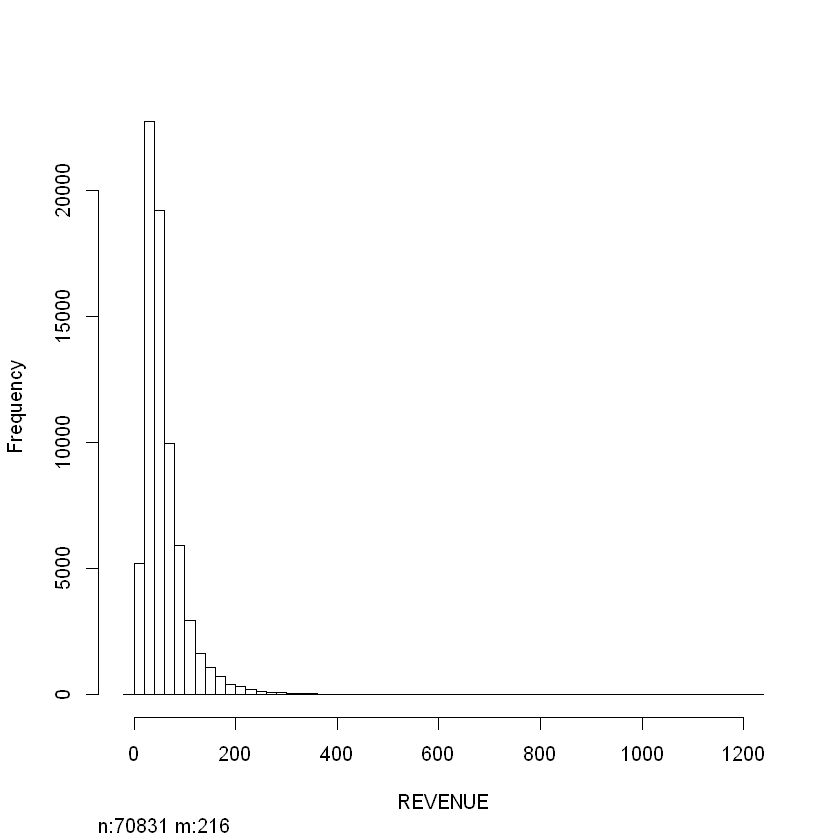

[1] 3


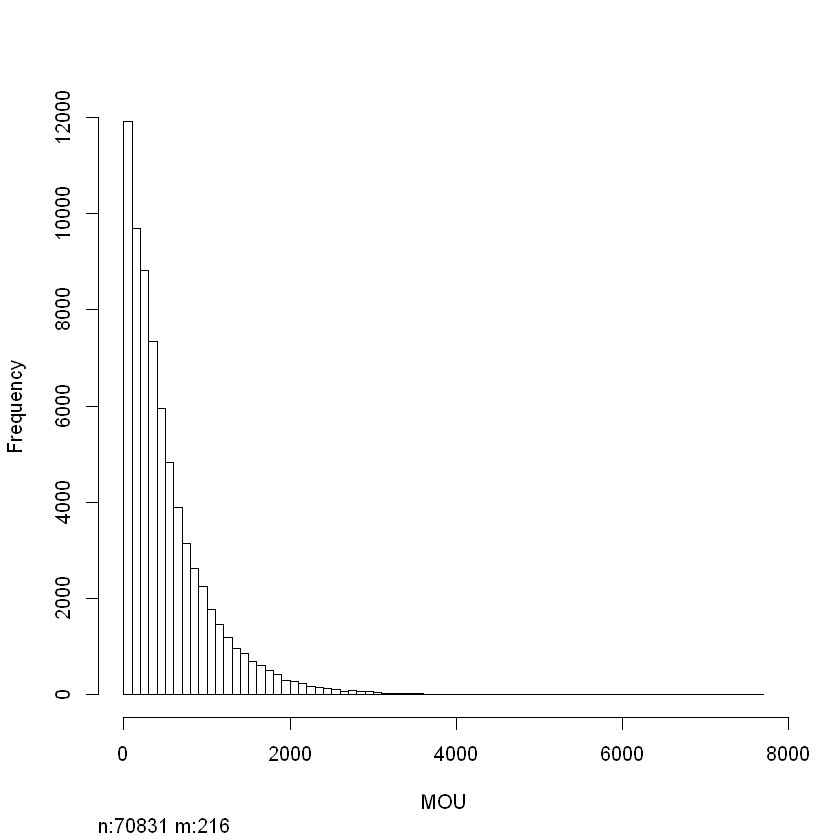

[1] 4


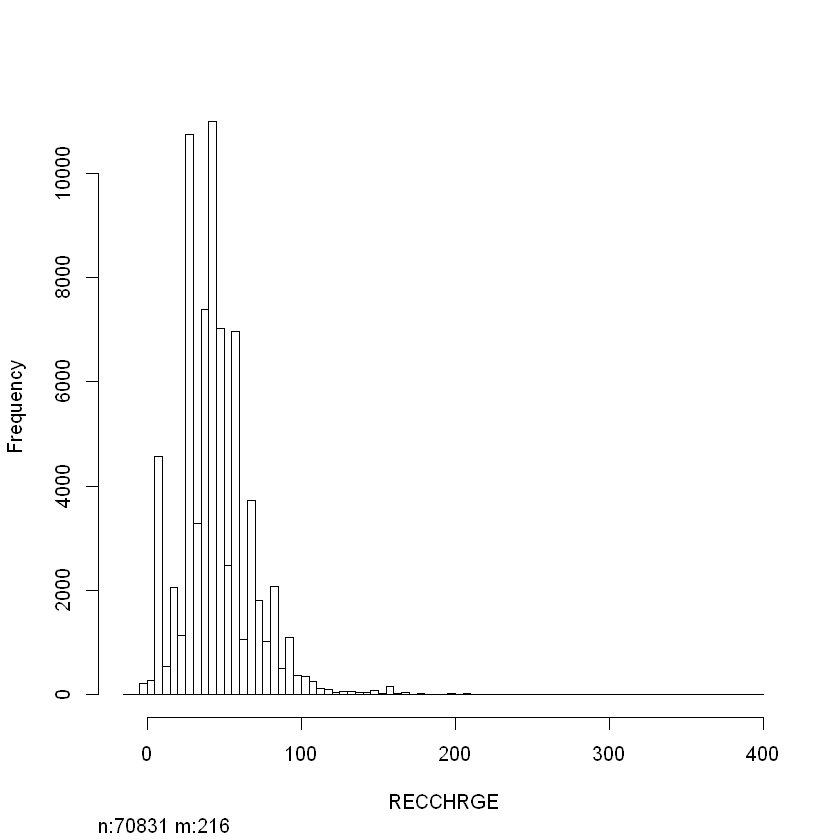

[1] 5


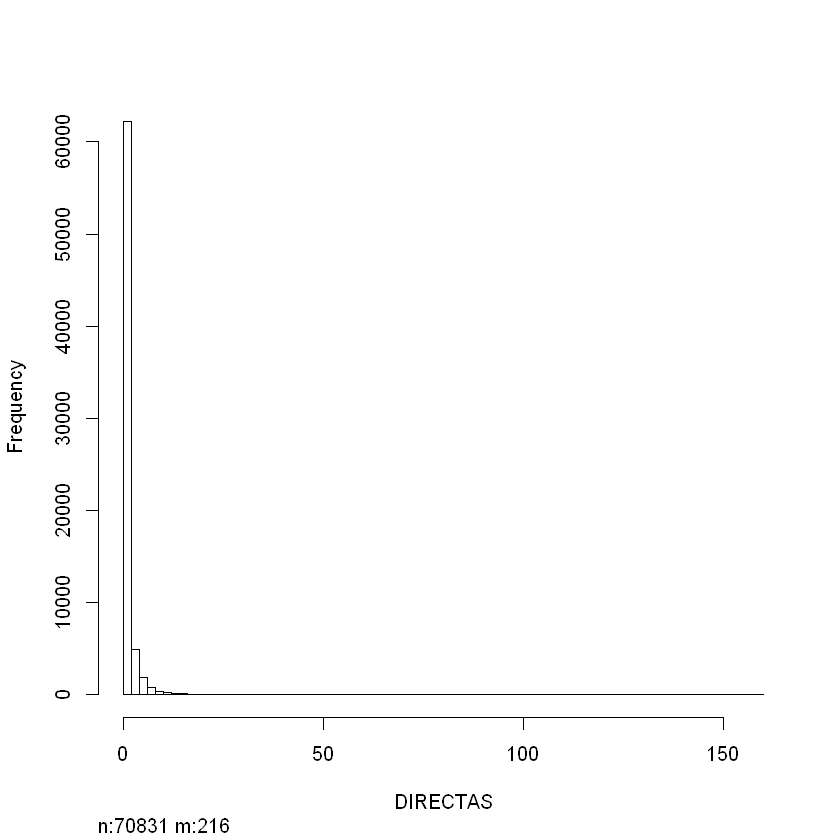

[1] 6


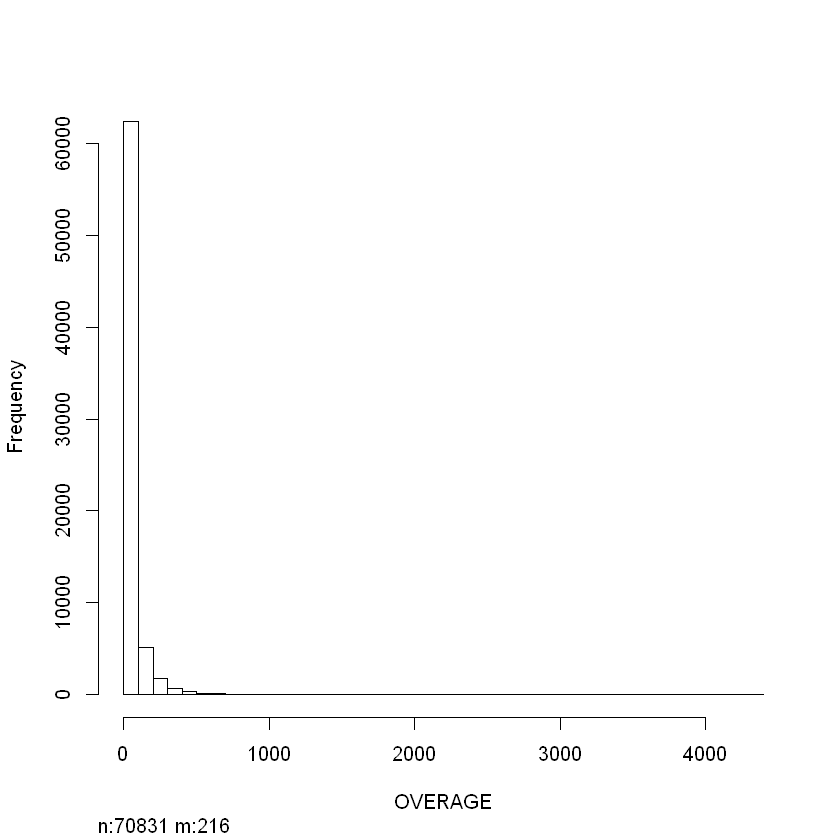

[1] 7


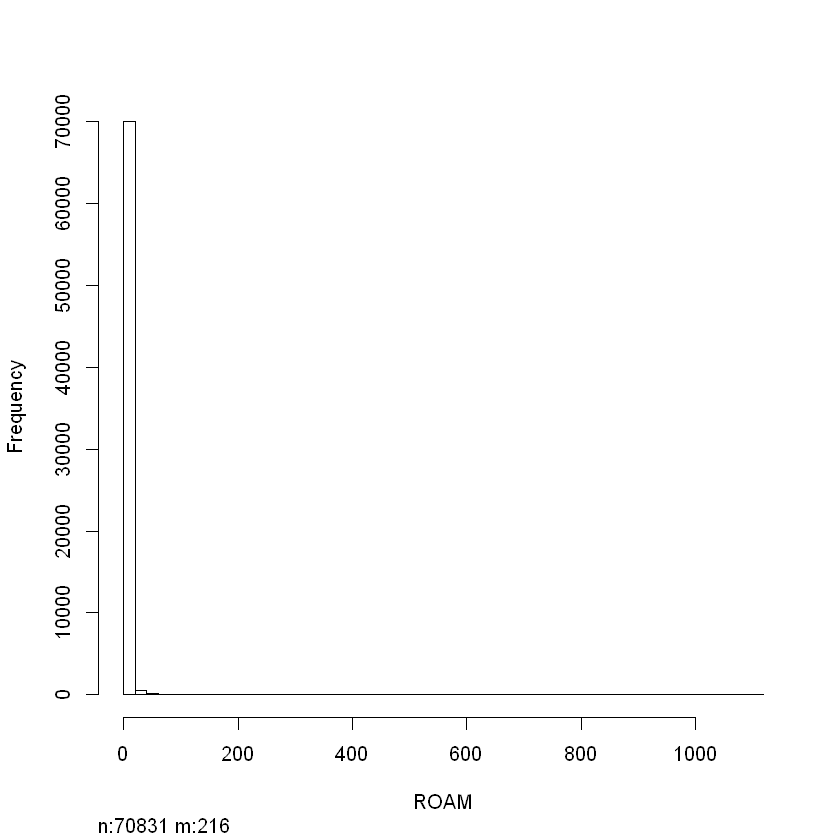

[1] 8


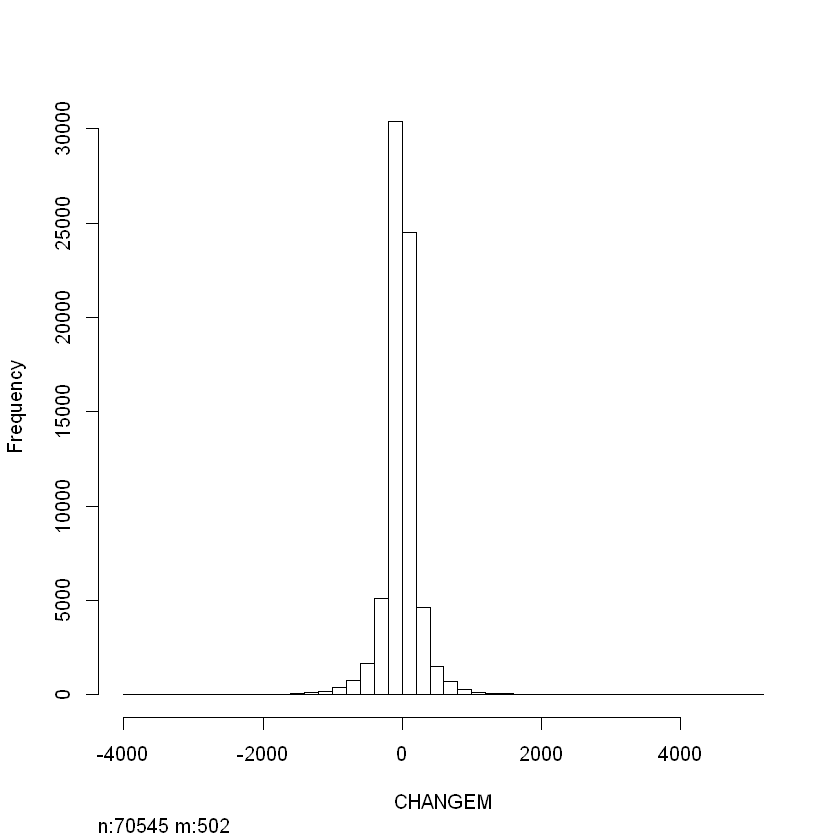

[1] 9


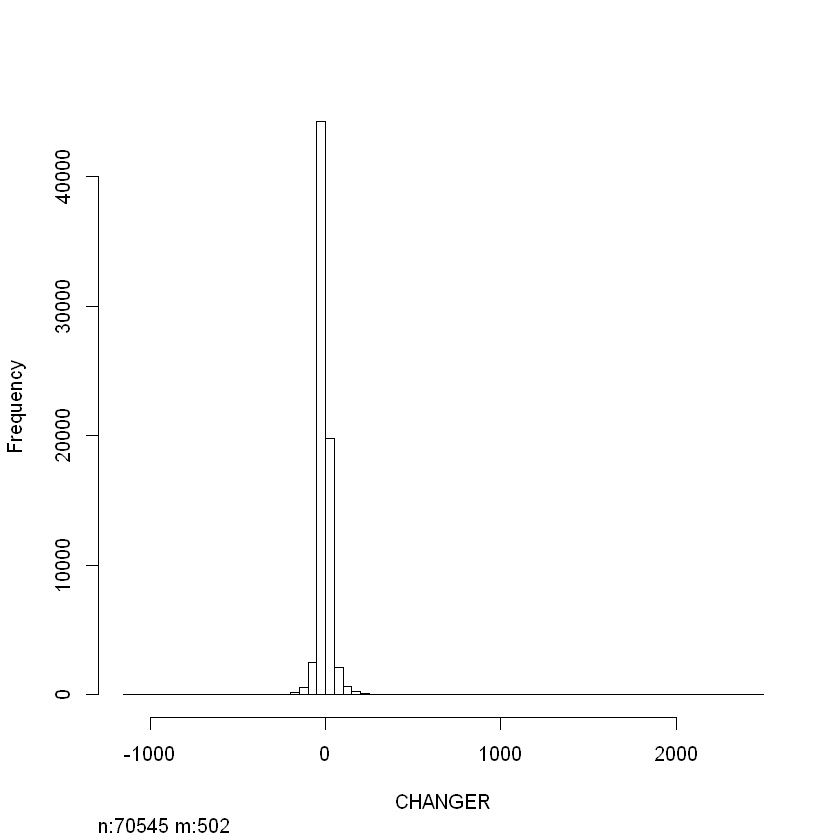

[1] 10


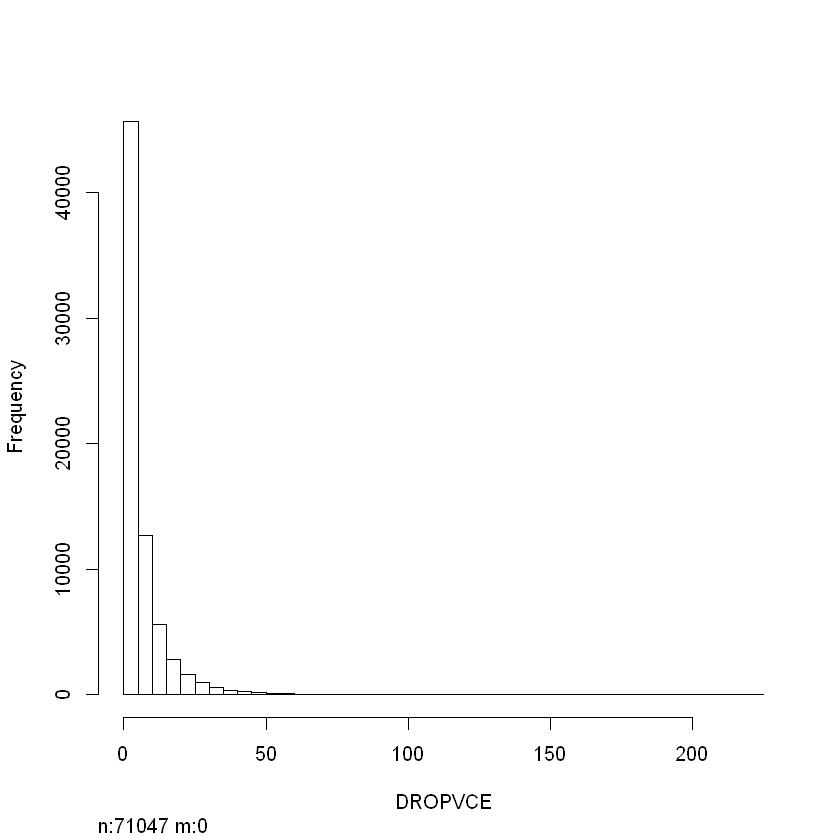

[1] 11


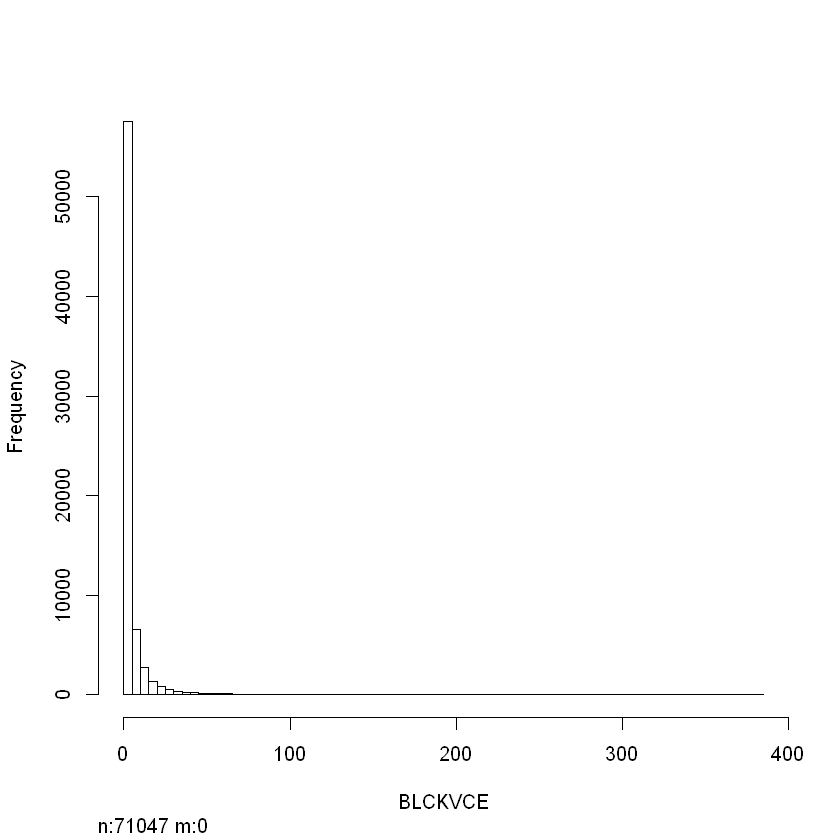

[1] 12


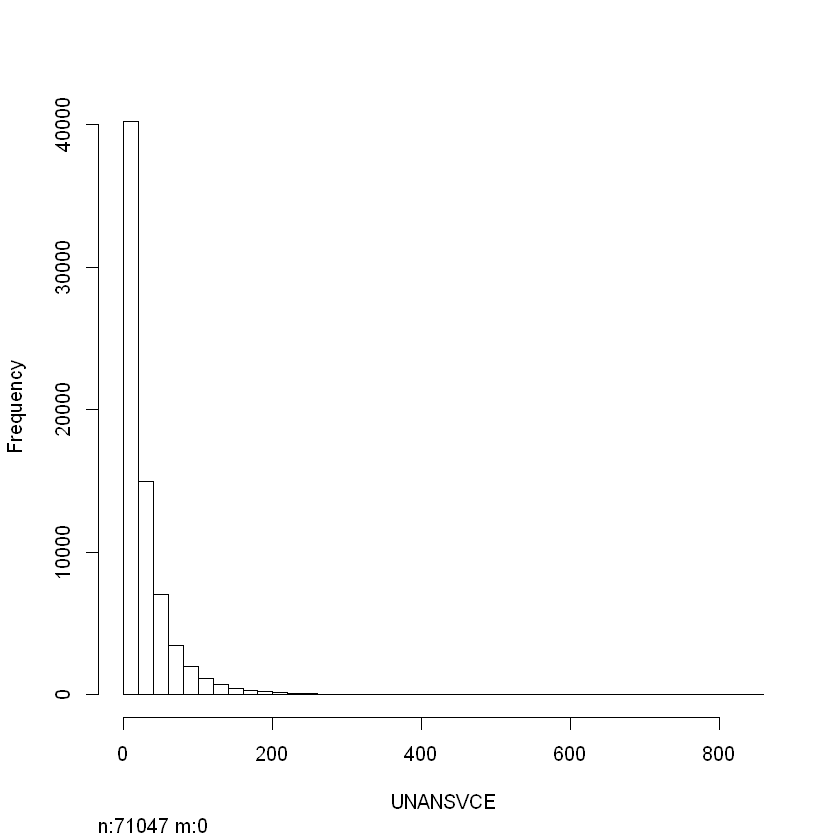

[1] 13


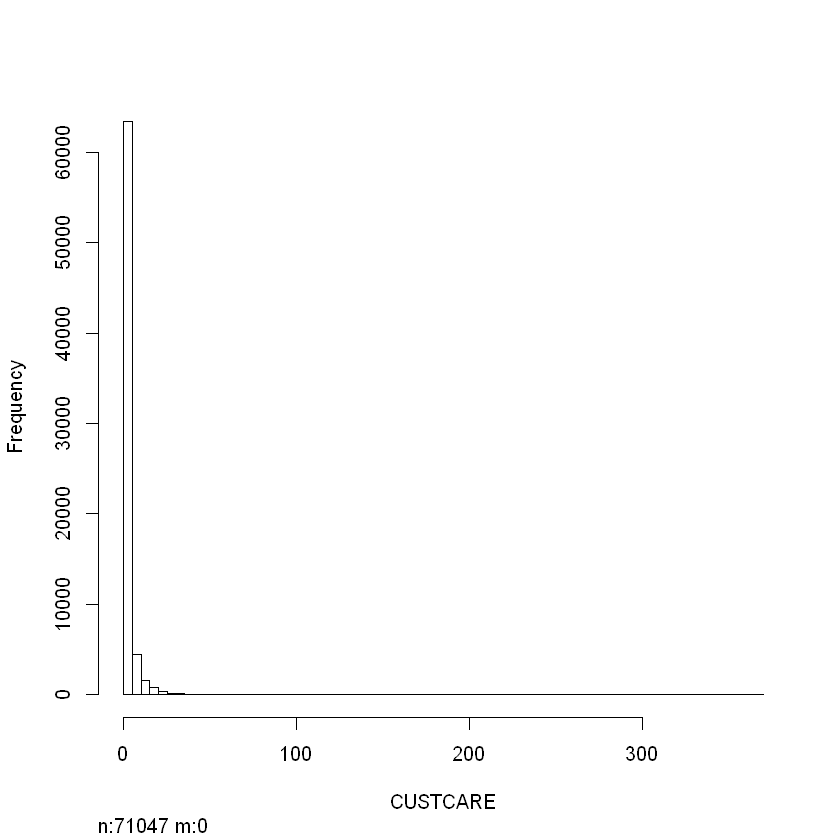

[1] 14


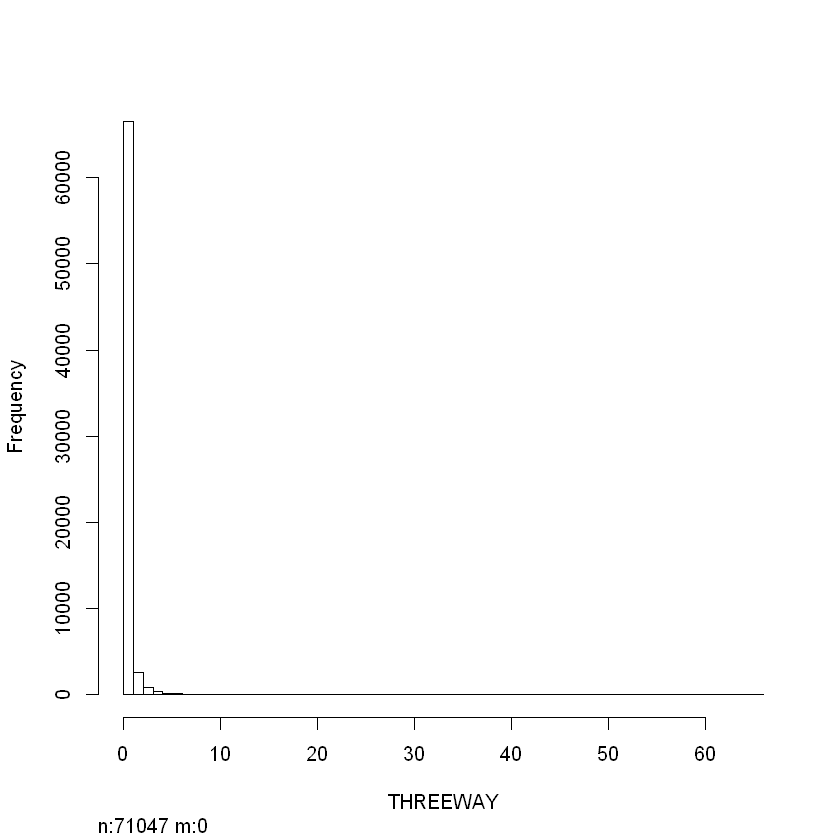

[1] 15


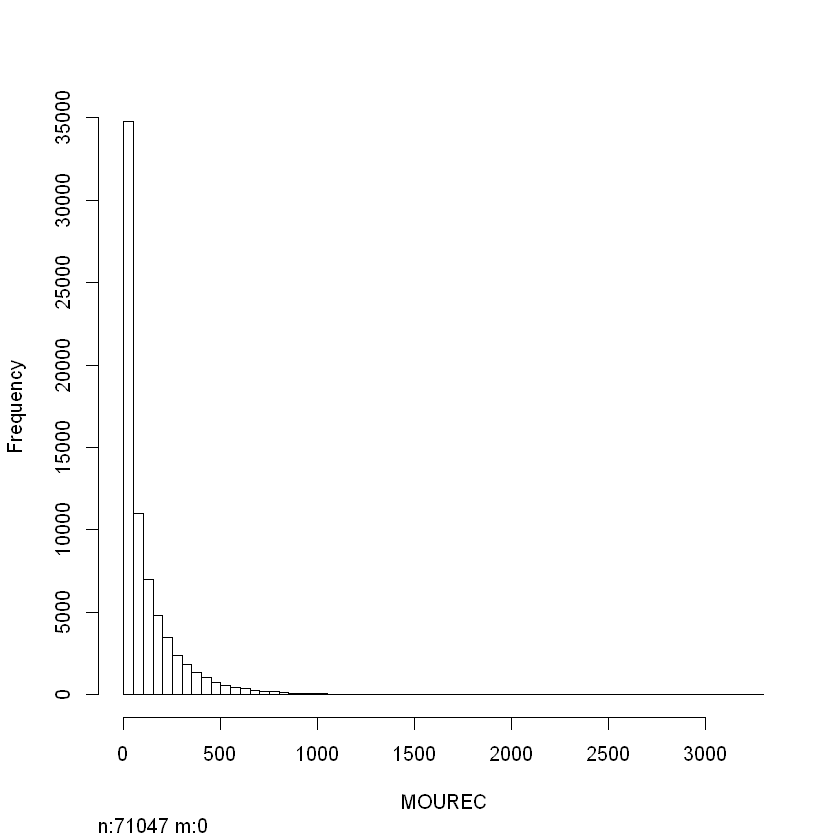

[1] 16


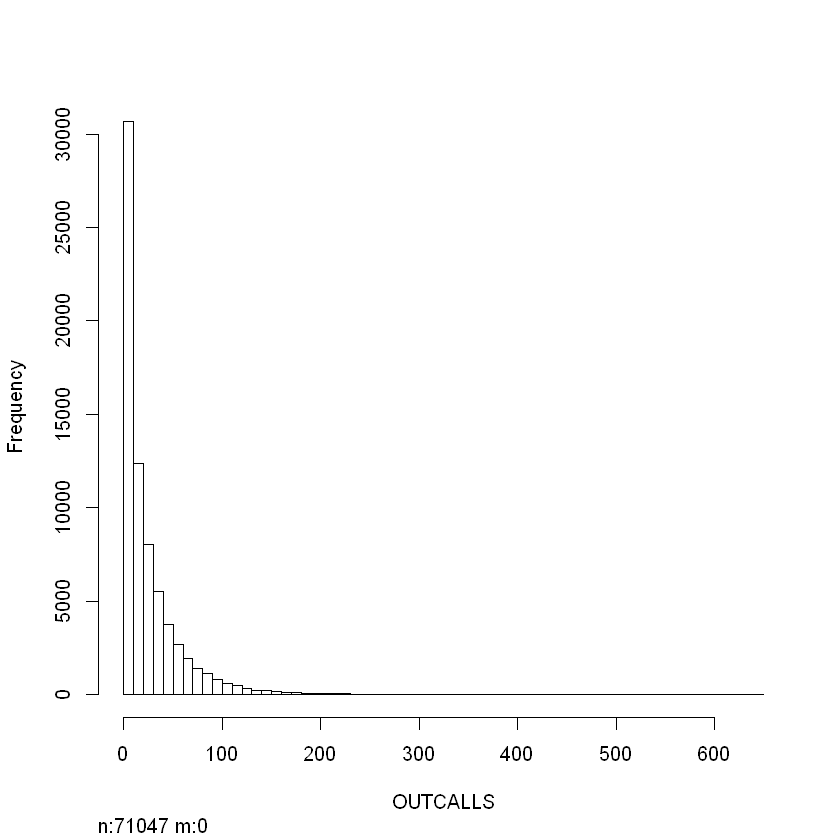

[1] 17


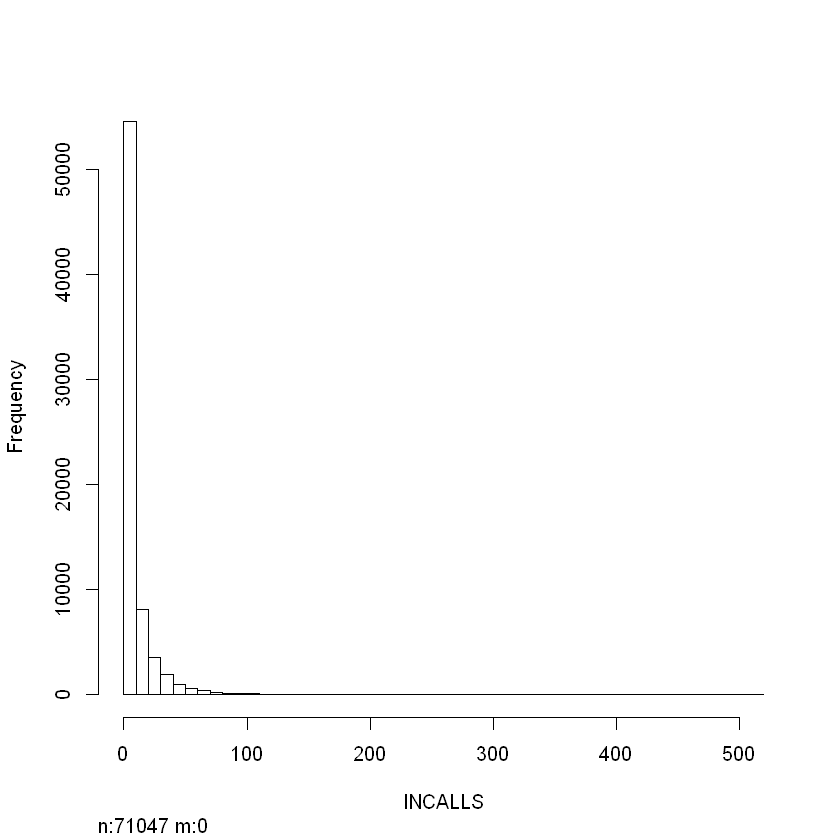

[1] 18


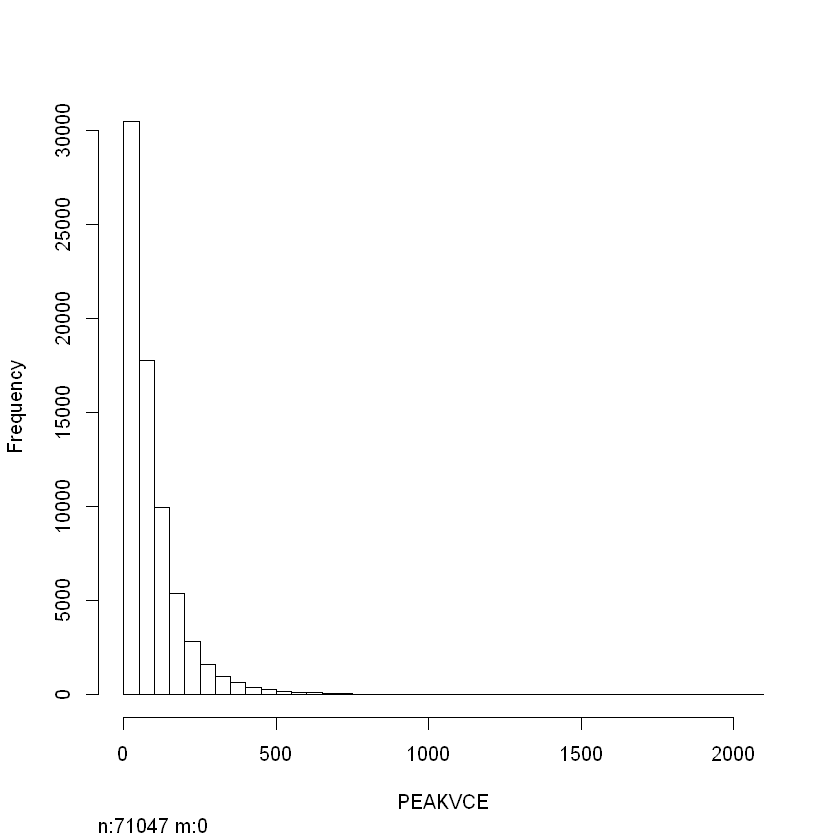

[1] 19


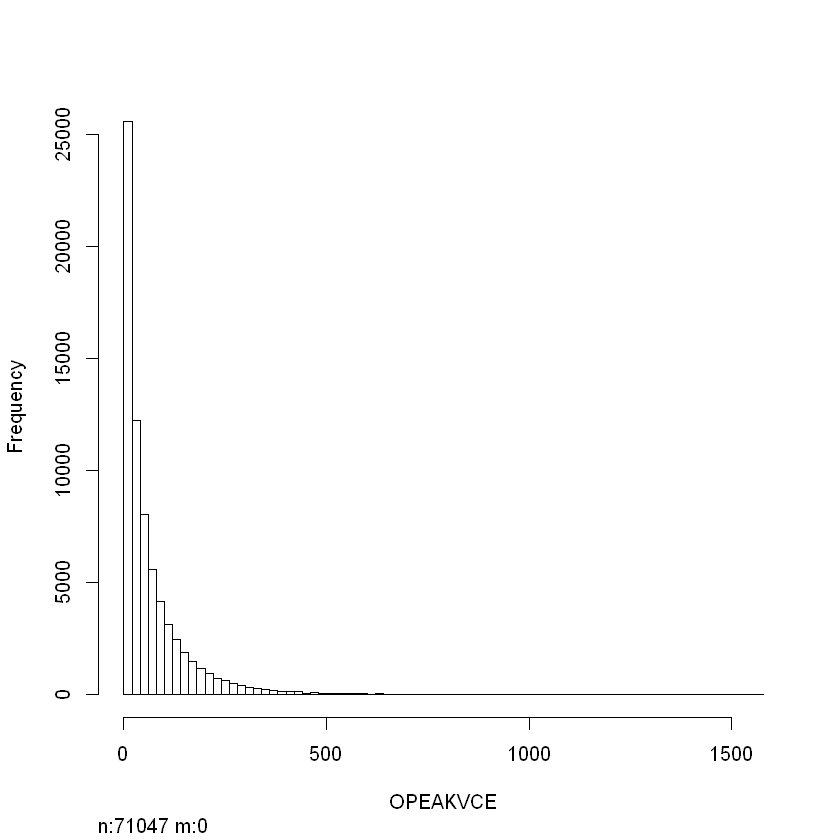

[1] 20


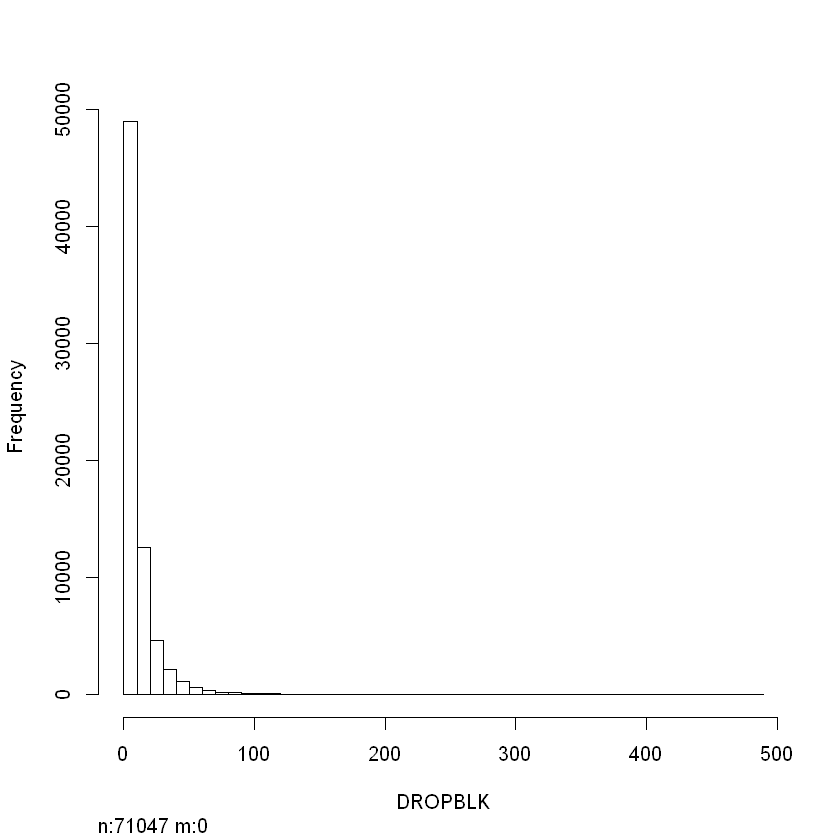

[1] 21


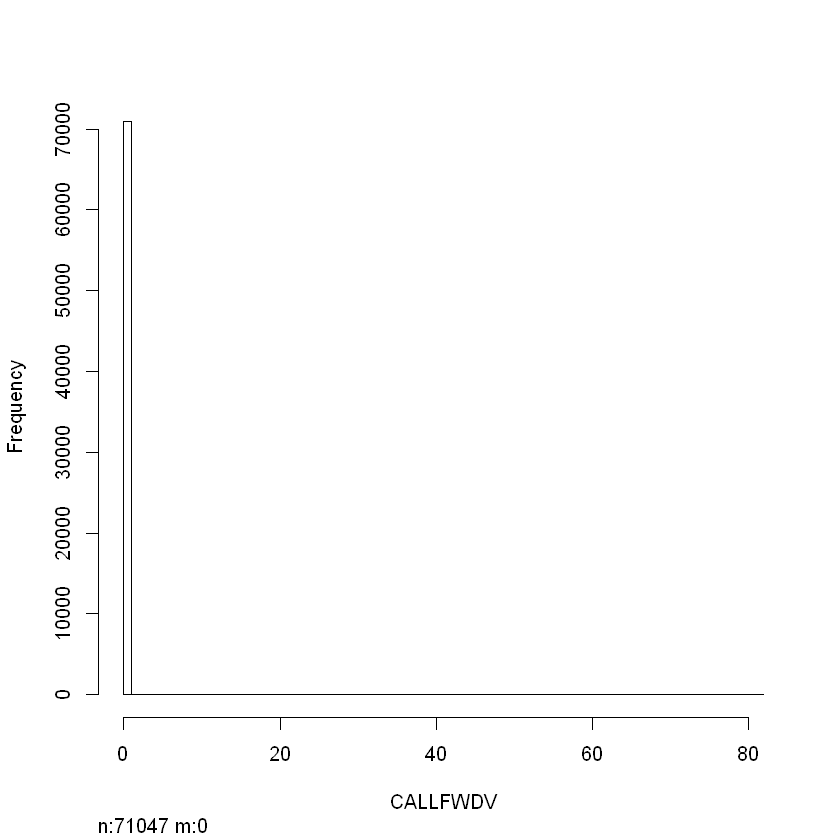

[1] 22
[1] 23


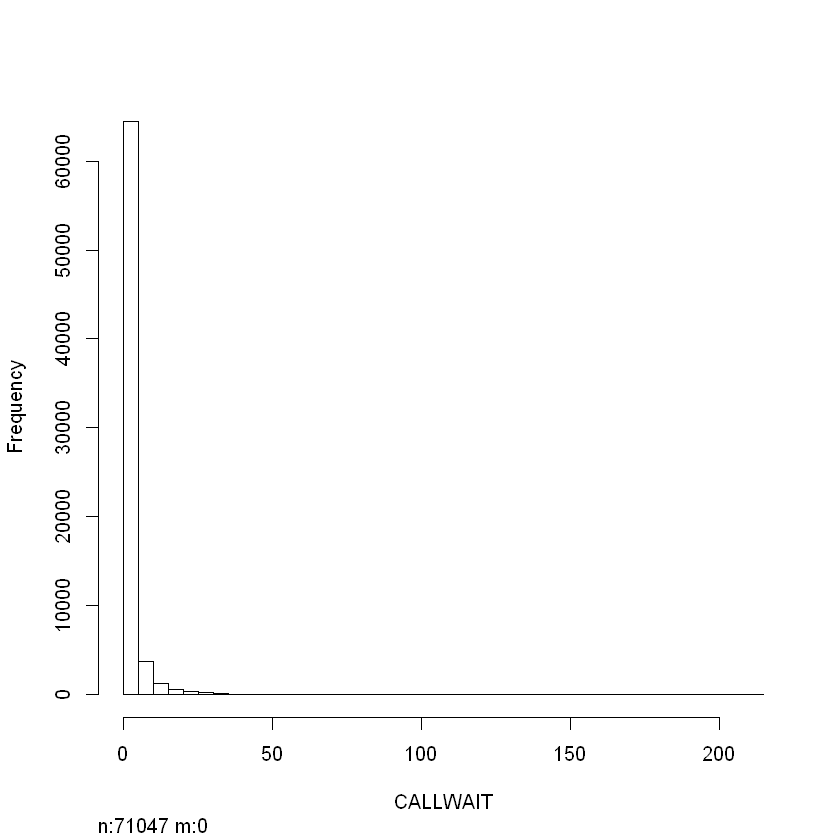

[1] 24


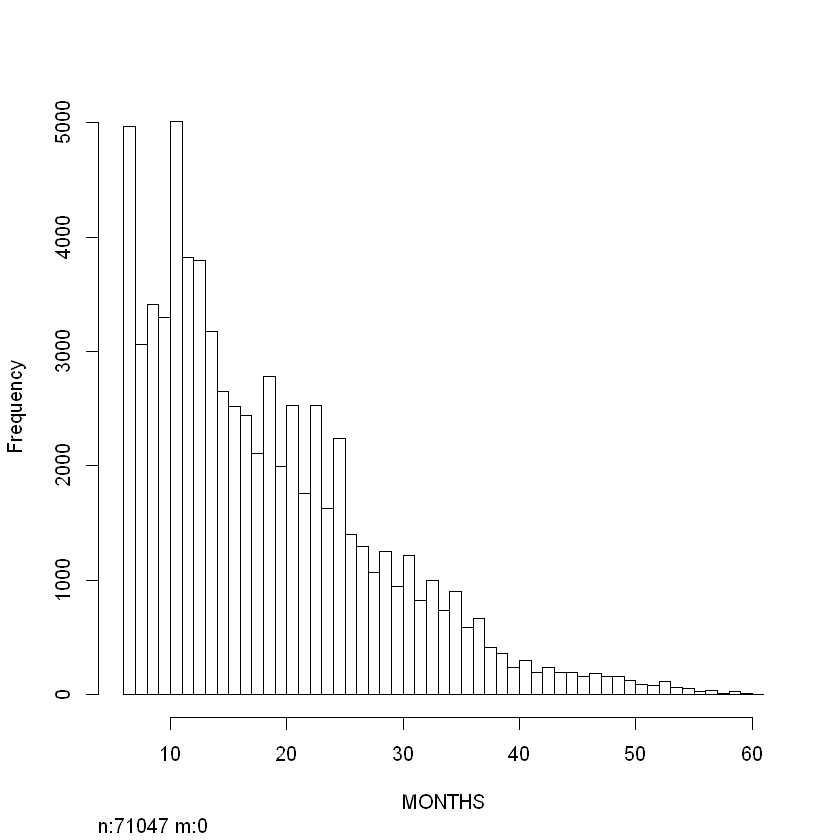

[1] 25


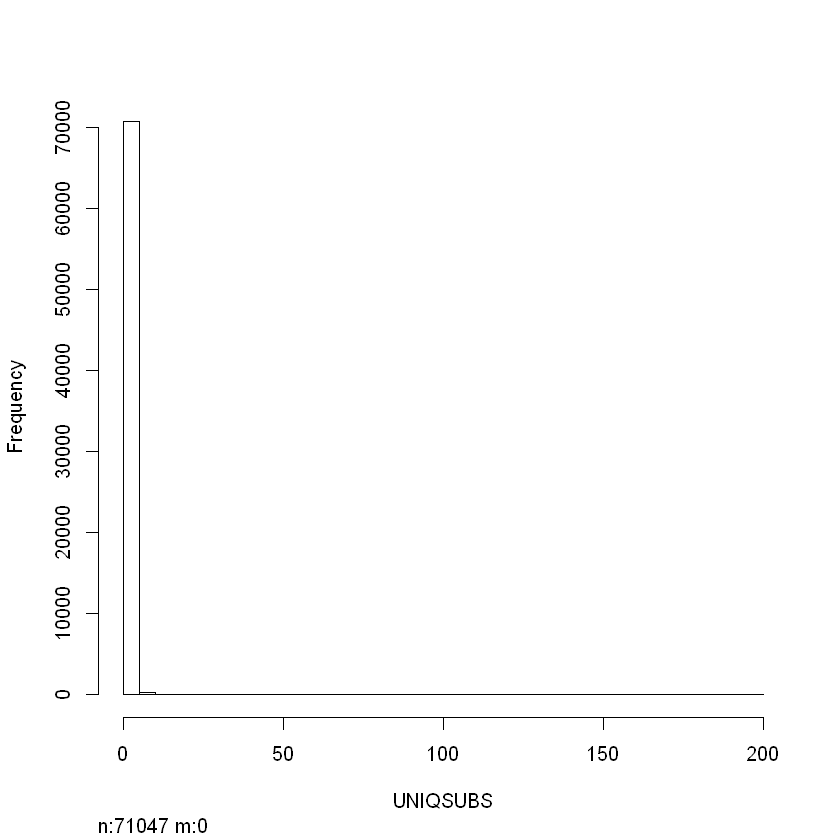

[1] 26


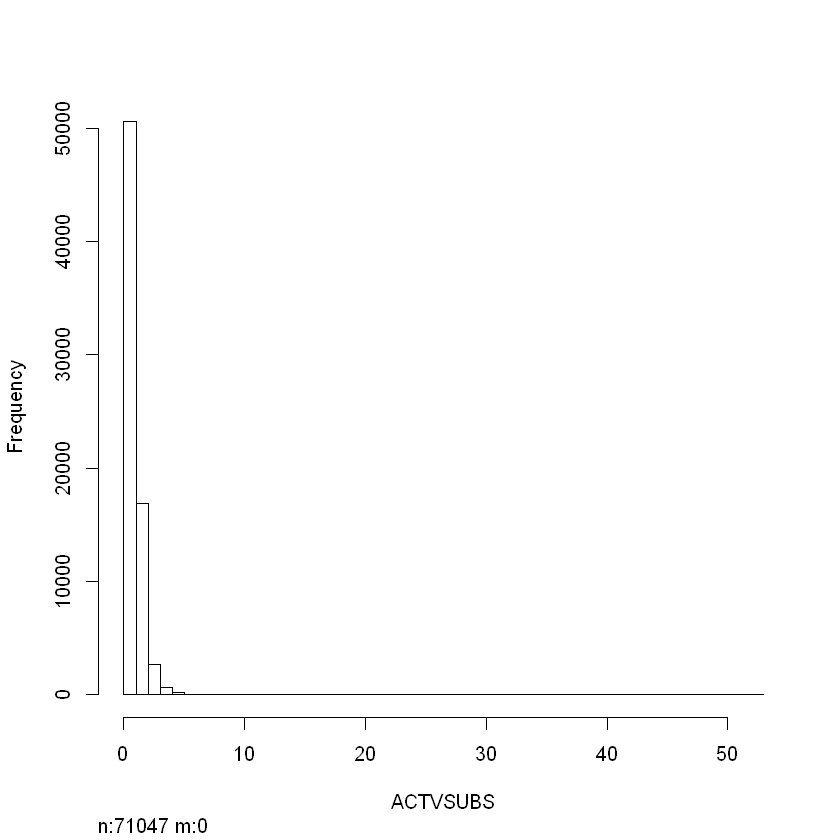

[1] 27


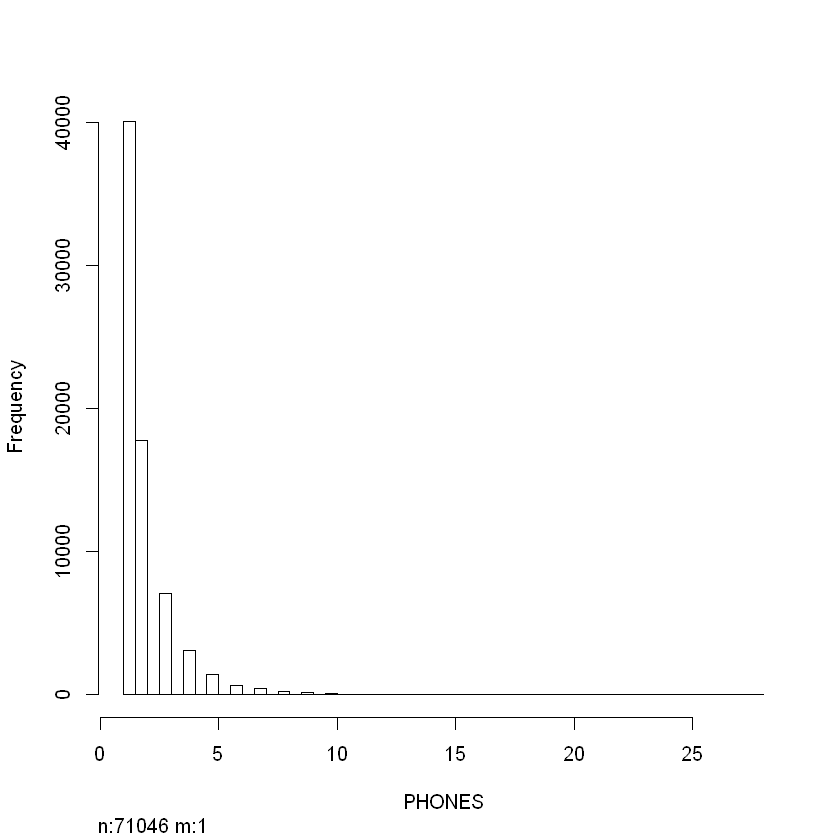

[1] 28


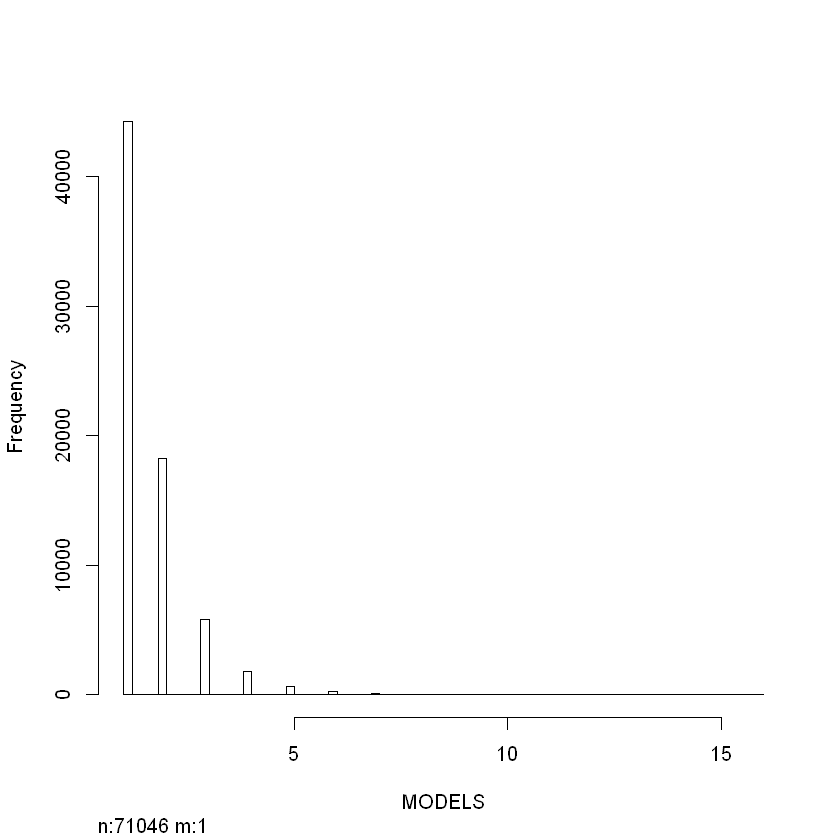

[1] 29


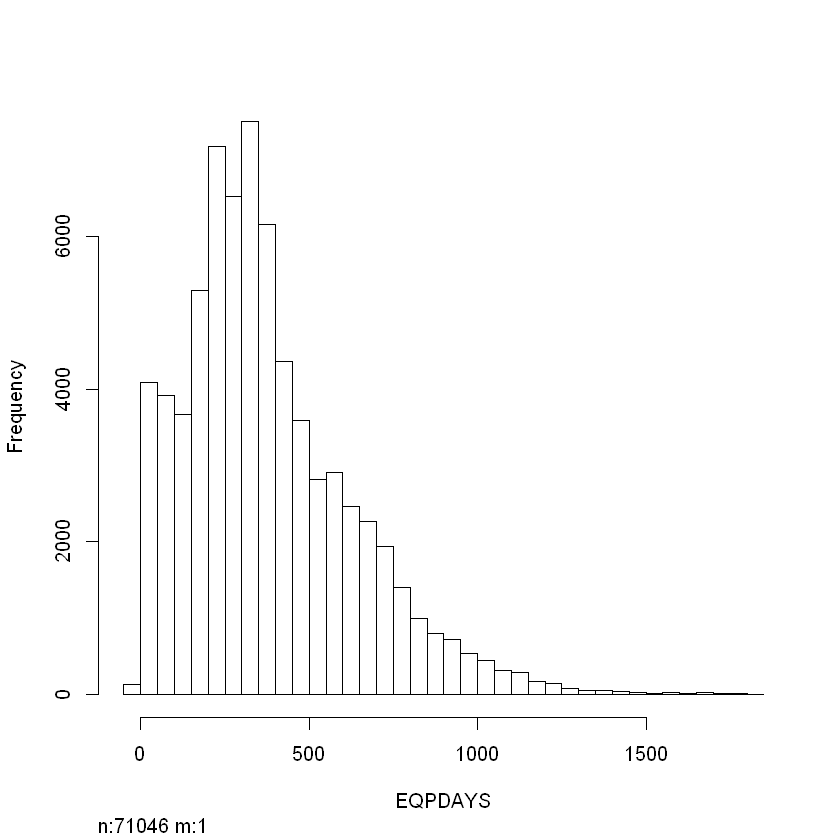

[1] 30


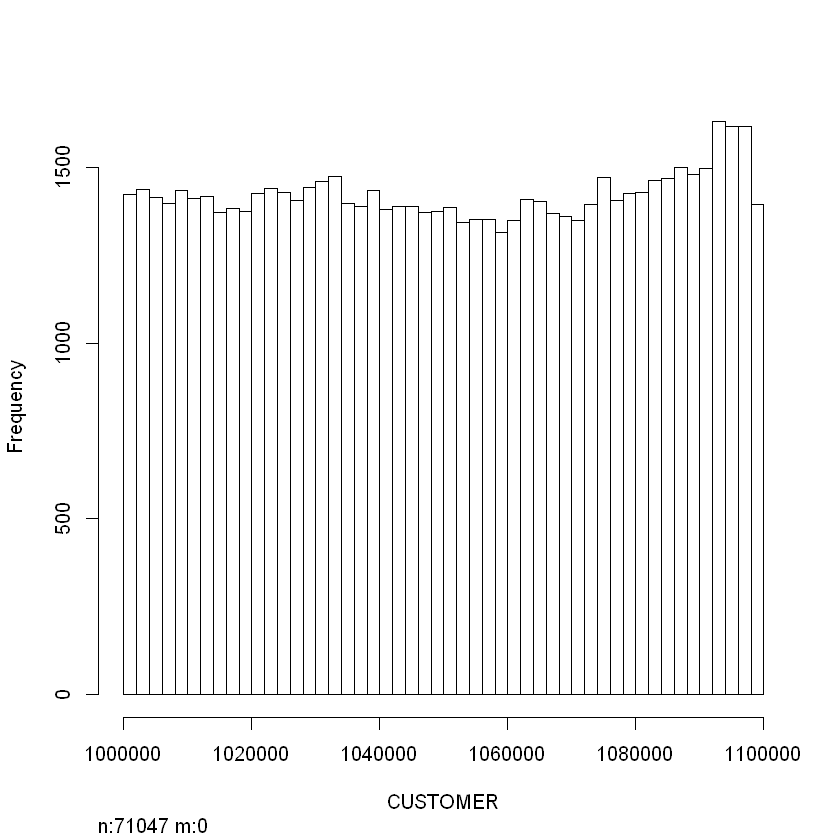

[1] 31


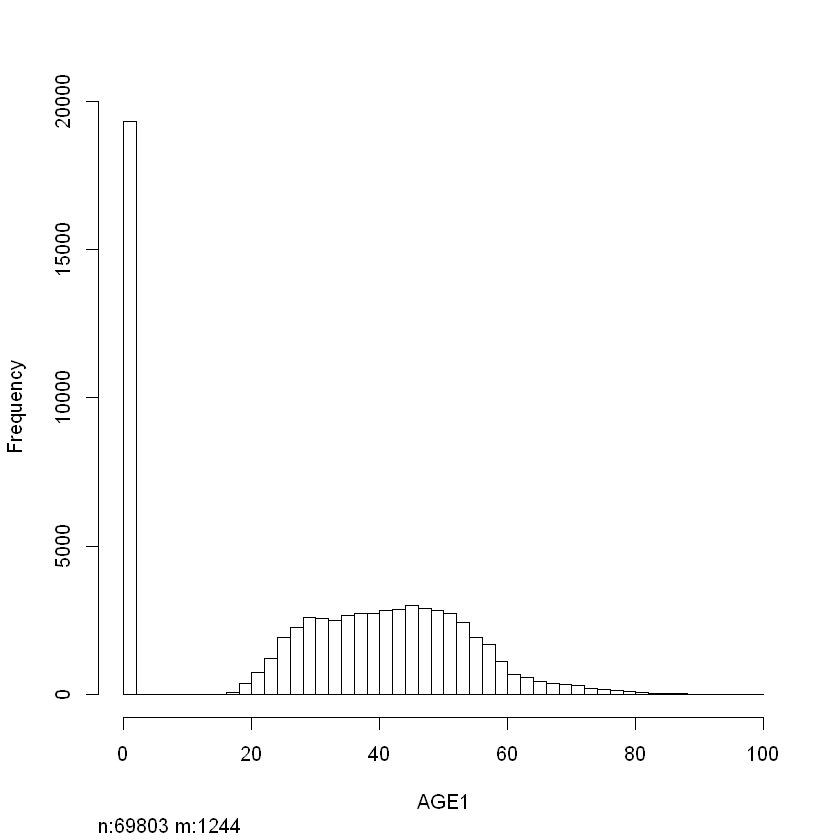

[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64


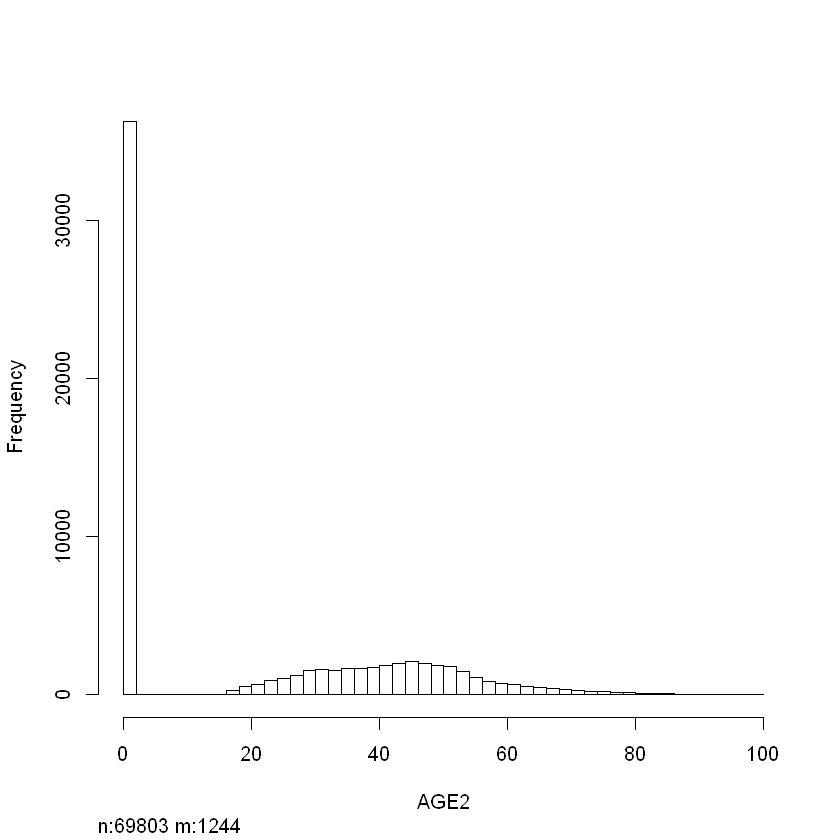

[1] 65


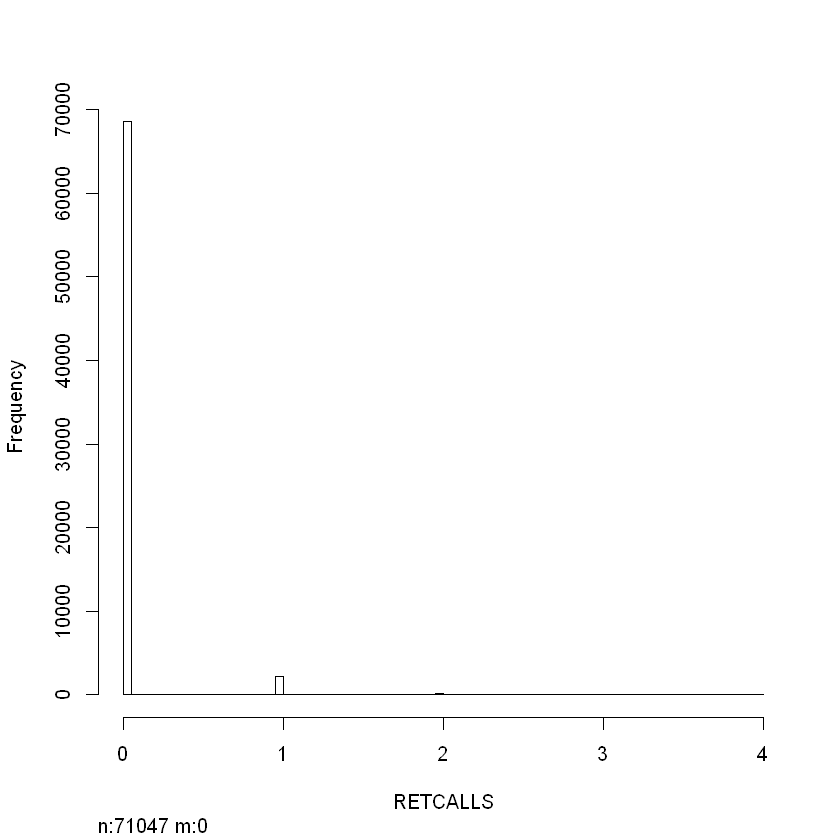

[1] 66
[1] 67
[1] 68


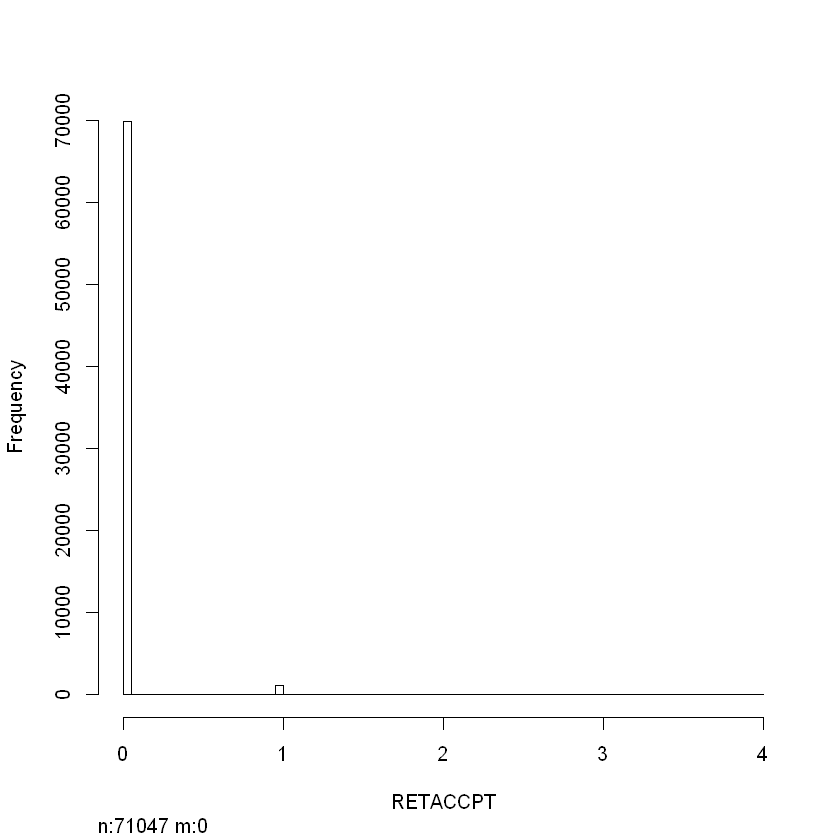

[1] 69
[1] 70


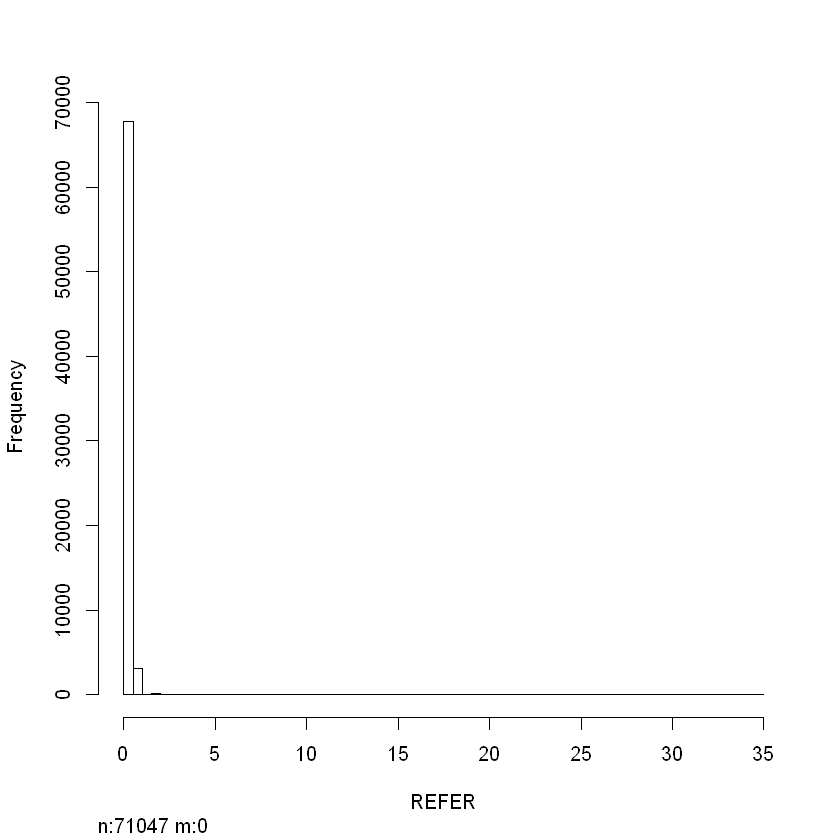

[1] 71
[1] 72


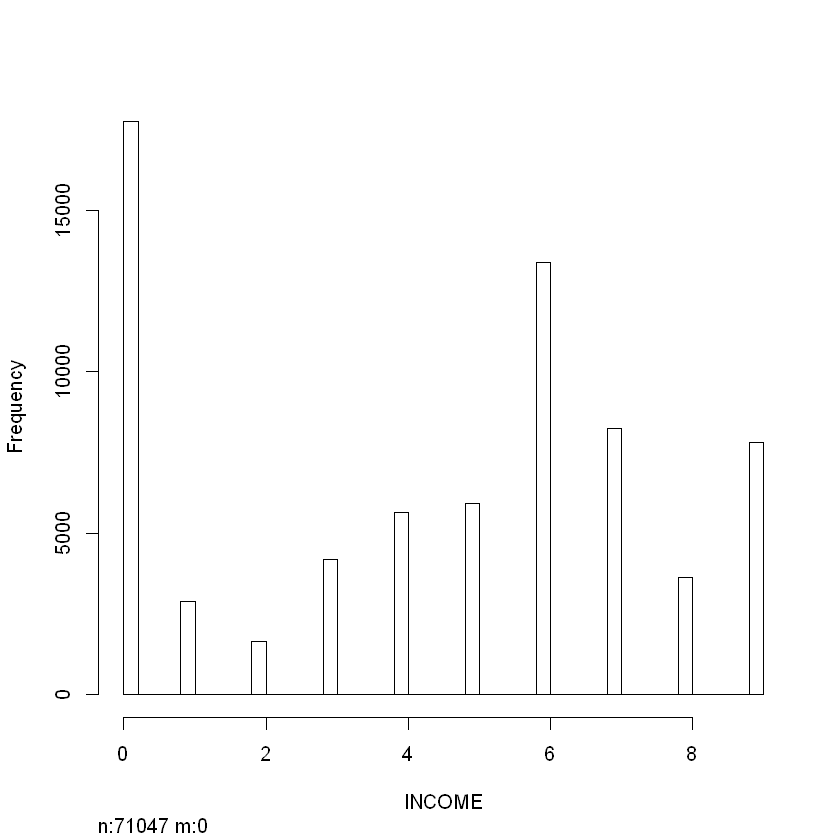

[1] 73
[1] 74


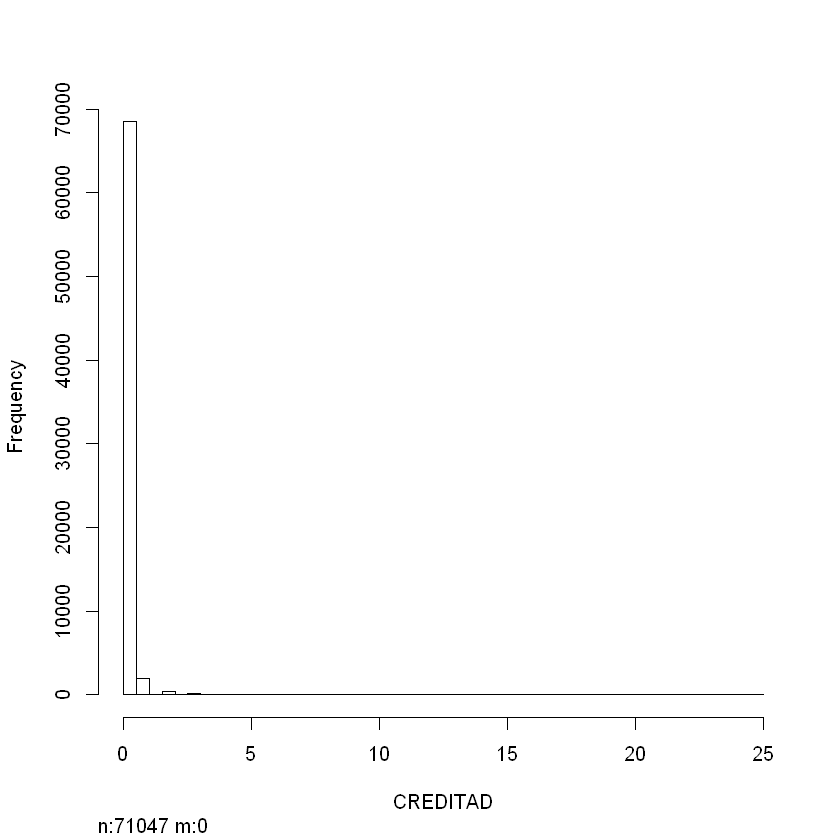

[1] 75
[1] 76
[1] 77


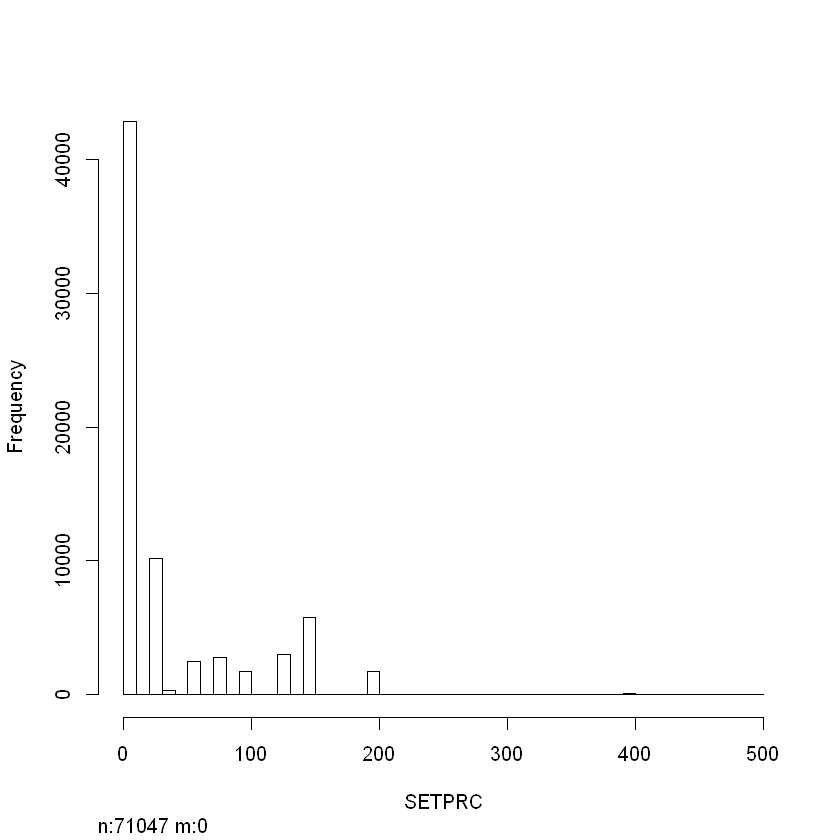

In [8]:
# Plot a histogram on all numeric columsn to see the distribution
# Some columns will have only few distinct values. These can later be classifed as categorical variables.

num_data <-cc[, sapply(cc, is.numeric)] 
for (i in 1:length(names(num_data))){
  print(i)
  hist( num_data[i], main='hist', breaks=20, prob=TRUE)
}

In [9]:
str(cc)

'data.frame':	71047 obs. of  78 variables:
 $ REVENUE : num  57.5 82.3 31.7 62.1 25.2 ...
 $ MOU     : num  482.8 1312.2 25.5 97.5 2.5 ...
 $ RECCHRGE: num  37.4 75 30 66 25 ...
 $ DIRECTAS: num  0.25 1.24 0.25 2.48 0 2.23 0.25 0 0.74 0 ...
 $ OVERAGE : num  22.8 0 0 0 0 ...
 $ ROAM    : num  0 0 0 0 0 35.5 0 0 1.29 0 ...
 $ CHANGEM : num  532.2 156.8 59.5 23.5 -2.5 ...
 $ CHANGER : num  50.99 8.14 4.03 6.82 -0.23 ...
 $ DROPVCE : num  8.33 52 0 0 0 9 3.33 2 2.67 1.67 ...
 $ BLCKVCE : num  1 7.67 1 0.33 0 0 1.67 0.67 6 0.33 ...
 $ UNANSVCE: num  61.33 76 2.33 4 0.33 ...
 $ CUSTCARE: num  1.67 4.33 0 4 0 0.33 1 0 4.33 0.33 ...
 $ THREEWAY: num  0.33 1.33 0 0 0 0 0 0 0 0 ...
 $ MOUREC  : num  55.28 200.32 0 0 1.13 ...
 $ OUTCALLS: num  46.33 370.33 0 3.67 0.33 ...
 $ INCALLS : num  6.33 147 0 0 0 4.67 3.67 4.67 8.33 5.67 ...
 $ PEAKVCE : num  83.67 555.67 1.67 7.67 0.67 ...
 $ OPEAKVCE: num  157 303.67 1.67 7.33 0.67 ...
 $ DROPBLK : num  9.33 59.67 1 0.33 0 ...
 $ CALLFWDV: num  0 0 0 0

In [10]:
#Change column names to lowercase for ease of use
colnames(cc) <- tolower(colnames(cc))

# Drop Customerid column as its not needed
cc <- subset(cc,select = -c(customer))

# Drop csa column as its not needed
cc <- subset(cc,select = -c(csa)) 

# Drop churndep column as its not needed(we'll use churn instead)
cc <- subset(cc,select = -c(churndep)) 

#Convert the predicted variable to categorical
cc$calibrat <- as.factor(cc$calibrat)
cc$churn <- as.factor(cc$churn)

# Remove Retcall, Retaccpt, & retcalls from your final model. 
# As these variables are for actual churners, as mentioned in the business problem. 
cc <- subset(cc,select = -c(retcall,retcalls,retaccpt)) 

colnames(cc) 

[1] "revenue"  "mou"      "recchrge" "directas" "overage"  "roam"    
 [7] "changem"  "changer"  "dropvce"  "blckvce"  "unansvce" "custcare"
[13] "threeway" "mourec"   "outcalls" "incalls"  "peakvce"  "opeakvce"
[19] "dropblk"  "callfwdv" "callwait" "churn"    "months"   "uniqsubs"
[25] "actvsubs" "phones"   "models"   "eqpdays"  "age1"     "age2"    
[31] "children" "credita"  "creditaa" "creditb"  "creditc"  "creditde"
[37] "creditgy" "creditz"  "prizmrur" "prizmub"  "prizmtwn" "refurb"  
[43] "webcap"   "truck"    "rv"       "occprof"  "occcler"  "occcrft" 
[49] "occstud"  "occhmkr"  "occret"   "occself"  "ownrent"  "marryun" 
[55] "marryyes" "marryno"  "mailord"  "mailres"  "mailflag" "travel"  
[61] "pcown"    "creditcd" "newcelly" "newcelln" "refer"    "incmiss" 
[67] "income"   "mcycle"   "creditad" "setprcm"  "setprc"   "calibrat"

In [11]:
head(cc,2)

revenue,mou,recchrge,directas,overage,roam,changem,changer,dropvce,blckvce,...,newcelly,newcelln,refer,incmiss,income,mcycle,creditad,setprcm,setprc,calibrat
57.49,482.75,37.43,0.25,22.75,0,532.25,50.99,8.33,1.00,...,0,1,0,0,5,0,1,0,149.99,0
82.28,1312.25,75.00,1.24,0.00,0,156.75,8.14,52.00,7.67,...,1,0,0,0,6,0,0,0,9.99,0


In [12]:
str(cc)

'data.frame':	71047 obs. of  72 variables:
 $ revenue : num  57.5 82.3 31.7 62.1 25.2 ...
 $ mou     : num  482.8 1312.2 25.5 97.5 2.5 ...
 $ recchrge: num  37.4 75 30 66 25 ...
 $ directas: num  0.25 1.24 0.25 2.48 0 2.23 0.25 0 0.74 0 ...
 $ overage : num  22.8 0 0 0 0 ...
 $ roam    : num  0 0 0 0 0 35.5 0 0 1.29 0 ...
 $ changem : num  532.2 156.8 59.5 23.5 -2.5 ...
 $ changer : num  50.99 8.14 4.03 6.82 -0.23 ...
 $ dropvce : num  8.33 52 0 0 0 9 3.33 2 2.67 1.67 ...
 $ blckvce : num  1 7.67 1 0.33 0 0 1.67 0.67 6 0.33 ...
 $ unansvce: num  61.33 76 2.33 4 0.33 ...
 $ custcare: num  1.67 4.33 0 4 0 0.33 1 0 4.33 0.33 ...
 $ threeway: num  0.33 1.33 0 0 0 0 0 0 0 0 ...
 $ mourec  : num  55.28 200.32 0 0 1.13 ...
 $ outcalls: num  46.33 370.33 0 3.67 0.33 ...
 $ incalls : num  6.33 147 0 0 0 4.67 3.67 4.67 8.33 5.67 ...
 $ peakvce : num  83.67 555.67 1.67 7.67 0.67 ...
 $ opeakvce: num  157 303.67 1.67 7.33 0.67 ...
 $ dropblk : num  9.33 59.67 1 0.33 0 ...
 $ callfwdv: num  0 0 0 0

In [13]:
# Convert categorical variables from Dummy variables
# Drop the Dummy variables in place of categorical variables

cc1 <- cc %>% mutate(marry = ifelse(marryun == 1,"Unknown",ifelse(marryyes==1,"Married",ifelse(marryno==1,"Unmarried","NA"))))  %>% 
              mutate(mail = ifelse(mailord == 1,"Mail-Order",ifelse(mailres==1,"Mail-Offer",ifelse(mailflag==1,"No-Mail","NA")))) %>% 
              mutate(cell = ifelse(newcelly == 1,"CellPhone",ifelse(newcelln==1,"No-CellPhone","NA"))) %>% 
              mutate(occupation = ifelse(occprof == 1,"Professional",ifelse(occcler==1,"Clerk",ifelse(occcrft==1,"Craftsman",ifelse(occstud==1,"Student",ifelse(occhmkr==1,"Homemaker",ifelse(occret==1,"Retired",ifelse(occself==1,"Self-Employed","NA")))))))) %>% 
              mutate(prizm = ifelse(prizmrur == 1,"Rural",ifelse(prizmub==1,"Suburban",ifelse(prizmtwn==1,"Town","NA")))) %>% 
              mutate(credit = ifelse(credita == 1,"A",ifelse(creditaa==1,"AA",ifelse(creditb==1,"B",ifelse(creditc ==1,"C",ifelse(creditde==1,"DE",ifelse(creditgy==1,"GY",ifelse(creditz==1,"Z","No_rating")))))))) 

cc1$marry <- as.factor(cc1$marry)
cc1$mail <- as.factor(cc1$mail)
cc1$cell <- as.factor(cc1$cell)
cc1$occupation <- as.factor(cc1$occupation)
cc1$prizm <- as.factor(cc1$prizm)
cc1$credit <- as.factor(cc1$credit)

cc1 <- subset(cc1,select = -c(marryun,marryyes,marryno,mailord,mailres,mailflag,newcelly,newcelln,occprof,occcler,occcrft,occstud,occhmkr,occret,occself,prizmrur,prizmub,prizmtwn,credita,creditaa,creditb,creditc,creditde,creditgy,creditz)) 
cc <- cc1

In [14]:
str(cc)

'data.frame':	71047 obs. of  53 variables:
 $ revenue   : num  57.5 82.3 31.7 62.1 25.2 ...
 $ mou       : num  482.8 1312.2 25.5 97.5 2.5 ...
 $ recchrge  : num  37.4 75 30 66 25 ...
 $ directas  : num  0.25 1.24 0.25 2.48 0 2.23 0.25 0 0.74 0 ...
 $ overage   : num  22.8 0 0 0 0 ...
 $ roam      : num  0 0 0 0 0 35.5 0 0 1.29 0 ...
 $ changem   : num  532.2 156.8 59.5 23.5 -2.5 ...
 $ changer   : num  50.99 8.14 4.03 6.82 -0.23 ...
 $ dropvce   : num  8.33 52 0 0 0 9 3.33 2 2.67 1.67 ...
 $ blckvce   : num  1 7.67 1 0.33 0 0 1.67 0.67 6 0.33 ...
 $ unansvce  : num  61.33 76 2.33 4 0.33 ...
 $ custcare  : num  1.67 4.33 0 4 0 0.33 1 0 4.33 0.33 ...
 $ threeway  : num  0.33 1.33 0 0 0 0 0 0 0 0 ...
 $ mourec    : num  55.28 200.32 0 0 1.13 ...
 $ outcalls  : num  46.33 370.33 0 3.67 0.33 ...
 $ incalls   : num  6.33 147 0 0 0 4.67 3.67 4.67 8.33 5.67 ...
 $ peakvce   : num  83.67 555.67 1.67 7.67 0.67 ...
 $ opeakvce  : num  157 303.67 1.67 7.33 0.67 ...
 $ dropblk   : num  9.33 59.67 

[1] 1
[1] 2


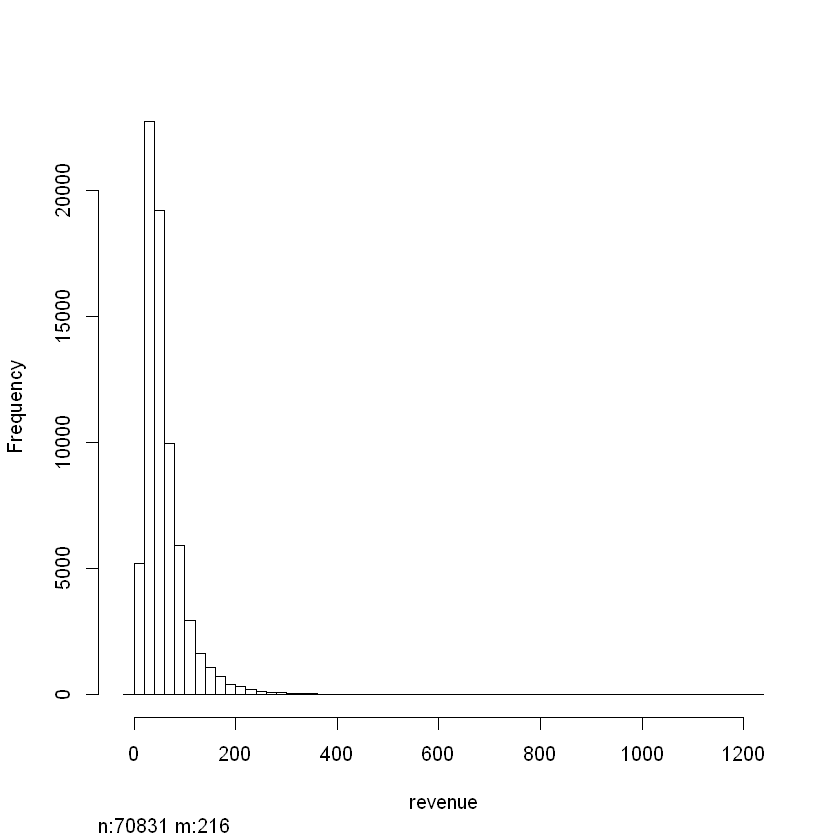

[1] 3


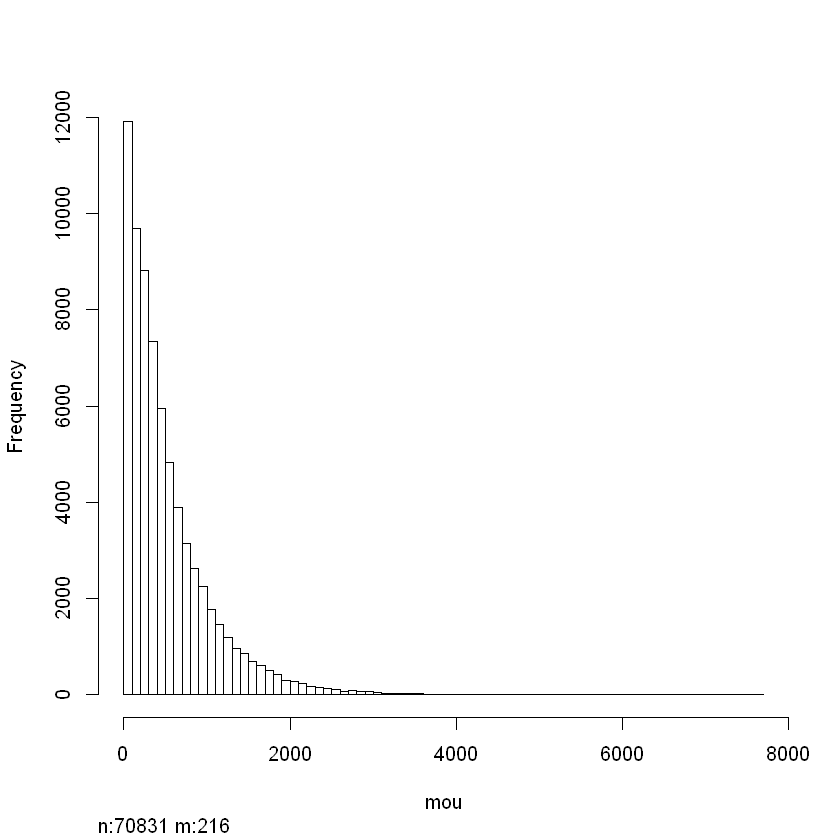

[1] 4


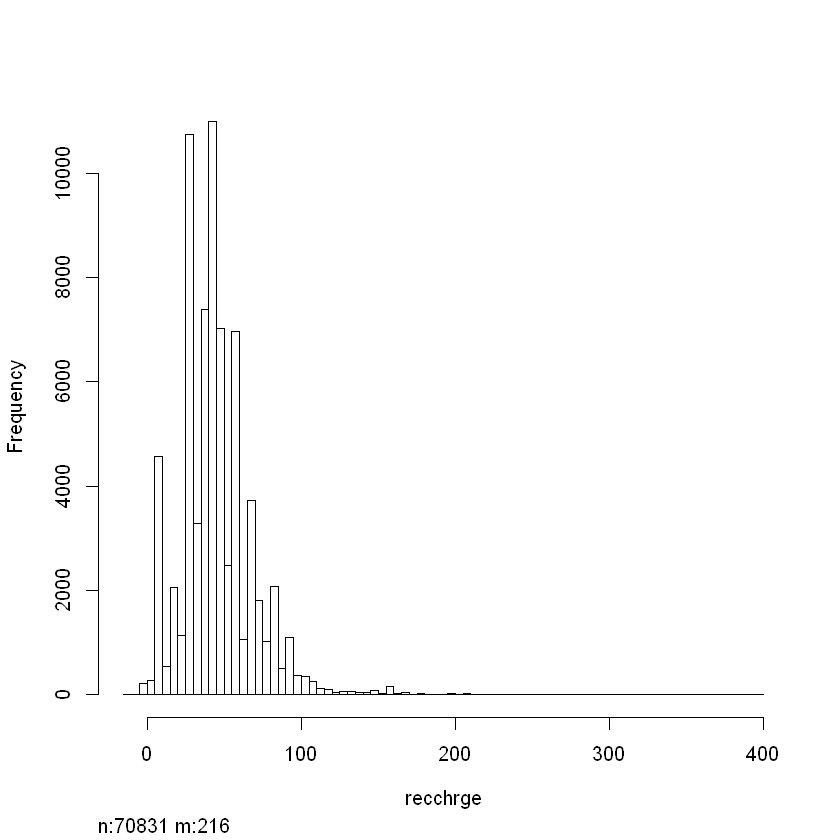

[1] 5


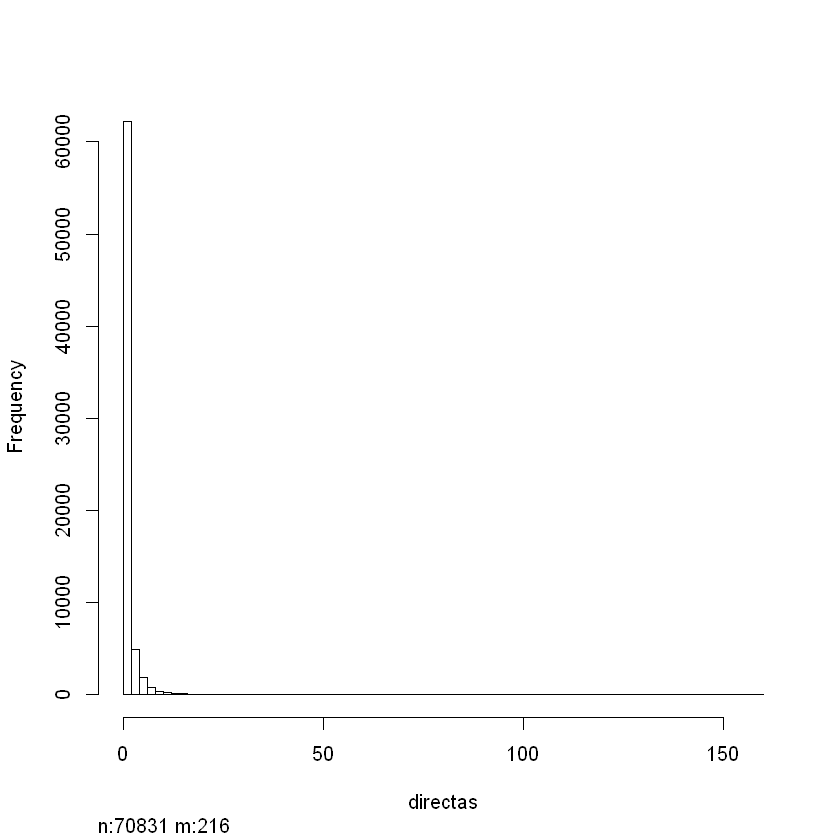

[1] 6


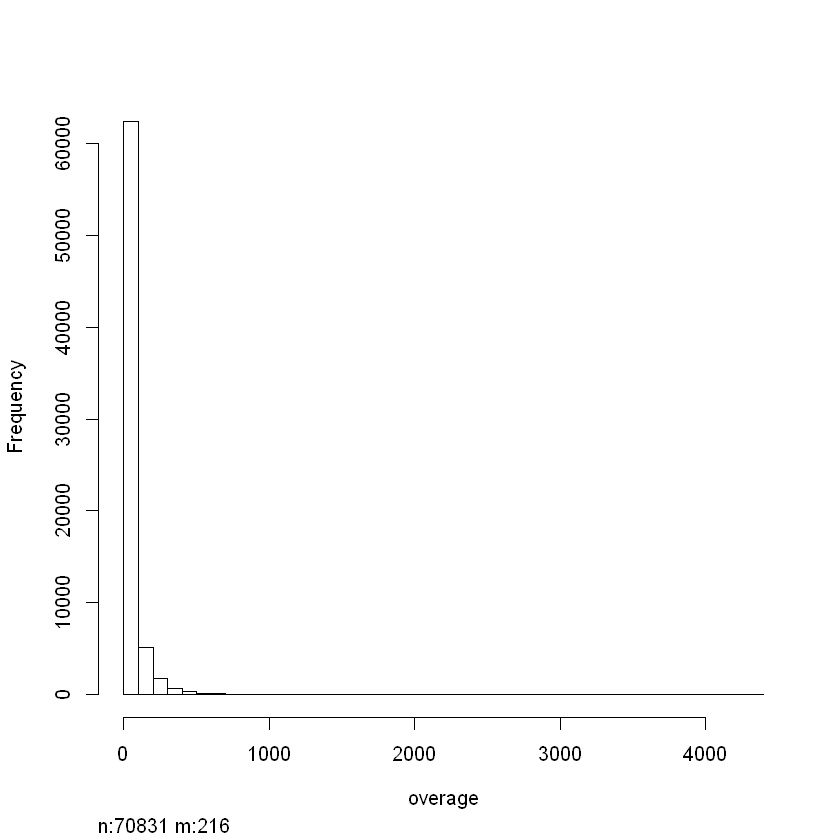

[1] 7


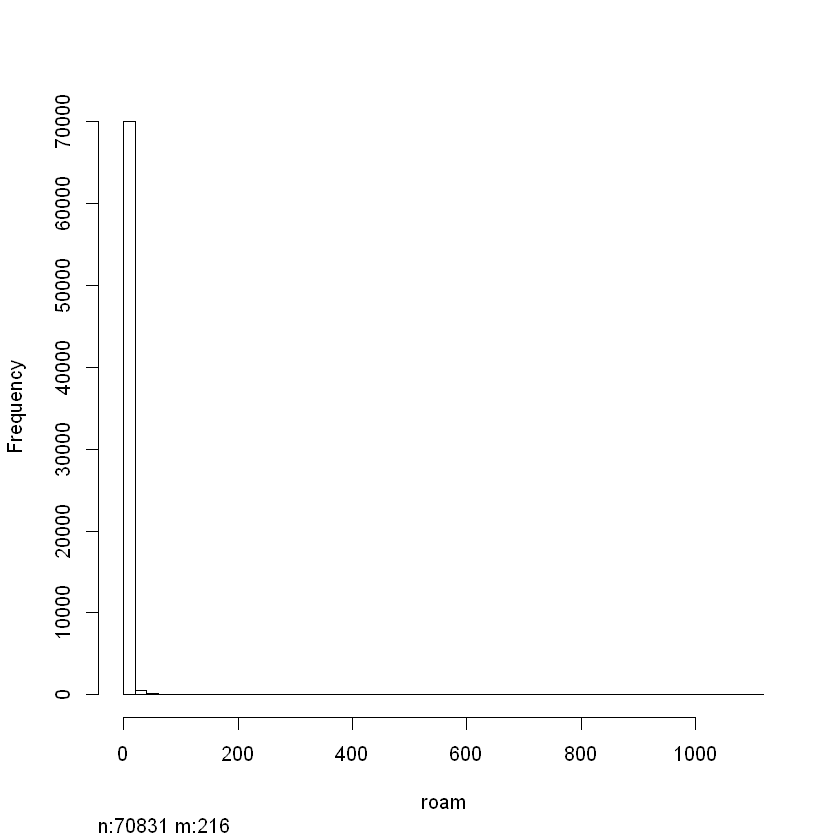

[1] 8


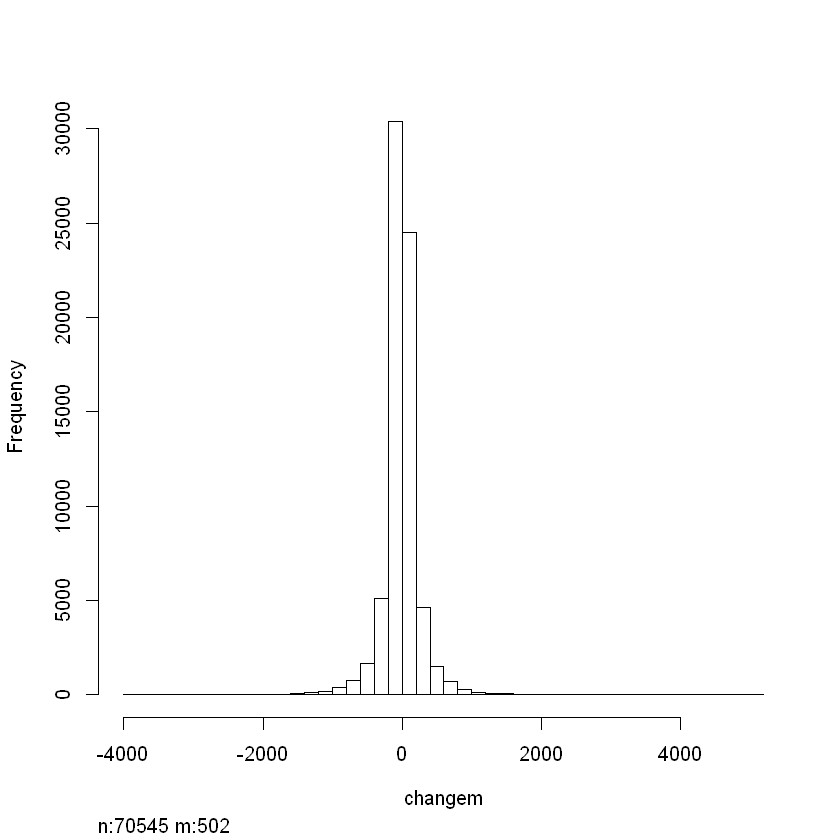

[1] 9


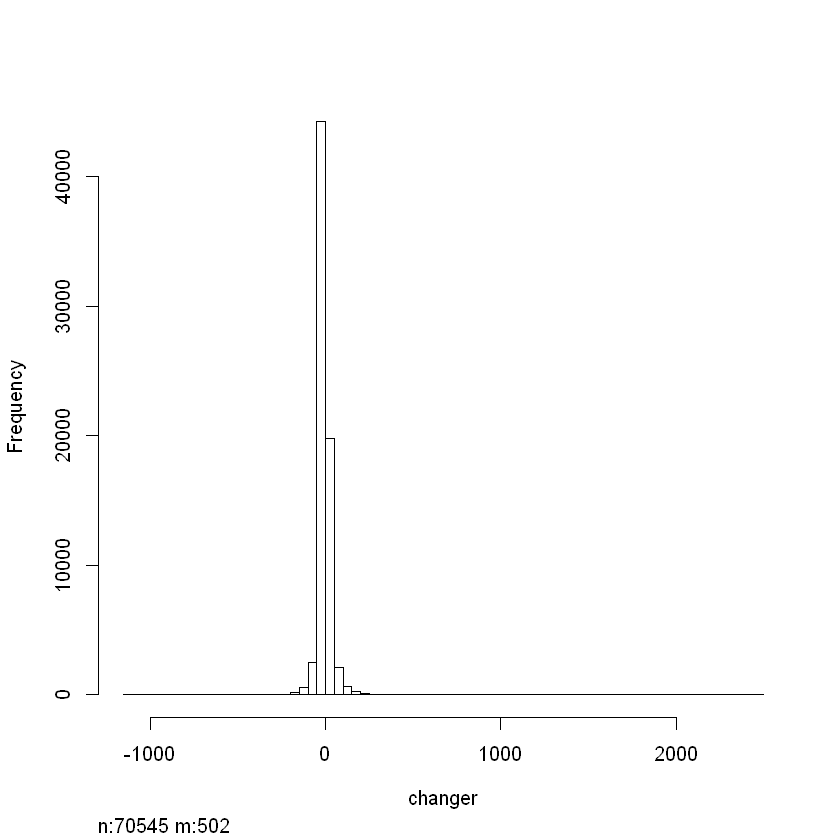

[1] 10


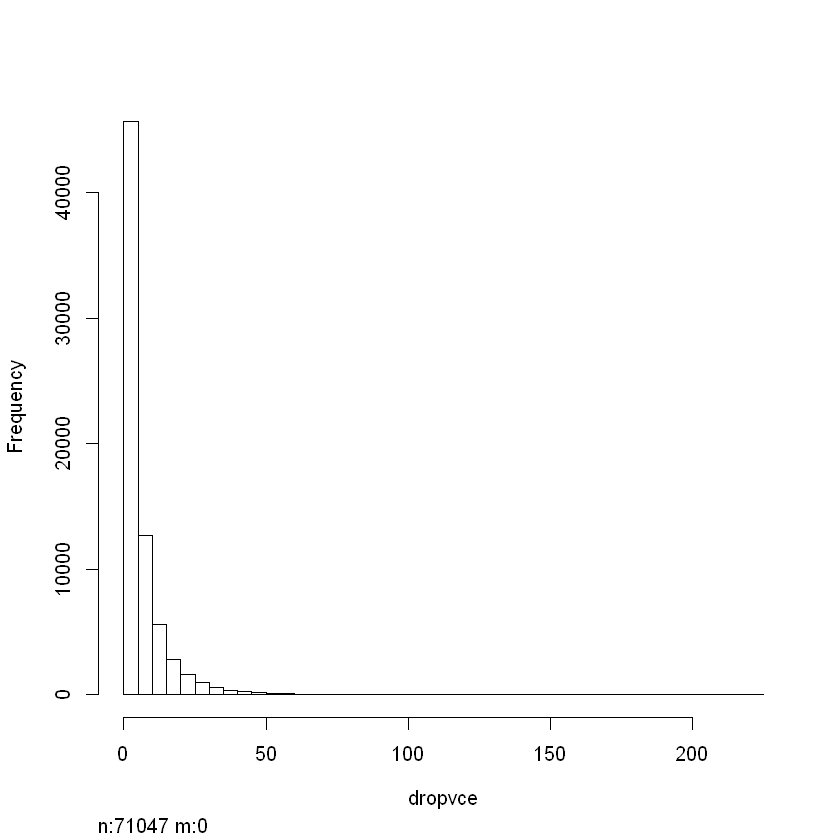

[1] 11


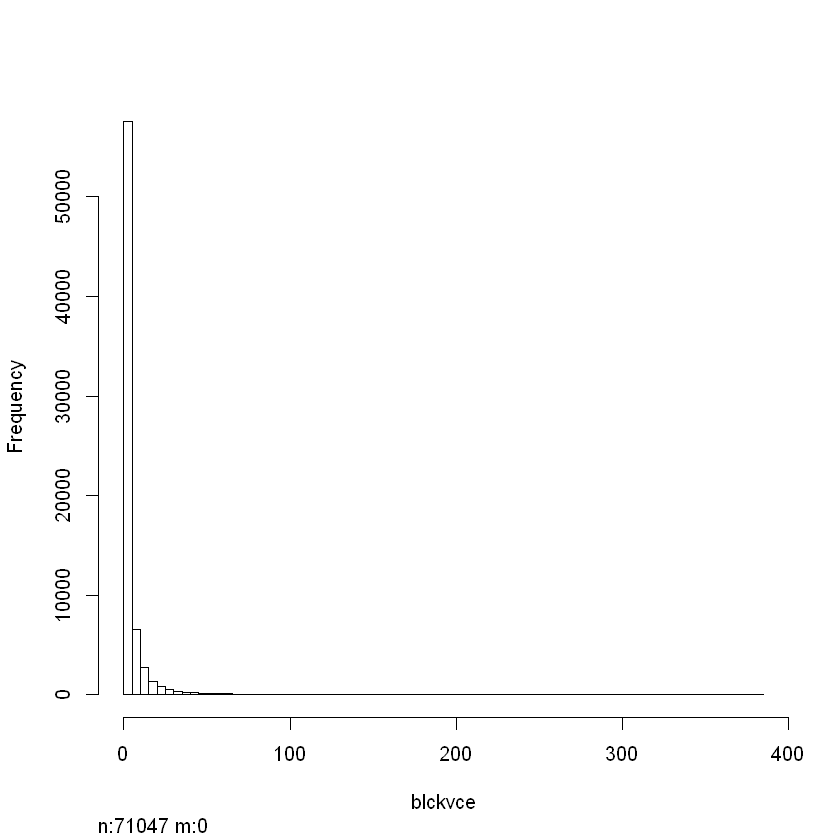

[1] 12


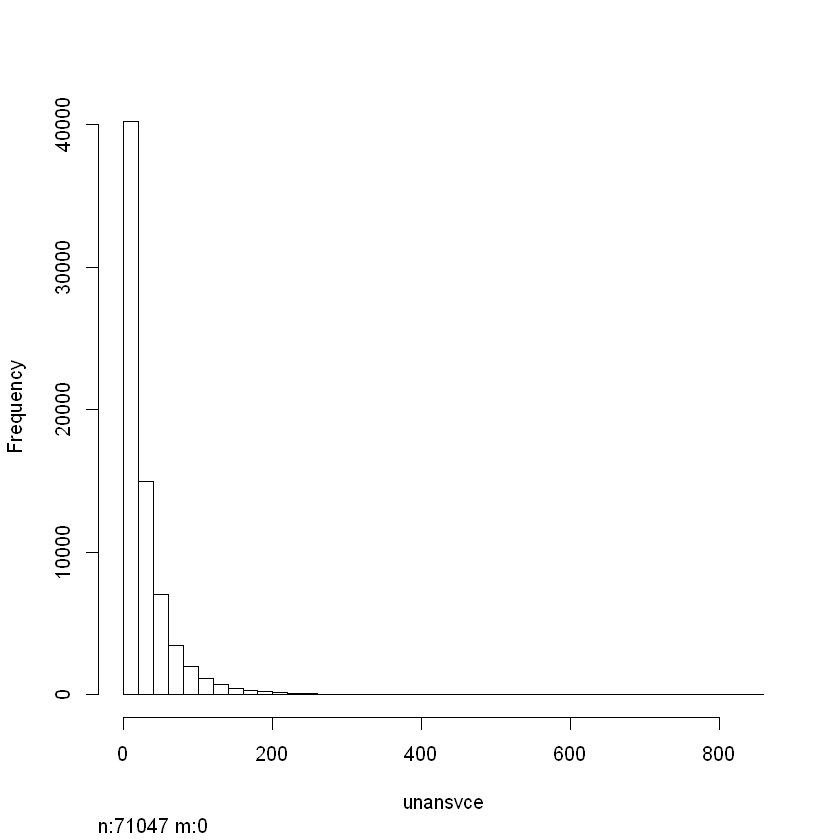

[1] 13


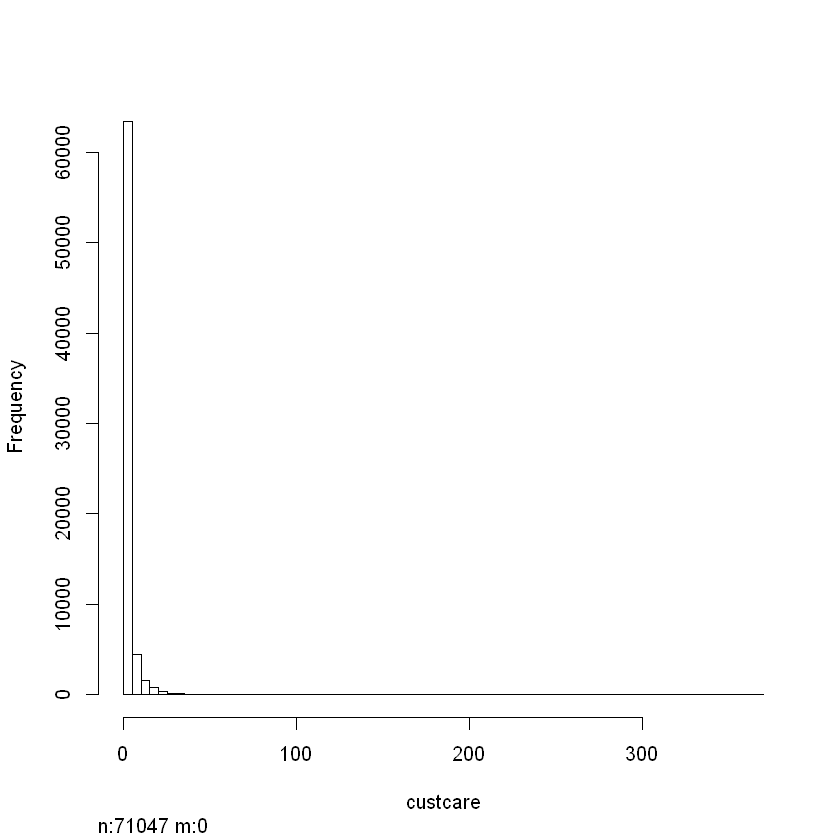

[1] 14


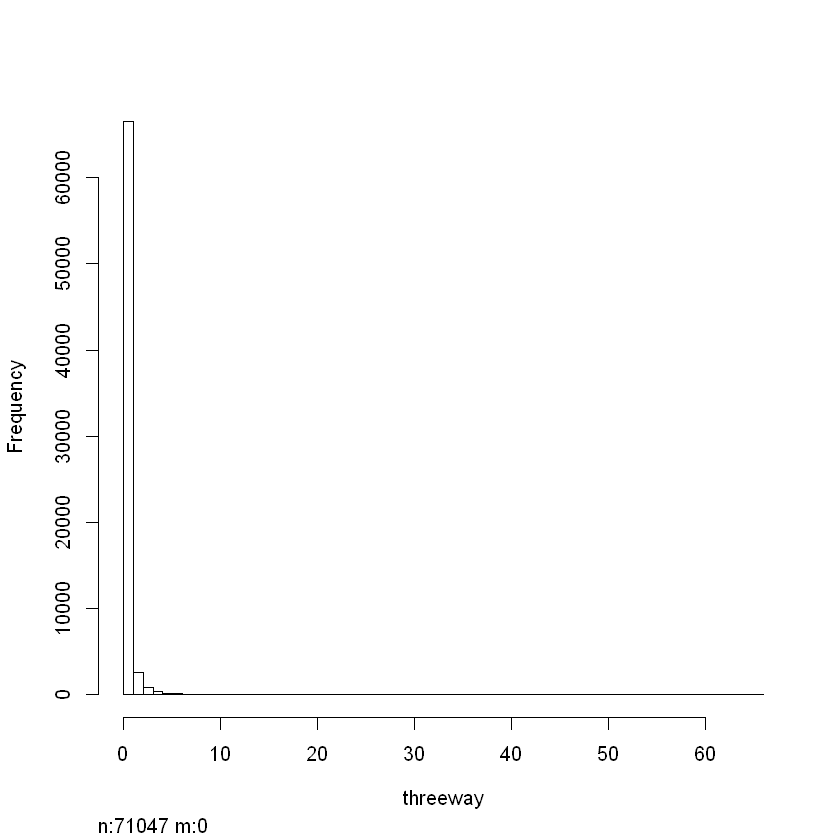

[1] 15


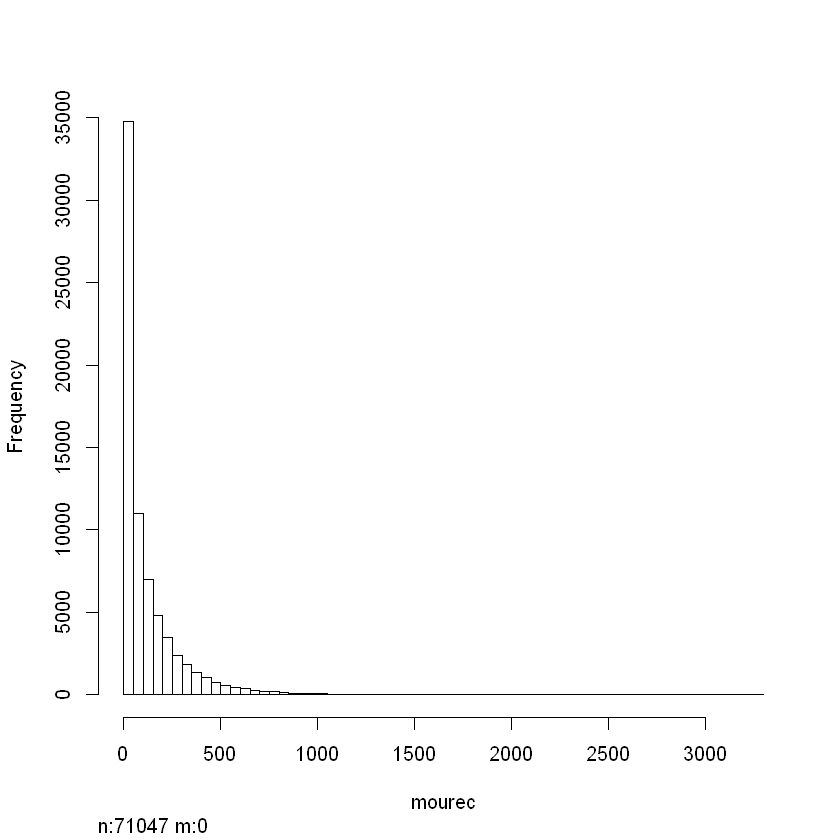

[1] 16


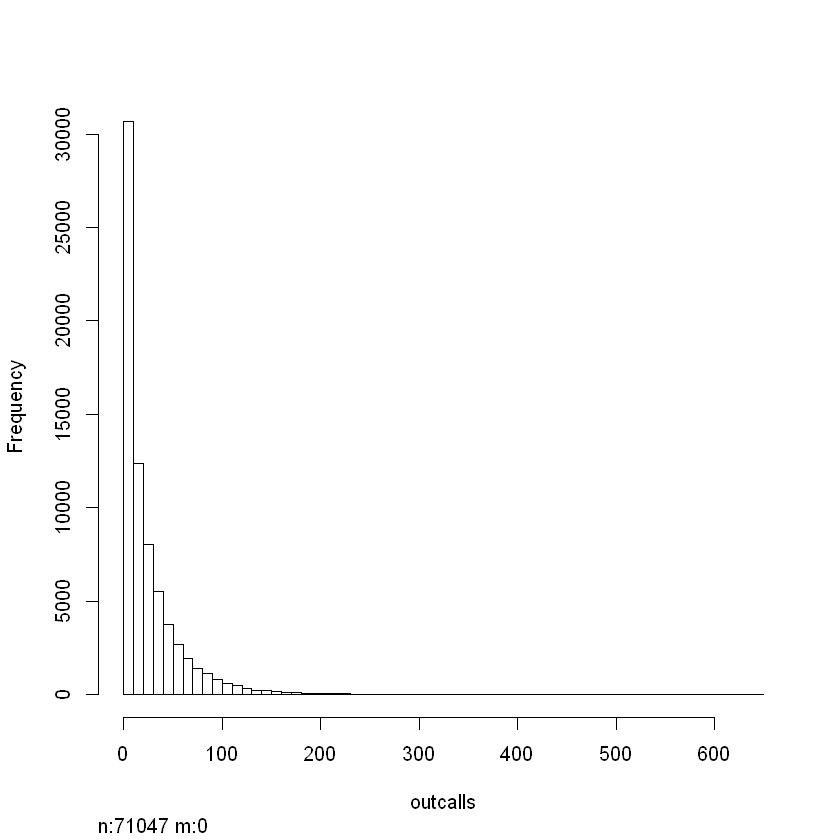

[1] 17


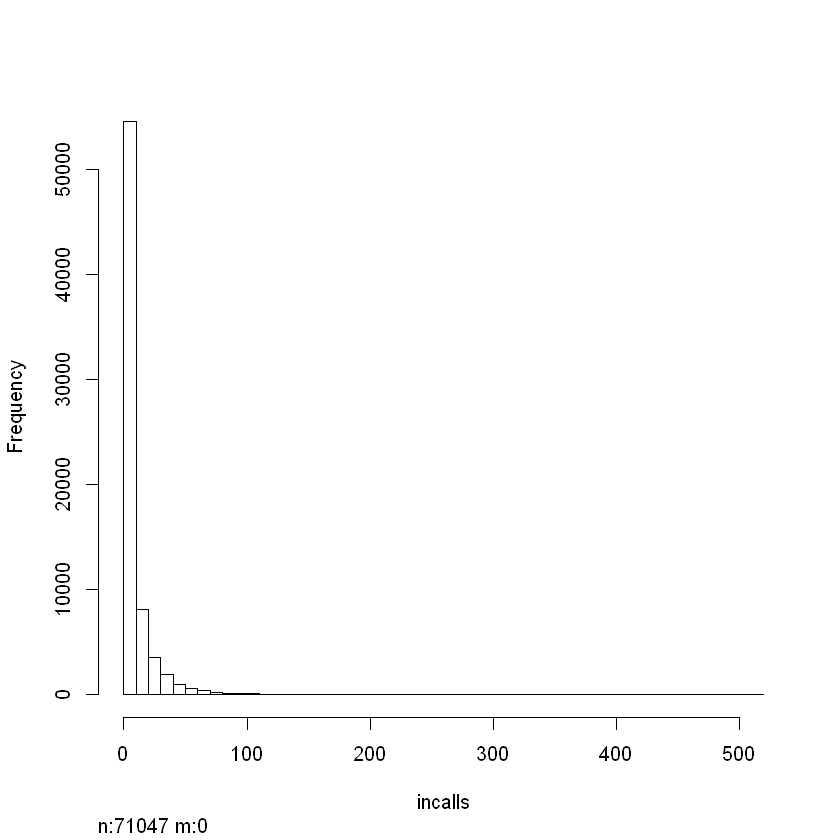

[1] 18


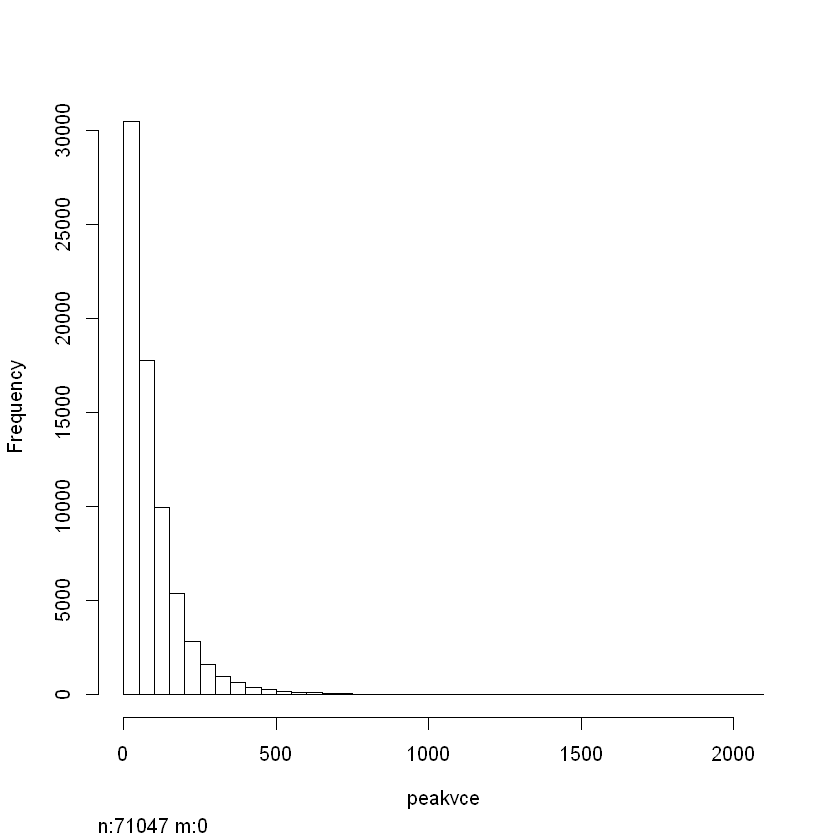

[1] 19


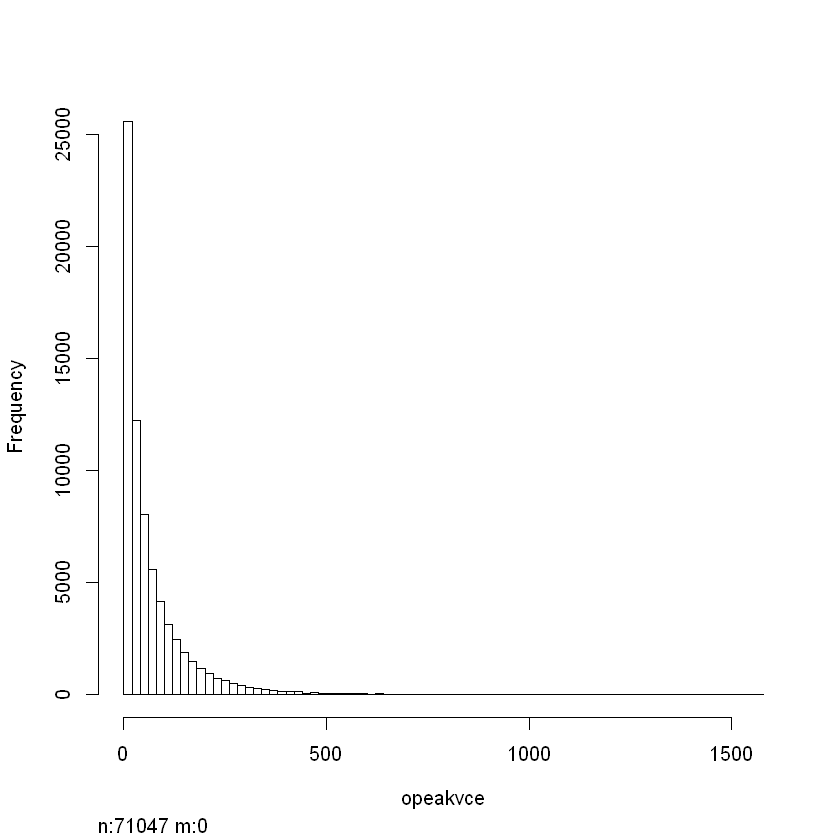

[1] 20


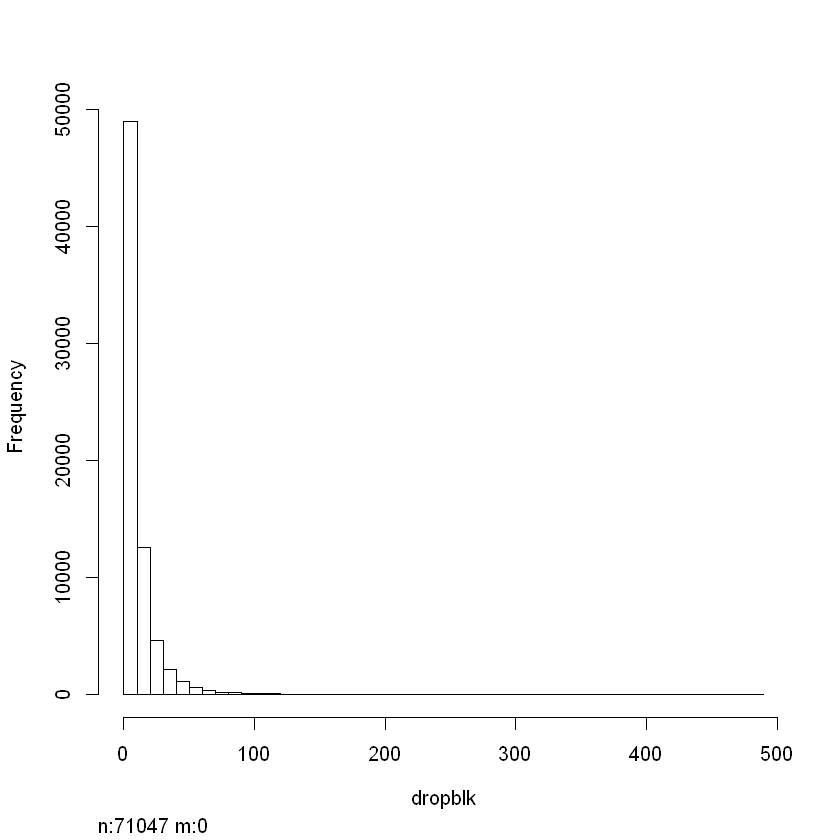

[1] 21


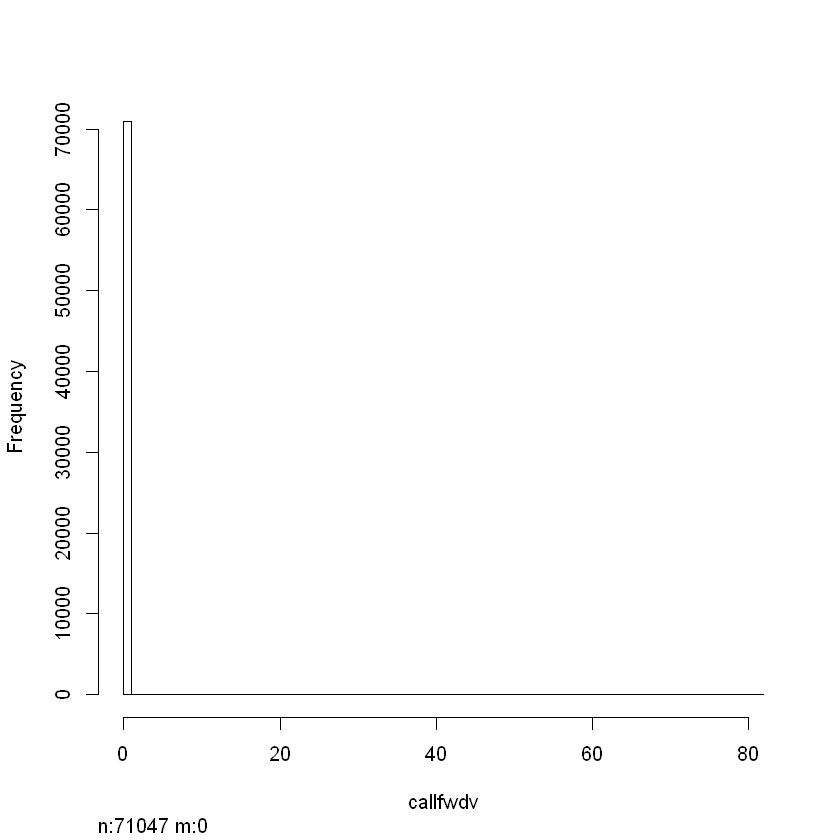

[1] 22


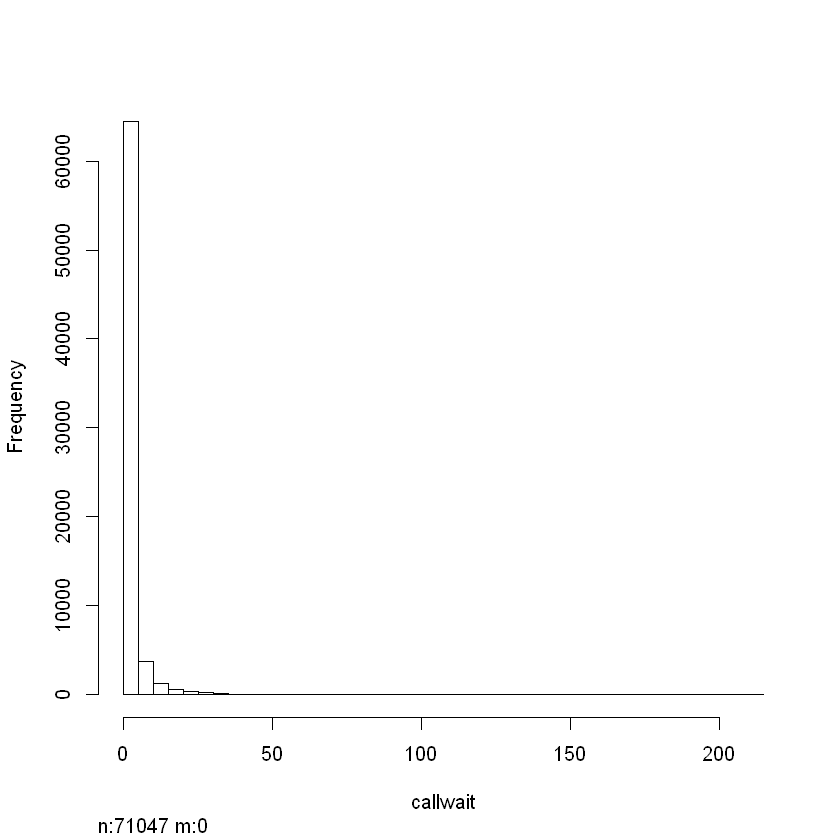

[1] 23


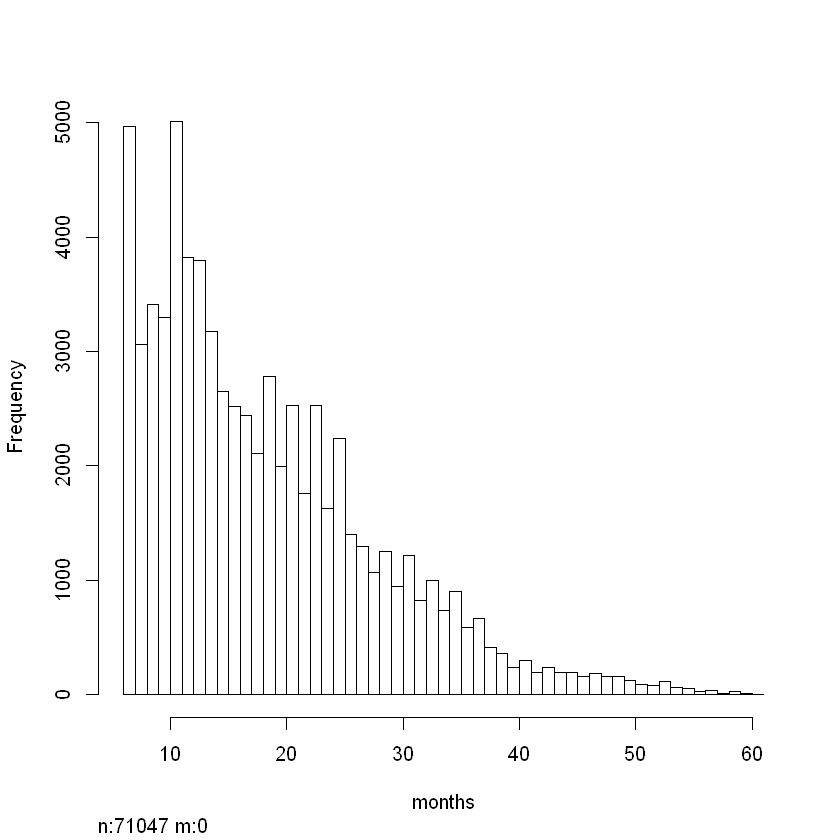

[1] 24


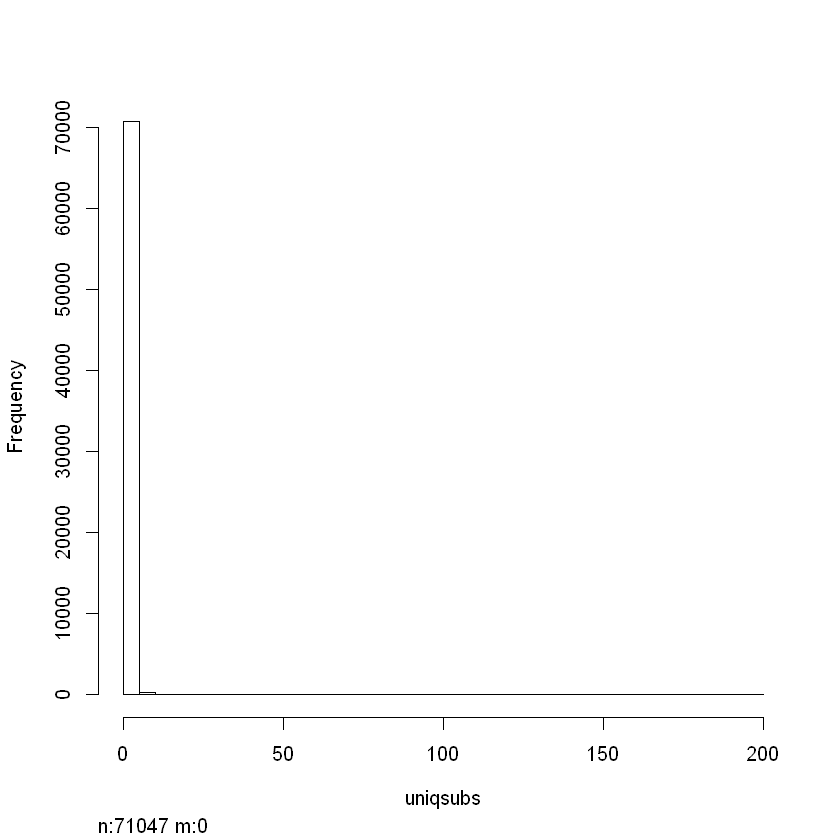

[1] 25


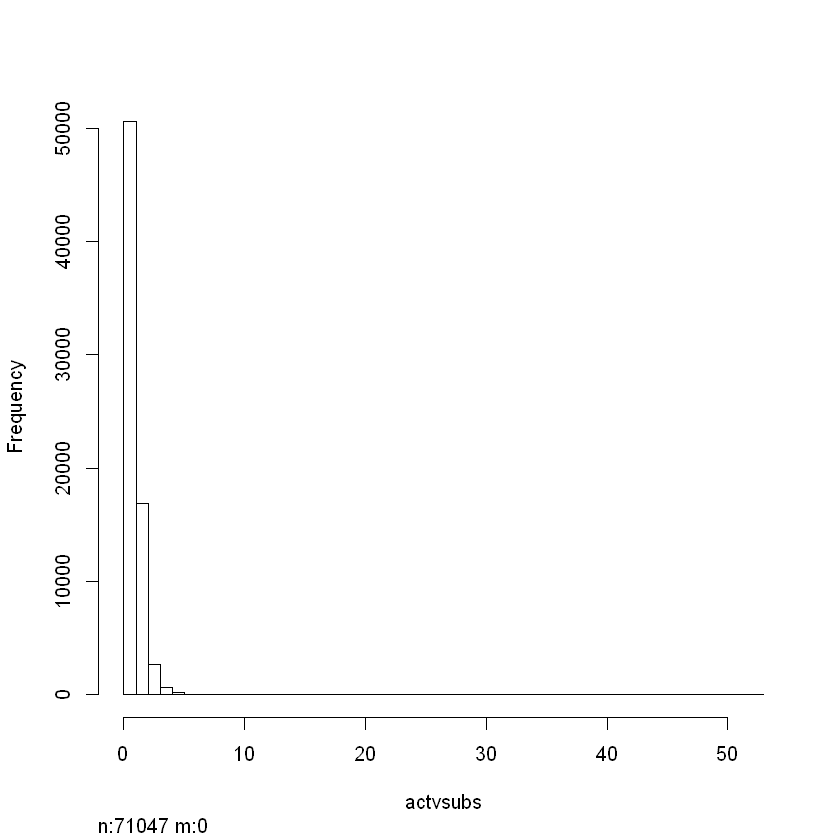

[1] 26


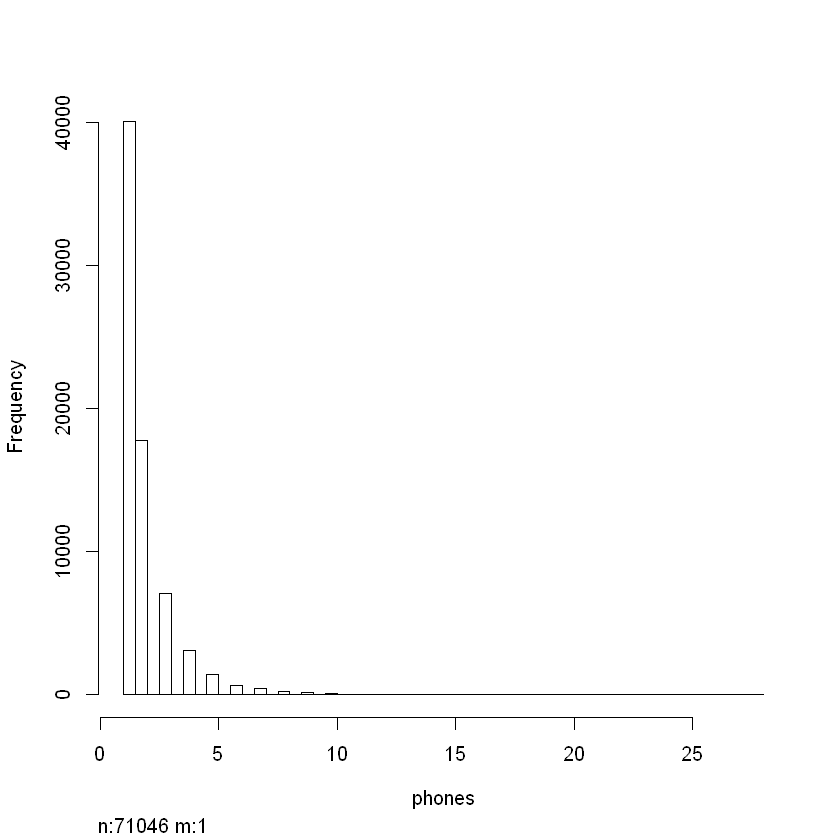

[1] 27


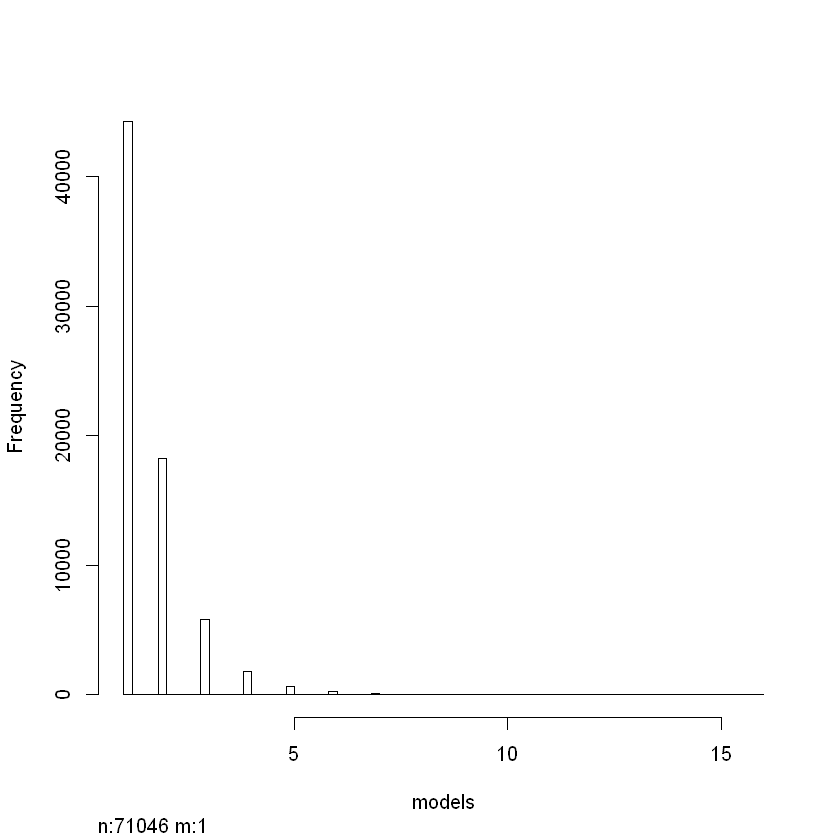

[1] 28


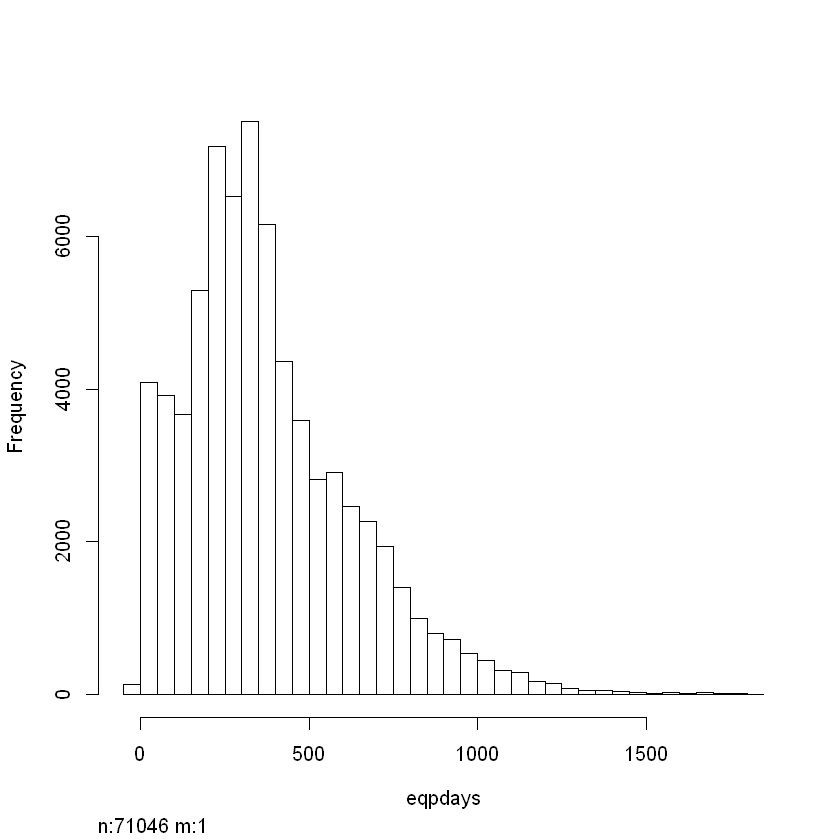

[1] 29


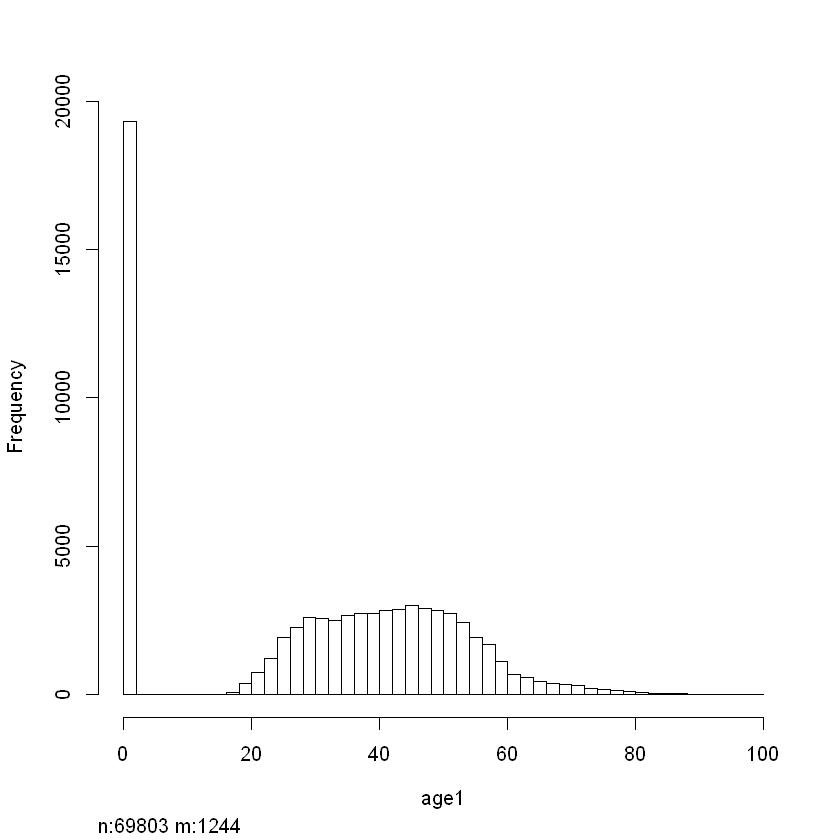

[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39


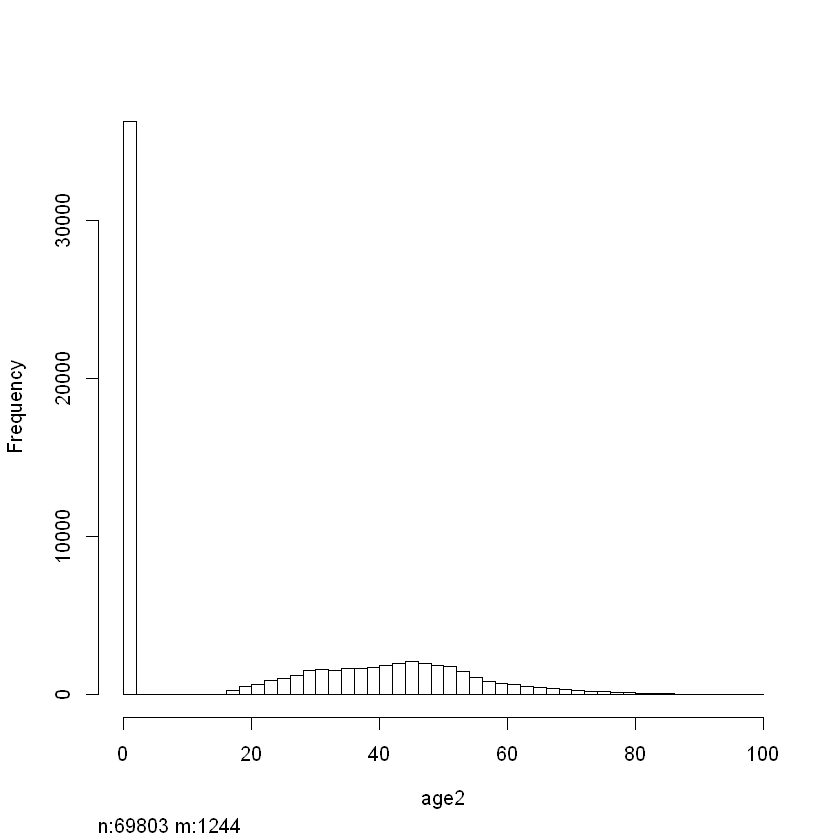

[1] 40
[1] 41


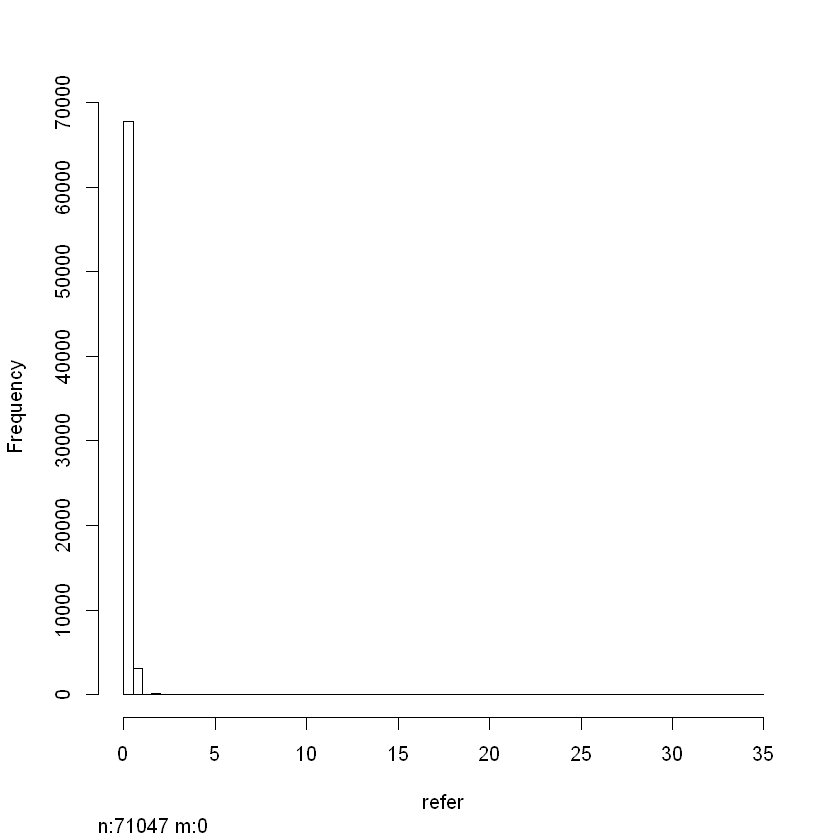

[1] 42
[1] 43


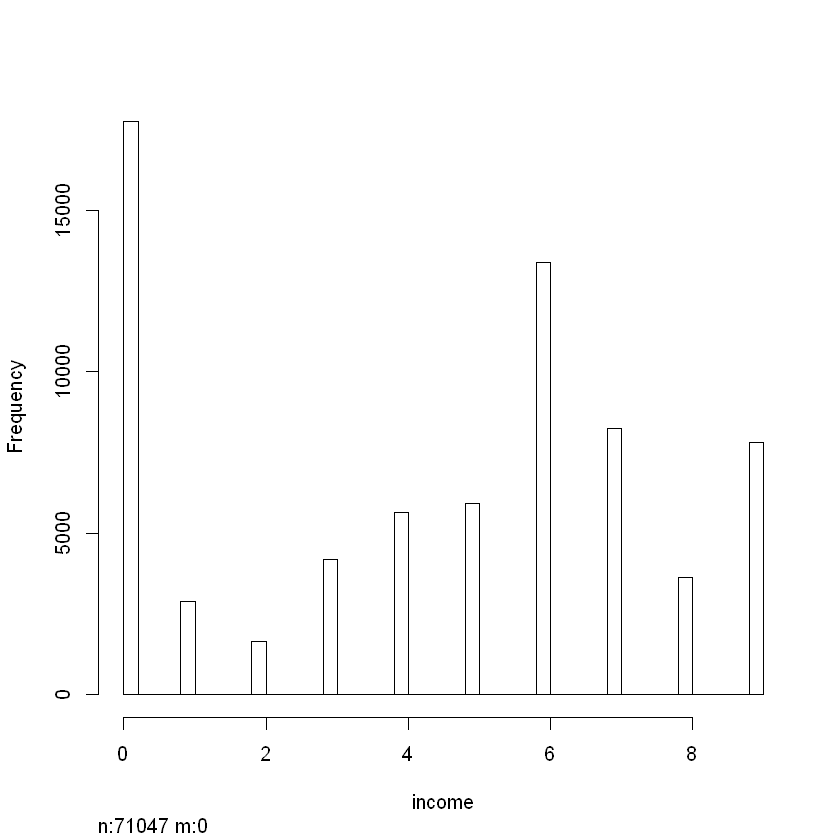

[1] 44
[1] 45


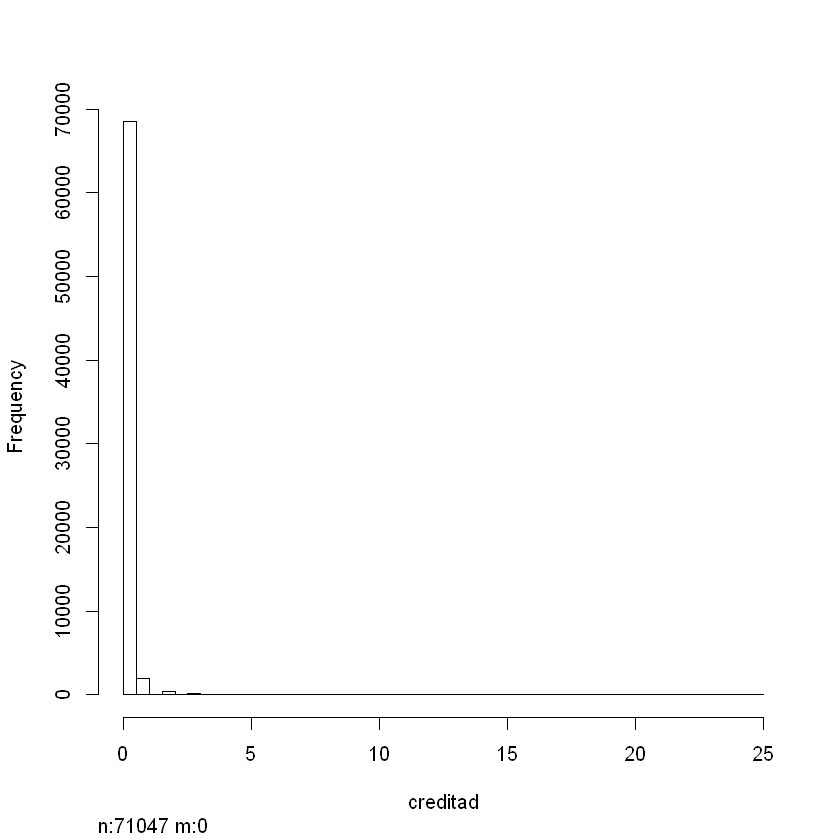

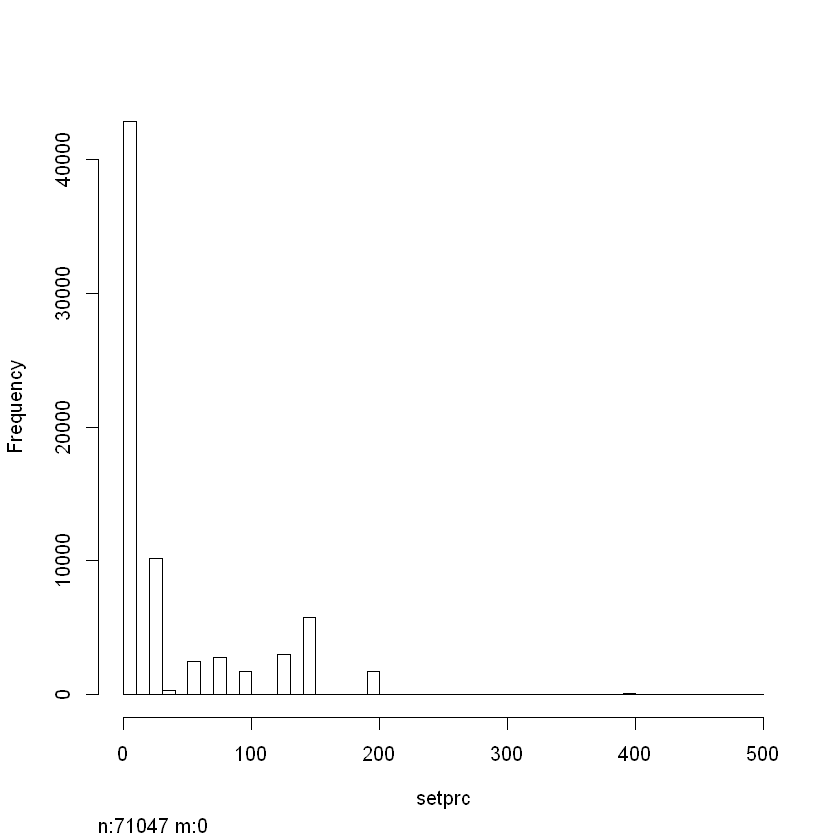

In [15]:
# Histogram of numeric variables

num_data <-cc[, sapply(cc, is.numeric)] 
for (i in 1:length(names(num_data))){
  print(i)
  hist( num_data[i], main='hist', breaks=20, prob=TRUE)
}

### Segregate into Categorical & Numerical variables

In [16]:
# Numeric variables
cc_num <- dplyr::select_if(cc, is.numeric)
num_var <- names(cc_num)

head(cc_num,5)
str(cc_num)

revenue,mou,recchrge,directas,overage,roam,changem,changer,dropvce,blckvce,...,travel,pcown,creditcd,refer,incmiss,income,mcycle,creditad,setprcm,setprc
57.49,482.75,37.43,0.25,22.75,0,532.25,50.99,8.33,1.00,...,0,0,1,0,0,5,0,1,0,149.99
82.28,1312.25,75.00,1.24,0.00,0,156.75,8.14,52.00,7.67,...,0,0,1,0,0,6,0,0,0,9.99
31.66,25.50,29.99,0.25,0.00,0,59.50,4.03,0.00,1.00,...,1,0,1,0,0,9,0,1,0,29.99
62.13,97.50,65.99,2.48,0.00,0,23.50,6.82,0.00,0.33,...,0,0,1,0,0,6,0,0,0,29.99
25.23,2.50,25.00,0.00,0.00,0,-2.50,-0.23,0.00,0.00,...,0,0,0,0,0,7,0,0,0,29.99


'data.frame':	71047 obs. of  45 variables:
 $ revenue : num  57.5 82.3 31.7 62.1 25.2 ...
 $ mou     : num  482.8 1312.2 25.5 97.5 2.5 ...
 $ recchrge: num  37.4 75 30 66 25 ...
 $ directas: num  0.25 1.24 0.25 2.48 0 2.23 0.25 0 0.74 0 ...
 $ overage : num  22.8 0 0 0 0 ...
 $ roam    : num  0 0 0 0 0 35.5 0 0 1.29 0 ...
 $ changem : num  532.2 156.8 59.5 23.5 -2.5 ...
 $ changer : num  50.99 8.14 4.03 6.82 -0.23 ...
 $ dropvce : num  8.33 52 0 0 0 9 3.33 2 2.67 1.67 ...
 $ blckvce : num  1 7.67 1 0.33 0 0 1.67 0.67 6 0.33 ...
 $ unansvce: num  61.33 76 2.33 4 0.33 ...
 $ custcare: num  1.67 4.33 0 4 0 0.33 1 0 4.33 0.33 ...
 $ threeway: num  0.33 1.33 0 0 0 0 0 0 0 0 ...
 $ mourec  : num  55.28 200.32 0 0 1.13 ...
 $ outcalls: num  46.33 370.33 0 3.67 0.33 ...
 $ incalls : num  6.33 147 0 0 0 4.67 3.67 4.67 8.33 5.67 ...
 $ peakvce : num  83.67 555.67 1.67 7.67 0.67 ...
 $ opeakvce: num  157 303.67 1.67 7.33 0.67 ...
 $ dropblk : num  9.33 59.67 1 0.33 0 ...
 $ callfwdv: num  0 0 0 0

In [17]:
# Categorical variables
cc_cat <- dplyr::select_if(cc, is.factor)
cat_var <- names(cc_cat)

str(cc_cat)
head(cc_cat)

'data.frame':	71047 obs. of  8 variables:
 $ churn     : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ calibrat  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ marry     : Factor w/ 3 levels "Married","Unknown",..: 3 3 1 3 2 3 2 3 3 3 ...
 $ mail      : Factor w/ 4 levels "Mail-Offer","Mail-Order",..: 2 2 2 2 3 1 3 2 2 2 ...
 $ cell      : Factor w/ 3 levels "CellPhone","NA",..: 3 1 3 1 1 1 3 3 3 1 ...
 $ occupation: Factor w/ 8 levels "Clerk","Craftsman",..: 4 4 7 5 4 4 4 4 4 4 ...
 $ prizm     : Factor w/ 4 levels "NA","Rural","Suburban",..: 1 1 1 1 1 3 3 1 3 1 ...
 $ credit    : Factor w/ 7 levels "A","AA","B","C",..: 5 4 1 1 1 4 3 1 1 3 ...


churn,calibrat,marry,mail,cell,occupation,prizm,credit
0,0,Unmarried,Mail-Order,No-CellPhone,NA,NA,DE
0,0,Unmarried,Mail-Order,CellPhone,NA,NA,C
0,0,Married,Mail-Order,No-CellPhone,Self-Employed,NA,A
0,0,Unmarried,Mail-Order,CellPhone,Professional,NA,A
0,0,Unknown,NA,CellPhone,NA,NA,A
0,0,Unmarried,Mail-Offer,CellPhone,NA,Suburban,C


### Descriptive Statistics

In [18]:
# Statistics function for Numeric variables

mystats_num = function(x) {
  nmiss=sum(is.na(x))
  c = class(x)
  a = x[!is.na(x)]
  m = mean(a,na.rm = T)
  med=median(a,na.rm = T)
  n = length(a)
  s = sd(a,na.rm = T)
  min = min(a,na.rm = T)
  q1=quantile(a,0.25,na.rm = T)
  q2=quantile(a,0.5,na.rm = T)
  q3=quantile(a,0.75,na.rm = T)
  p99=quantile(a,0.99,na.rm = T)
  p5=quantile(a,0.05,na.rm = T)
  p95=quantile(a,0.95,na.rm = T) 
  max = max(a,na.rm = T)
  UC = m+3*s
  LC = m-3*s
  outlier_flag = (max>p95 || min<p5) 
  return(c(class=c,n=n, nmiss=nmiss, outlier_flag=outlier_flag, mean=m,median=med, stdev=s,min = min,
           q1=q1,q2=q2,q3=q3,p99=p99,p5=p5,p95=p95,max=max,UC=UC,LC=LC ))
}

In [19]:
#Statistics function for Categorical variables

mystats_cat=function(x){
    Var_Type=class(x)
    n=length(x)
    nmiss=sum(is.na(x))
    return( c(Var_Type=Var_Type, n=n,nmiss=nmiss))
  }

In [20]:
# Save the stats in a file
num_stats <- data.frame(apply(cc_num,2,FUN = mystats_num))
write.csv(num_stats,"C:\\Data_Science\\Certifications\\AnalytixLabs\\Data Science in R\\Data Science with R - Final Projects\\Logistic Regression - Telecom Churn\\NumericStats.csv")

cat_stats <- t(data.frame(apply(cc_cat,2,FUN = mystats_cat))) 
write.csv(cat_stats,"C:\\Data_Science\\Certifications\\AnalytixLabs\\Data Science in R\\Data Science with R - Final Projects\\Logistic Regression - Telecom Churn\\CategoricalStats.csv")#View(cat_stats)


As per the problem description, "setprc" and "income" have '0' as missing values.
We will impute them with NA before handling NAs in following section

In [21]:
cc_num$setprc[cc_num$setprc==0] <- NA
cc_num$income[cc_num$income==0] <- NA

### Find Missing or "NA" values

In [22]:
# User-Defined function to find NAs for cc dataframe

findMissingValues <- function(x) {
na_cnt <- colSums(is.na(x))
columns <- colnames(x)   
na_percent <- apply(x, 2, function(col)sum(is.na(col))*100/length(col))
tot_cnt <- apply(x, 2, function(col)length(col))
res <- data.frame(columns,tot_cnt,na_cnt,na_percent)
print(res[order(res$na_percent),]) 
                 
list_na <- colnames(x)[ apply(x, 2, anyNA) ]

gg <- ggplot(data = res, mapping = aes(x = na_percent, y = columns)) + geom_point(alpha = 1, aes(color = columns))
print(list_na) 
gg              
                
}            

          columns tot_cnt na_cnt   na_percent
dropvce   dropvce   71047      0  0.000000000
blckvce   blckvce   71047      0  0.000000000
unansvce unansvce   71047      0  0.000000000
custcare custcare   71047      0  0.000000000
threeway threeway   71047      0  0.000000000
mourec     mourec   71047      0  0.000000000
outcalls outcalls   71047      0  0.000000000
incalls   incalls   71047      0  0.000000000
peakvce   peakvce   71047      0  0.000000000
opeakvce opeakvce   71047      0  0.000000000
dropblk   dropblk   71047      0  0.000000000
callfwdv callfwdv   71047      0  0.000000000
callwait callwait   71047      0  0.000000000
months     months   71047      0  0.000000000
uniqsubs uniqsubs   71047      0  0.000000000
actvsubs actvsubs   71047      0  0.000000000
children children   71047      0  0.000000000
refurb     refurb   71047      0  0.000000000
webcap     webcap   71047      0  0.000000000
truck       truck   71047      0  0.000000000
rv             rv   71047      0  

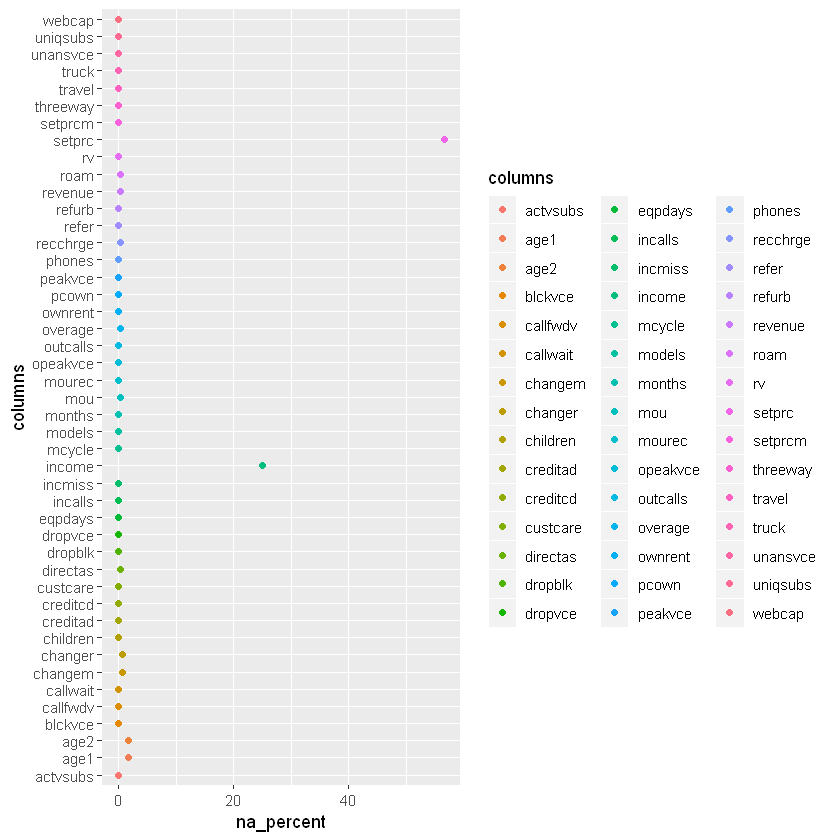

In [23]:
findMissingValues(cc_num)

In [24]:
# income and setprc have 25% and 56% missing values, so we will drop these features

cc_num <- subset(cc_num,select=-c(income,setprc))

### Impute missing values with mean

In [25]:
#Mean value treatment for Numerical variables
#Store the columns with NA values in list_na
#Find the mean values of such columns

list_na <- colnames(cc_num)[ apply(cc_num, 2, anyNA) ]
list_na

average_missing <- apply(cc_num[,colnames(cc_num) %in% list_na], 2, mean, na.rm =  TRUE)
average_missing

[1] "revenue"  "mou"      "recchrge" "directas" "overage"  "roam"    
 [7] "changem"  "changer"  "phones"   "models"   "eqpdays"  "age1"    
[13] "age2"

revenue         mou    recchrge    directas     overage        roam 
 58.8539614 525.7283924  46.8764916   0.8948011  40.0953598   1.2215262 
    changem     changer      phones      models     eqpdays        age1 
-10.8464614  -1.2059256   1.8086170   1.5617910 380.2656307  31.3751128 
       age2 
 21.1577153

In [26]:
#Impute Missing data with the Mean or Median

cc_num$revenue[is.na(cc_num$revenue)] <- 58.8539614010814
cc_num$mou[is.na(cc_num$mou)] <- 525.728392370572
cc_num$recchrge[is.na(cc_num$recchrge)] <- 46.8764916491367
cc_num$directas[is.na(cc_num$directas)] <- 0.894801146390705
cc_num$overage[is.na(cc_num$overage)] <- 40.0953598000875
cc_num$roam[is.na(cc_num$roam)] <- 1.22152616792083

cc_num$changem[is.na(cc_num$changem)] <- -10.8464614076122
cc_num$changer[is.na(cc_num$changer)] <- -1.20592557941739
cc_num$phones[is.na(cc_num$phones)] <- 1.80861695239704
cc_num$models[is.na(cc_num$models)] <- 1.56179095234074

#EQUPDAYS cannot have decimal values, so we round off to a whole number
cc_num$eqpdays[is.na(cc_num$eqpdays)] <- 380
cc_num$age1[is.na(cc_num$age1)] <- 31.3751128175007
cc_num$age2[is.na(cc_num$age2)] <- 21.1577152844434


              columns tot_cnt na_cnt na_percent
churn           churn   71047      0          0
calibrat     calibrat   71047      0          0
marry           marry   71047      0          0
mail             mail   71047      0          0
cell             cell   71047      0          0
occupation occupation   71047      0          0
prizm           prizm   71047      0          0
credit         credit   71047      0          0
character(0)


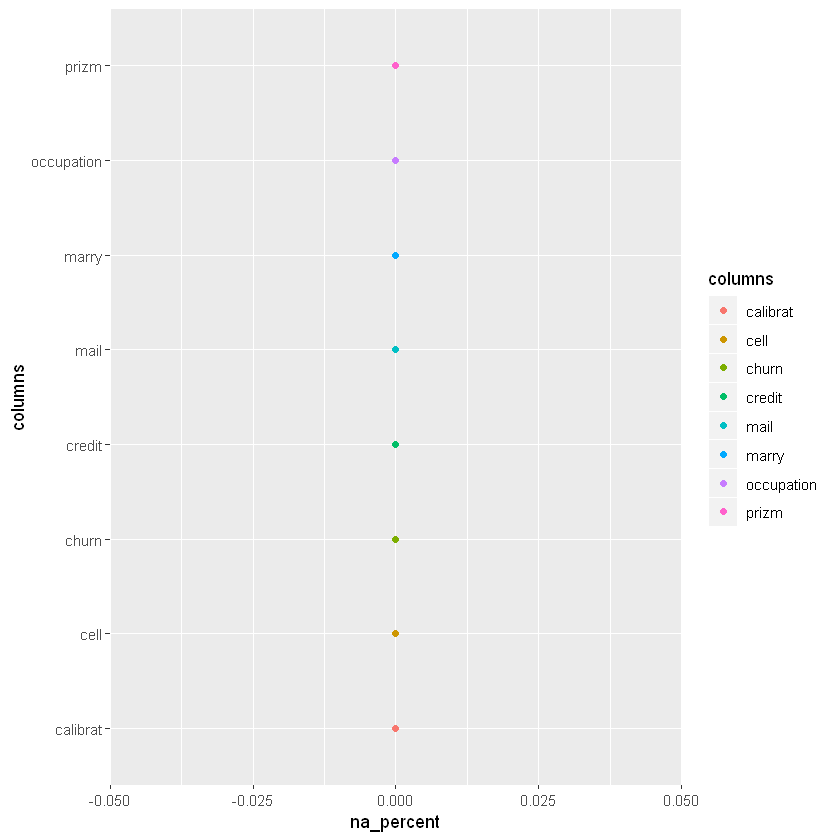

In [27]:
# No missing values as expected for Categorical variables

findMissingValues(cc_cat)

### Treatment of Outliers

In [28]:
# Create a function that will find and cap the outliers.
# An outlier is considered if it is below the (Q1 – 1.5*IQR) or above (Q3 + 1.5*IQR)
# Or, an outlier is considered if it is below the 5th percentile or above 95th percentile
# We will cap the low and high outliers with 5th and 95th percentile values respectively

HandleOutlier <- function(x,names){
  
   m1 <- mean(x, na.rm = T) 
   cat("\n Mean with outliers:\n", round(m1, 4))
   OutVals = boxplot(x, main="Boxplot with outliers",horizontal = TRUE,col = "red")$out
   cat("\n Pre-treatment Outliers:\n", OutVals)
   
   which(x %in% OutVals)    
#   hist(x, main="Histogram with outliers", xlab=NA, ylab=NA, col="red",)
#   plot(x,xlab="Plot with Outliers", ylab="values", pch="*", col="red", cex=2)

# Method 1: Capping with 5th and 95th percentiles for outliers defined by IQR 
    
#   qnt <- quantile(x, probs=c(.25, .75), na.rm = T)
#   caps <- quantile(x, probs=c(.05, .95), na.rm = T)
#   H <- 1.5 * IQR(x, na.rm = T)
#   x[x < (qnt[1] - H)] <- caps[1]
#   x[x > (qnt[2] + H)] <- caps[2]
    
# Method 2: Capping outliers with 5th and 95th percentiles 
    quantiles <- quantile(x, c(.05, .95), na.rm = T)
    x[ x < quantiles[1] ] <- quantiles[1]
    x[ x > quantiles[2] ] <- quantiles[2]
    
# Method 3: We can replace the outliers with NAs and later impute NAs using MICE or kNN  
    
#  y[x < (qnt[1] - H)] <- NA
#  y[x > (qnt[2] + H)] <- NA
    
# Method 4: Imputation with mean / median / mode
    
#  x[x < (qnt[1] - H)] <- median(x, na.rm = T)
#  x[x > (qnt[2] + H)] <- median(x, na.rm = T)
#  x[x < (qnt[1] - H)] <- mean(x, na.rm = T)
#  x[x > (qnt[2] + H)] <- mean(x, na.rm = T)
#  x[x < (qnt[1] - H)] <- mode(x, na.rm = T)
#  x[x > (qnt[2] + H)] <- mode(x, na.rm = T)
    
   m2 <- mean(x, na.rm = T)
   cat("\n Mean without outliers:\n", round(m2, 4))
   OutVals = boxplot(x, main="Boxplot without outliers",horizontal = TRUE,col = "green")$out
      
   cat("\n Post-treatment Outliers:\n", OutVals)
    
   which(x %in% OutVals)
#   hist(x, main="Histogram without outliers", xlab=NA, ylab=NA, col="green")
#   plot(x,xlab="Plot without Outliers", ylab="values", pch="*", col="green", cex=2)

    return(x)
}


 Mean with outliers:
 58.854
 Pre-treatment Outliers:
 212.52 342.86 163.54 196.76 226.01 281.33 166.43 166.82 529.63 129.92 145.15 129.43 213.35 134.57 187.35 167.11 203.97 332.74 131.12 135.99 349.73 300.22 163.39 144.23 150.36 276.15 138.97 129.45 180.82 195.16 219.95 194.57 312.26 208.59 177.81 137.29 255.54 136.7 128.1 131.3 140.74 217.64 311.63 139.91 127.91 144.56 151.24 208.28 132.46 177.48 159.65 148.33 212.72 218.69 300.41 291.57 161.16 236.91 152.73 327.18 150.78 230 140.63 150.62 132.79 150.5 179.07 181.75 261.83 130.04 135.51 144.05 163.44 162.36 237.94 130.16 159.06 127.43 152.79 155.16 135.11 171.33 172.74 130.91 162.56 286.19 479.09 152.76 153.9 138.7 178.2 297.91 387.76 158.81 135.31 246.9 136.14 165.05 132.51 222.16 176.2 310.51 201.02 173.2 193.11 153.99 127.12 173.14 261.27 155.66 150.03 157.69 232.24 162.44 189.58 268.52 138.78 197.19 156.95 200.79 131.68 179.84 151.16 151.69 157.61 158.47 146.38 173.73 163.45 134.52 148.58 128.47 142.34 176.08 172.69 149.73 145.7

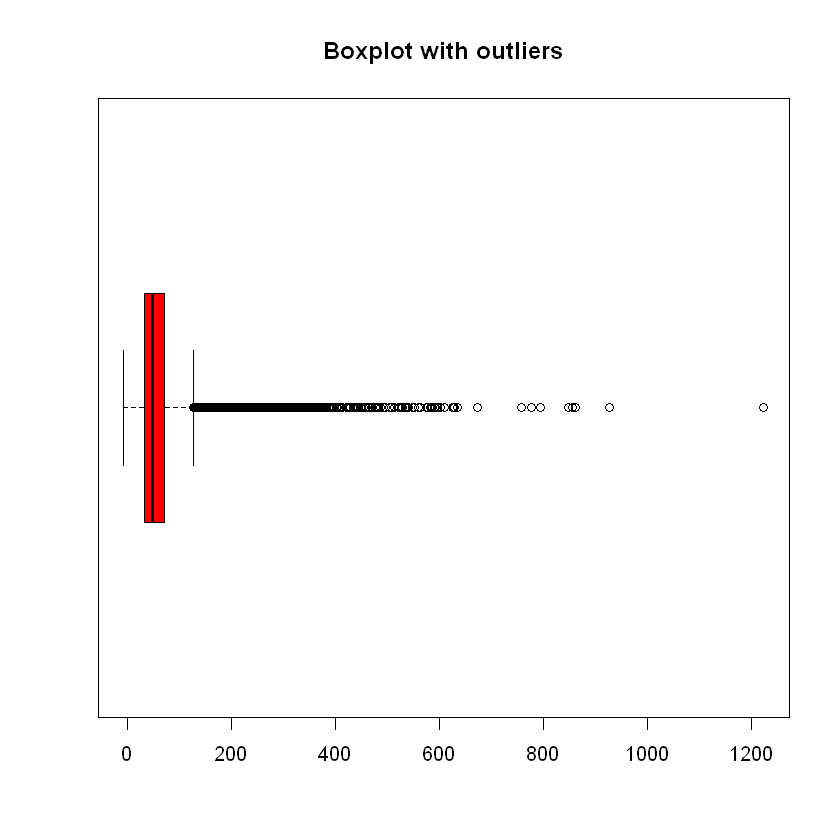


 Post-treatment Outliers:
 135.24 135.24 135.24 135.24 135.24 135.24 135.24 135.24 135.24 129.92 135.24 129.43 135.24 134.57 135.24 135.24 135.24 135.24 131.12 135.24 135.24 135.24 135.24 135.24 135.24 135.24 135.24 129.45 135.24 135.24 135.24 135.24 135.24 135.24 135.24 135.24 135.24 135.24 128.1 131.3 135.24 135.24 135.24 135.24 127.91 135.24 135.24 135.24 132.46 135.24 135.24 135.24 135.24 135.24 135.24 135.24 135.24 135.24 135.24 135.24 135.24 135.24 135.24 135.24 132.79 135.24 135.24 135.24 135.24 130.04 135.24 135.24 135.24 135.24 135.24 130.16 135.24 127.43 135.24 135.24 135.11 135.24 135.24 130.91 135.24 135.24 135.24 135.24 135.24 135.24 135.24 135.24 135.24 135.24 135.24 135.24 135.24 135.24 132.51 135.24 135.24 135.24 135.24 135.24 135.24 135.24 127.12 135.24 135.24 135.24 135.24 135.24 135.24 135.24 135.24 135.24 135.24 135.24 135.24 135.24 131.68 135.24 135.24 135.24 135.24 135.24 135.24 135.24 135.24 134.52 135.24 128.47 135.24 135.24 135.24 135.24 135.24 135.24 127.58 1

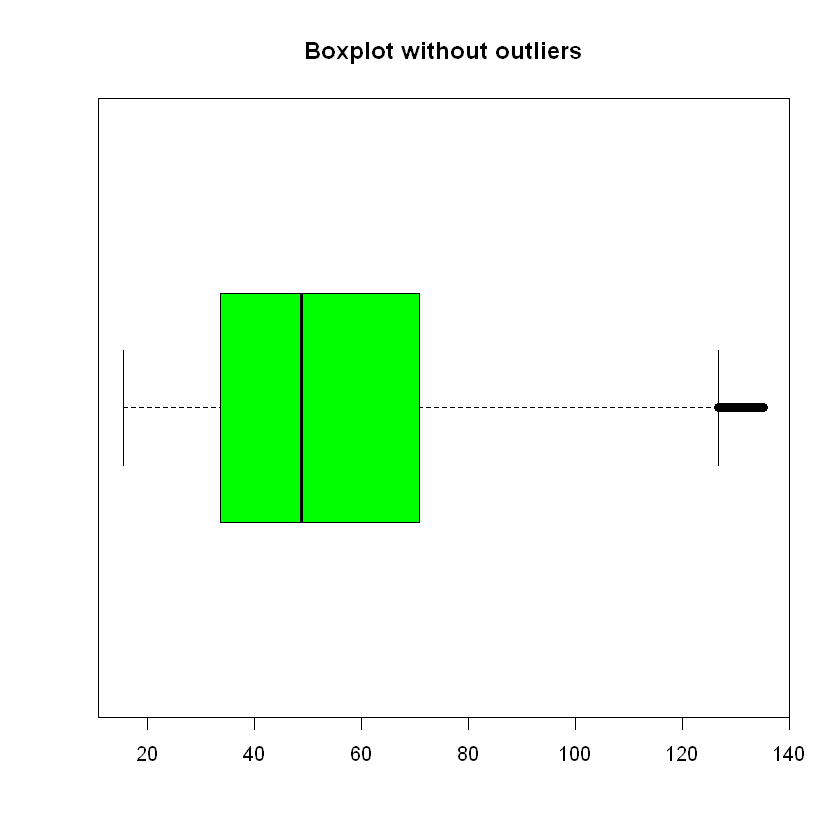


 Pre-treatment Outliers:
 1971.5 2961.25 1671 3479 1804 2337.5 1807.25 1697.25 3807.75 1806.5 1729.5 2297.75 2060.5 2745.5 3206 1728.5 2214.75 1621.75 1610.75 5863.25 1592.25 2311 2057.5 2185.25 1730 1790.25 2845.25 2935.25 1858.75 2982.25 2241.25 1642.75 2330.75 2486.75 3251.75 2007.75 4830.25 1637.75 1655.5 1680 2571.25 1795 1711.75 1567.25 2221 3142 2468.25 2021.25 1790.75 1943.25 2082.25 2583.75 2072.25 1994.75 1652 2445.25 1713.5 2509.25 2157 3626.25 1938 1908.75 1631.75 1585.25 1584.25 2230.5 1677.25 1942.25 2939.5 1630.75 2028 2309.75 1658.25 1578 1579.5 1854 3240.5 1984 1871 1650.25 1851.75 1657 1648.75 1633 2019.75 1688 4085.5 2411.25 1824.75 2191.75 1849.25 2052.75 3442.5 2529.5 2037 2597 1785.75 1847.5 1954.75 1847.25 1690.5 1989 2305 1646.75 2001.25 1646.25 1726.25 1728.75 1921.25 1722 1835 1623 2470 2708.75 2024 1805.25 2149 1734.5 1629.75 2082 3124 2435.75 1935 2165 2158.25 2588.25 1729.25 2696.5 2410.25 1839.5 2243.25 2476.75 2030.75 1946 1630 2178.5 1845.5 1613.25 3596

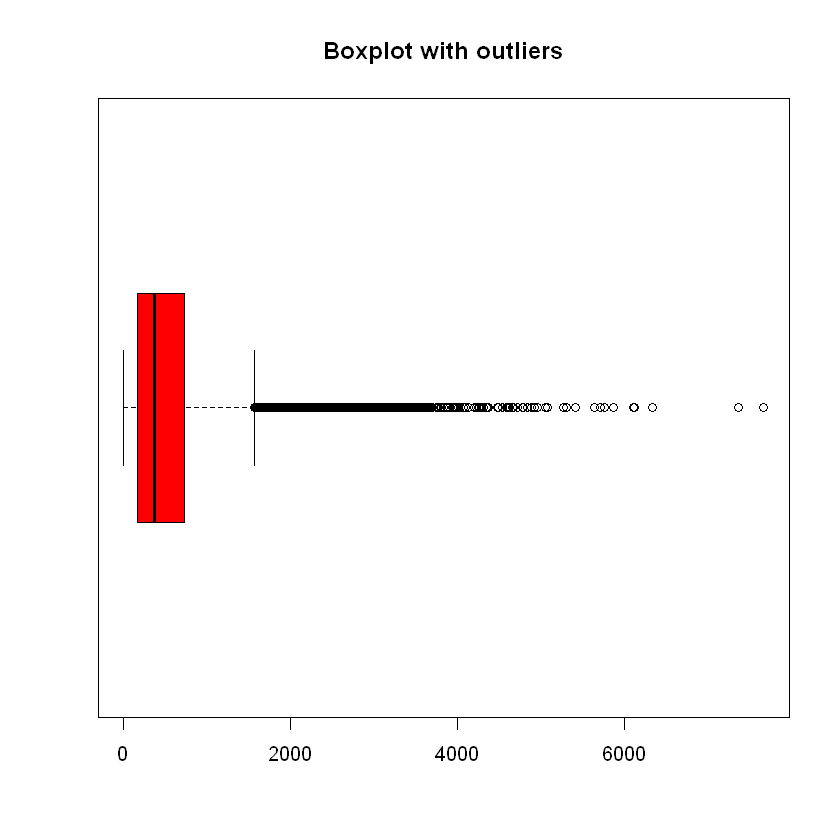


 Post-treatment Outliers:
 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1567.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1578 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25 1579.25

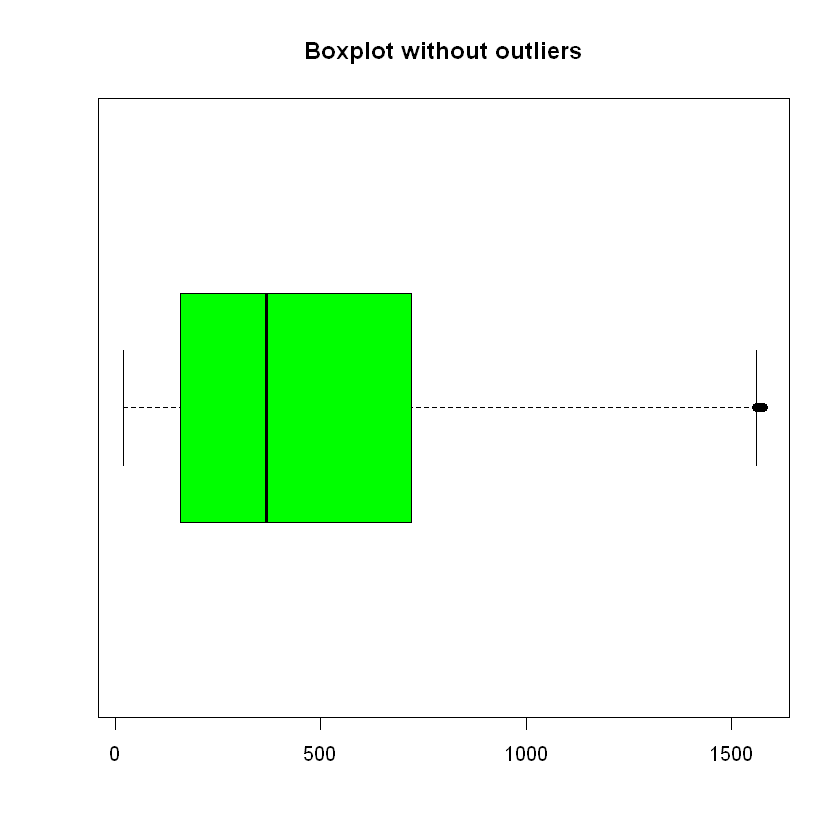


 Pre-treatment Outliers:
 139.96 182.94 107.98 104.99 202.01 149.99 118.12 104.99 159.99 114.99 199.99 104.99 207.49 159.99 299.99 121.45 109.97 301.98 132.63 119.59 109.98 159.99 104.98 104.99 119.59 159.99 104.99 213.73 109.99 281.28 159.99 114.99 104.99 174.59 109.99 116.96 104.99 169.99 159.99 104.99 159.99 175.41 159.99 119.99 109.99 151.4 118.98 134.99 159.99 218.54 117.96 117.87 159.99 232.49 104.99 109.99 139.99 104.99 168.78 109.99 126.77 159.99 130.49 109.99 104.99 107.87 172.03 159.99 169.99 210.39 181.69 149.43 159.99 129.99 114.99 219.16 179.99 104.99 109.99 104.99 105.33 147.16 109.99 144.99 104.99 159.99 134.99 104.99 140.64 132.49 111.6 159.99 159.99 107.74 143.5 132.09 104.99 134.99 134.99 141.45 139.62 107.85 110.76 105.96 111.85 175.49 169.99 125.31 109.99 189.99 120.49 149.99 139.99 150.62 109.99 159.99 104.99 149.99 160.48 199.99 209.99 137.41 169.99 141.12 134.99 129.99 168.83 149.99 144.99 219.99 104.99 159.99 109.99 309.99 159.99 104.99 129.99 179.99 159.99 111

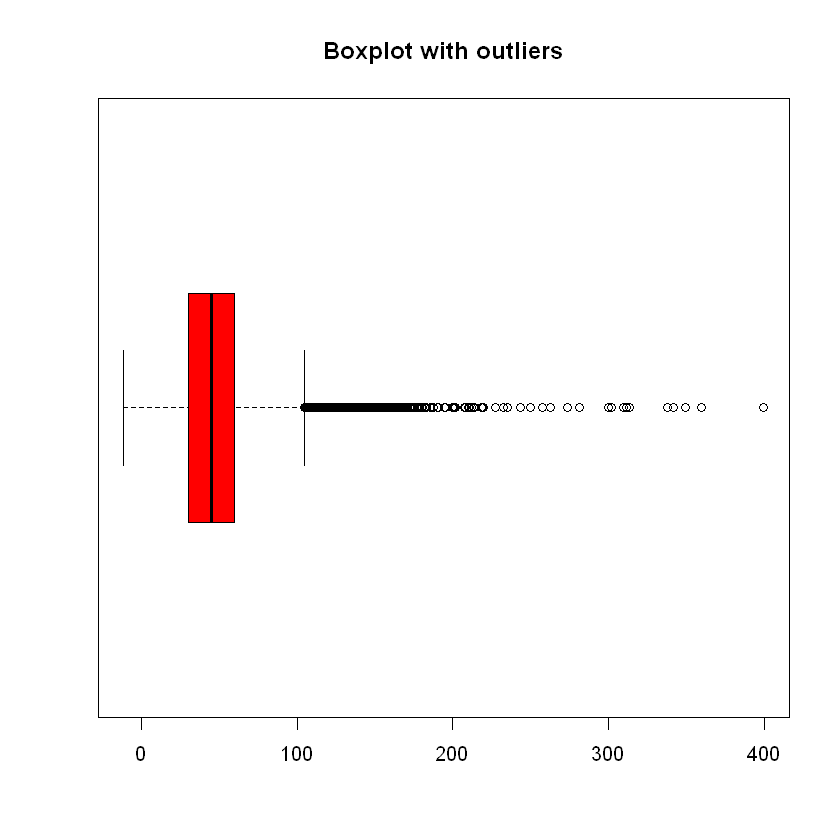


 Post-treatment Outliers:
 
 Mean with outliers:
 0.8948

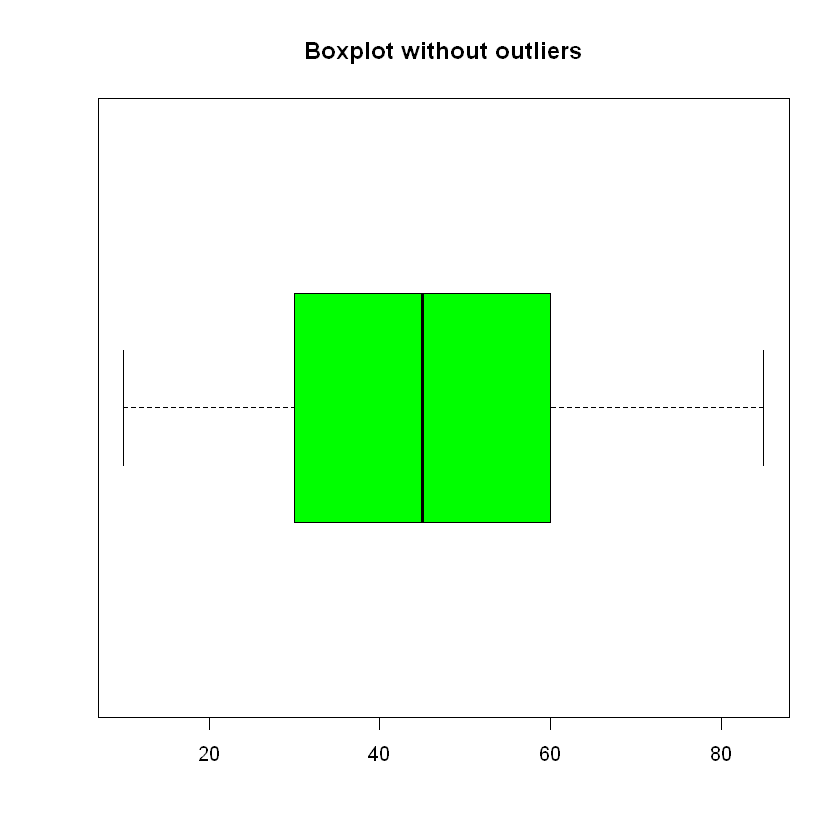


 Pre-treatment Outliers:
 2.48 11.14 2.97 2.48 4.95 4.46 24.01 8.42 3.71 15.59 2.72 4.95 2.48 3.96 6.44 2.97 4.46 18.56 7.18 55.19 7.43 14.6 18.07 10.89 4.95 5.2 4.46 27.47 4.21 16.34 3.47 4.46 7.67 6.19 4.7 3.47 4.46 2.48 36.14 9.65 3.96 9.16 2.48 26.73 3.22 5.69 4.46 5.2 5.45 2.97 8.17 15.35 18.81 4.7 11.39 2.72 2.97 7.43 5.94 10.64 2.72 2.48 3.71 13.12 5.45 2.48 3.22 8.91 2.72 7.92 2.72 2.48 2.48 4.21 2.97 8.66 8.17 3.47 2.48 3.47 9.41 3.47 6.93 2.48 3.47 4.21 3.96 3.71 4.46 2.97 2.72 5.94 4.21 7.43 5.2 2.97 2.48 4.7 5.69 3.47 3.96 2.72 16.58 6.44 3.71 4.95 2.72 6.19 3.96 2.72 4.95 22.28 3.22 2.97 2.97 4.46 2.72 2.48 16.58 5.2 6.19 2.48 2.72 4.7 3.47 2.72 2.48 3.47 3.47 4.7 2.97 5.2 8.66 8.17 13.61 5.45 4.7 13.37 15.84 3.96 7.92 2.72 2.48 4.46 5.2 4.46 2.97 2.48 6.19 6.19 2.97 2.72 12.62 2.72 5.45 5.2 12.13 16.09 3.47 2.97 3.47 4.46 4.21 13.12 15.1 3.22 2.72 3.47 3.22 8.91 6.68 2.48 3.47 2.48 2.72 2.48 4.46 3.96 3.71 3.22 6.93 5.69 7.67 13.37 7.67 2.72 2.48 2.97 2.72 3.96 2.72 11.6

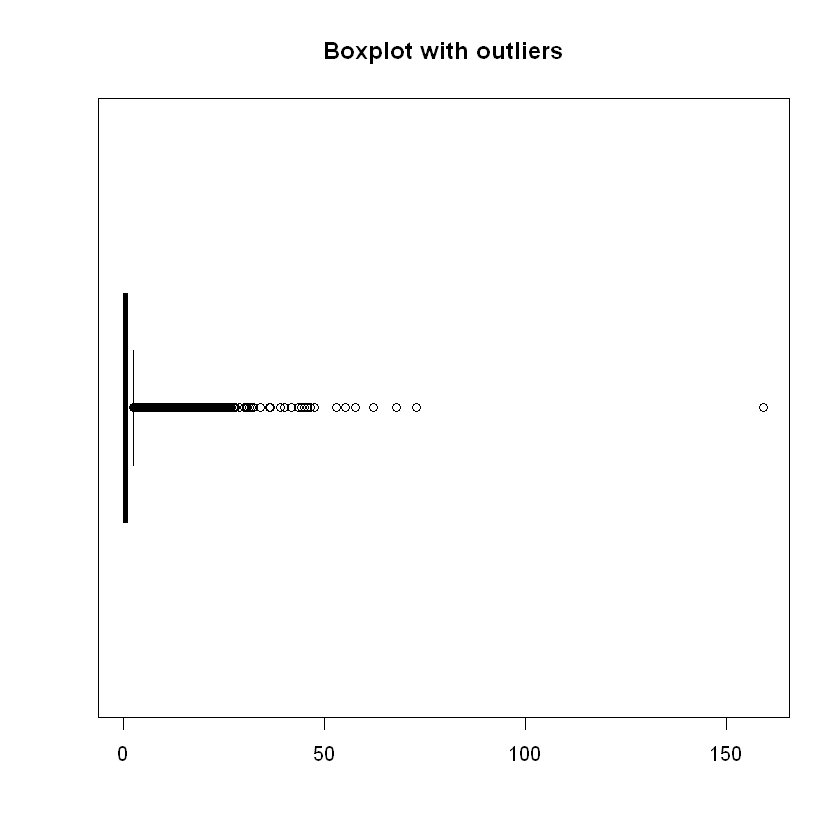


 Post-treatment Outliers:
 2.48 4.21 2.97 2.48 4.21 4.21 4.21 4.21 3.71 4.21 2.72 4.21 2.48 3.96 4.21 2.97 4.21 4.21 4.21 4.21 4.21 4.21 4.21 4.21 4.21 4.21 4.21 4.21 4.21 4.21 3.47 4.21 4.21 4.21 4.21 3.47 4.21 2.48 4.21 4.21 3.96 4.21 2.48 4.21 3.22 4.21 4.21 4.21 4.21 2.97 4.21 4.21 4.21 4.21 4.21 2.72 2.97 4.21 4.21 4.21 2.72 2.48 3.71 4.21 4.21 2.48 3.22 4.21 2.72 4.21 2.72 2.48 2.48 4.21 2.97 4.21 4.21 3.47 2.48 3.47 4.21 3.47 4.21 2.48 3.47 4.21 3.96 3.71 4.21 2.97 2.72 4.21 4.21 4.21 4.21 2.97 2.48 4.21 4.21 3.47 3.96 2.72 4.21 4.21 3.71 4.21 2.72 4.21 3.96 2.72 4.21 4.21 3.22 2.97 2.97 4.21 2.72 2.48 4.21 4.21 4.21 2.48 2.72 4.21 3.47 2.72 2.48 3.47 3.47 4.21 2.97 4.21 4.21 4.21 4.21 4.21 4.21 4.21 4.21 3.96 4.21 2.72 2.48 4.21 4.21 4.21 2.97 2.48 4.21 4.21 2.97 2.72 4.21 2.72 4.21 4.21 4.21 4.21 3.47 2.97 3.47 4.21 4.21 4.21 4.21 3.22 2.72 3.47 3.22 4.21 4.21 2.48 3.47 2.48 2.72 2.48 4.21 3.96 3.71 3.22 4.21 4.21 4.21 4.21 4.21 2.72 2.48 2.97 2.72 3.96 2.72 4.21 3.22 4.21 2.

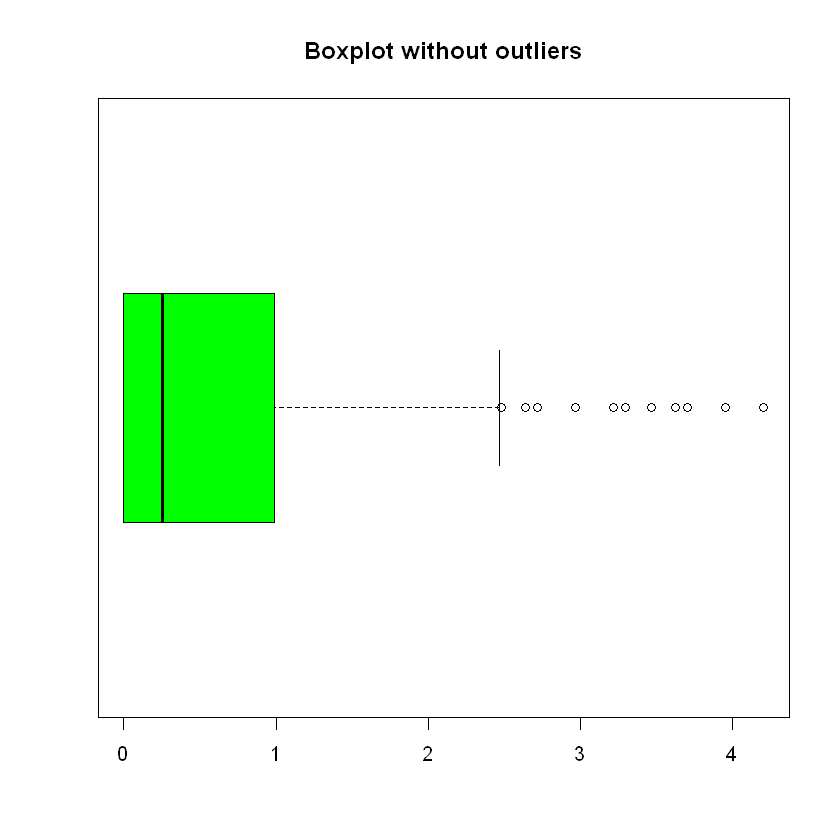


 Pre-treatment Outliers:
 249.5 1444.75 126 872.25 370 102 759 146.25 182.75 231.75 215.75 186 536.75 237.75 229.25 1565.25 264 158.25 228.25 352.75 306.5 182 1083.25 470.25 160.25 120.25 215.25 342.75 667.5 118 1887.25 359.5 163.5 290.5 102 699.5 389.25 216 180.75 258.25 184.5 170 453.75 992 416 105.25 514.75 144.75 218.5 162 643.25 132 363.25 130.25 146.25 186.75 313.5 816.75 126.5 122 217.75 114.5 134 203 251.75 150.75 525.5 452 115 187 364 121.25 602.75 264.5 677.75 176.75 297.75 576 154.25 313.75 130 259 179.25 123.25 160.75 115.5 232.25 170.5 1037 102.25 288.5 169 103.5 111.25 210 203.25 195 493 101.5 106.5 121.75 178.5 179.25 426 233 136 430.25 233.25 168.25 153.5 260.5 512.5 792.25 112 153.5 175.75 299.5 187.25 548.75 130 162 172.5 300.25 117.75 155.5 535.5 136.75 403.5 268 196 152 395.5 146.25 216.75 149.75 119.25 222 131 112.25 117.5 118.25 138 124.75 219.25 177.25 216 111.75 102 189.5 283.75 160.5 216.25 155.5 134.75 250.25 1069.25 162.25 138 360.75 257.75 202.75 118.5 177 

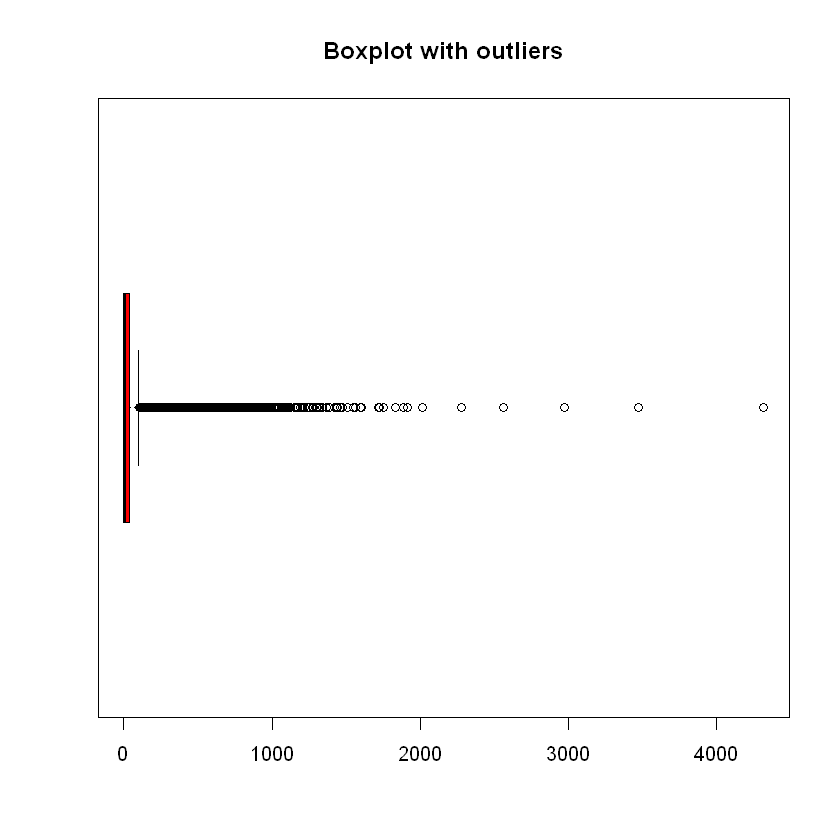


 Post-treatment Outliers:
 190 190 126 190 190 102 190 146.25 182.75 190 190 186 190 190 190 190 190 158.25 190 190 190 182 190 190 160.25 120.25 190 190 190 118 190 190 163.5 190 102 190 190 190 180.75 190 184.5 170 190 190 190 105.25 190 144.75 190 162 190 132 190 130.25 146.25 186.75 190 190 126.5 122 190 114.5 134 190 190 150.75 190 190 115 187 190 121.25 190 190 190 176.75 190 190 154.25 190 130 190 179.25 123.25 160.75 115.5 190 170.5 190 102.25 190 169 103.5 111.25 190 190 190 190 101.5 106.5 121.75 178.5 179.25 190 190 136 190 190 168.25 153.5 190 190 190 112 153.5 175.75 190 187.25 190 130 162 172.5 190 117.75 155.5 190 136.75 190 190 190 152 190 146.25 190 149.75 119.25 190 131 112.25 117.5 118.25 138 124.75 190 177.25 190 111.75 102 189.5 190 160.5 190 155.5 134.75 190 190 162.25 138 190 190 190 118.5 177 134.75 190 190 184.5 190 190 116.25 179.25 190 190 161 152.75 130.25 143.75 160.25 190 186.25 133 108 190 190 117.5 190 190 111.25 173 190 140.75 134 185.25 190 190 115.5 

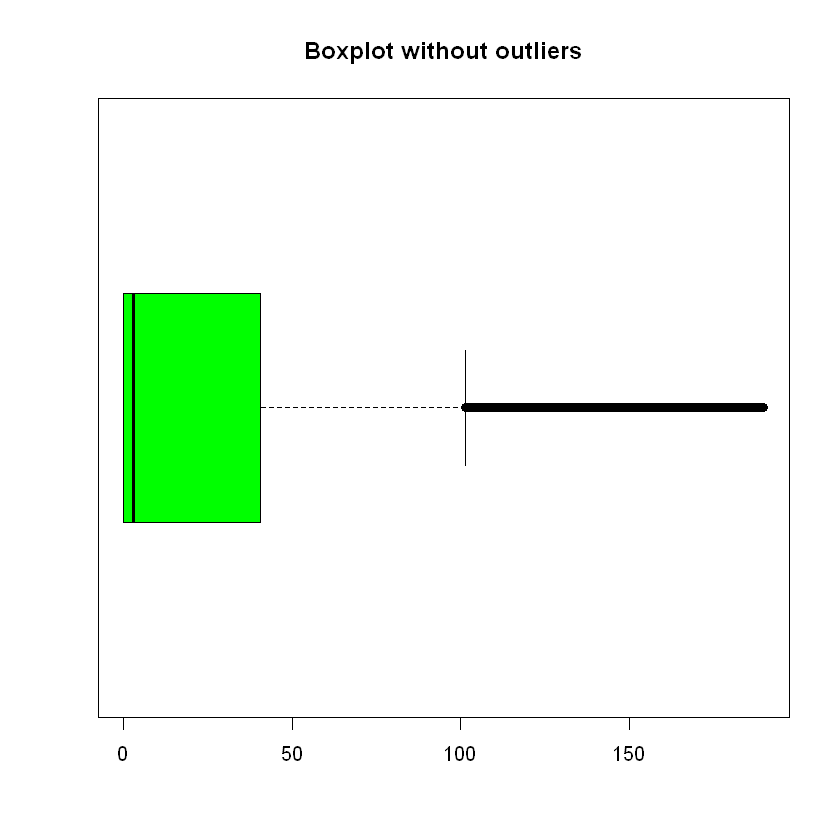


 Pre-treatment Outliers:
 35.5 1.29 1.94 62.34 6.68 2.12 1.92 1 9.58 8.65 1 1.47 41.31 1.31 1 15.86 2.19 4.72 2.17 1.25 2.57 1.43 1.55 4.9 3.82 3.95 0.78 17.49 0.9 0.91 0.69 34.28 5.75 6.57 3.69 1.92 1.75 2.15 1.62 3.62 7.1 0.81 10.64 8.2 1.08 28.46 1.39 4.52 1.04 0.98 2.12 2.2 3.33 1.86 4.08 5.03 1.85 2.56 14.28 4.51 4.32 1.66 17.08 1.16 0.71 1.09 7.89 0.84 3.68 2.59 5.18 1.27 3.91 1.35 1.16 0.94 2.12 1.37 1.16 1.23 5.59 2.02 0.8 1.99 28.02 0.86 1 1.92 0.8 10.08 9.3 2.72 5.54 0.74 3.74 1.41 12.12 8.72 5.97 1.5 0.78 4.77 1.49 3.52 0.91 1.12 1.56 3.34 0.68 8.67 3.28 0.97 1.93 0.84 2.98 8.22 53.23 2.95 2.66 4.2 3.45 0.75 2.76 24.52 4.44 1.96 4.21 1.87 0.71 5.34 4.03 0.94 5.38 0.98 17.11 1.23 1.2 51.64 1.39 4 11.54 1.37 1.58 1.85 1.7 1.75 1.37 292.54 35.06 3.66 0.97 6.73 1.79 33.71 6.83 1.61 2.74 11.77 0.78 0.68 0.74 64.64 7.77 0.97 5.03 2.35 0.68 5.5 2.09 3.56 2.07 4.47 8.05 29.3 1.73 2.43 1.51 3.66 0.74 2.75 8.7 4.93 10.08 0.91 1.6 8.96 0.87 2.79 3.2 5.52 4.71 1.93 1.27 2.68 1.13 3.72 

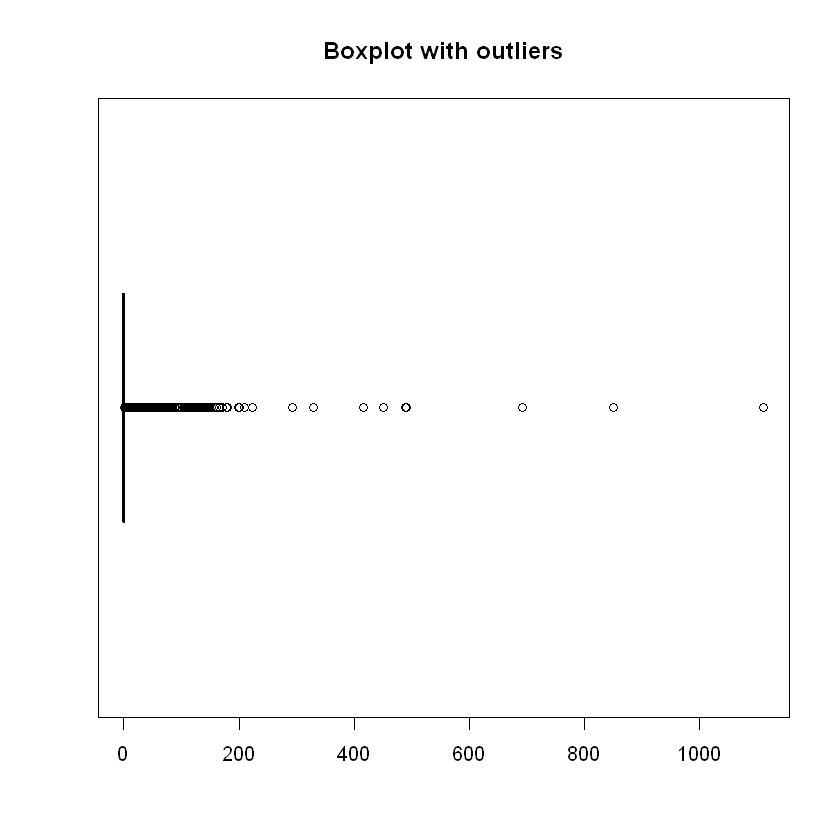


 Post-treatment Outliers:
 5.07 1.29 1.94 5.07 5.07 2.12 1.92 1 5.07 5.07 1 1.47 5.07 1.31 1 5.07 2.19 4.72 2.17 1.25 2.57 1.43 1.55 4.9 3.82 3.95 0.78 5.07 0.9 0.91 0.69 5.07 5.07 5.07 3.69 1.92 1.75 2.15 1.62 3.62 5.07 0.81 5.07 5.07 1.08 5.07 1.39 4.52 1.04 0.98 2.12 2.2 3.33 1.86 4.08 5.03 1.85 2.56 5.07 4.51 4.32 1.66 5.07 1.16 0.71 1.09 5.07 0.84 3.68 2.59 5.07 1.27 3.91 1.35 1.16 0.94 2.12 1.37 1.16 1.23 5.07 2.02 0.8 1.99 5.07 0.86 1 1.92 0.8 5.07 5.07 2.72 5.07 0.74 3.74 1.41 5.07 5.07 5.07 1.5 0.78 4.77 1.49 3.52 0.91 1.12 1.56 3.34 0.68 5.07 3.28 0.97 1.93 0.84 2.98 5.07 5.07 2.95 2.66 4.2 3.45 0.75 2.76 5.07 4.44 1.96 4.21 1.87 0.71 5.07 4.03 0.94 5.07 0.98 5.07 1.23 1.2 5.07 1.39 4 5.07 1.37 1.58 1.85 1.7 1.75 1.37 5.07 5.07 3.66 0.97 5.07 1.79 5.07 5.07 1.61 2.74 5.07 0.78 0.68 0.74 5.07 5.07 0.97 5.03 2.35 0.68 5.07 2.09 3.56 2.07 4.47 5.07 5.07 1.73 2.43 1.51 3.66 0.74 2.75 5.07 4.93 5.07 0.91 1.6 5.07 0.87 2.79 3.2 5.07 4.71 1.93 1.27 2.68 1.13 3.72 0.69 1.04 1.19 1.5

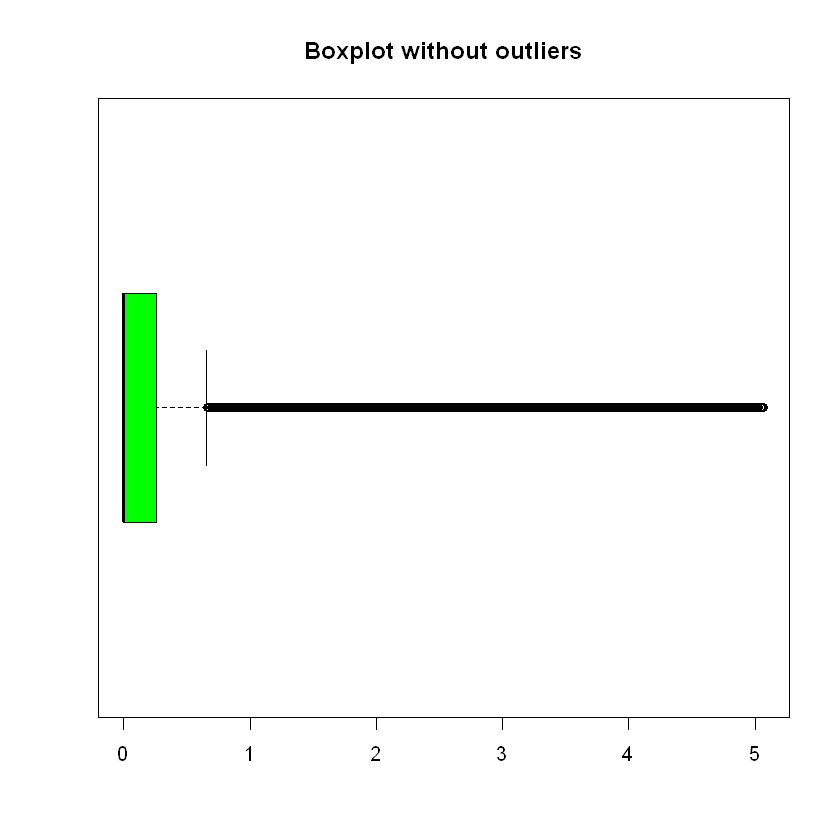


 Pre-treatment Outliers:
 532.25 -641 -394 -343 299 -365.5 -373.25 474.5 -753.5 -397.25 -370.5 320.5 -784.5 374.25 -512.25 -354.75 634.75 -341.25 -363 547.5 322.5 -703 -405.25 -345.5 -450.25 -422 -774.25 330.75 -414.25 344.75 833 564.25 -547.75 -434.75 -350.75 -932.25 -917.5 -473.25 -402.75 -444.5 -709 351.25 -475.25 463 -733 347 608 -321.25 -374 316.75 -723.25 -367.75 847 -318.75 636 303 -360.25 -438.25 -854.5 -2441.25 -506.75 489 410.75 389.5 722.25 -515.75 513.25 626.25 -419.75 445.25 -389.5 335.25 1944.75 -375.5 -343 -506.5 374.75 304.75 304.5 588.25 318.5 288.25 -720 305.5 299.25 532 -408.5 -641.5 -661.75 -725.5 348.25 530.75 -767.5 -362.25 911 -476 665.25 313.75 -910 373.5 338.5 -333.25 -345.5 679.25 -322.25 436.75 -509 402.75 295.25 -1798.25 527.25 -400.75 466.25 -333.75 664 614.5 793.5 392.5 -540 -546.75 -432.25 -337 -337.25 -319.5 379.75 -311.5 721 -686.25 728.75 -534.75 -733.25 287.25 -668.25 -394 -495.25 286 376.25 -612 294 472.5 -484 551.25 -692.25 301.75 476.25 -667 395.2

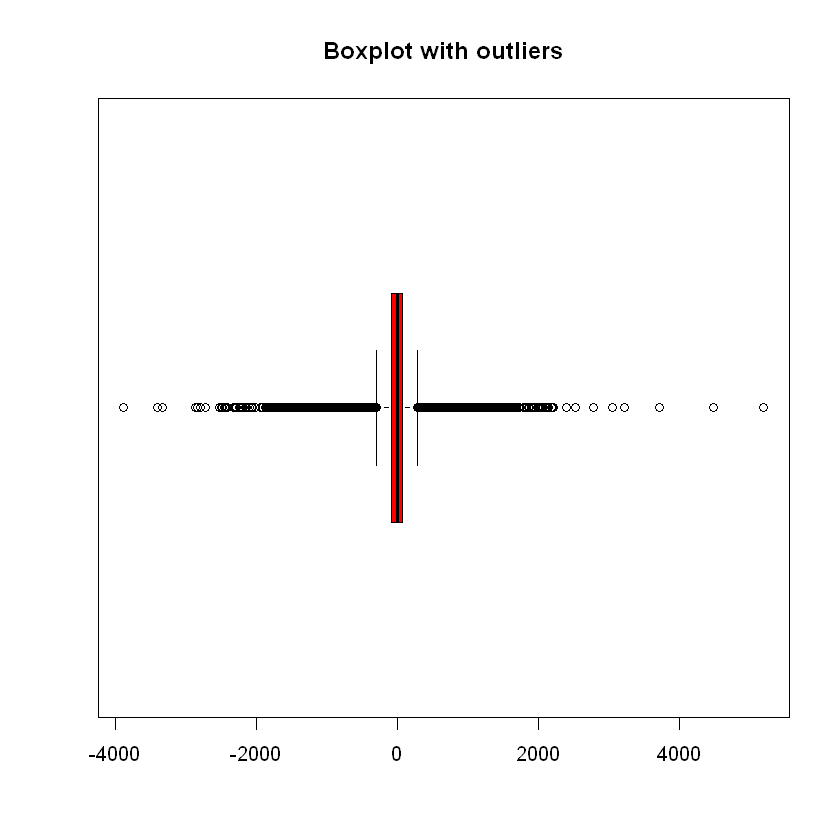


 Post-treatment Outliers:
 343.675 -374 -374 -343 299 -365.5 -373.25 343.675 -374 -374 -370.5 320.5 -374 343.675 -374 -354.75 343.675 -341.25 -363 343.675 322.5 -374 -374 -345.5 -374 -374 -374 330.75 -374 343.675 343.675 343.675 -374 -374 -350.75 -374 -374 -374 -374 -374 -374 343.675 -374 343.675 -374 343.675 343.675 -321.25 -374 316.75 -374 -367.75 343.675 -318.75 343.675 303 -360.25 -374 -374 -374 -374 343.675 343.675 343.675 343.675 -374 343.675 343.675 -374 343.675 -374 335.25 343.675 -374 -343 -374 343.675 304.75 304.5 343.675 318.5 288.25 -374 305.5 299.25 343.675 -374 -374 -374 -374 343.675 343.675 -374 -362.25 343.675 -374 343.675 313.75 -374 343.675 338.5 -333.25 -345.5 343.675 -322.25 343.675 -374 343.675 295.25 -374 343.675 -374 343.675 -333.75 343.675 343.675 343.675 343.675 -374 -374 -374 -337 -337.25 -319.5 343.675 -311.5 343.675 -374 343.675 -374 -374 287.25 -374 -374 -374 286 343.675 -374 294 343.675 -374 343.675 -374 301.75 343.675 -374 343.675 -374 343.675 343.675 34

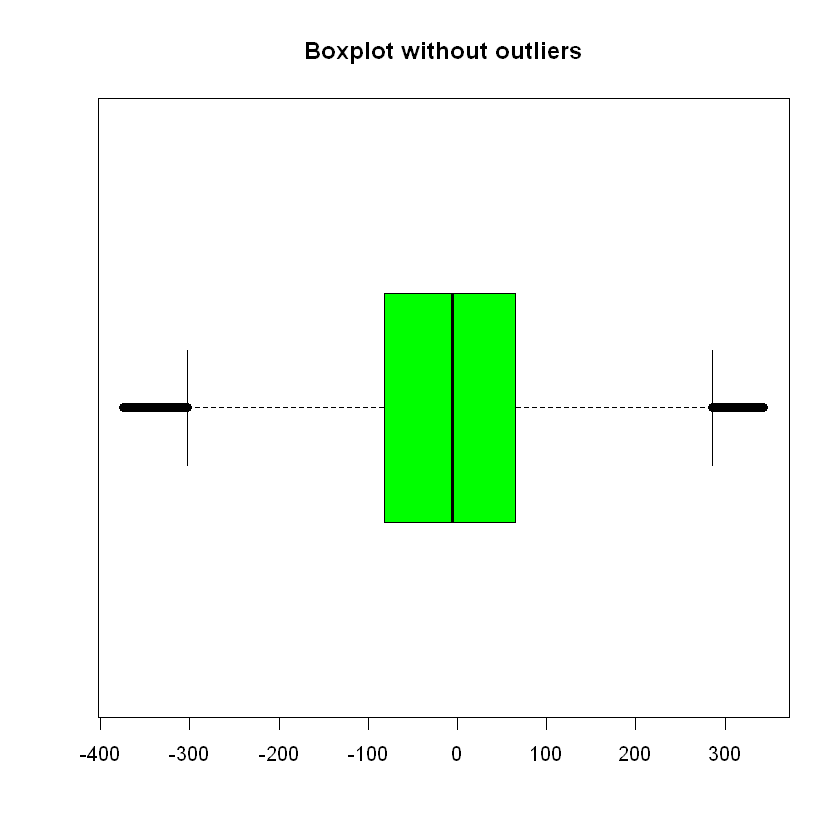


 Pre-treatment Outliers:
 50.99 -106.77 -31.56 -29.7 93.93 -36.28 15.6 20.9 34 -95.45 -27.81 -76.39 -32.85 27.43 -59.03 -48.16 -35.78 -28.39 -28.91 -46 -63.6 31.77 69.71 -27.65 58.94 20.66 -25.82 -53.78 -26.62 -31.06 27.65 -97.22 -25.85 -55.1 -35.48 -62.07 -20.92 48.42 -39.53 -20.53 23.54 -38.71 -24.25 -23.63 -37.97 20.12 -144.3 -74.99 -67.37 -58.33 49.17 -26.49 -126.16 84.13 -52.07 27.12 -34 -19.9 50.12 18.11 15.38 -40.6 31.03 124.84 -50.72 -106.64 44.97 -130.86 -57.81 -30.37 -115.1 23.66 -38.16 33.64 91.37 -24.17 21.9 -22.21 -23.05 -60.66 -28.01 43.91 20.03 -28.88 47.71 25.69 -48.02 -149.72 18.94 -53.48 16.23 20.65 49.48 -62.17 31.26 -32.89 103.76 -30.16 -29.03 134.68 -45.8 -37.22 19.81 44.19 -70.09 -25.57 -25.1 29.9 44.55 -47.59 -25.13 14.83 65.72 155.06 43.94 16.57 -26.17 -36.4 -69.08 -23.75 19.25 -82.2 97.9 23.63 103.91 -83.07 20.8 17.5 -33.25 115.64 18.51 -50.4 28.26 -30.44 15.37 -20.35 -43.8 -27.75 -68.7 -63.84 17.46 -33.64 49.07 62.95 157.64 -21.45 -67.61 -26.67 -63.56 -39.66 

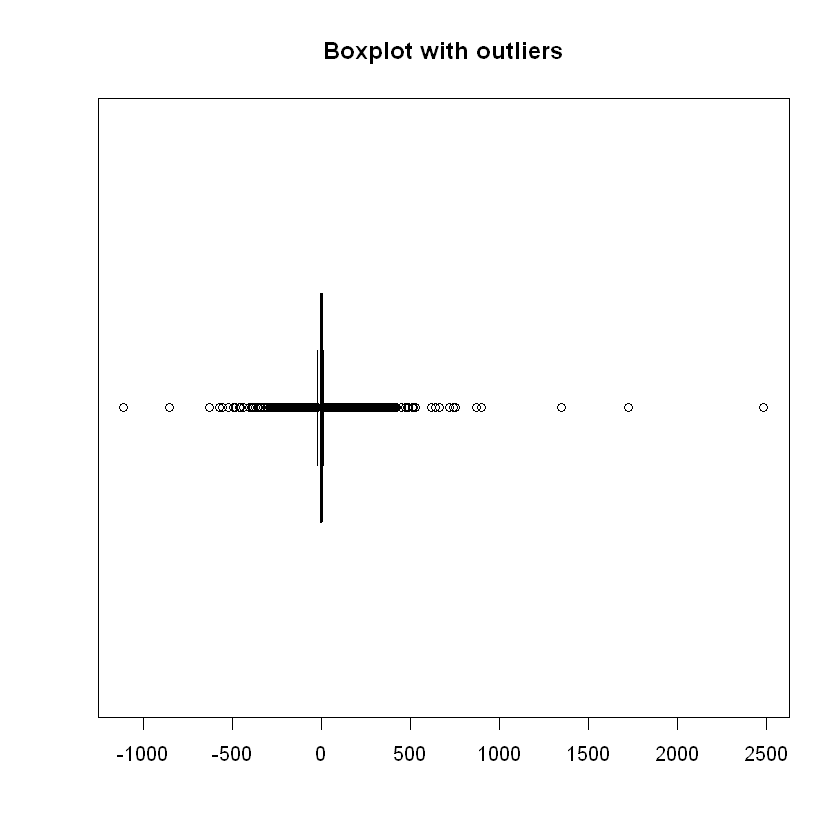


 Post-treatment Outliers:
 45.9 -47.227 -31.56 -29.7 45.9 -36.28 15.6 20.9 34 -47.227 -27.81 -47.227 -32.85 27.43 -47.227 -47.227 -35.78 -28.39 -28.91 -46 -47.227 31.77 45.9 -27.65 45.9 20.66 -25.82 -47.227 -26.62 -31.06 27.65 -47.227 -25.85 -47.227 -35.48 -47.227 -20.92 45.9 -39.53 -20.53 23.54 -38.71 -24.25 -23.63 -37.97 20.12 -47.227 -47.227 -47.227 -47.227 45.9 -26.49 -47.227 45.9 -47.227 27.12 -34 -19.9 45.9 18.11 15.38 -40.6 31.03 45.9 -47.227 -47.227 44.97 -47.227 -47.227 -30.37 -47.227 23.66 -38.16 33.64 45.9 -24.17 21.9 -22.21 -23.05 -47.227 -28.01 43.91 20.03 -28.88 45.9 25.69 -47.227 -47.227 18.94 -47.227 16.23 20.65 45.9 -47.227 31.26 -32.89 45.9 -30.16 -29.03 45.9 -45.8 -37.22 19.81 44.19 -47.227 -25.57 -25.1 29.9 44.55 -47.227 -25.13 14.83 45.9 45.9 43.94 16.57 -26.17 -36.4 -47.227 -23.75 19.25 -47.227 45.9 23.63 45.9 -47.227 20.8 17.5 -33.25 45.9 18.51 -47.227 28.26 -30.44 15.37 -20.35 -43.8 -27.75 -47.227 -47.227 17.46 -33.64 45.9 45.9 45.9 -21.45 -47.227 -26.67 -47.22

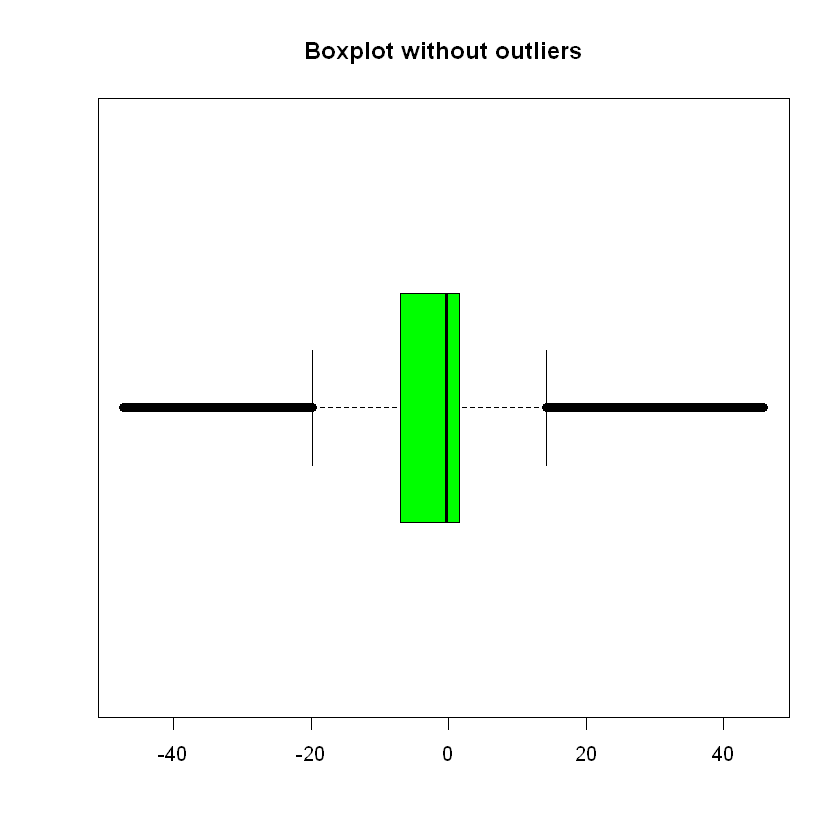


 Pre-treatment Outliers:
 52 27.33 21 25.67 78.33 31.67 51.33 21.67 25 22.67 22 23.67 20 34.67 21.33 22 22 26 36 44.67 22 65.67 24.33 27.33 18.33 19 24 48.33 44 23 20.33 34.67 23 18.33 22.67 47.33 27.67 23 29.33 21.67 20.33 36.67 37 18.33 25.67 23 40.33 20 30 19.67 23 22.33 24.33 53 50 18.67 34.67 47.67 18.33 49.67 27 25.33 24.67 20.33 48 28.67 22 35.67 22.33 26 21.67 32 43.33 46.33 54.67 26.33 24.33 20 20.67 21 40 18.67 37 23 19.33 53.67 41.67 19.33 21.33 29 32.67 18.67 23.33 24 22.33 26 22 36.33 19 51 35 27.33 31 21.33 23.67 19.33 27.67 18.33 31.67 48.33 18.67 22 36 56.33 25.67 42 20.67 42.67 20.33 26.33 61 23 18.67 21.33 22.67 21.67 23 31.33 36.67 28.67 26.67 33.33 29 21.67 26.67 30.67 18.67 21.33 78 19.67 20.33 50 21.67 28.67 39.33 35.33 32.67 22 18.67 18.33 27.67 43.33 21.67 27 34.67 22.33 30 25.67 24 27 19 39.33 27 32 27.33 43 25.67 33 68 19 21 23.33 20.33 21.33 57 39.67 60.67 22 20 33 23.33 26.33 55 21.67 25.33 29.67 31.33 29 40 24 26.67 19.67 33.67 21.67 23.67 31.33 20 20 41 2

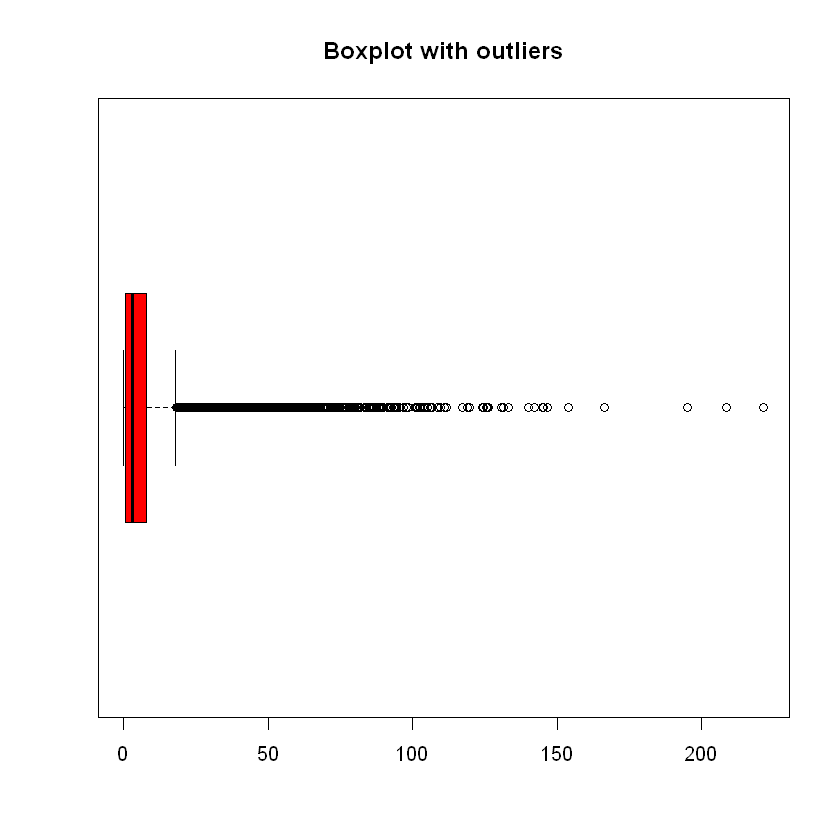


 Post-treatment Outliers:
 22 22 21 22 22 22 22 21.67 22 22 22 22 20 22 21.33 22 22 22 22 22 22 22 22 22 18.33 19 22 22 22 22 20.33 22 22 18.33 22 22 22 22 22 21.67 20.33 22 22 18.33 22 22 22 20 22 19.67 22 22 22 22 22 18.67 22 22 18.33 22 22 22 22 20.33 22 22 22 22 22 22 21.67 22 22 22 22 22 22 20 20.67 21 22 18.67 22 22 19.33 22 22 19.33 21.33 22 22 18.67 22 22 22 22 22 22 19 22 22 22 22 21.33 22 19.33 22 18.33 22 22 18.67 22 22 22 22 22 20.67 22 20.33 22 22 22 18.67 21.33 22 21.67 22 22 22 22 22 22 22 21.67 22 22 18.67 21.33 22 19.67 20.33 22 21.67 22 22 22 22 22 18.67 18.33 22 22 21.67 22 22 22 22 22 22 22 19 22 22 22 22 22 22 22 22 19 21 22 20.33 21.33 22 22 22 22 20 22 22 22 22 21.67 22 22 22 22 22 22 22 19.67 22 21.67 22 22 20 20 22 22 19 22 22 22 22 22 22 22 22 19.33 19 22 22 21 19 22 19.67 22 22 22 22 22 19 22 22 18.33 22 20 19.67 22 22 22 22 22 21 22 22 22 22 22 20 20 18.33 22 22 22 18.33 19 18.67 22 22 22 19 22 19.33 20.33 22 22 22 20 22 22 22 22 19.67 22 22 22 19.67 19.67 

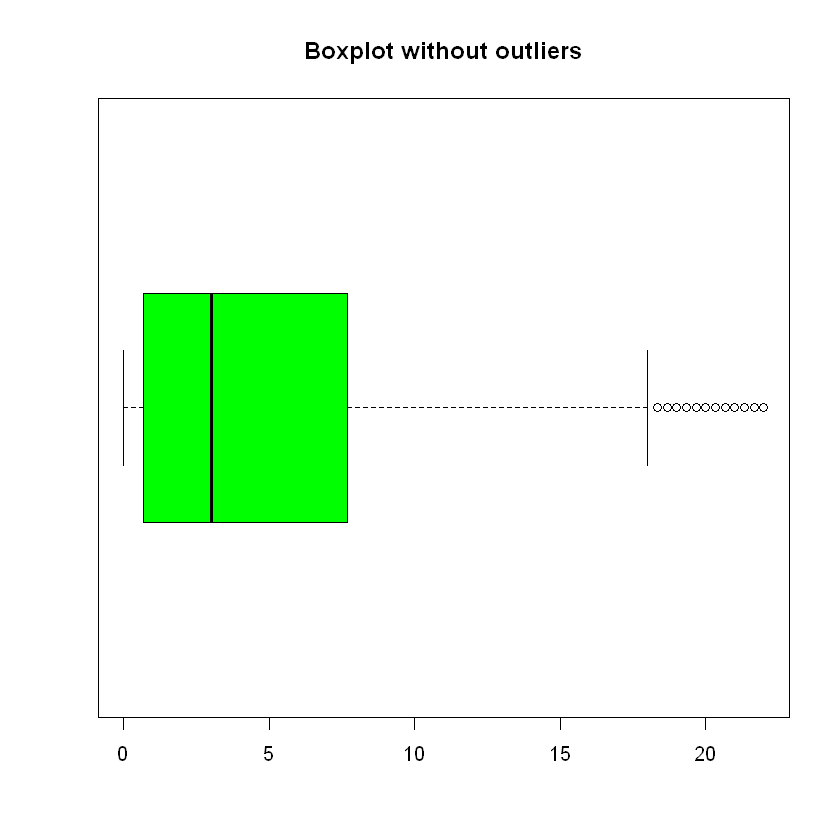


 Pre-treatment Outliers:
 9.33 11.33 25 11 11 12 19 10.67 10.33 19.33 14 21.67 18 9.67 22.33 33 13 27.67 15.67 9.33 64 10.67 17 10 15.33 10.67 26 39.33 37 11.67 13.67 18.33 15 29.67 15.33 11 11.67 15.67 23.33 13.67 46.67 13 22 9.33 21.33 35 12 20 13.33 14.33 24 13 24.33 10.33 27.33 21.33 22.33 15.33 9.67 15 18 15.67 10 17 10.33 36 26 31.33 13.67 21.33 9.33 14.67 13.33 24 12.67 11.33 12.67 9.33 13.33 10.33 12.33 10 22 17 21.67 13.33 9.67 31 12.67 10 14 43.33 10.67 13.67 16.67 10 22.67 11 20 13.33 15.33 12 10.67 10.33 11.33 13 19 11.33 10 23.67 11.67 10.67 12.33 10.67 15.67 11.33 19.33 10 13.33 9.33 10.33 16.33 10.33 93 13 19 12.33 16.67 16.67 31.67 13.33 9.67 21.33 11 13 9.33 19 98.67 10.67 15.33 11.33 17 25 10 17.33 10.33 10.33 31.67 11 10 23.33 22 15 39.67 9.67 10 9.33 11.33 14 17.33 11 11.67 12 15.33 90.67 74.67 30.33 31.33 25.33 10 12 24.67 26 14.33 22.33 16.33 13.67 11.33 10.67 11.33 23 13.33 11 19.67 17.33 10.33 16.67 10.33 39.33 31 10 17.67 18.33 16.33 58.67 30.33 13.67 11.67 9.

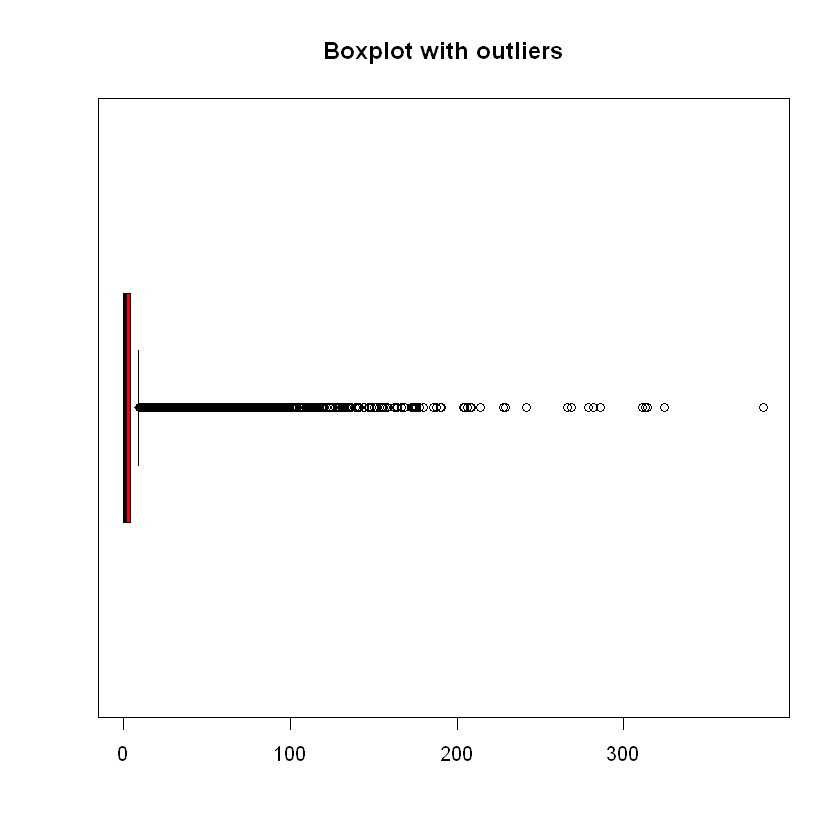


 Post-treatment Outliers:
 9.33 11.33 17.33 11 11 12 17.33 10.67 10.33 17.33 14 17.33 17.33 9.67 17.33 17.33 13 17.33 15.67 9.33 17.33 10.67 17 10 15.33 10.67 17.33 17.33 17.33 11.67 13.67 17.33 15 17.33 15.33 11 11.67 15.67 17.33 13.67 17.33 13 17.33 9.33 17.33 17.33 12 17.33 13.33 14.33 17.33 13 17.33 10.33 17.33 17.33 17.33 15.33 9.67 15 17.33 15.67 10 17 10.33 17.33 17.33 17.33 13.67 17.33 9.33 14.67 13.33 17.33 12.67 11.33 12.67 9.33 13.33 10.33 12.33 10 17.33 17 17.33 13.33 9.67 17.33 12.67 10 14 17.33 10.67 13.67 16.67 10 17.33 11 17.33 13.33 15.33 12 10.67 10.33 11.33 13 17.33 11.33 10 17.33 11.67 10.67 12.33 10.67 15.67 11.33 17.33 10 13.33 9.33 10.33 16.33 10.33 17.33 13 17.33 12.33 16.67 16.67 17.33 13.33 9.67 17.33 11 13 9.33 17.33 17.33 10.67 15.33 11.33 17 17.33 10 17.33 10.33 10.33 17.33 11 10 17.33 17.33 15 17.33 9.67 10 9.33 11.33 14 17.33 11 11.67 12 15.33 17.33 17.33 17.33 17.33 17.33 10 12 17.33 17.33 14.33 17.33 16.33 13.67 11.33 10.67 11.33 17.33 13.33 11 17.33 1

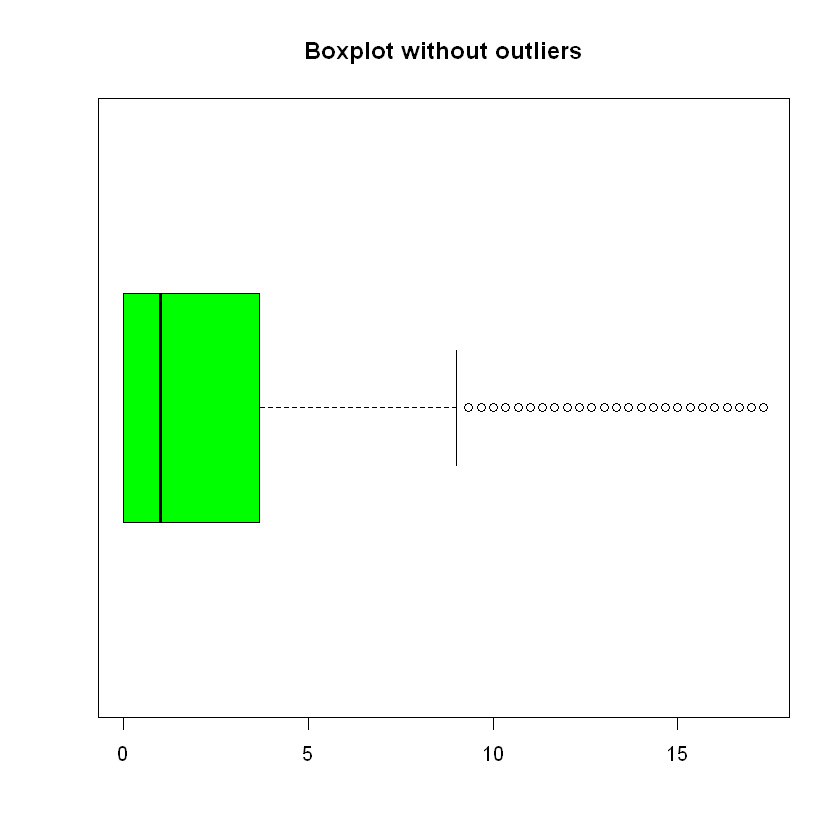


 Pre-treatment Outliers:
 113.67 88 149.67 93.67 186.67 94.33 94 157 115.67 128 89.33 113.67 98 299.67 85.33 85 123.33 93.67 106.33 103.67 101.67 95 96.67 123.67 178.67 110 230.33 127.67 102 197.67 158 203 92 121.67 119.67 95.33 84.33 193 93.33 126.67 103.67 239 123.33 210.67 103.67 109.33 137 99.33 162.67 101.33 122 86 84.33 94 108.33 179.67 171.33 88 114.67 117.33 174.33 107.33 105.67 90.33 138.67 120.67 180.67 123.67 227 154.67 130.33 107.33 93 111.67 145.67 119.67 94.33 93.67 276.67 119 280.67 178.67 122.33 103.67 94.33 189.33 90.67 91 93 145 346.67 135.67 159 110.67 143.33 126.67 194.67 84 194.33 206.33 103.67 663.33 91 87 93 118.33 348 139 91 89.33 111.33 86.33 97 99.33 104 177.33 89 88 130.33 101.33 319.67 97.67 114.33 132.67 92.33 88.33 100.33 89.33 90.67 107.33 194 92.33 85 144.67 103 162 84.67 84.67 122.33 84.33 114 253.67 159.33 104.33 221.33 124 114 111.67 87.33 238 143 84.67 197.67 182 87.33 130.33 209 100.33 166.67 85.67 106 86.33 124.33 97.67 112 96.33 110.67 104.67 84 

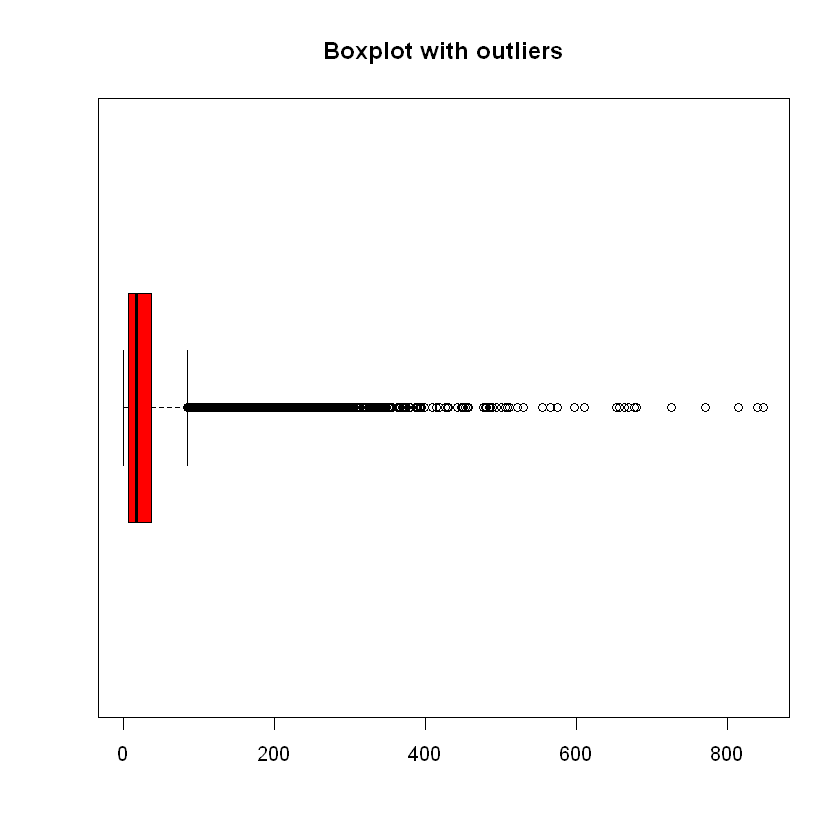


 Post-treatment Outliers:
 97.67 88 97.67 93.67 97.67 94.33 94 97.67 97.67 97.67 89.33 97.67 97.67 97.67 85.33 85 97.67 93.67 97.67 97.67 97.67 95 96.67 97.67 97.67 97.67 97.67 97.67 97.67 97.67 97.67 97.67 92 97.67 97.67 95.33 84.33 97.67 93.33 97.67 97.67 97.67 97.67 97.67 97.67 97.67 97.67 97.67 97.67 97.67 97.67 86 84.33 94 97.67 97.67 97.67 88 97.67 97.67 97.67 97.67 97.67 90.33 97.67 97.67 97.67 97.67 97.67 97.67 97.67 97.67 93 97.67 97.67 97.67 94.33 93.67 97.67 97.67 97.67 97.67 97.67 97.67 94.33 97.67 90.67 91 93 97.67 97.67 97.67 97.67 97.67 97.67 97.67 97.67 84 97.67 97.67 97.67 97.67 91 87 93 97.67 97.67 97.67 91 89.33 97.67 86.33 97 97.67 97.67 97.67 89 88 97.67 97.67 97.67 97.67 97.67 97.67 92.33 88.33 97.67 89.33 90.67 97.67 97.67 92.33 85 97.67 97.67 97.67 84.67 84.67 97.67 84.33 97.67 97.67 97.67 97.67 97.67 97.67 97.67 97.67 87.33 97.67 97.67 84.67 97.67 97.67 87.33 97.67 97.67 97.67 97.67 85.67 97.67 86.33 97.67 97.67 97.67 96.33 97.67 97.67 84 97.67 97.67 97.67 97.

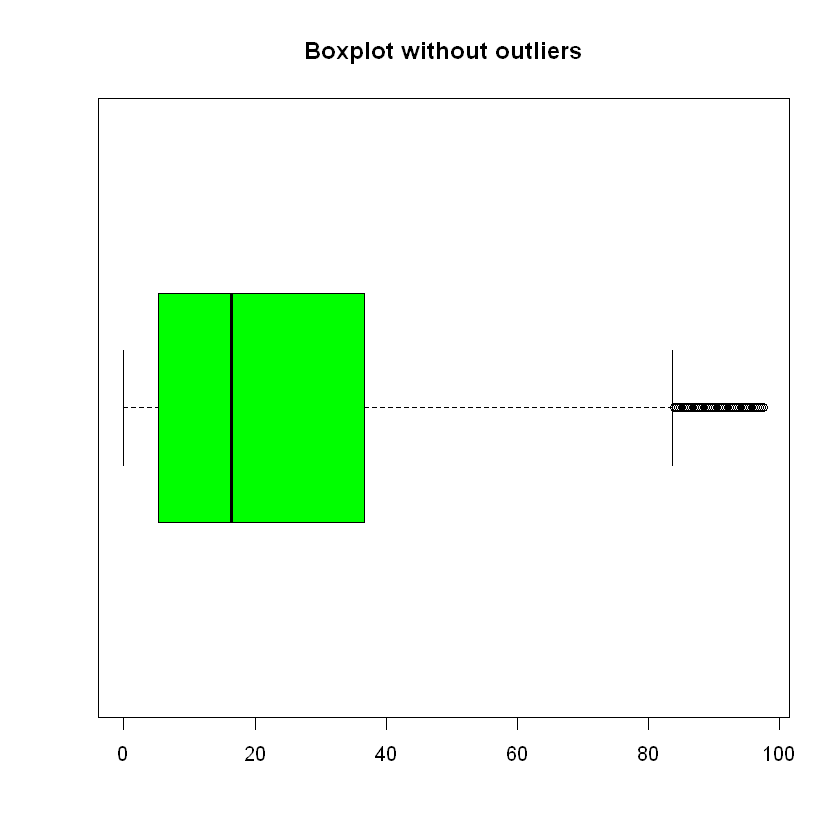


 Pre-treatment Outliers:
 4.33 4.33 6.67 7.33 4.67 5.33 4.67 7.67 6 20 9.67 6.67 7 11.67 4.33 6.67 5 4.67 7.33 6.67 10.67 7 5 5.33 16 10.33 8.33 9.33 13 4.67 4.33 8.33 4.33 5 6 6.67 6.33 5.33 5.33 6.67 4.67 5 4.67 9.33 7 14 13.67 18.33 7 6 5 6 12.33 4.33 7 13.67 5.33 10.67 12.33 5 4.67 98.67 18.67 5.67 5.67 4.67 36 10.67 4.67 4.67 14.33 4.67 7 6 4.67 5 5.67 63.33 9.67 8.33 14.67 13.67 9 10.67 10.67 5 5 12 6.33 11 4.33 8 7.67 9.33 6.67 5 21.67 4.67 9.33 4.67 4.67 5 8.33 6 4.33 5.33 7.67 5 8.67 5.67 5.67 5.67 7 4.67 14.67 8.67 6.67 4.67 5 6.33 12 6.33 4.33 7 9.67 14.67 7.67 9 5.33 7 14.33 6.67 29.67 7.33 7.67 12.67 4.67 4.67 4.33 7 12 7.67 16.33 7.33 5.33 14 13.67 5 4.33 4.33 7.67 6.33 11 5.67 9.67 4.67 4.67 6 15 5.33 8 6.67 10.33 5.67 7.33 11.67 10.67 4.33 6.33 9.67 16.67 5.33 6.67 5.33 11.67 4.33 9.67 7.67 10.33 10 4.67 12.33 9.67 19.67 4.67 5.33 53.33 20.67 4.67 5.33 12 6.33 7 9.67 5.67 12.67 7.33 8.33 7.67 18.33 9.33 12.33 5.33 5.67 4.67 5.67 41.67 7.67 8.67 5.33 9.67 10.33 4.67 9.6

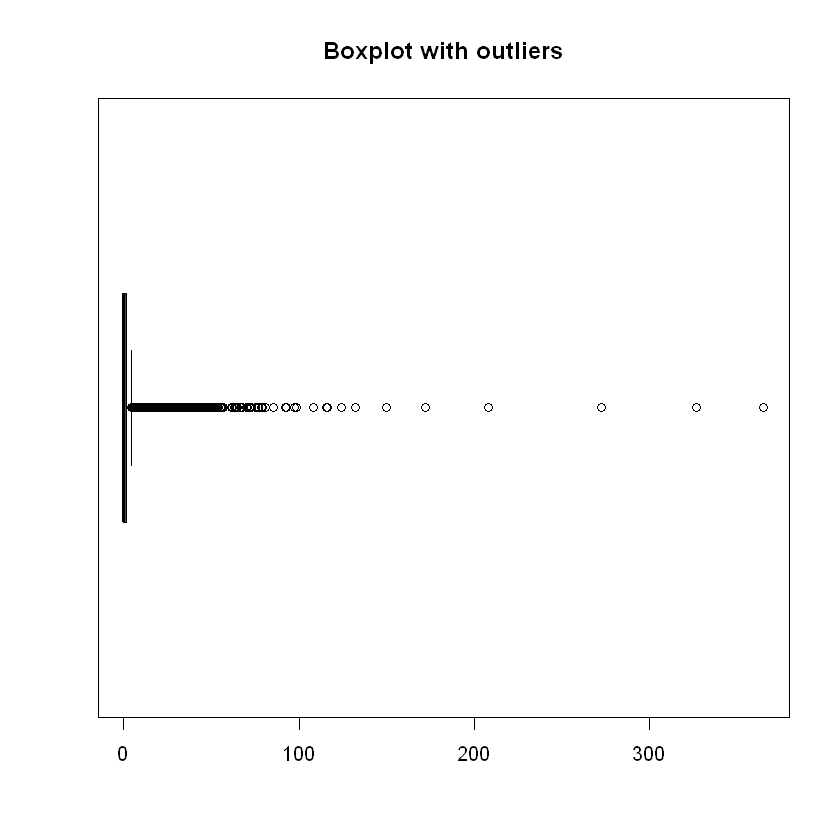


 Post-treatment Outliers:
 4.33 4.33 6.67 7.33 4.67 5.33 4.67 7.67 6 9.33 9.33 6.67 7 9.33 4.33 6.67 5 4.67 7.33 6.67 9.33 7 5 5.33 9.33 9.33 8.33 9.33 9.33 4.67 4.33 8.33 4.33 5 6 6.67 6.33 5.33 5.33 6.67 4.67 5 4.67 9.33 7 9.33 9.33 9.33 7 6 5 6 9.33 4.33 7 9.33 5.33 9.33 9.33 5 4.67 9.33 9.33 5.67 5.67 4.67 9.33 9.33 4.67 4.67 9.33 4.67 7 6 4.67 5 5.67 9.33 9.33 8.33 9.33 9.33 9 9.33 9.33 5 5 9.33 6.33 9.33 4.33 8 7.67 9.33 6.67 5 9.33 4.67 9.33 4.67 4.67 5 8.33 6 4.33 5.33 7.67 5 8.67 5.67 5.67 5.67 7 4.67 9.33 8.67 6.67 4.67 5 6.33 9.33 6.33 4.33 7 9.33 9.33 7.67 9 5.33 7 9.33 6.67 9.33 7.33 7.67 9.33 4.67 4.67 4.33 7 9.33 7.67 9.33 7.33 5.33 9.33 9.33 5 4.33 4.33 7.67 6.33 9.33 5.67 9.33 4.67 4.67 6 9.33 5.33 8 6.67 9.33 5.67 7.33 9.33 9.33 4.33 6.33 9.33 9.33 5.33 6.67 5.33 9.33 4.33 9.33 7.67 9.33 9.33 4.67 9.33 9.33 9.33 4.67 5.33 9.33 9.33 4.67 5.33 9.33 6.33 7 9.33 5.67 9.33 7.33 8.33 7.67 9.33 9.33 9.33 5.33 5.67 4.67 5.67 9.33 7.67 8.67 5.33 9.33 9.33 4.67 9.33 9.33 9.33 

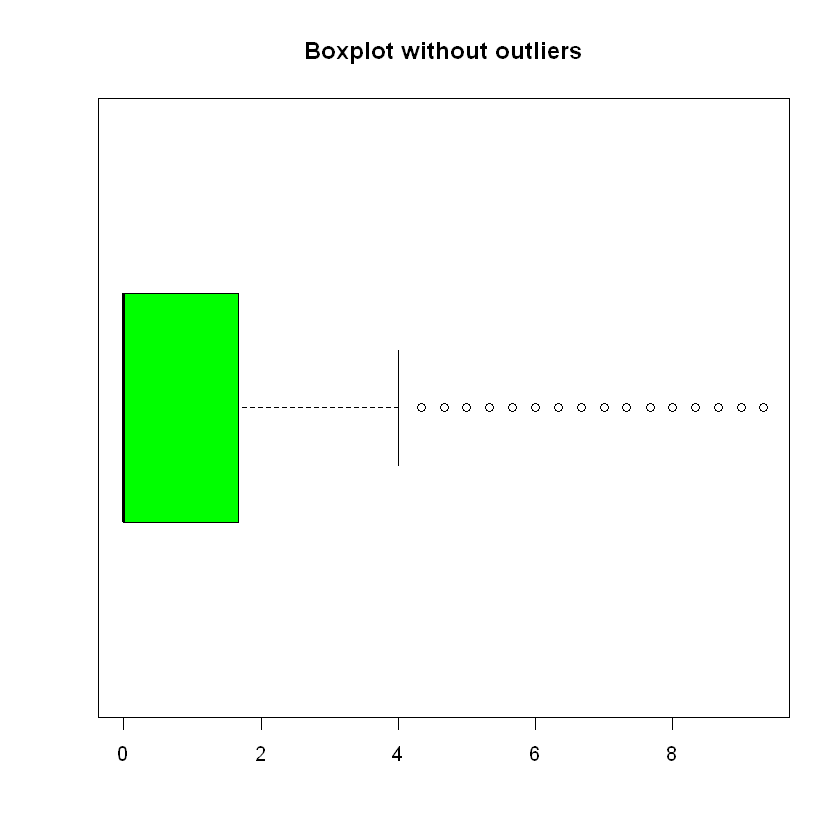


 Pre-treatment Outliers:
 1.33 1.67 2 1 1.33 12.33 1.67 2.67 2.67 8 1 2 1 1.33 2 2.33 1.33 1.67 1.67 1 3 1 1.33 1 2.33 2.33 1.33 3 1 2 1.67 1 1.33 4.33 3 1.33 1.33 2 38.67 1 1 1.67 1.67 1.33 1 1 1 1.67 3 1.33 2 2.67 3 3 1 1 1 7.33 2.33 1.33 2 1 3.33 3.67 1 1 2.67 1.33 1 2.33 1.33 1.33 3.67 3.33 1.67 2 1.33 2 1 1.33 1.67 2 1 1.33 1.33 1 3.33 1 1.67 16.67 4.67 1.33 1 4.33 3.33 1.67 1.33 3.67 1.33 1.33 1.33 3.67 3.67 6.33 1.67 3.33 2 1 1.67 1 3.33 1.33 2.33 1.67 1.33 1.67 1 1.33 3.33 2 1 2 1 2.33 1 1.33 7 4 1 1.33 1.33 1 1.33 1 2.67 3 2.33 1 1.33 1 3 2 1.33 1 2.67 1 3.67 2.33 1.33 1 2 1.67 1 2.67 2 1.33 1 2 1.33 1.33 1.33 1.67 1 5.67 1.33 2 2 1.67 1 1 1.67 1.67 1 1.33 1.33 9.33 1.67 1 1.67 1.67 1 2.33 3.67 2 10 1 1 3.33 1 1.67 4 2.33 3.33 1.33 1.67 1.33 3.33 4 3.67 2 1 1.67 1.33 1 1.33 1.33 1 1.67 1 2.33 1 1 1 1 1.33 1.67 1.33 3.33 2 6.33 1.33 21.33 1 1 1 1 1 1.33 1.33 17.67 2 2.33 4.33 1 11.67 1.67 3 1.33 1 3.33 1 2.67 2.67 1 1 3.33 1 1.33 1 2 1.67 2 14 3 3.67 1 3 3.67 1.67 1 2 1 2 6.33

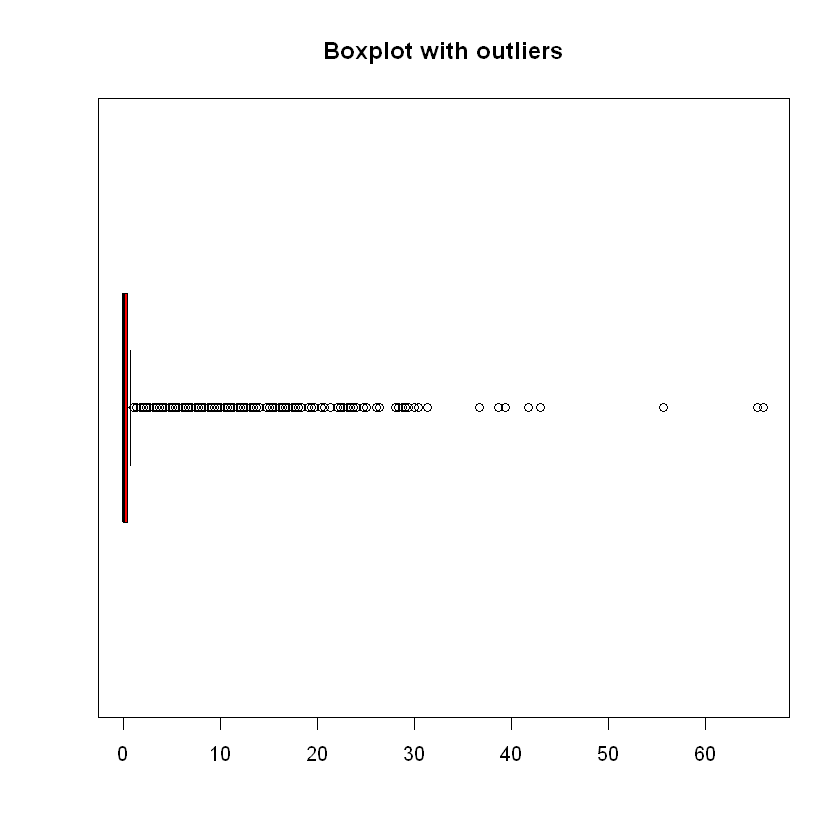


 Post-treatment Outliers:
 1.33 1.33 1.33 1 1.33 1.33 1.33 1.33 1.33 1.33 1 1.33 1 1.33 1.33 1.33 1.33 1.33 1.33 1 1.33 1 1.33 1 1.33 1.33 1.33 1.33 1 1.33 1.33 1 1.33 1.33 1.33 1.33 1.33 1.33 1.33 1 1 1.33 1.33 1.33 1 1 1 1.33 1.33 1.33 1.33 1.33 1.33 1.33 1 1 1 1.33 1.33 1.33 1.33 1 1.33 1.33 1 1 1.33 1.33 1 1.33 1.33 1.33 1.33 1.33 1.33 1.33 1.33 1.33 1 1.33 1.33 1.33 1 1.33 1.33 1 1.33 1 1.33 1.33 1.33 1.33 1 1.33 1.33 1.33 1.33 1.33 1.33 1.33 1.33 1.33 1.33 1.33 1.33 1.33 1.33 1 1.33 1 1.33 1.33 1.33 1.33 1.33 1.33 1 1.33 1.33 1.33 1 1.33 1 1.33 1 1.33 1.33 1.33 1 1.33 1.33 1 1.33 1 1.33 1.33 1.33 1 1.33 1 1.33 1.33 1.33 1 1.33 1 1.33 1.33 1.33 1 1.33 1.33 1 1.33 1.33 1.33 1 1.33 1.33 1.33 1.33 1.33 1 1.33 1.33 1.33 1.33 1.33 1 1 1.33 1.33 1 1.33 1.33 1.33 1.33 1 1.33 1.33 1 1.33 1.33 1.33 1.33 1 1 1.33 1 1.33 1.33 1.33 1.33 1.33 1.33 1.33 1.33 1.33 1.33 1.33 1 1.33 1.33 1 1.33 1.33 1 1.33 1 1.33 1 1 1 1 1.33 1.33 1.33 1.33 1.33 1.33 1.33 1.33 1 1 1 1 1 1.33 1.33 1.33 1.33 1.33 1

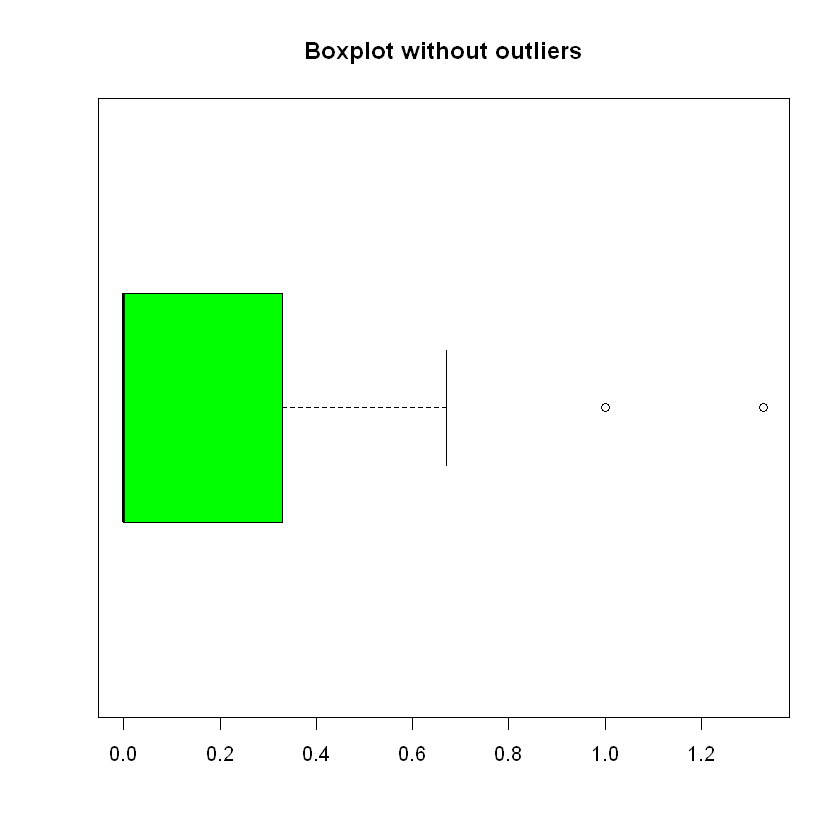


 Pre-treatment Outliers:
 718.07 490.13 377.45 871.5 633.38 426.91 1005.39 742.42 609.72 658.34 1208.42 409.89 438.58 480.25 581.56 451.52 475.57 1513.58 402.64 411.44 529.67 440.51 1283.14 541.85 403.6 430.4 566.99 613.66 1666.58 378.32 498.06 589.76 449.94 772.14 448.9 504.45 500.74 708.3 540.86 616.87 438.87 762.49 663.01 586.43 486.32 1147.01 415.24 442.61 628.93 725.59 572.2 1382.25 455.75 454.71 432.29 485.71 436.9 442.39 559.35 775.19 987.03 394.66 704.55 508.81 443.14 577.56 708.83 373.84 607.87 806.24 672.77 525.9 466.84 665.17 1489.6 1045.53 810.25 482.39 439.47 374.78 467.7 690.63 673.49 503.76 430.16 520.43 399.61 384.13 735.79 892.7 379.93 372.84 700.96 612.29 445.64 400.57 557.49 658.76 462.09 920.49 392.39 736.56 432.61 612.63 802.87 398.3 775.31 510.06 449.39 387.98 523.07 397.89 498.72 428.6 559.43 419.98 1356.85 687.23 489.18 606.56 855.84 540.25 629.26 1026.35 706.52 601.02 688.49 433.61 484.87 539.12 452.66 490.22 611.6 572.81 477.35 455.94 451.01 467.24 787.8 533.

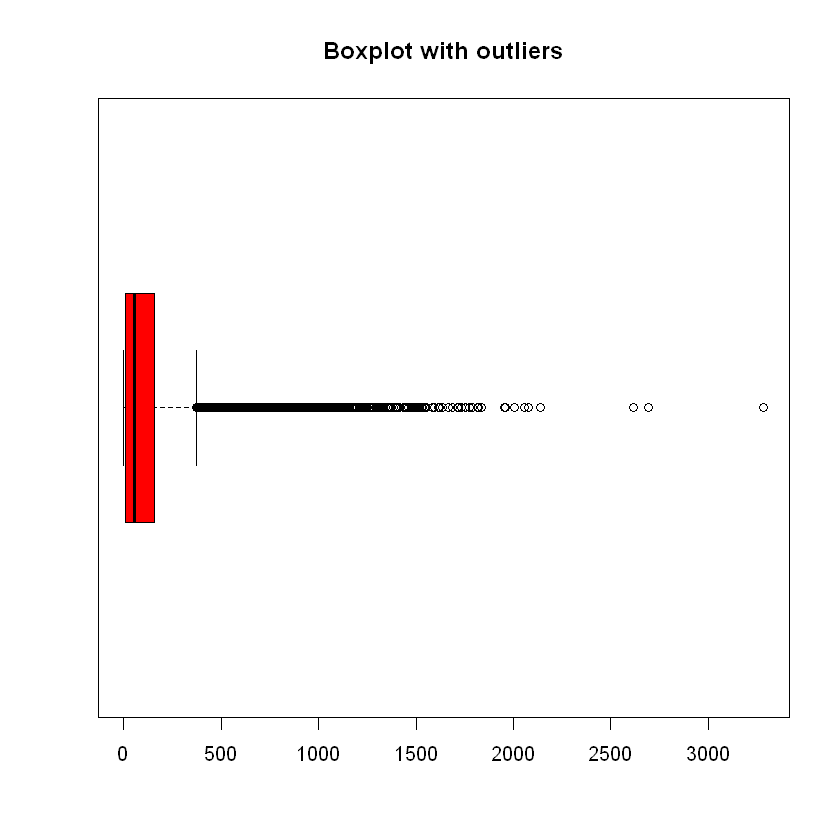


 Post-treatment Outliers:
 440.938 440.938 377.45 440.938 440.938 426.91 440.938 440.938 440.938 440.938 440.938 409.89 438.58 440.938 440.938 440.938 440.938 440.938 402.64 411.44 440.938 440.51 440.938 440.938 403.6 430.4 440.938 440.938 440.938 378.32 440.938 440.938 440.938 440.938 440.938 440.938 440.938 440.938 440.938 440.938 438.87 440.938 440.938 440.938 440.938 440.938 415.24 440.938 440.938 440.938 440.938 440.938 440.938 440.938 432.29 440.938 436.9 440.938 440.938 440.938 440.938 394.66 440.938 440.938 440.938 440.938 440.938 373.84 440.938 440.938 440.938 440.938 440.938 440.938 440.938 440.938 440.938 440.938 439.47 374.78 440.938 440.938 440.938 440.938 430.16 440.938 399.61 384.13 440.938 440.938 379.93 372.84 440.938 440.938 440.938 400.57 440.938 440.938 440.938 440.938 392.39 440.938 432.61 440.938 440.938 398.3 440.938 440.938 440.938 387.98 440.938 397.89 440.938 428.6 440.938 419.98 440.938 440.938 440.938 440.938 440.938 440.938 440.938 440.938 440.938 440.938 

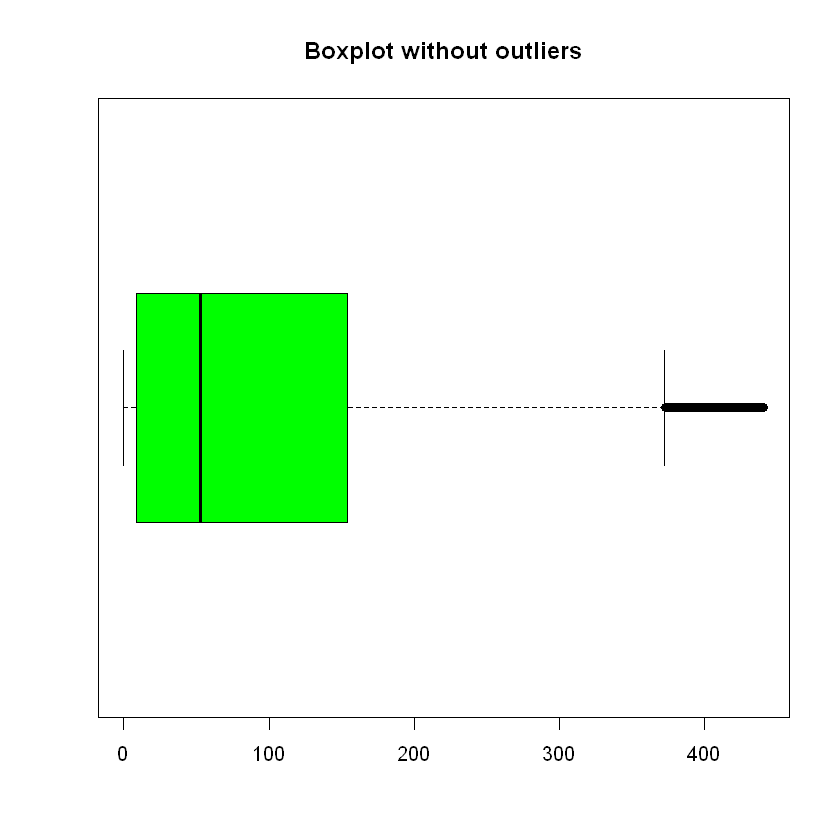


 Pre-treatment Outliers:
 370.33 91.33 210.67 105 133 204.33 91.67 169 132.33 220 378 116.67 82.67 98 343 148.67 156 94 141.67 104.33 93.33 84 156.67 92.33 263.33 86.67 113.67 117.33 133.67 106 101.67 385.33 138.33 197 94.67 84.67 150.33 176.33 187 87.33 87.67 132.33 172.67 96 130.67 119 119.67 82 99 213.33 84.33 212.33 130.67 151.67 82 86.33 83.67 125 191.33 85.33 98.33 83.67 293.67 156 87 145.33 100.33 119.67 139.67 94.33 154 95.33 81.33 108.67 95.33 413.67 116 109 127.67 122 152.33 118 116.33 126 106 86.67 156.67 149 91.33 89.67 107.33 375.33 173.67 105 127.67 102.33 116.67 146.67 90.33 113 121.67 114 99.33 84.67 134 152.67 197 87.67 177 141 94 83 123 124 169.33 102 167.33 88.67 138.33 135.67 99.33 123.67 188.33 84.33 145 111 129.33 115 148 102 106.67 81.33 269.67 147.33 194.67 142 165.67 87.33 88.67 84.33 83.33 234 89.67 140.67 88.67 92.33 109.67 85.33 99.67 188.67 170.67 202.67 95 137.67 87 138.33 152 84 96.33 86.67 85.67 100.67 177.33 94 92.67 109 118.33 156 101.33 112.67 180 10

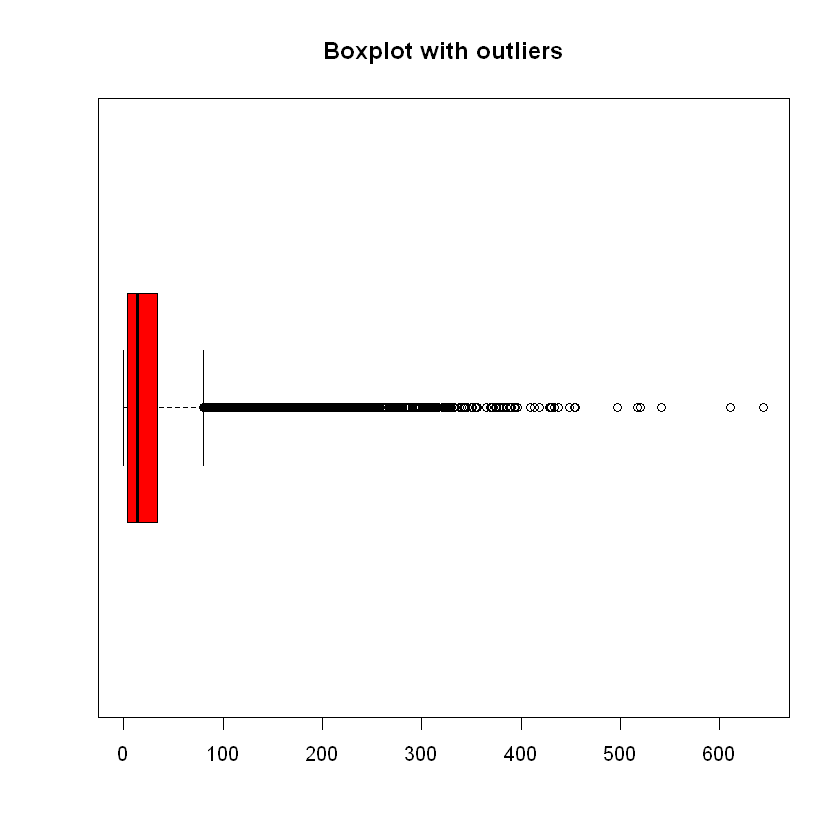


 Post-treatment Outliers:
 90.33 90.33 90.33 90.33 90.33 90.33 90.33 90.33 90.33 90.33 90.33 90.33 82.67 90.33 90.33 90.33 90.33 90.33 90.33 90.33 90.33 84 90.33 90.33 90.33 86.67 90.33 90.33 90.33 90.33 90.33 90.33 90.33 90.33 90.33 84.67 90.33 90.33 90.33 87.33 87.67 90.33 90.33 90.33 90.33 90.33 90.33 82 90.33 90.33 84.33 90.33 90.33 90.33 82 86.33 83.67 90.33 90.33 85.33 90.33 83.67 90.33 90.33 87 90.33 90.33 90.33 90.33 90.33 90.33 90.33 81.33 90.33 90.33 90.33 90.33 90.33 90.33 90.33 90.33 90.33 90.33 90.33 90.33 86.67 90.33 90.33 90.33 89.67 90.33 90.33 90.33 90.33 90.33 90.33 90.33 90.33 90.33 90.33 90.33 90.33 90.33 84.67 90.33 90.33 90.33 87.67 90.33 90.33 90.33 83 90.33 90.33 90.33 90.33 90.33 88.67 90.33 90.33 90.33 90.33 90.33 84.33 90.33 90.33 90.33 90.33 90.33 90.33 90.33 81.33 90.33 90.33 90.33 90.33 90.33 87.33 88.67 84.33 83.33 90.33 89.67 90.33 88.67 90.33 90.33 85.33 90.33 90.33 90.33 90.33 90.33 90.33 87 90.33 90.33 84 90.33 86.67 85.67 90.33 90.33 90.33 90.33 90.

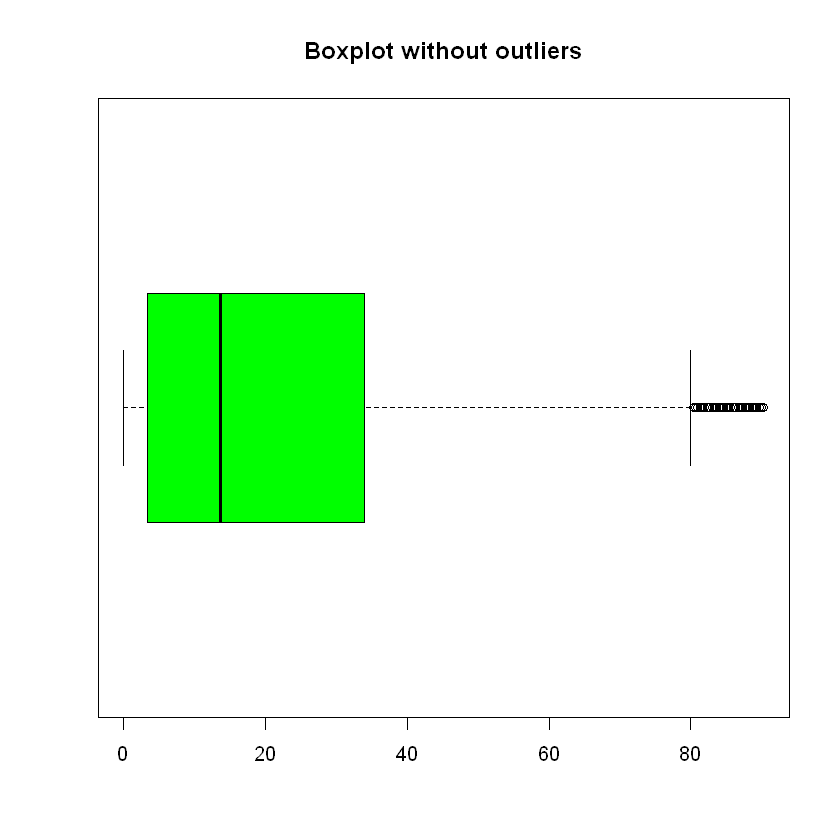


 Pre-treatment Outliers:
 147 96.33 45 29 41 196 31.67 48.67 48.33 26.67 86.67 46.67 42 97.33 34 93 121.67 34.33 49.67 28.33 72.33 76 23.33 28.33 43 90.33 141.67 64.67 24 27 59 60 29.67 55.67 64.33 97.33 35.67 50.67 25.33 109.67 281.67 85 64.67 25.67 76.67 25.67 105 38 62 27 34 41.67 57.33 34.67 32.33 183.67 30.33 63.33 44 30.33 301 23.33 28 193.67 84.33 43.33 34.33 49.33 40 51.67 31.33 25.33 99.67 36.33 27 50 51.33 37 32.33 24.67 35.67 32.67 28.33 30 28.67 47.33 34 25 31.33 36.67 73.67 32 41.67 102 24.67 30.33 26.67 54.33 38.67 23.33 84.67 29.33 59.33 35 43.33 27.33 26 45 33.67 38.67 39.33 33.33 26.67 70 37.67 24.67 77 35.33 34 26 30.67 32.33 32.67 34 24.33 42.67 32.67 47.33 77 24 30.33 70 45.67 89.33 23.33 33.67 31.67 61.33 46 36.67 80.33 37 46.67 67 36.33 28.67 39.33 122.33 24 38.33 33.67 27.33 38.33 24 25 33 26.33 31.67 30.33 80.67 24.67 31.33 32.33 50 25 38.67 24.67 79 66 76.67 87.33 24 48.33 206 23.33 23.67 41 30.67 23.67 43 24.67 25.33 27.67 31.67 46.33 54 173 45.33 120.67 42 2

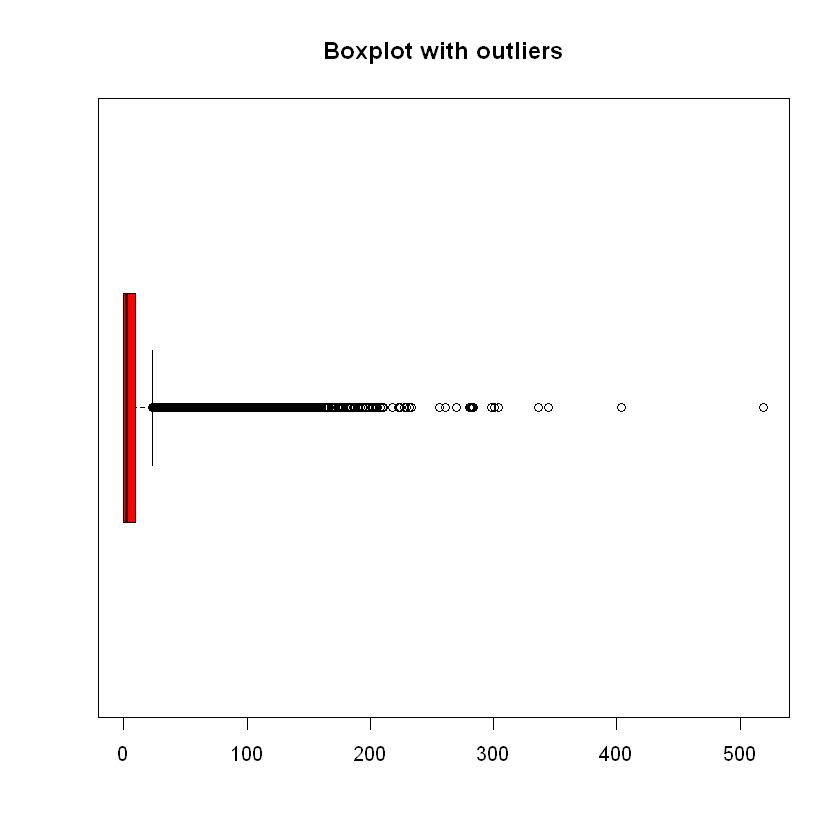


 Post-treatment Outliers:
 35.67 35.67 35.67 29 35.67 35.67 31.67 35.67 35.67 26.67 35.67 35.67 35.67 35.67 34 35.67 35.67 34.33 35.67 28.33 35.67 35.67 23.33 28.33 35.67 35.67 35.67 35.67 24 27 35.67 35.67 29.67 35.67 35.67 35.67 35.67 35.67 25.33 35.67 35.67 35.67 35.67 25.67 35.67 25.67 35.67 35.67 35.67 27 34 35.67 35.67 34.67 32.33 35.67 30.33 35.67 35.67 30.33 35.67 23.33 28 35.67 35.67 35.67 34.33 35.67 35.67 35.67 31.33 25.33 35.67 35.67 27 35.67 35.67 35.67 32.33 24.67 35.67 32.67 28.33 30 28.67 35.67 34 25 31.33 35.67 35.67 32 35.67 35.67 24.67 30.33 26.67 35.67 35.67 23.33 35.67 29.33 35.67 35 35.67 27.33 26 35.67 33.67 35.67 35.67 33.33 26.67 35.67 35.67 24.67 35.67 35.33 34 26 30.67 32.33 32.67 34 24.33 35.67 32.67 35.67 35.67 24 30.33 35.67 35.67 35.67 23.33 33.67 31.67 35.67 35.67 35.67 35.67 35.67 35.67 35.67 35.67 28.67 35.67 35.67 24 35.67 33.67 27.33 35.67 24 25 33 26.33 31.67 30.33 35.67 24.67 31.33 32.33 35.67 25 35.67 24.67 35.67 35.67 35.67 35.67 24 35.67 35.67 

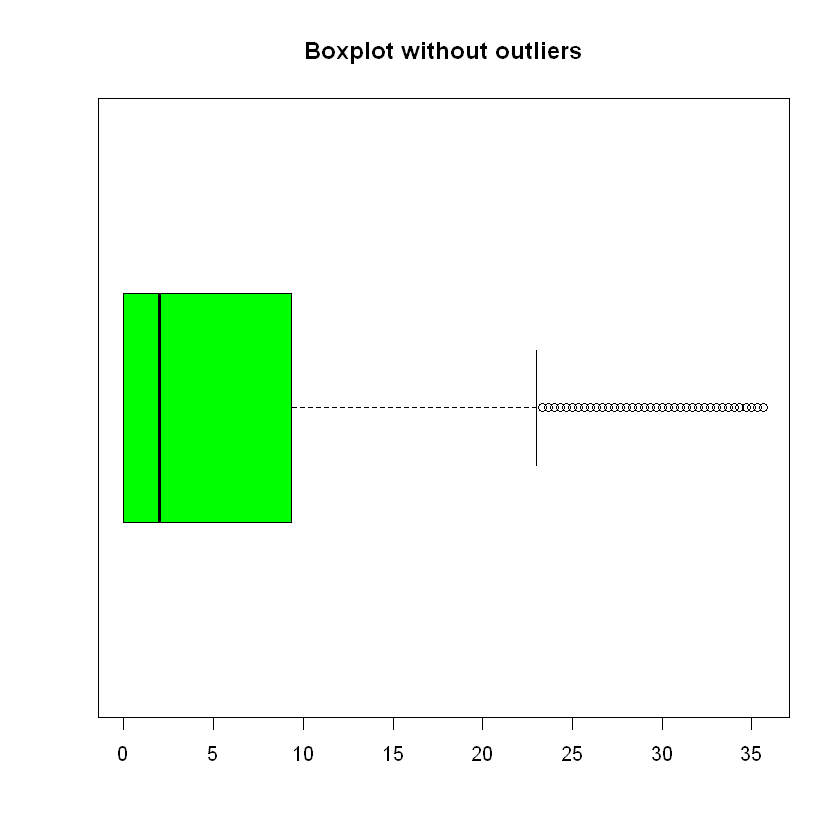


 Pre-treatment Outliers:
 555.67 351.67 370 732.33 329 514 1177.33 584 286.33 517.67 553.67 442 1101.33 290.33 310.33 391 586.33 1143.67 603 444 616.67 300.33 389.67 268.67 307 432.67 570 1355.67 329.67 341.67 358.67 362.33 492 341.33 372 538.33 328.67 598.67 827.33 286.33 345.67 405.67 365 336.67 529.67 465.33 298 422.67 438 480.67 479.67 329.33 746 365.67 327 426.67 657.33 617.67 269.33 572.33 419.33 306.67 692 300.33 743.67 348 789 891 1921.33 330.67 328.67 399 357.67 332 527.33 345.67 435.67 525.67 500 338.67 971.67 289 648.67 390 287.67 442 304.33 524 870 749.33 295 332.33 368.33 712.67 590.67 1025.67 500 274 284 421 276.33 541.33 322.67 856.33 589 271 409 330.33 291 303 316.67 328.67 591.67 805 273.33 286.67 293 676 321 333.33 394.67 469.33 587 351.33 577.67 854.67 507.67 342.33 336.33 316.33 286.67 925.33 398 300 545 331.67 288 411.33 297 908 312.33 326.67 313.33 488.67 322 287 308.67 390 302.67 376.67 282 443.67 359.33 280.67 412.33 314 314.67 319 311 301.33 304 308.33 316 322

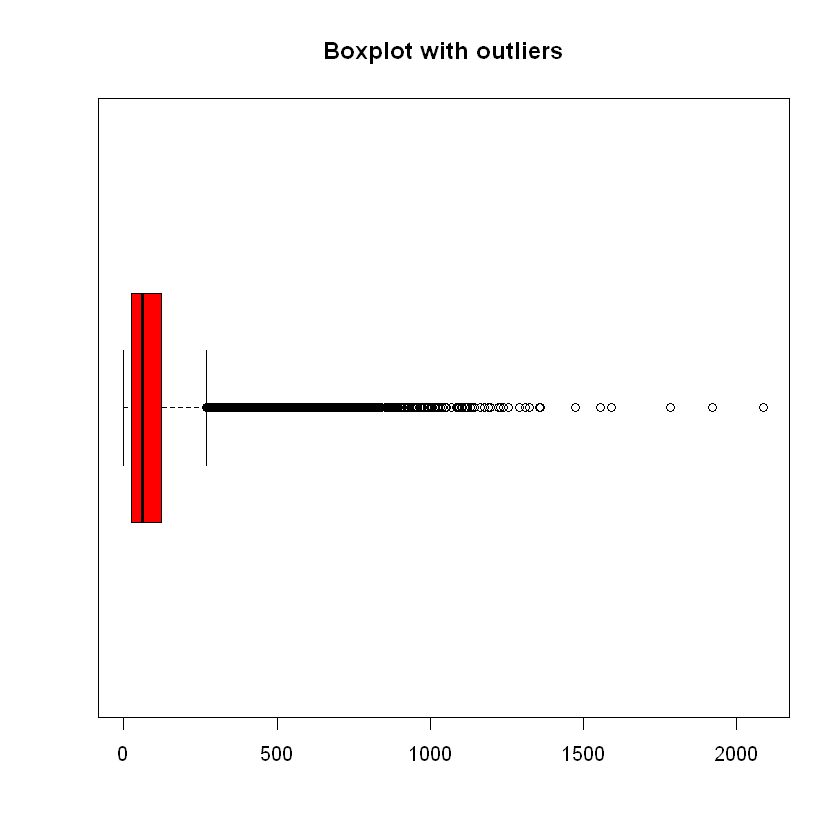


 Post-treatment Outliers:
 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 268.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 269.33 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 274 279.67 279.67 276.33 279.67 279.67 279.67 279.67 271 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 273.33 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.67 279.6

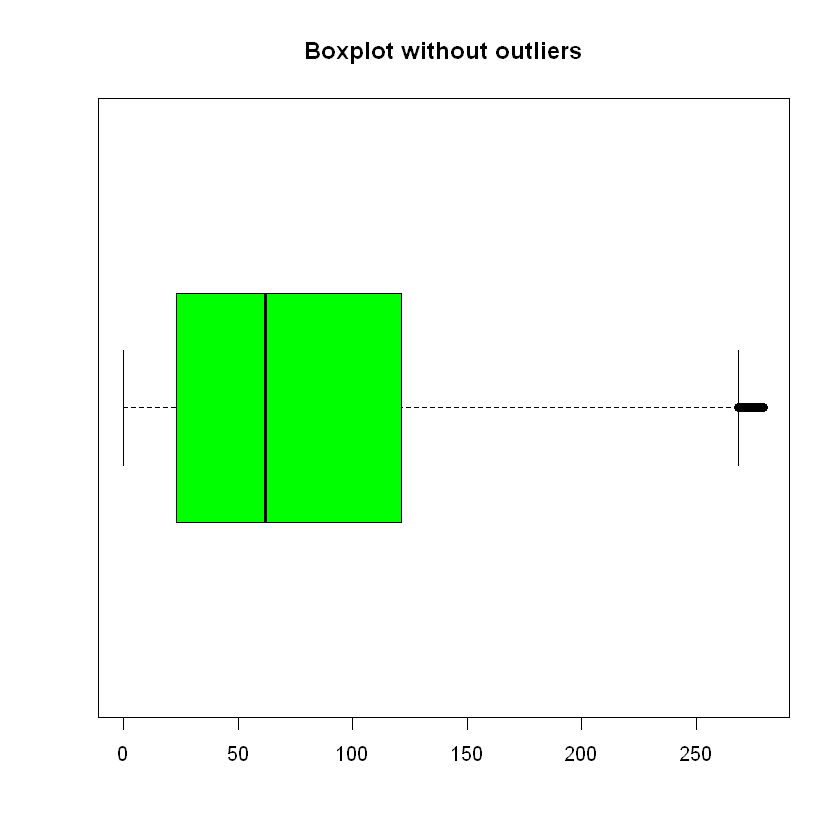


 Pre-treatment Outliers:
 303.67 289.33 271.67 407 433.67 417.67 238.33 418.67 216.33 251 269.67 390.67 512.67 228.67 235 310.33 285.33 205.33 212 249.67 299 682.67 216 537.33 261.33 304 234.33 403.67 487 283.33 238 442 244.33 474.67 256 209.33 351 268.67 231 246.33 454 424.33 257.67 230.33 506.67 364 311 386.67 401.67 340.33 352 206.67 257 209.67 266 223.67 321.67 258 371.67 205.33 241.33 459.33 253.67 294 311 266.33 262 624.67 359.67 295 243.33 219 314 339.67 208.67 215.33 533 379.33 212.67 547.67 245 357.33 401 277.67 688.67 239 458.67 262.67 269.33 527.33 219 382.67 436.33 360.67 277.67 209.33 503.67 214.33 299.33 368 404.33 425 280.67 216.67 268.67 269.33 267 471 242 330 246.67 275.33 334.33 363.67 485.33 266 274.33 247.67 418 264.67 379.33 242 537 283.67 209.67 230 255.33 274.33 480.33 609.33 359 260 403.33 250.67 275 279.33 245.33 304 259 296 229.33 270.67 384 423.33 229.67 578.67 435.67 237 249.67 530.33 230.33 342.67 205.67 372.67 304.33 245 518.67 257.67 569 306.67 292.67 21

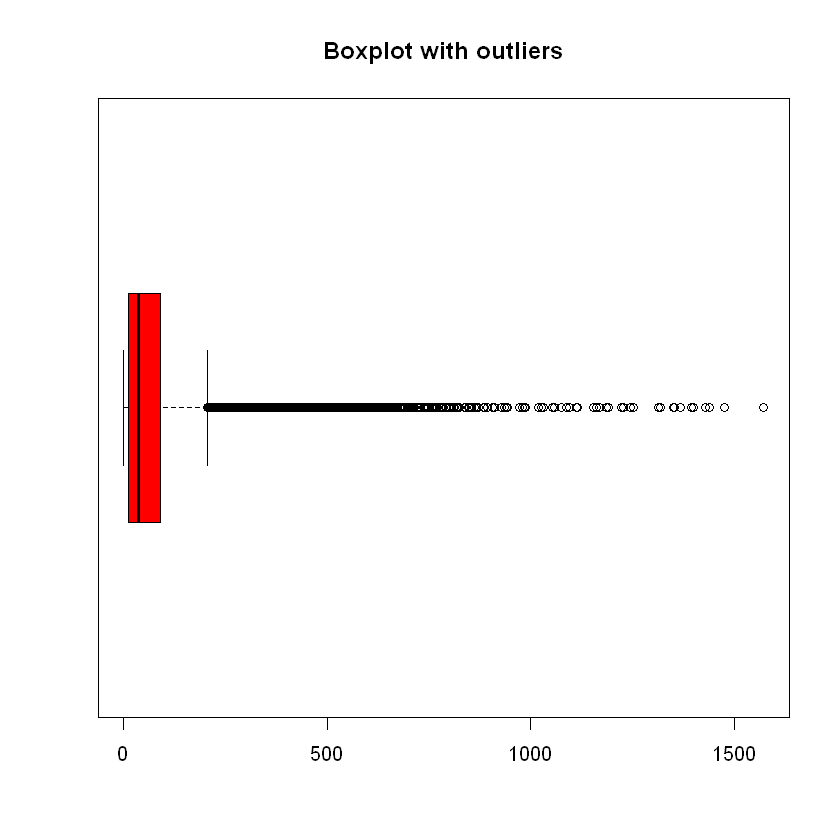


 Post-treatment Outliers:
 242 242 242 242 242 242 238.33 242 216.33 242 242 242 242 228.67 235 242 242 205.33 212 242 242 242 216 242 242 242 234.33 242 242 242 238 242 242 242 242 209.33 242 242 231 242 242 242 242 230.33 242 242 242 242 242 242 242 206.67 242 209.67 242 223.67 242 242 242 205.33 241.33 242 242 242 242 242 242 242 242 242 242 219 242 242 208.67 215.33 242 242 212.67 242 242 242 242 242 242 239 242 242 242 242 219 242 242 242 242 209.33 242 214.33 242 242 242 242 242 216.67 242 242 242 242 242 242 242 242 242 242 242 242 242 242 242 242 242 242 242 242 209.67 230 242 242 242 242 242 242 242 242 242 242 242 242 242 242 229.33 242 242 242 229.67 242 242 237 242 242 230.33 242 205.67 242 242 242 242 242 242 242 242 210.33 217.33 242 242 242 231 242 242 242 242 217 242 239.67 242 242 208 242 242 242 223.67 209.67 242 242 242 215.67 242 242 242 226 242 229.67 242 242 242 242 235.67 240.67 242 205.33 242 242 242 242 242 236.67 242 208.33 242 222 242 232.67 242 209.67 242 2

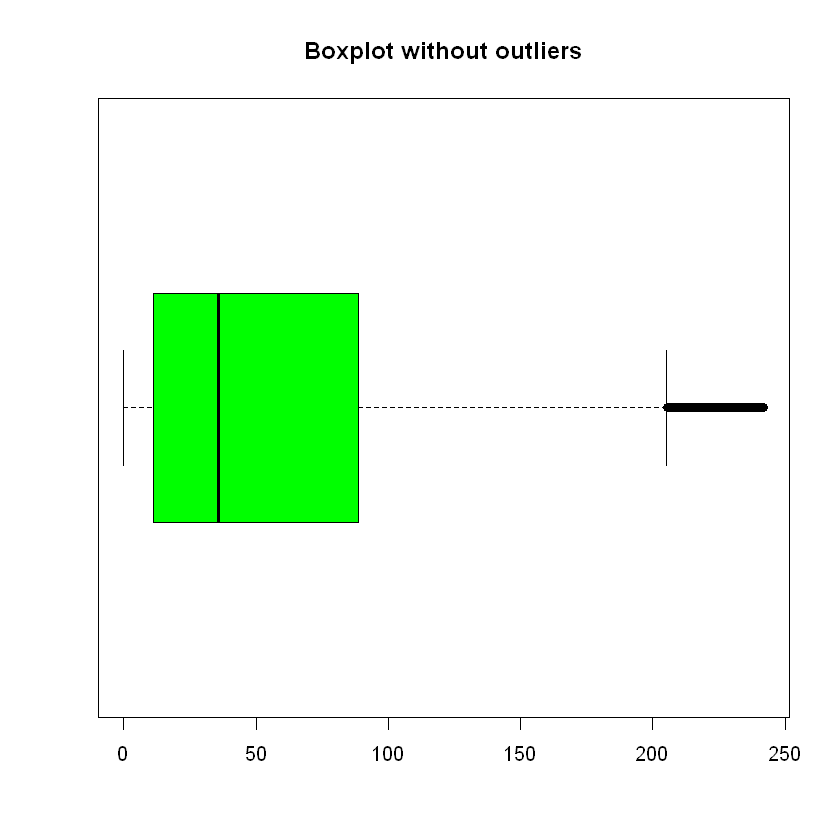


 Pre-treatment Outliers:
 59.67 32 46.67 37.33 48.67 71.67 95.33 38.67 32 90.67 48.67 38.67 41.33 64.33 42.67 33 59.33 91.33 44 75 30 44.33 36 36.33 43 50.33 46.67 41 50.67 31 57 33.33 48.67 32.67 45 35.67 54.33 43 40.33 40 42.33 30 42 50 31 31.33 57.67 36.33 39 54.67 35.67 50.67 59.33 58 33.33 51 48 34.67 40.33 37.33 34 43.33 55.33 75 31.67 47 30.33 39 59 61 34.67 33.33 32.67 111.67 53 32.67 56.67 36.33 39 31.67 99 40 39 31.67 54.67 38.33 33.67 126.67 51 44.67 44 32.67 69.67 31.33 35 38.33 33.67 38 40.67 29.67 31 96.67 75.33 79.33 39.33 51.67 41.67 39.67 53.33 32.33 45 41 39.33 34.67 32 35.67 33 38.33 31 48.33 30 43 41 53 31.67 42 62.33 57.33 32 68.67 44.33 41.33 37.33 41.67 86.67 50.33 37 78.33 42 30 39 61.67 51.67 88 80.67 54.67 31 30.67 90.67 29.67 36.67 31.33 50.33 30 49 30 38.67 42.67 36.67 30.33 30 42.33 41.67 120.67 56.67 32 41.67 60.33 30.67 36.33 52 47.33 126 33.33 66.67 36.33 33 61.67 33 32 115.33 32.67 42.33 30 59 32 39 30 34.67 72.67 41 30.33 126.33 31 36.67 31.33 45 32.3

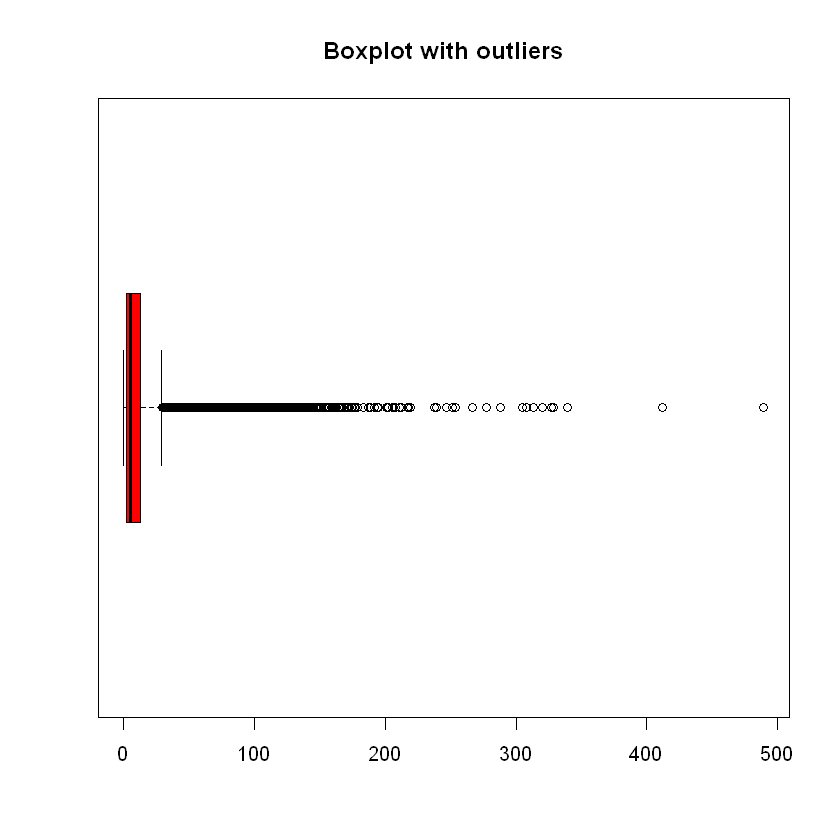


 Post-treatment Outliers:
 35.33 32 35.33 35.33 35.33 35.33 35.33 35.33 32 35.33 35.33 35.33 35.33 35.33 35.33 33 35.33 35.33 35.33 35.33 30 35.33 35.33 35.33 35.33 35.33 35.33 35.33 35.33 31 35.33 33.33 35.33 32.67 35.33 35.33 35.33 35.33 35.33 35.33 35.33 30 35.33 35.33 31 31.33 35.33 35.33 35.33 35.33 35.33 35.33 35.33 35.33 33.33 35.33 35.33 34.67 35.33 35.33 34 35.33 35.33 35.33 31.67 35.33 30.33 35.33 35.33 35.33 34.67 33.33 32.67 35.33 35.33 32.67 35.33 35.33 35.33 31.67 35.33 35.33 35.33 31.67 35.33 35.33 33.67 35.33 35.33 35.33 35.33 32.67 35.33 31.33 35 35.33 33.67 35.33 35.33 29.67 31 35.33 35.33 35.33 35.33 35.33 35.33 35.33 35.33 32.33 35.33 35.33 35.33 34.67 32 35.33 33 35.33 31 35.33 30 35.33 35.33 35.33 31.67 35.33 35.33 35.33 32 35.33 35.33 35.33 35.33 35.33 35.33 35.33 35.33 35.33 35.33 30 35.33 35.33 35.33 35.33 35.33 35.33 31 30.67 35.33 29.67 35.33 31.33 35.33 30 35.33 30 35.33 35.33 35.33 30.33 30 35.33 35.33 35.33 35.33 32 35.33 35.33 30.67 35.33 35.33 35.33 35.

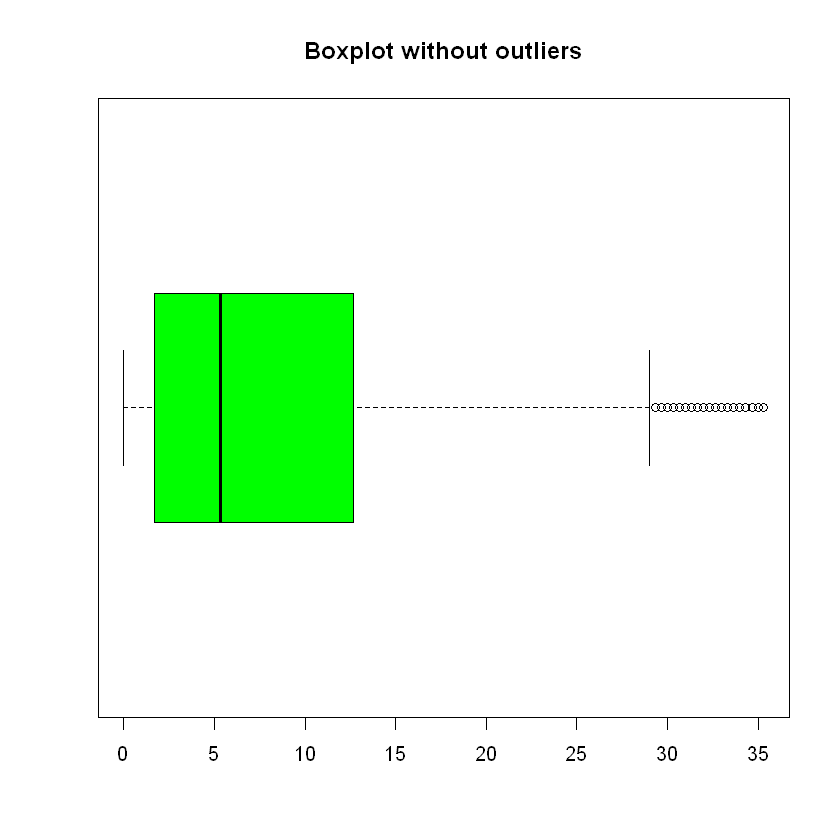


 Pre-treatment Outliers:
 2.33 0.67 6.33 2 23.67 2.67 2.33 0.67 1 26.67 0.33 0.33 0.33 1 0.67 1.67 16 0.33 0.33 0.33 0.33 0.67 1 0.33 0.33 0.67 0.33 3.67 0.67 0.33 2.67 0.33 1 0.33 1 0.67 1.33 1 0.33 2.33 0.33 0.33 3 1.67 0.33 0.33 2 1 4 0.33 0.33 0.33 0.67 1.33 1.67 31.33 0.67 0.33 5.67 1 0.33 0.33 2 5 1.33 0.67 0.33 2 3.67 0.67 0.67 0.67 11 1 0.67 1 0.33 0.33 2 2.33 0.33 3 0.67 8.67 3.33 10.67 2.33 0.67 0.33 5 0.67 1 1.67 2 0.33 0.67 0.33 0.33 0.67 2.33 3.33 12 0.33 0.33 0.33 0.33 5.33 4 0.33 0.67 0.67 0.33 0.33 0.33 1.33 0.33 0.67 0.33 0.33 1.67 0.33 0.67 0.67 0.67 0.67 0.67 0.67 3.67 0.67 0.67 0.33 0.67 0.67 55.67 0.33 1 1.33 3.67 5.33 0.33 0.33 5.33 0.33 81.33 18.33 0.33 2 6 1.33 0.33 1 0.67 51.67 0.33 0.33 1 0.67 0.67 0.67 0.67 1 0.33 0.33 0.33 0.33 0.33 0.33 0.33 0.33 0.33 0.33 1 0.67 1.33 0.33 0.33 2.33 1 0.67 0.67 0.67 1 0.33 1 0.67 0.67 0.33 0.33 0.33 0.67 0.67 0.67 0.33 0.33 0.33 0.33 0.67 0.33 0.33 0.33 0.33 0.67 0.33 0.33 0.33 0.33 0.33 0.33 0.67 54.67 0.33 0.67 3 1.33 0.

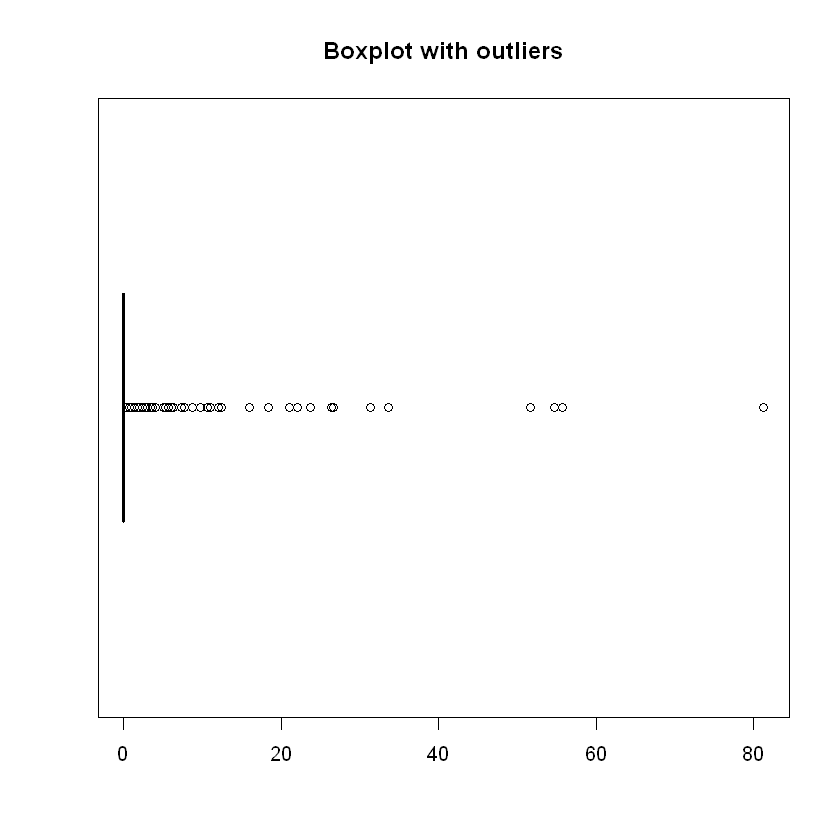


 Post-treatment Outliers:
 
 Mean with outliers:
 1.8529

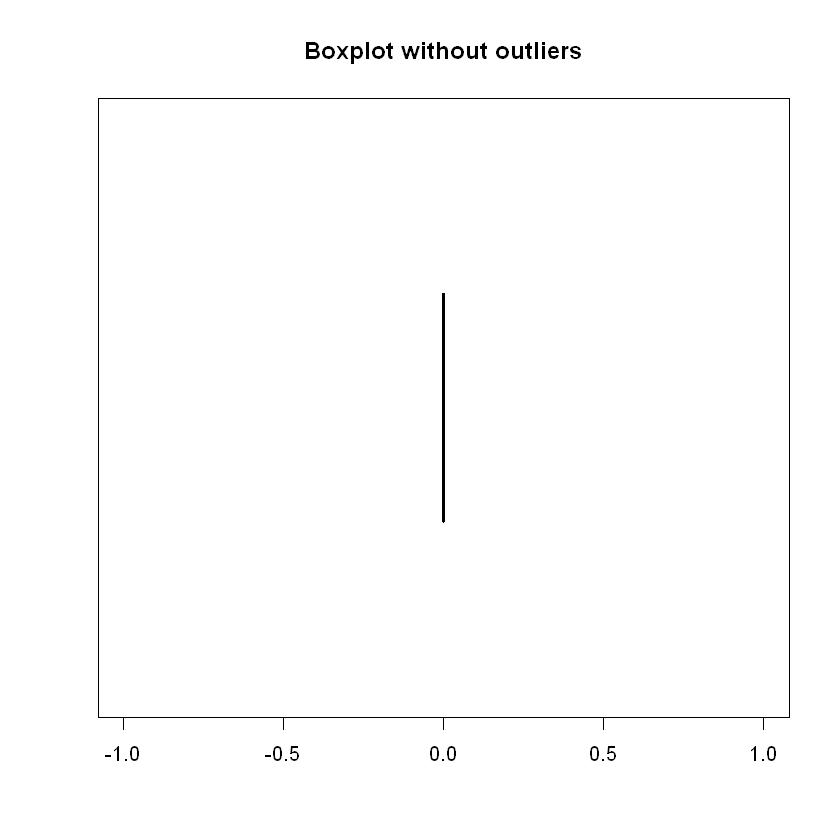


 Pre-treatment Outliers:
 5.67 22.67 4.33 11.67 34.33 14.67 30 8.67 38.33 28.33 6.33 4 8.33 6 12.33 11 45.33 14.67 3.33 6.67 18.67 13.33 32 44.67 12.33 26 6.33 8.33 16.67 7 4 39.33 126.67 3.67 4.67 10.33 8 4.67 13 3.67 15.33 13.33 4.67 21 7.67 20.33 7 7.67 21.67 4.67 6.67 6.67 11 3.67 4.33 4.67 15 3.67 7.33 64.67 3.33 5.33 15 13 12.67 30 85 7.67 6 15.33 7.67 4.33 23 6 41.67 31 3.67 3.33 24 170.67 17.33 7 4.67 14 16 3.67 5.33 8.33 4.67 6 11.33 11.67 3.67 37 5 5 5.67 3.67 5 5.67 21.33 3.67 11.67 3.33 12.33 13.67 38.67 7.33 26.33 9.67 10 10 58.33 5.67 3.67 4 32.67 58.33 9.33 4 4 17.33 5.33 5 20.33 6 14.33 7.67 3.33 24.33 4.67 13 38.67 5.67 4.33 4 4 41.67 11 8.67 6 14.33 6 4 3.67 3.33 5 6.67 21 4 5 3.67 3.67 6 6.33 10 10.33 33 5.67 43.33 7.33 8.67 13 24.33 3.67 14 8 7 7.33 5.33 8.67 18.33 6.67 7 6.67 8.33 7.67 6.33 4.33 15 34.33 19.67 17.33 3.67 30 16 4 4.67 4.33 6.33 4.33 4.67 4.67 6 6.33 5.67 5.67 11.67 4 3.67 4 5.33 3.33 6 14.33 11.33 7.67 28.67 5.33 4 3.33 6.33 12.67 14 10 3.67 16 16 

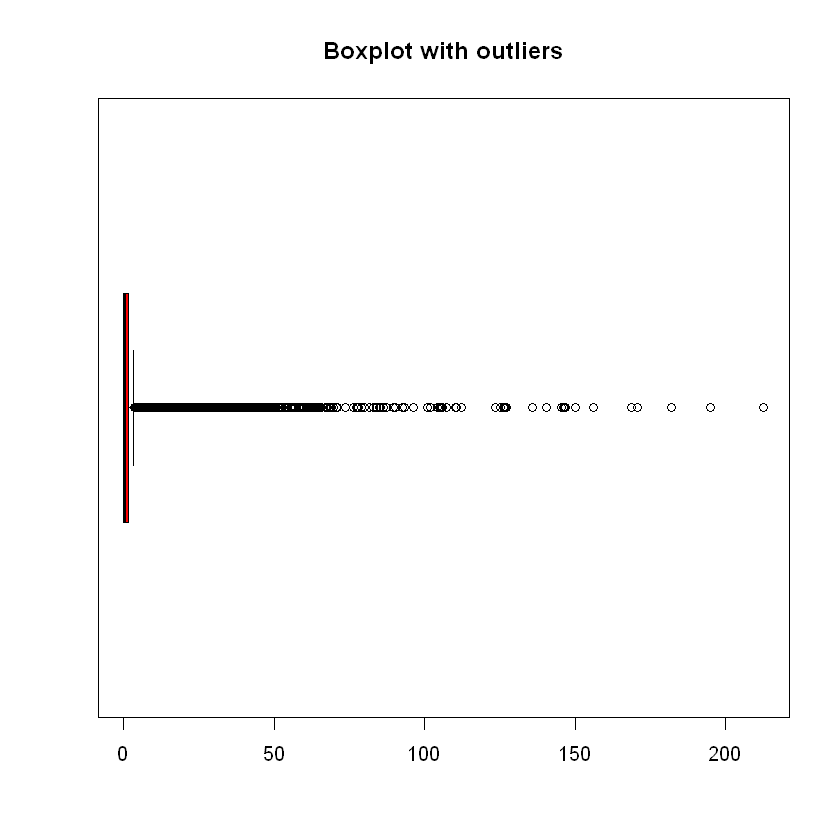


 Post-treatment Outliers:
 5.67 8.67 4.33 8.67 8.67 8.67 8.67 8.67 8.67 8.67 6.33 4 8.33 6 8.67 8.67 8.67 8.67 3.33 6.67 8.67 8.67 8.67 8.67 8.67 8.67 6.33 8.33 8.67 7 4 8.67 8.67 3.67 4.67 8.67 8 4.67 8.67 3.67 8.67 8.67 4.67 8.67 7.67 8.67 7 7.67 8.67 4.67 6.67 6.67 8.67 3.67 4.33 4.67 8.67 3.67 7.33 8.67 3.33 5.33 8.67 8.67 8.67 8.67 8.67 7.67 6 8.67 7.67 4.33 8.67 6 8.67 8.67 3.67 3.33 8.67 8.67 8.67 7 4.67 8.67 8.67 3.67 5.33 8.33 4.67 6 8.67 8.67 3.67 8.67 5 5 5.67 3.67 5 5.67 8.67 3.67 8.67 3.33 8.67 8.67 8.67 7.33 8.67 8.67 8.67 8.67 8.67 5.67 3.67 4 8.67 8.67 8.67 4 4 8.67 5.33 5 8.67 6 8.67 7.67 3.33 8.67 4.67 8.67 8.67 5.67 4.33 4 4 8.67 8.67 8.67 6 8.67 6 4 3.67 3.33 5 6.67 8.67 4 5 3.67 3.67 6 6.33 8.67 8.67 8.67 5.67 8.67 7.33 8.67 8.67 8.67 3.67 8.67 8 7 7.33 5.33 8.67 8.67 6.67 7 6.67 8.33 7.67 6.33 4.33 8.67 8.67 8.67 8.67 3.67 8.67 8.67 4 4.67 4.33 6.33 4.33 4.67 4.67 6 6.33 5.67 5.67 8.67 4 3.67 4 5.33 3.33 6 8.67 8.67 7.67 8.67 5.33 4 3.33 6.33 8.67 8.67 8.67 3.67 

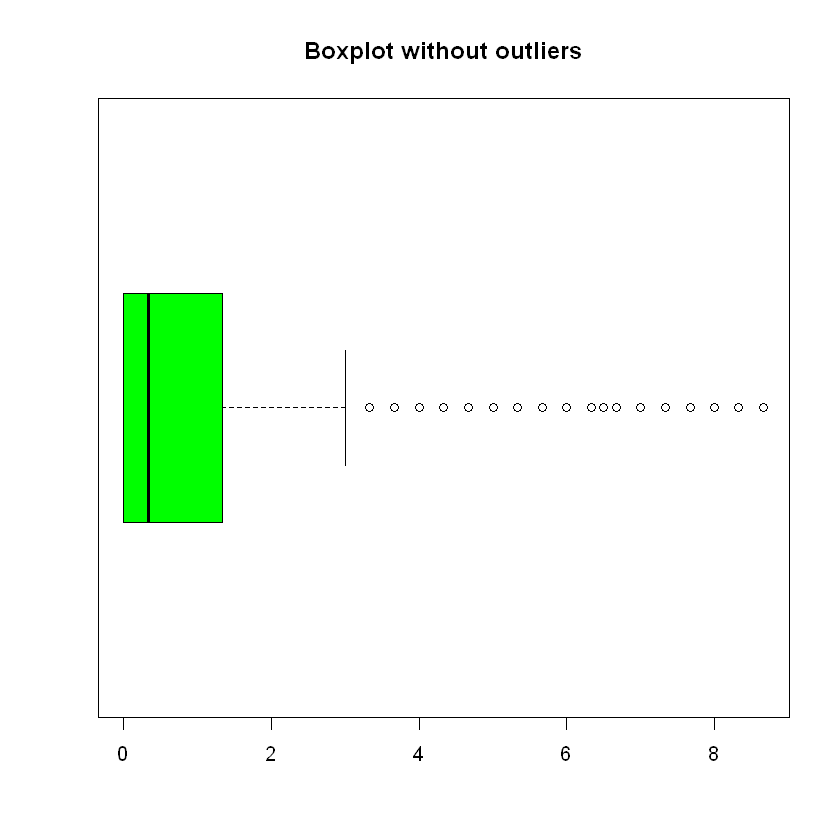


 Pre-treatment Outliers:
 56 59 57 59 53 59 55 59 52 56 52 58 52 54 52 56 54 57 53 50 50 52 54 56 54 50 54 52 54 54 50 56 50 50 50 52 56 52 54 56 54 50 52 52 54 54 56 52 56 50 49 51 49 55 51 51 55 51 53 49 53 53 49 53 51 55 55 51 49 55 51 53 49 55 51 49 51 51 51 53 53 54 54 52 48 48 48 48 50 48 52 48 48 50 48 52 48 52 54 48 50 48 50 48 54 48 50 52 50 52 50 52 50 54 50 52 54 48 50 50 48 54 50 52 52 48 52 54 48 48 52 50 50 50 54 50 52 52 48 48 50 47 47 47 53 53 51 53 49 49 47 49 51 51 51 49 53 49 53 53 47 47 49 53 47 49 51 53 47 53 49 47 47 53 53 51 53 49 47 51 51 53 47 47 51 49 51 51 51 49 53 49 53 51 53 47 53 49 47 53 49 47 49 53 47 53 53 47 47 51 47 47 51 51 49 47 49 47 53 49 47 49 53 53 51 51 53 47 51 53 47 46 53 51 53 46 52 46 50 46 48 50 52 50 46 52 52 46 46 48 48 50 50 48 50 46 52 48 52 48 52 50 46 52 48 52 52 52 46 50 50 50 46 46 46 46 48 48 52 46 48 52 45 48 45 51 49 47 45 49 49 45 47 47 49 49 47 45 49 47 49 45 51 49 49 47 51 51 45 45 45 49 49 51 47 45 45 49 51 45 51 49 45 47 4

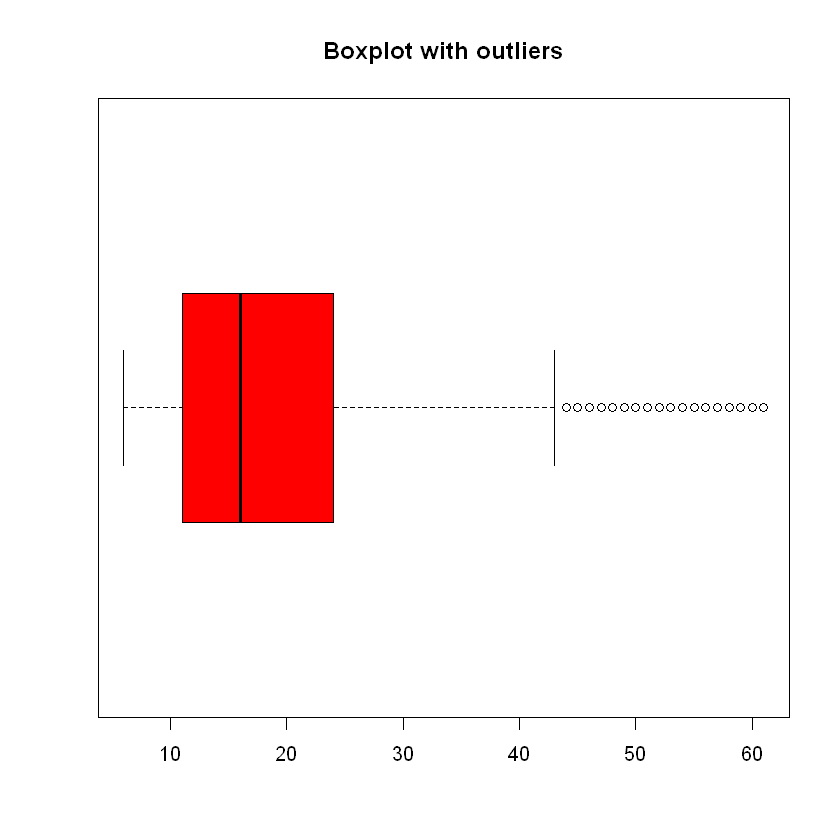


 Post-treatment Outliers:
 
 Mean with outliers:
 1.5296

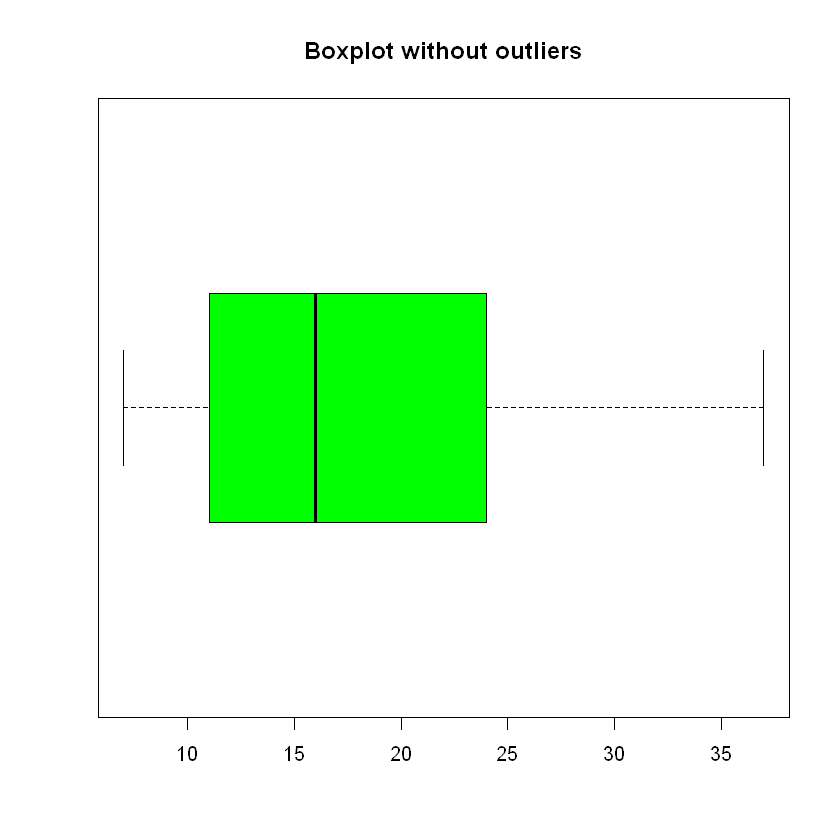


 Pre-treatment Outliers:
 5 4 5 4 4 4 4 5 5 5 6 4 4 4 5 7 4 4 4 6 5 5 5 5 6 4 4 6 4 4 4 4 4 4 5 4 4 5 4 4 4 4 4 5 7 4 4 4 4 4 4 5 4 4 4 5 4 4 5 4 6 4 5 4 5 5 7 4 4 4 5 4 5 5 4 4 5 4 4 4 4 4 5 5 5 4 4 6 4 5 4 4 6 5 4 5 4 4 4 4 6 4 5 4 6 4 6 4 4 4 4 5 4 4 4 4 4 7 5 4 6 5 5 5 12 4 5 5 4 6 4 4 4 4 5 4 4 5 4 6 4 4 6 4 4 4 4 5 4 4 4 4 5 5 4 4 4 4 5 4 4 4 4 4 4 6 4 4 4 4 4 4 4 5 5 4 4 4 5 5 4 4 4 5 6 4 4 4 6 5 4 4 4 8 4 4 4 4 5 4 4 4 5 5 4 4 4 4 5 4 4 5 4 4 5 4 4 4 4 4 4 7 5 5 5 4 4 4 5 4 5 4 4 4 5 4 4 5 4 4 4 4 4 5 4 4 5 7 5 4 5 4 5 4 4 5 7 4 6 4 4 4 4 4 4 4 5 4 4 4 5 5 4 4 4 4 4 4 4 5 4 4 5 7 5 4 6 4 5 4 4 4 7 4 4 4 5 4 5 4 4 5 4 4 4 6 5 6 4 6 4 4 4 5 4 4 5 5 4 4 4 4 4 5 4 4 5 9 4 4 4 5 5 4 4 5 4 4 4 4 4 5 5 5 5 4 6 4 8 5 4 5 4 6 4 4 4 4 4 4 5 4 4 4 4 4 5 5 4 4 4 4 5 4 4 4 4 4 4 5 5 4 4 4 4 5 5 5 4 4 4 6 4 4 5 4 4 4 5 4 6 5 4 4 5 4 4 4 5 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 6 5 6 4 4 5 4 4 4 4 5 4 5 4 4 4 5 4 4 4 4 5 4 4 4 4 5 5 4 4 8 4 4 4 5 4 4 5 5 4 4 4 4 4 4 4 5 5 4 5 5 4 7 4 6 4 4 5 5 4 

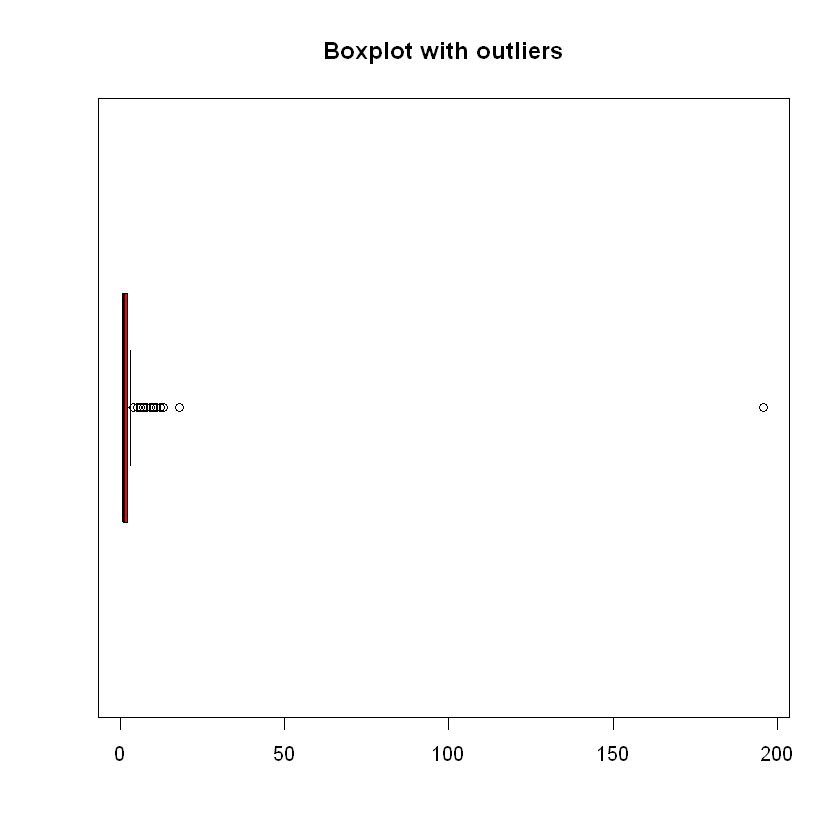


 Post-treatment Outliers:
 
 Mean with outliers:
 1.3517

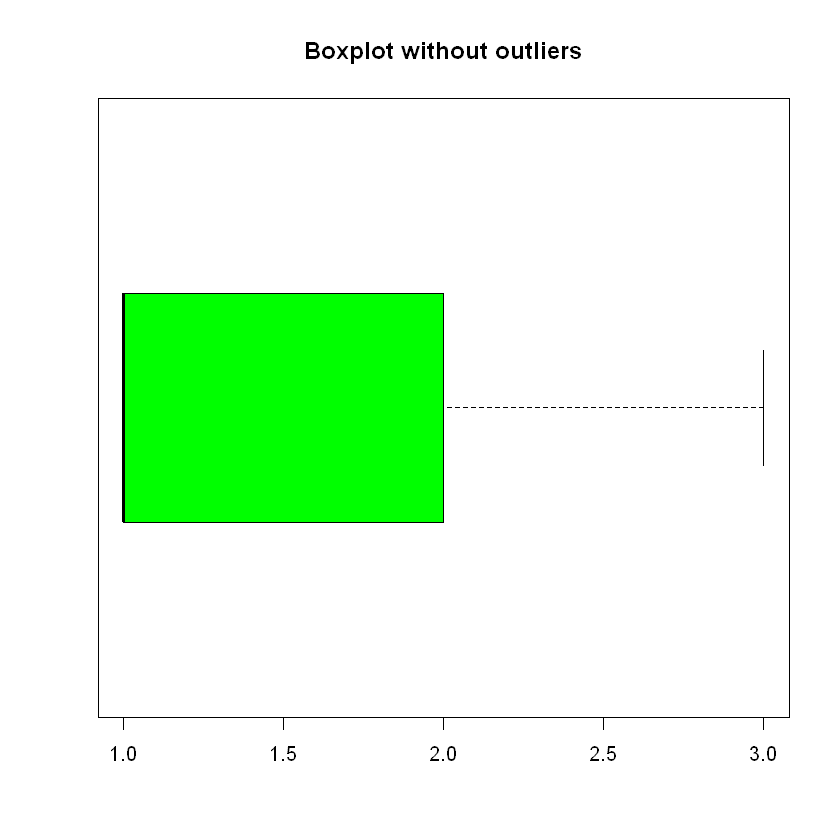


 Pre-treatment Outliers:
 4 5 4 4 4 5 5 5 4 5 5 4 4 4 5 4 4 4 4 4 4 5 4 4 4 5 4 4 4 4 4 4 4 5 5 4 4 5 4 4 5 4 5 4 4 6 4 5 4 4 5 4 5 4 5 5 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 5 4 4 4 5 5 4 4 4 4 4 5 4 4 6 5 5 4 4 4 4 4 5 5 5 4 5 4 4 4 4 5 4 4 4 4 5 4 4 4 4 4 5 5 4 4 4 5 5 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 5 4 4 4 5 4 4 4 4 4 4 4 4 6 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 11 4 4 4 5 4 5 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 5 6 8 5 5 4 4 4 5 4 4 4 4 4 4 4 5 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 4 5 4 5 4 4 4 4 4 5 4 4 4 4 4 4 5 4 4 5 4 4 4 4 4 5 4 4 4 4 5 4 4 4 5 4 4 4 4 4 4 5 4 5 5 4 4 4 5 4 4 4 5 4 4 4 4 4 4 4 4 4 5 5 5 4 4 4 4 4 5 4 4 4 4 5 4 5 4 4 5 4 4 5 4 5 4 6 4 4 4 4 4 4 4 5 4 4 5 4 4 4 4 4 4 4 4 4 4 4 5 4 5 4 5 4 6 5 4 5 5 4 5 4 4 4 5 4 5 5 4 4 4 5 5 4 4 4 4 5 4 4 4 4 4 5 4 5 4 4 4 4 4 4 5 4 4 4 5 4 4 5 4 4 5 4 4 5 4 5 5 4 4 4 4 4 6 4 4 5 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 5 4 4 4 5 4 4 5 4 4 4 4 4 4 5 4 4 4 4 4 6 4 7 4 4 4 5 5 4 4 5 4 4 4 4 4 5 

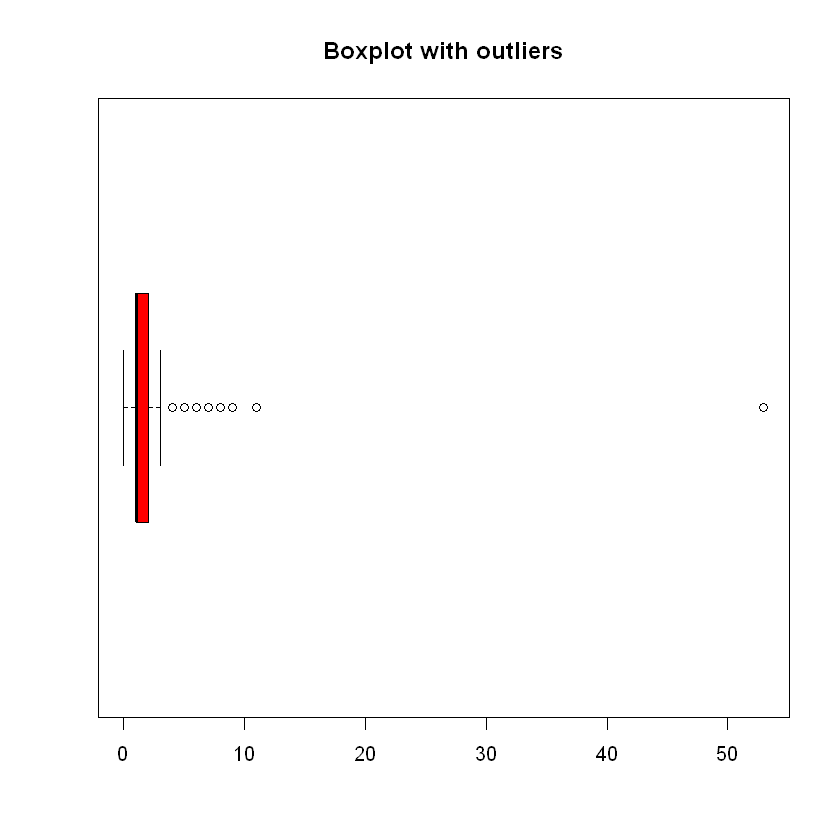


 Post-treatment Outliers:
 
 Mean with outliers:
 1.8086

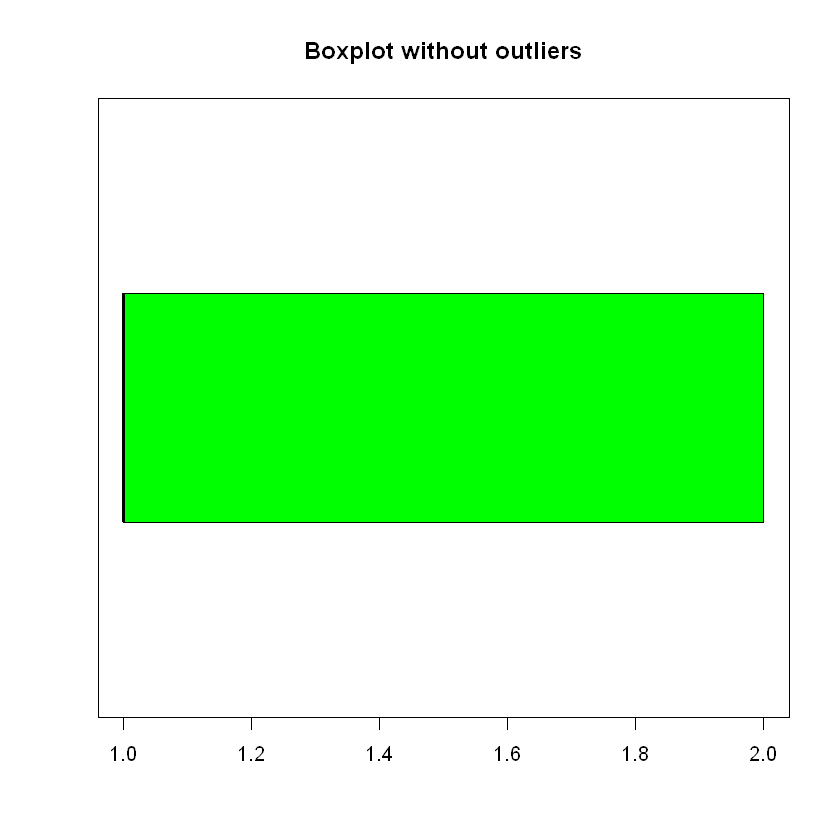


 Pre-treatment Outliers:
 7 9 10 5 6 4 4 4 4 4 10 4 4 7 7 7 7 13 8 5 5 4 5 9 11 4 15 5 6 4 7 8 11 4 5 6 6 4 6 7 4 5 8 8 7 5 5 5 6 10 6 14 5 4 7 6 5 9 8 5 5 7 4 6 5 12 4 4 6 8 4 13 8 8 5 5 6 8 16 6 7 4 6 4 4 4 4 4 4 8 6 10 6 4 4 4 9 4 18 6 6 5 4 8 8 4 6 13 4 4 8 8 4 11 6 7 9 5 13 4 5 4 7 5 5 11 4 5 7 9 9 9 6 5 9 10 4 4 9 11 5 5 5 4 6 9 5 7 7 7 4 22 6 13 11 4 5 16 6 4 7 7 9 5 4 5 4 8 6 7 10 7 4 4 4 9 5 4 9 4 6 4 7 4 4 6 5 8 5 6 5 7 9 5 5 5 7 8 5 10 4 5 4 5 5 5 8 4 7 6 7 4 9 5 5 6 4 5 6 10 7 4 4 5 7 5 4 5 4 4 5 4 4 5 4 8 9 5 4 4 8 4 4 6 5 4 7 6 6 8 4 9 4 4 4 4 4 8 4 4 5 6 6 5 4 5 4 9 5 4 5 7 4 9 5 5 5 6 7 4 5 6 7 12 11 6 6 6 8 4 8 7 4 11 4 4 7 4 7 7 5 6 8 5 7 5 4 5 4 5 5 6 4 7 4 5 5 5 4 4 4 4 4 4 4 4 6 4 4 5 5 5 4 4 8 5 9 4 9 5 5 5 4 10 4 8 4 5 5 4 4 4 5 5 6 4 6 6 4 6 6 9 7 5 6 9 8 8 5 4 4 4 7 24 4 4 7 7 4 5 6 5 9 4 5 4 5 4 5 7 7 13 5 6 4 4 9 5 4 5 4 7 8 6 6 7 6 4 4 16 5 4 4 7 5 5 5 4 4 7 6 4 6 12 6 4 8 4 5 4 4 5 6 4 5 4 4 4 7 5 4 4 10 5 5 11 6 4 7 5 4 7 5 7 4 4 5 4 7 6 4 4 10 5 4 4 4 6 

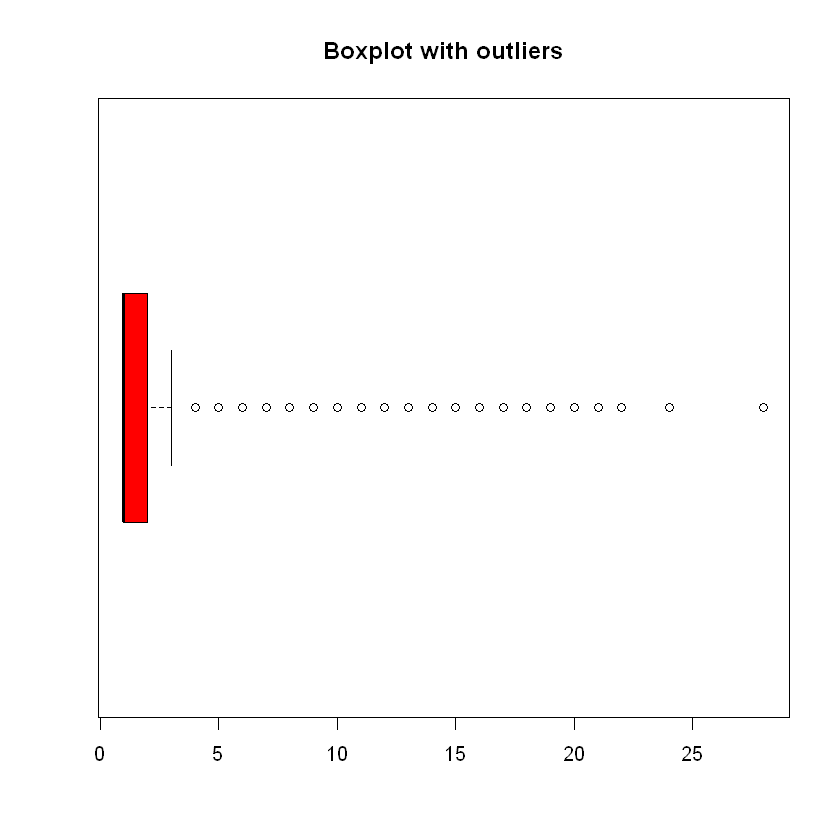


 Post-treatment Outliers:
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 

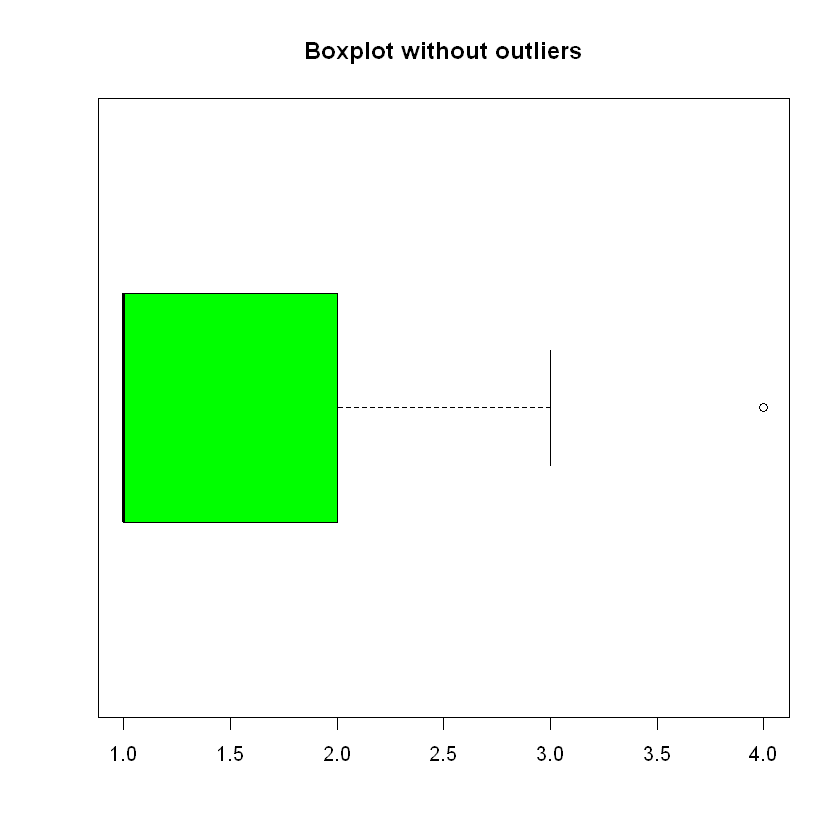


 Pre-treatment Outliers:
 6 4 6 4 5 4 7 4 4 5 4 6 6 4 5 4 4 4 6 4 6 5 4 7 4 6 4 4 5 4 4 5 5 7 6 4 5 5 9 4 4 5 5 4 6 4 5 4 4 5 4 7 4 5 6 4 8 5 5 4 5 8 6 4 4 4 4 4 4 4 5 4 4 4 7 4 10 5 5 4 4 5 5 4 5 7 7 4 5 5 5 6 4 5 4 5 4 5 7 4 4 4 6 6 4 6 6 4 4 4 5 4 4 7 4 5 4 5 4 9 4 5 4 4 9 4 6 5 5 4 4 4 4 6 5 6 5 4 6 5 4 5 6 4 5 6 4 6 6 4 8 6 4 4 4 4 5 6 6 5 8 4 4 5 5 7 5 4 4 4 4 4 4 4 4 7 4 4 6 4 5 5 4 4 5 4 4 4 4 4 4 4 4 4 8 5 4 4 4 5 4 4 5 6 4 4 7 8 5 4 4 4 6 6 4 4 5 6 4 5 6 5 4 4 4 5 5 4 5 4 4 4 4 4 4 4 6 4 7 6 4 6 6 4 4 4 4 4 4 4 4 5 5 8 4 4 4 6 5 4 4 4 15 4 5 6 5 4 7 4 4 4 6 4 5 4 6 4 4 4 7 5 5 4 10 4 5 5 5 4 7 4 6 4 4 4 4 5 4 4 4 4 4 7 5 5 4 4 5 6 4 4 5 4 4 4 4 4 5 5 4 4 6 4 4 6 4 7 6 5 4 4 4 4 4 4 6 4 4 4 6 4 4 6 4 6 5 4 4 9 6 4 4 4 4 4 7 4 5 4 4 4 4 5 4 5 6 4 6 4 4 4 5 4 7 5 4 4 5 5 4 4 4 4 8 4 4 4 5 4 4 4 4 4 4 5 4 5 5 4 5 5 6 4 5 5 4 4 5 4 4 4 4 4 5 4 4 5 4 7 6 4 7 4 4 4 4 5 4 6 4 4 5 4 6 4 4 5 4 5 4 5 5 5 5 4 5 4 4 4 4 4 4 6 4 4 4 4 5 4 5 4 4 4 5 5 5 5 5 4 4 5 4 4 4 4 4 5 4 5 4 4 4 4 5 

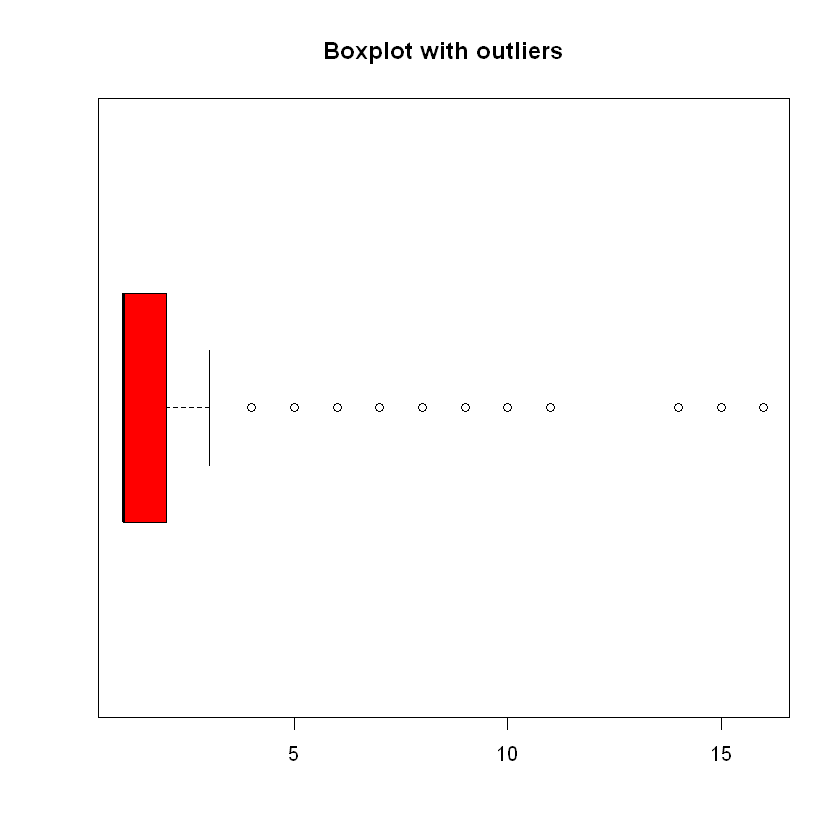


 Post-treatment Outliers:
 
 Mean with outliers:
 380.2656

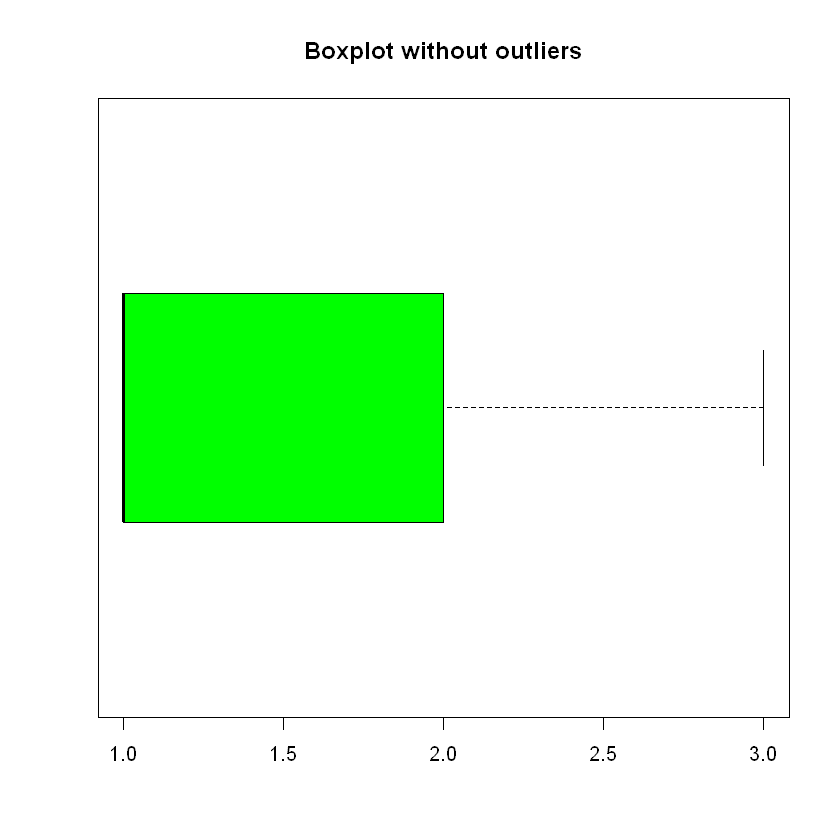


 Pre-treatment Outliers:
 1395 1536 1695 1583 1116 1515 1565 1497 1538 1583 1638 1517 1554 1145 1593 1133 1485 1589 1479 1524 1582 1578 1408 1468 1253 1554 1383 1383 1477 1369 1367 1140 1422 1419 1456 1346 1344 1037 1342 1441 1397 1434 1175 1432 1414 1384 1030 1380 1313 1196 1310 1417 1306 1368 1411 1365 1364 1471 1031 1300 1300 1299 1297 1404 1295 1402 1155 1355 1293 1355 1291 1456 1285 1342 1342 1338 1167 1443 1272 1436 1435 1175 1262 1367 1364 1423 1253 1250 1308 1309 1050 1347 1410 1240 1408 986 1232 1229 998 1227 1226 1277 1214 1211 1187 1203 1202 1196 1363 1363 1361 1287 1240 1286 1174 1174 1172 1298 1340 1232 1338 1167 1275 1166 1270 1224 1161 1267 1158 1092 1083 1155 1215 1152 1259 1151 1104 1257 1250 1141 1248 1146 1195 1301 1027 1129 1295 1233 1124 1122 1121 1289 1287 1116 1218 1171 1109 1106 1167 1212 1103 1101 1270 1209 1099 1160 1098 1097 1092 1154 1198 1196 1036 1254 1254 1085 1144 1144 1143 1143 1143 1081 1143 1081 1081 1080 1015 1127 1141 1141 1140 1140 1078 1077 1139 

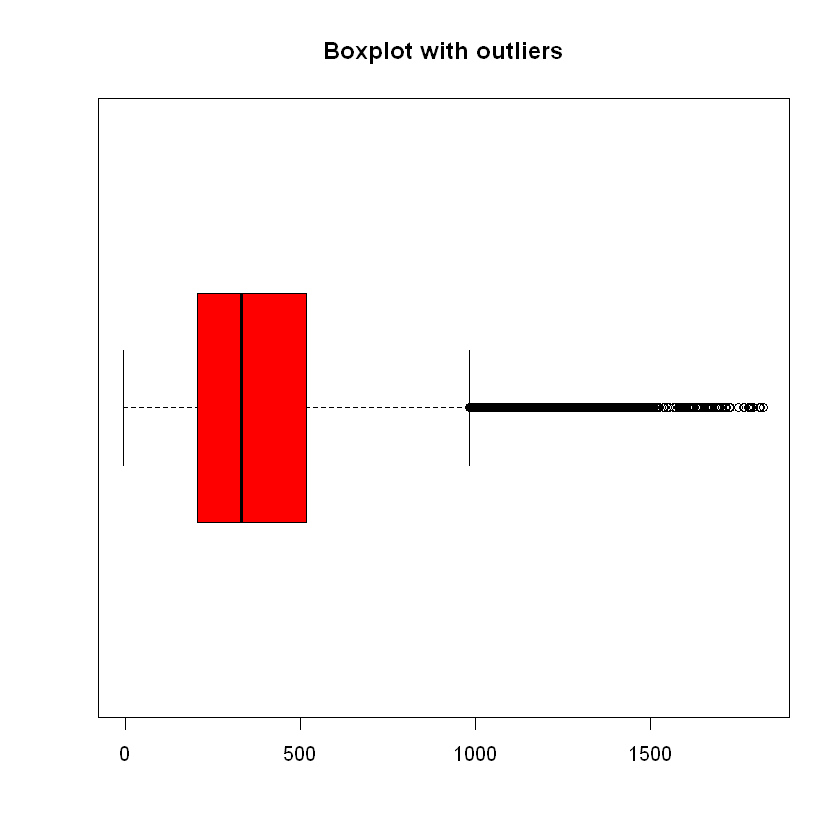


 Post-treatment Outliers:
 
 Mean with outliers:
 31.3751

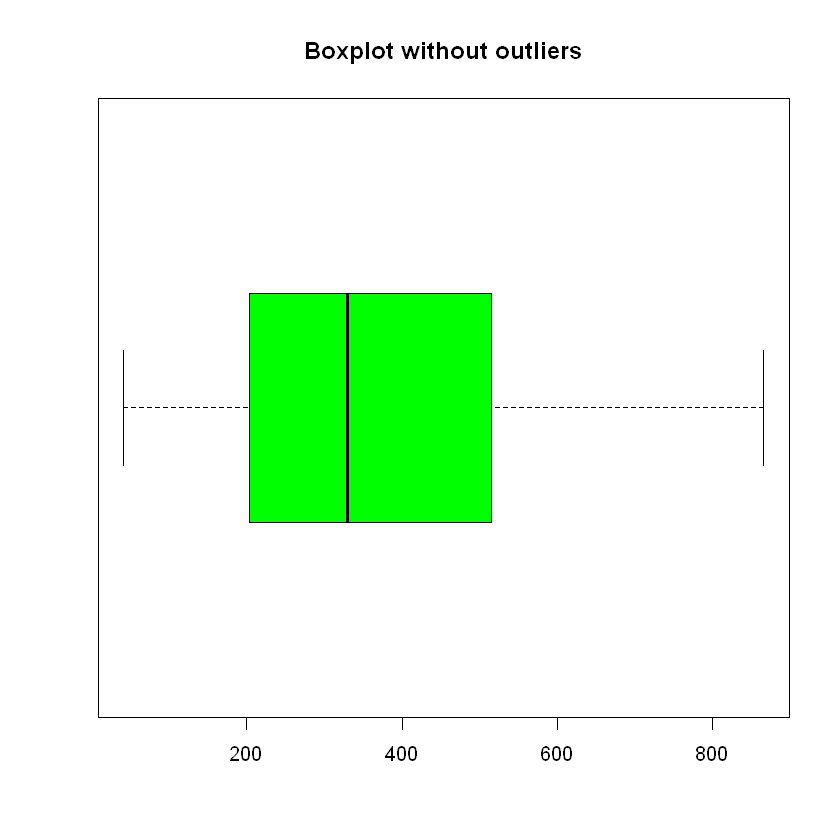


 Pre-treatment Outliers:
 
 Mean without outliers:
 31.0009

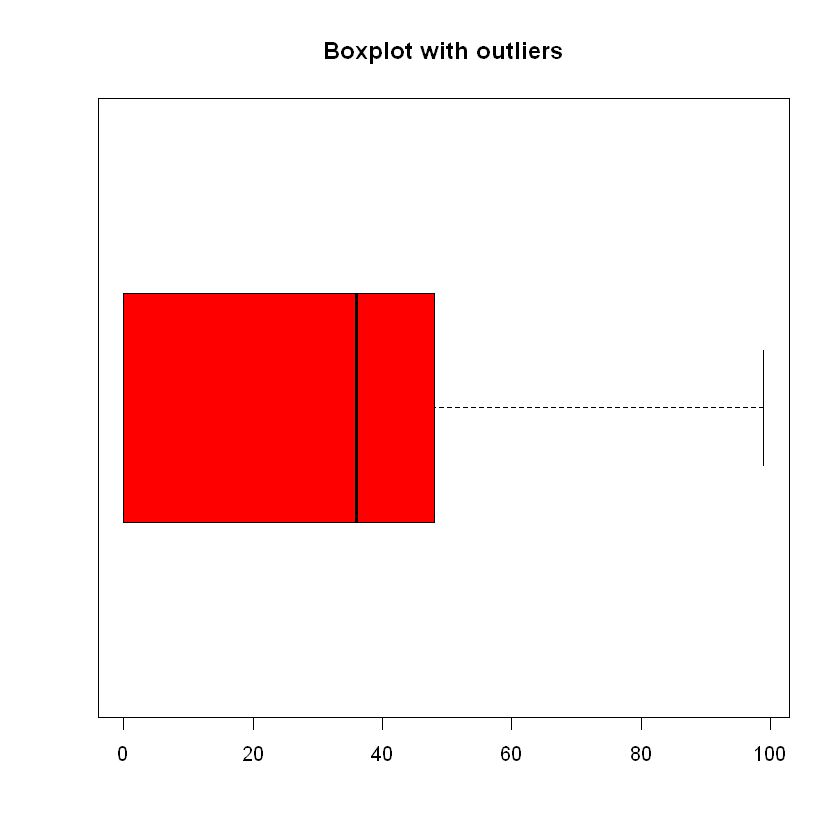


 Post-treatment Outliers:
 
 Mean with outliers:
 21.1577

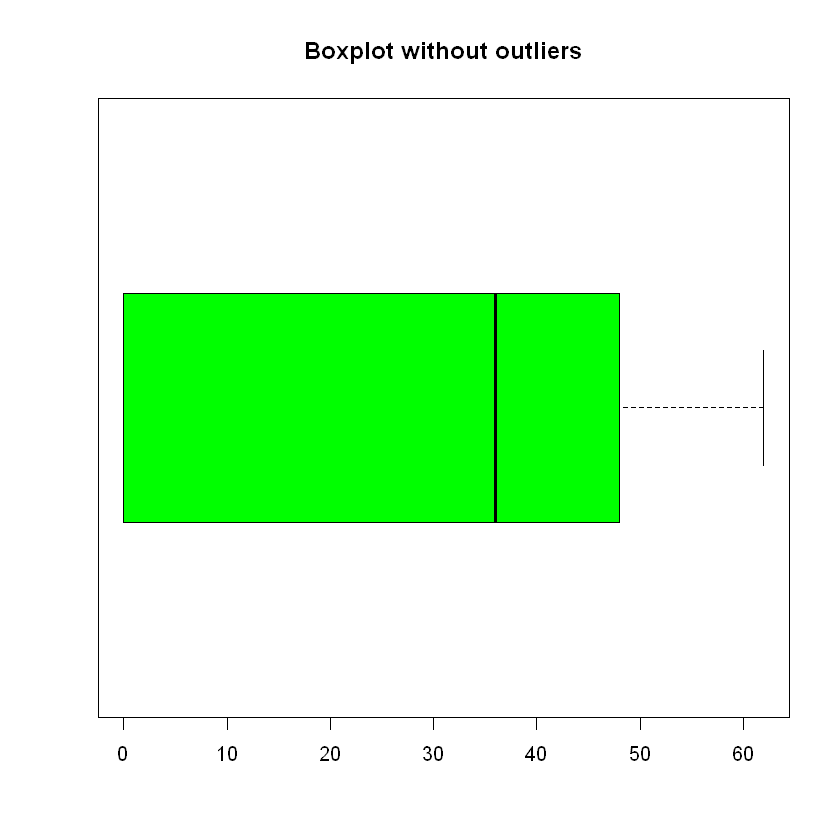


 Pre-treatment Outliers:
 
 Mean without outliers:
 20.6642

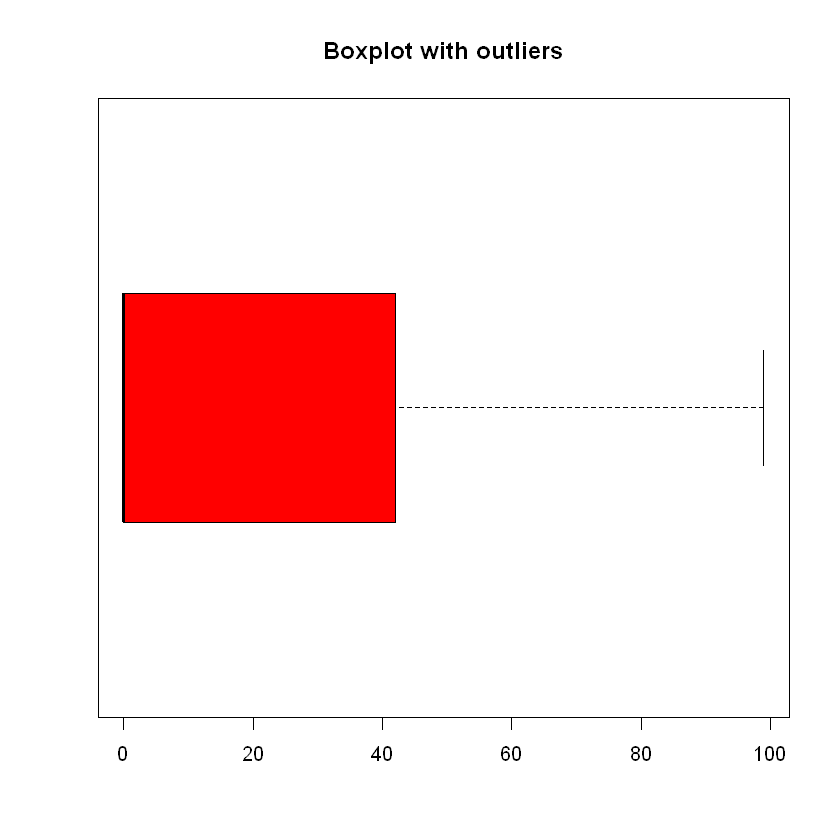


 Post-treatment Outliers:
 
 Mean with outliers:
 0.2424

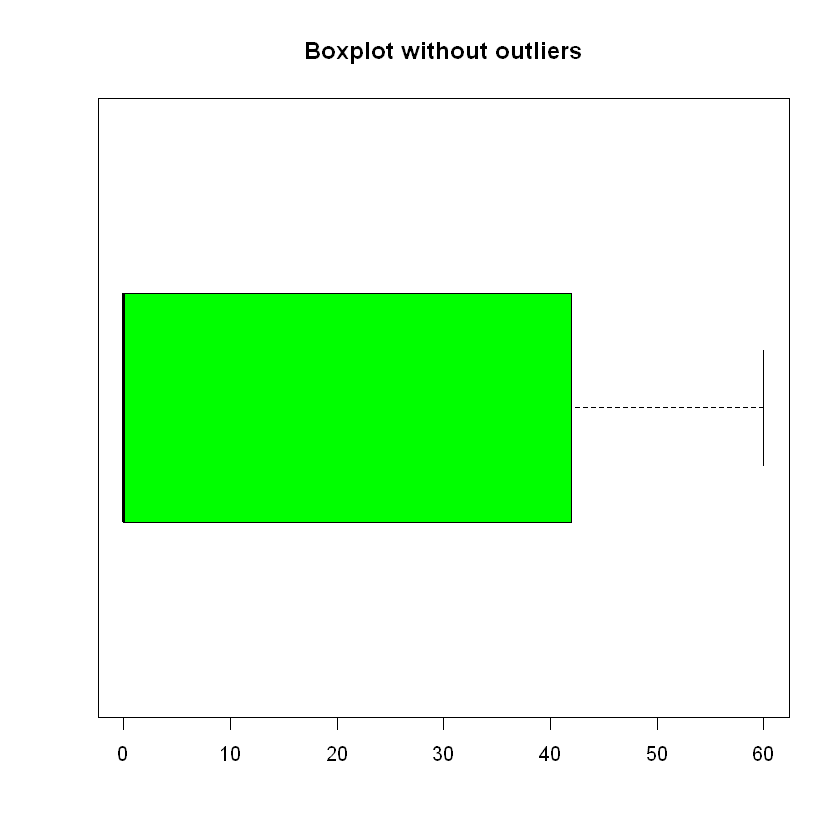


 Pre-treatment Outliers:
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

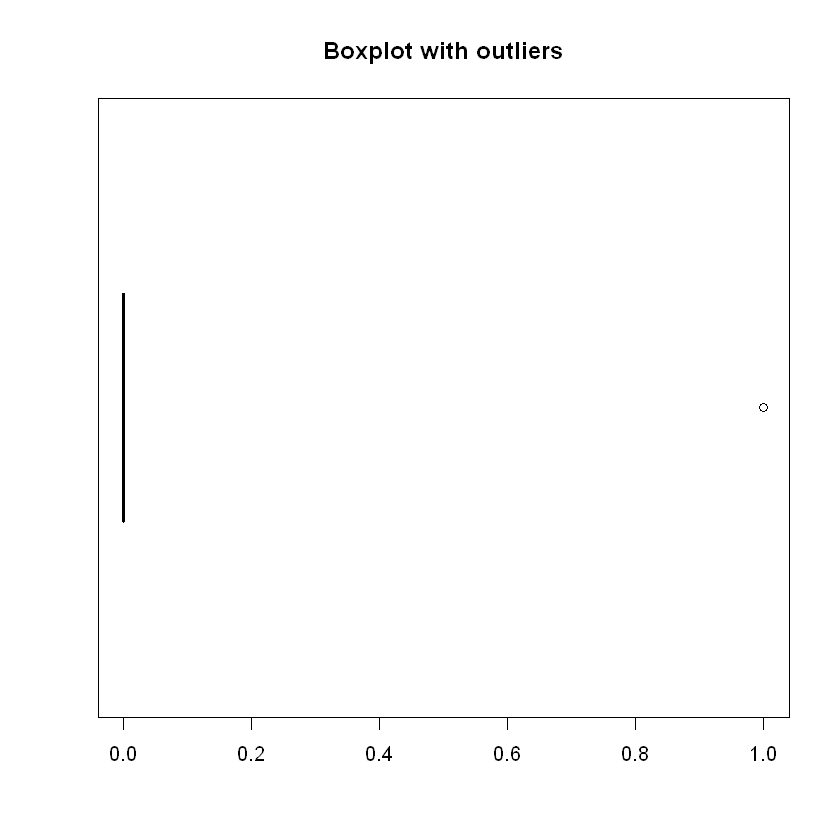


 Post-treatment Outliers:
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

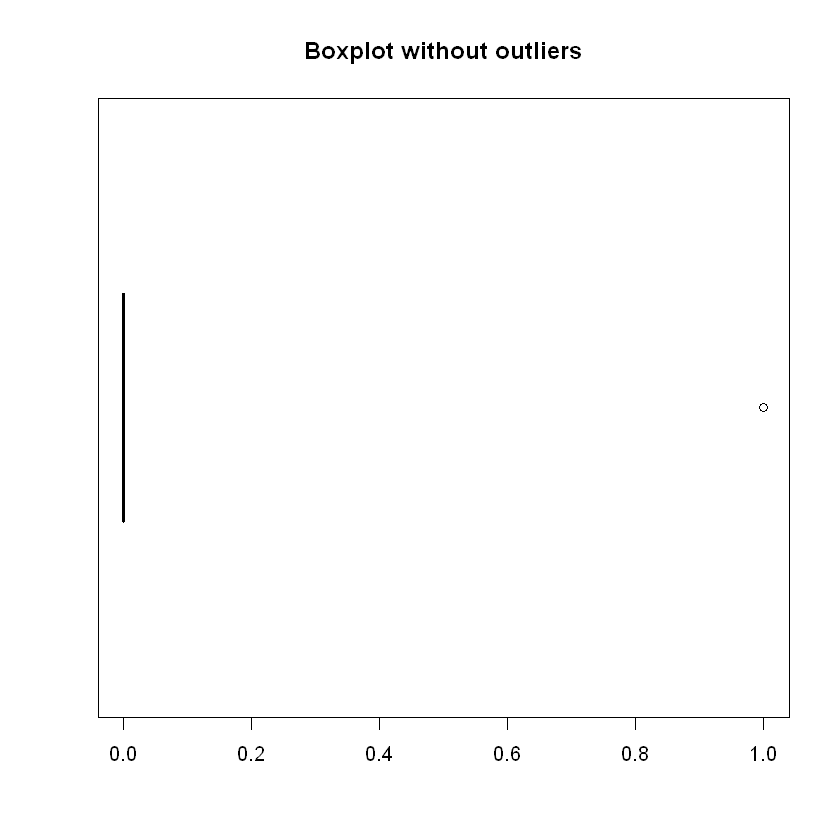


 Pre-treatment Outliers:
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

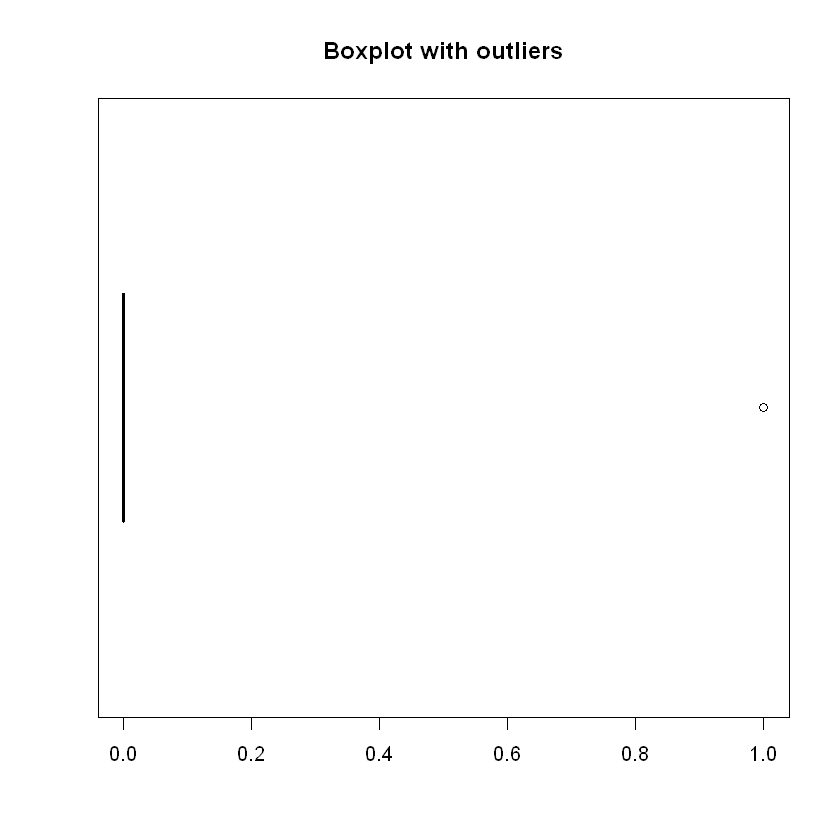


 Post-treatment Outliers:
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

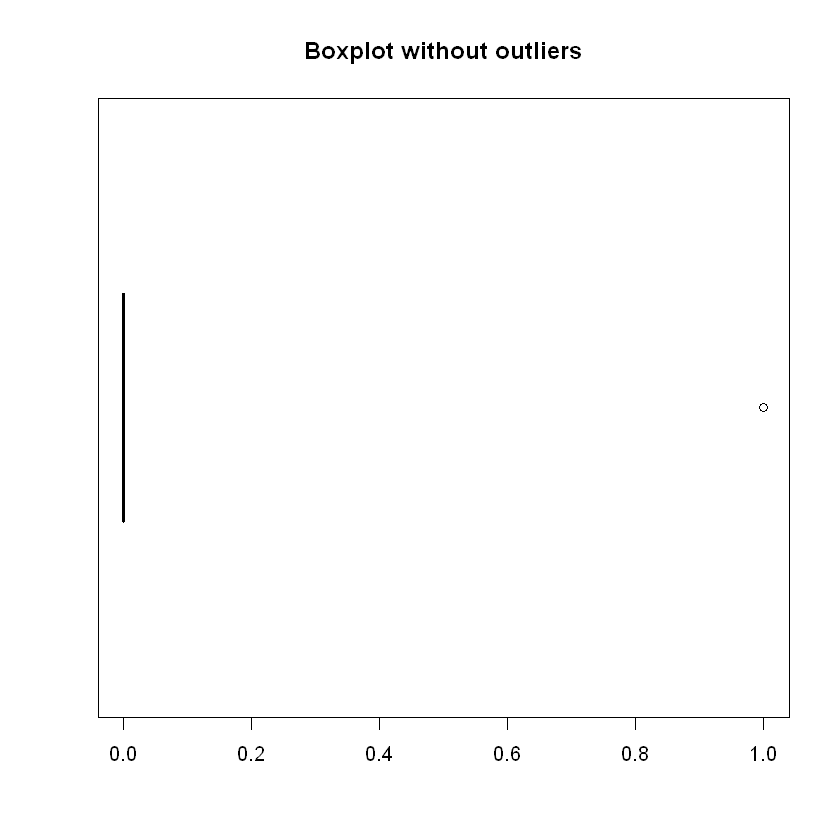


 Pre-treatment Outliers:
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

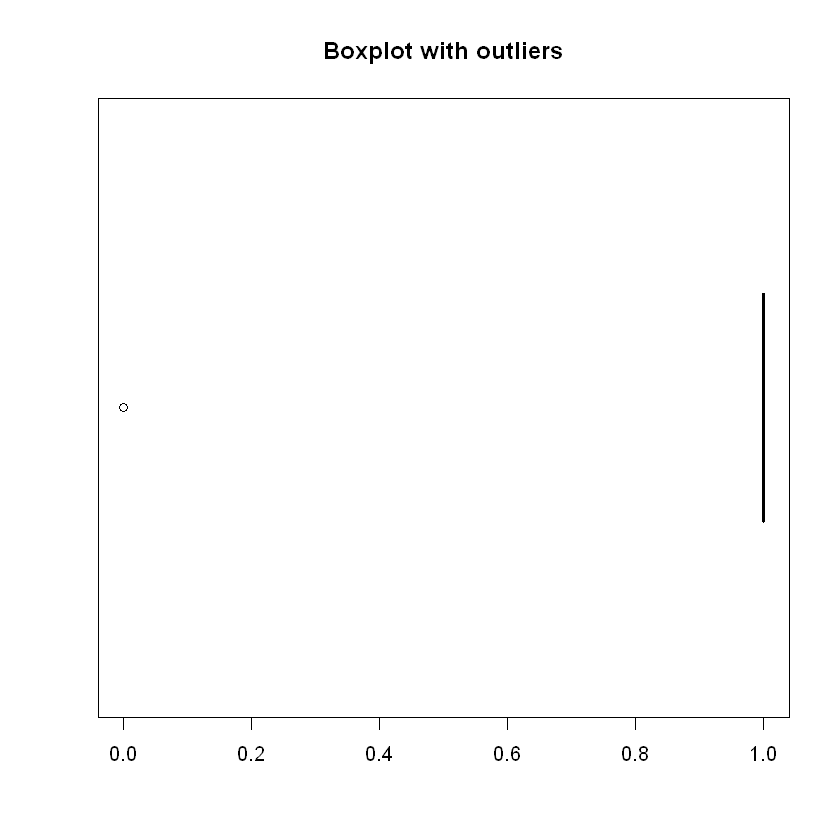


 Post-treatment Outliers:
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

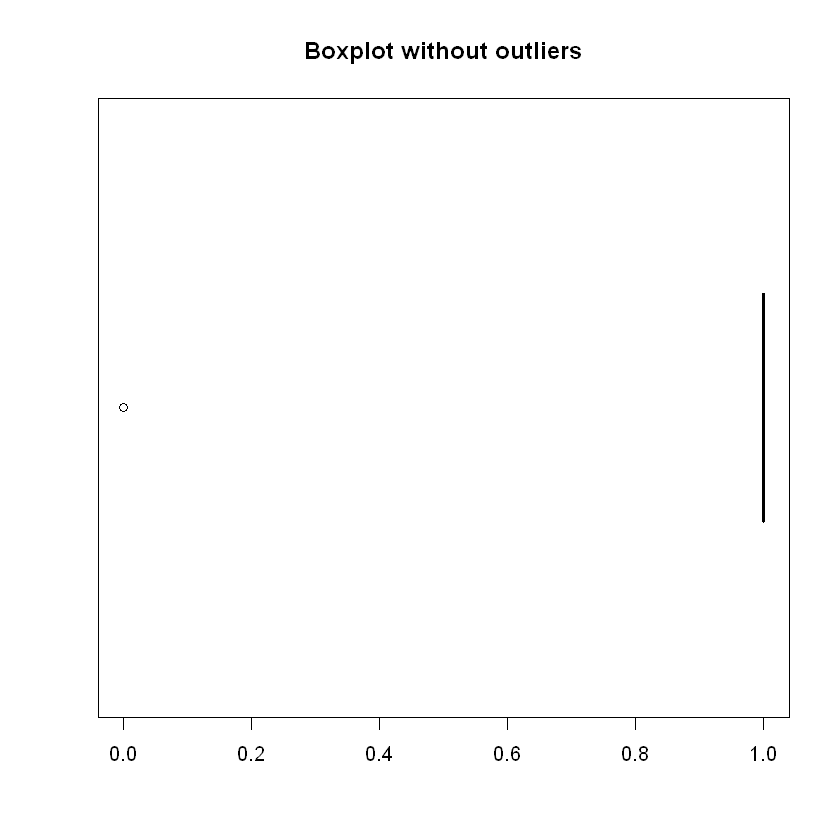


 Pre-treatment Outliers:
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

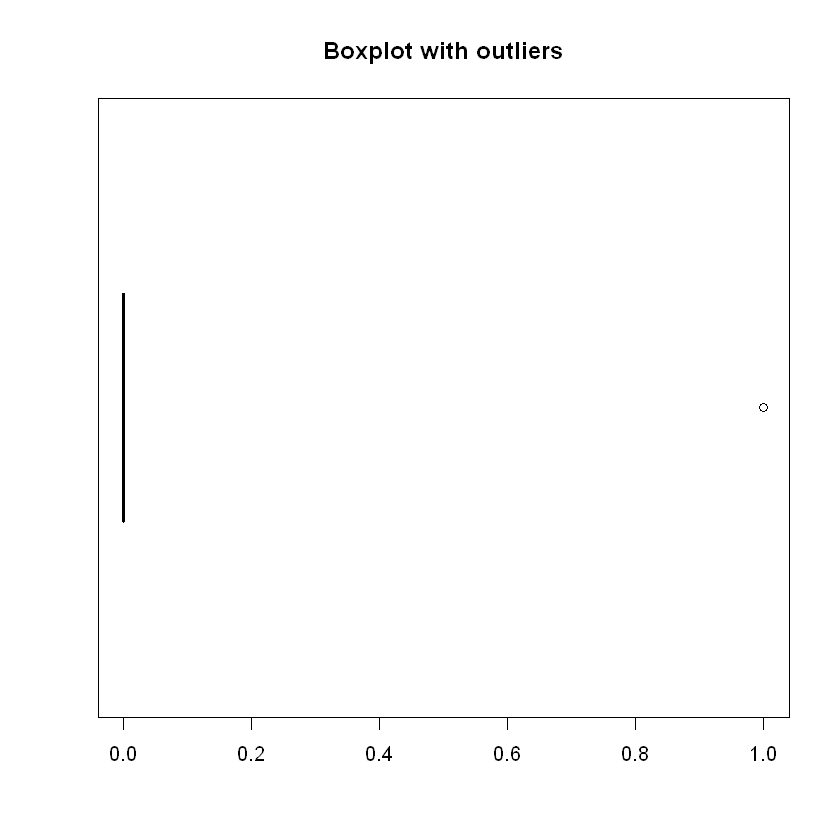


 Post-treatment Outliers:
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

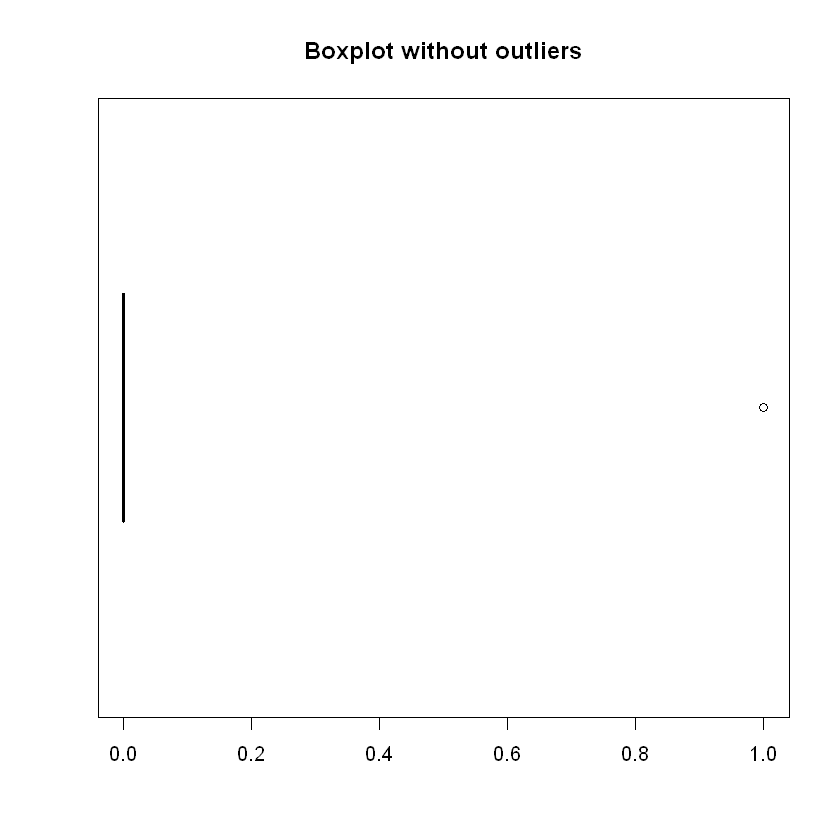


 Pre-treatment Outliers:
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

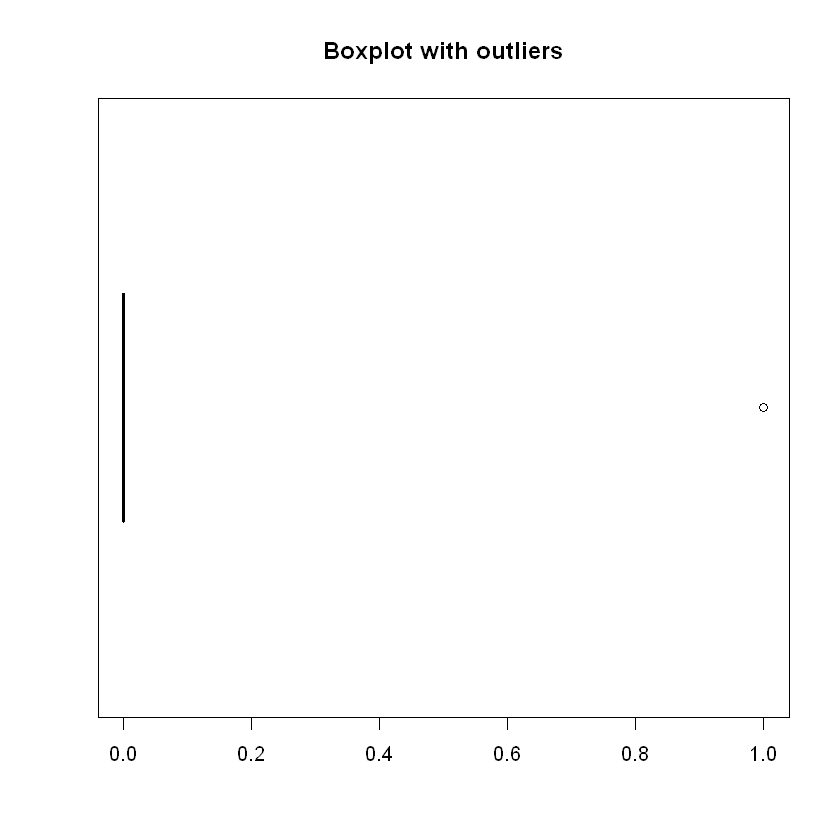


 Post-treatment Outliers:
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

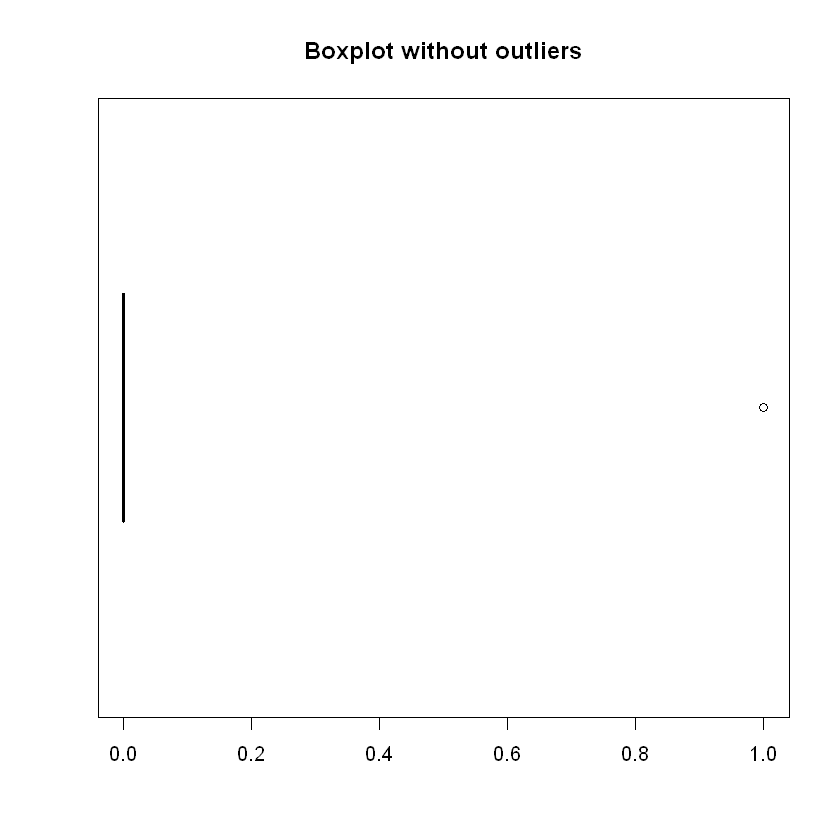


 Pre-treatment Outliers:
 
 Mean without outliers:
 0.3319

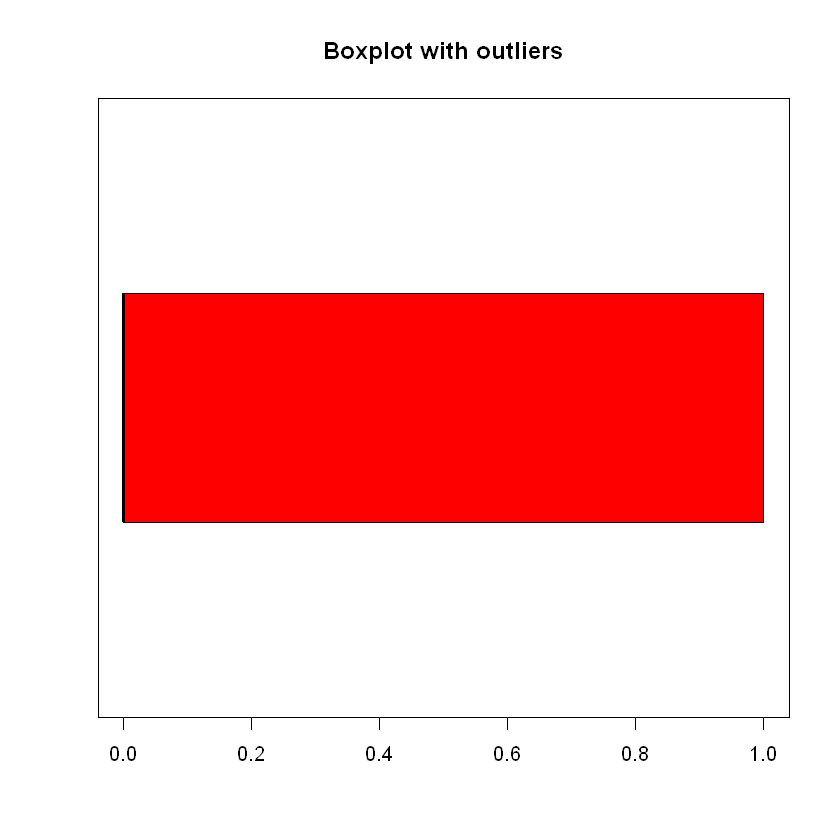


 Post-treatment Outliers:
 
 Mean with outliers:
 0.0575

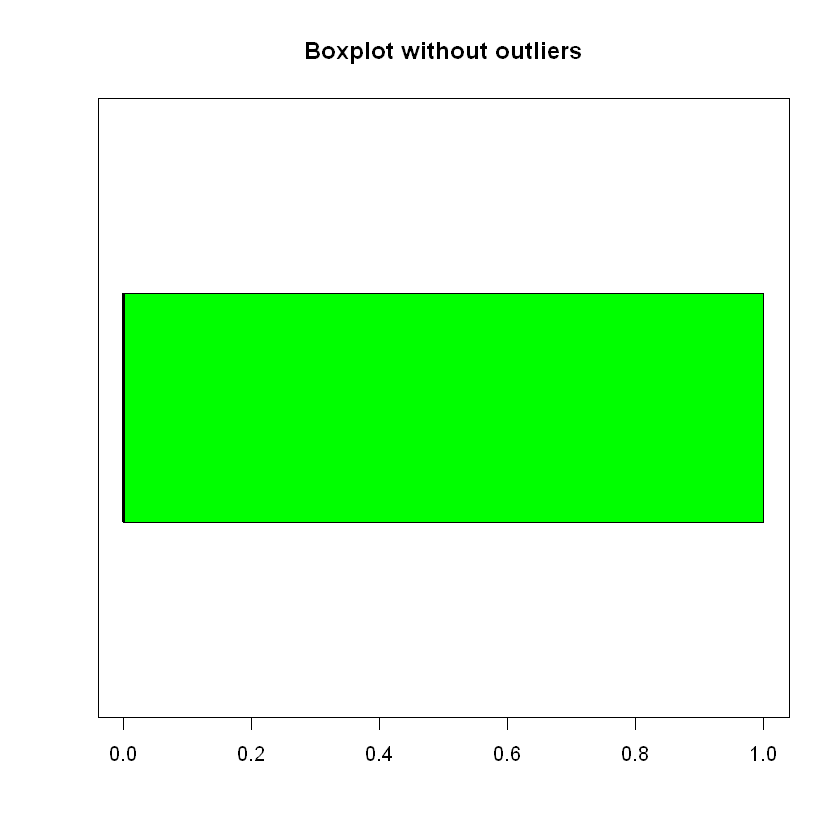


 Pre-treatment Outliers:
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

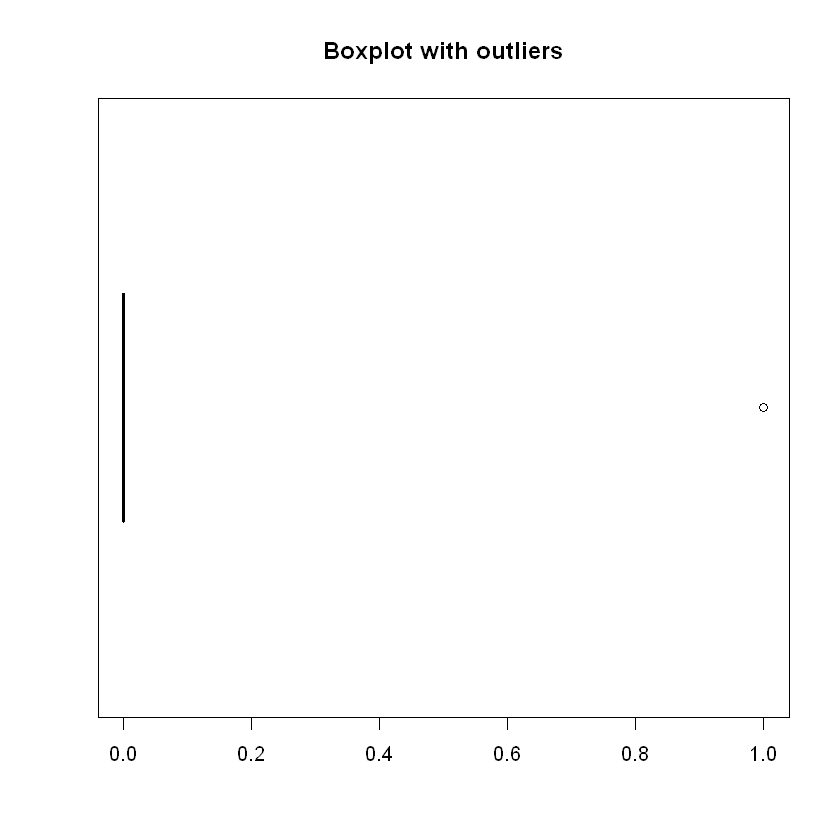


 Post-treatment Outliers:
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

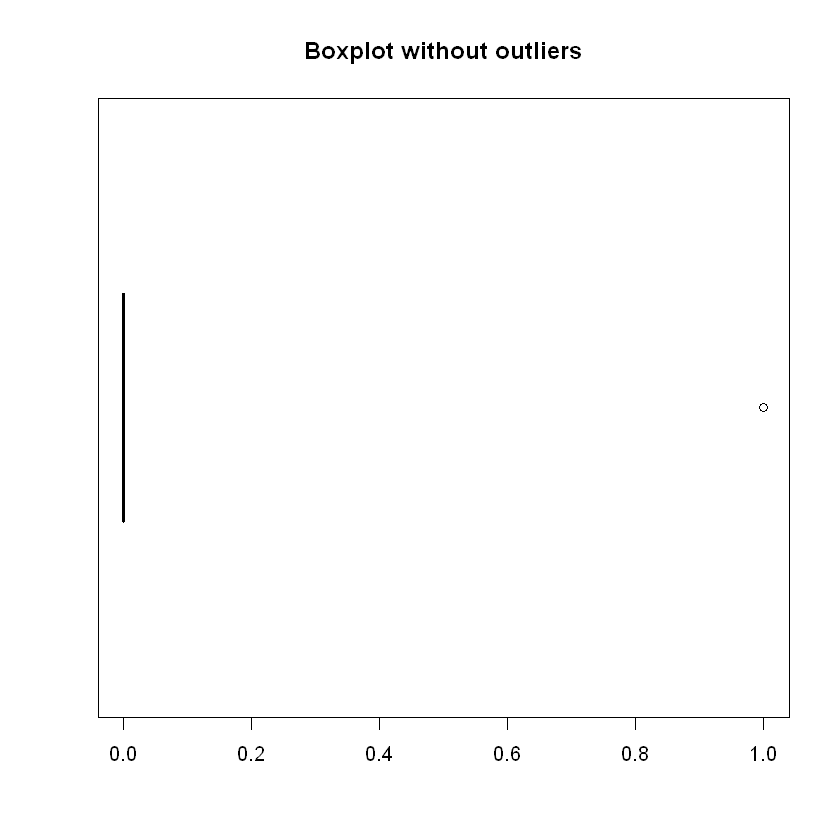


 Pre-treatment Outliers:
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

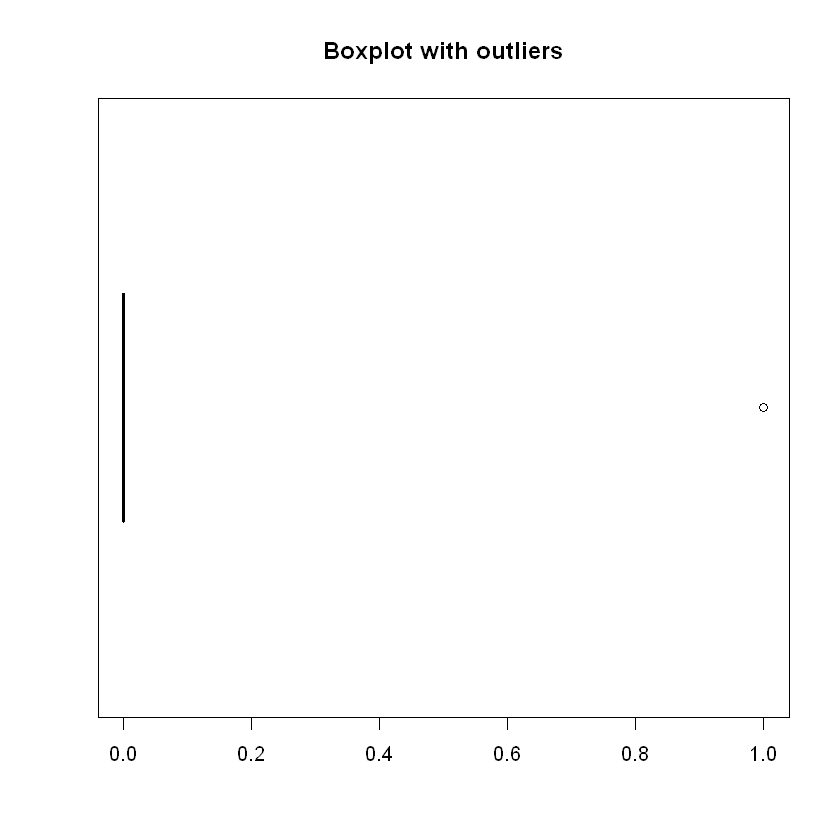


 Post-treatment Outliers:
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

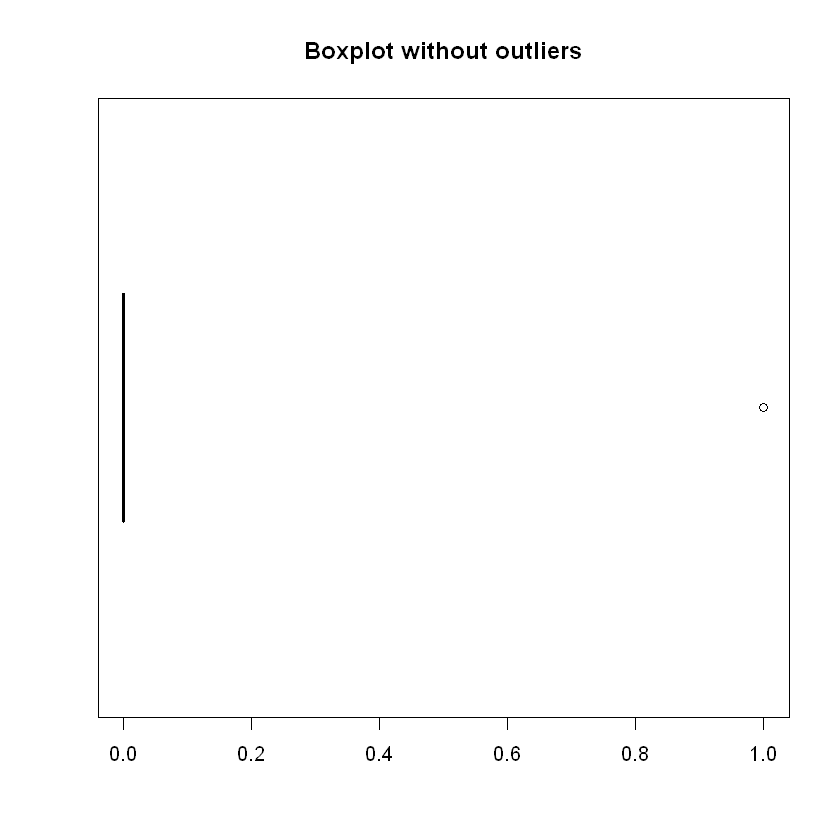


 Pre-treatment Outliers:
 
 Mean without outliers:
 0.6764

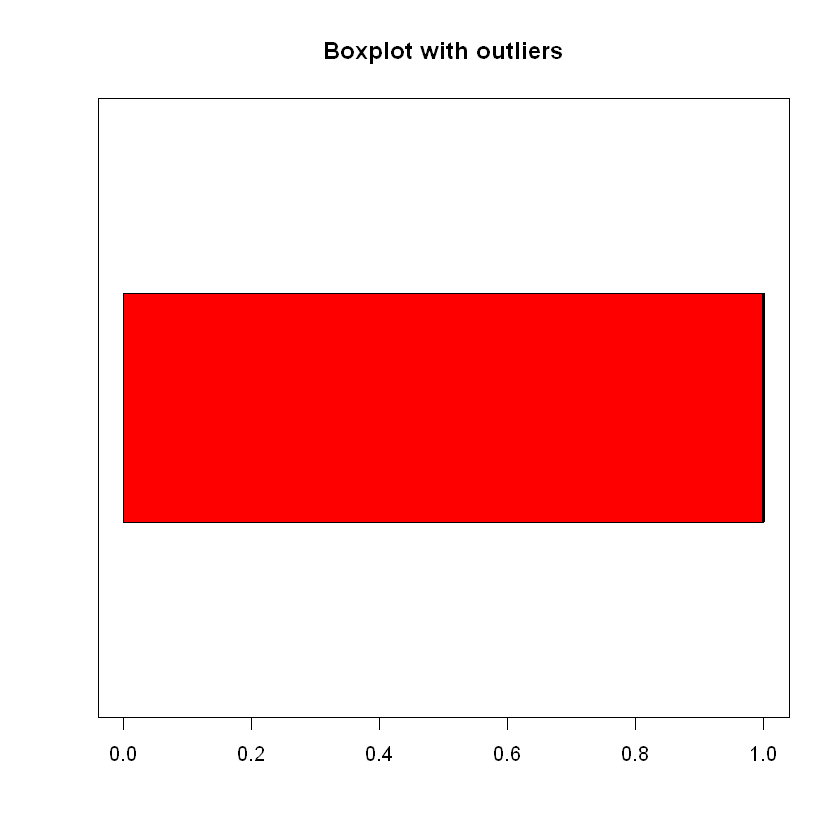


 Post-treatment Outliers:
 
 Mean with outliers:
 0.0509

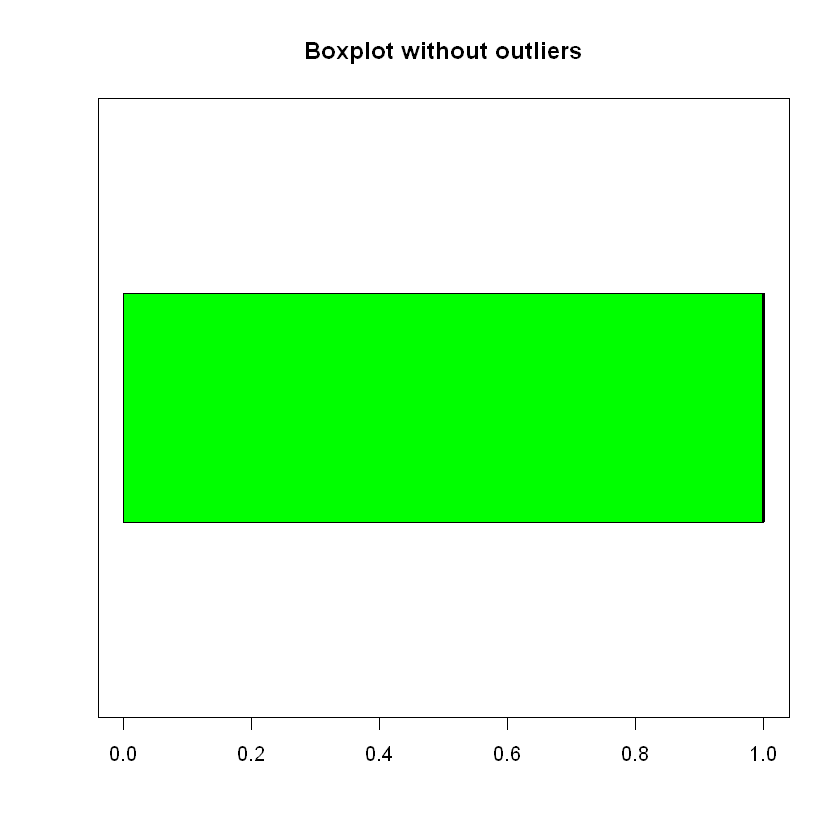


 Pre-treatment Outliers:
 1 1 1 1 1 1 1 1 2 1 3 1 2 1 1 1 2 1 1 1 3 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 2 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 7 2 1 1 5 1 1 1 2 1 3 1 1 3 1 2 1 1 1 1 1 1 1 1 1 1 1 3 4 1 1 1 1 1 1 1 1 1 1 2 1 1 6 1 1 1 1 1 1 1 1 1 1 16 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 4 1 1 1 3 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 4 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 4 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 

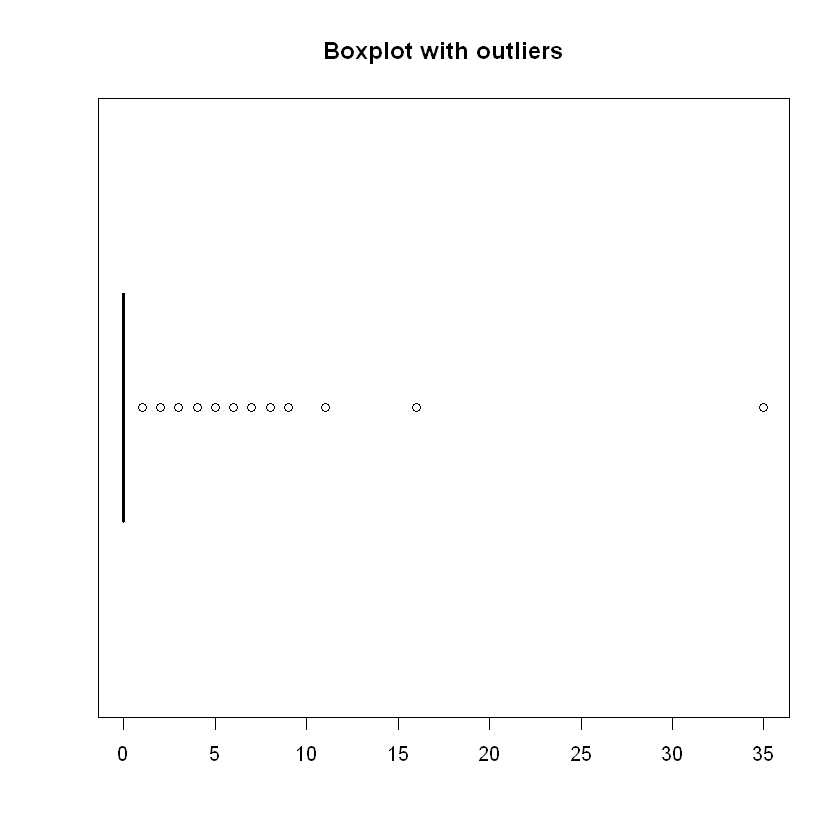


 Post-treatment Outliers:
 
 Mean with outliers:
 0.2498

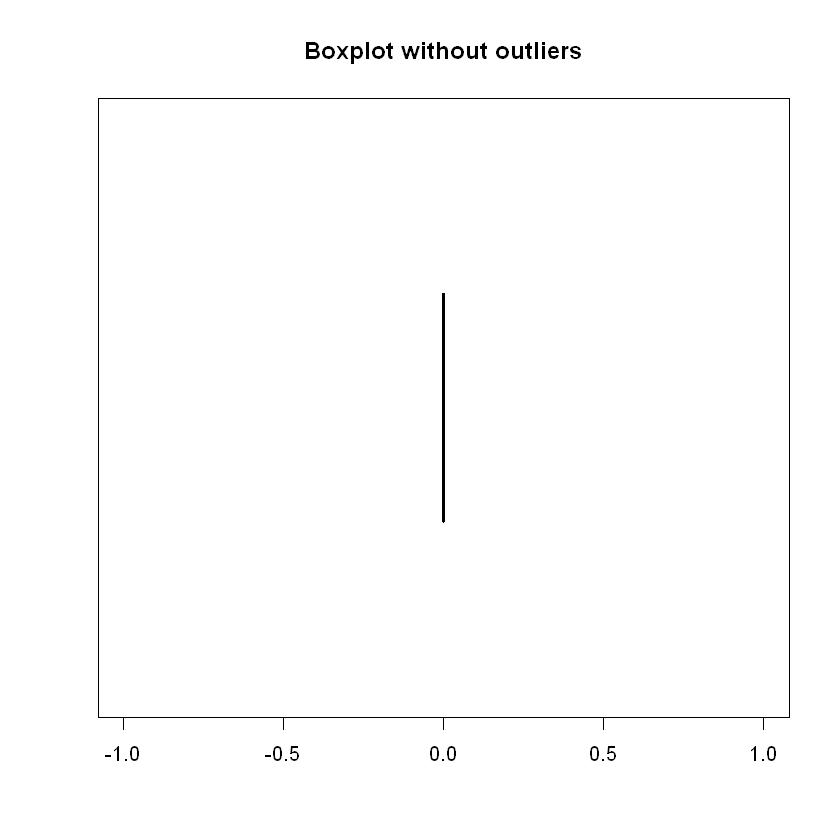


 Pre-treatment Outliers:
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

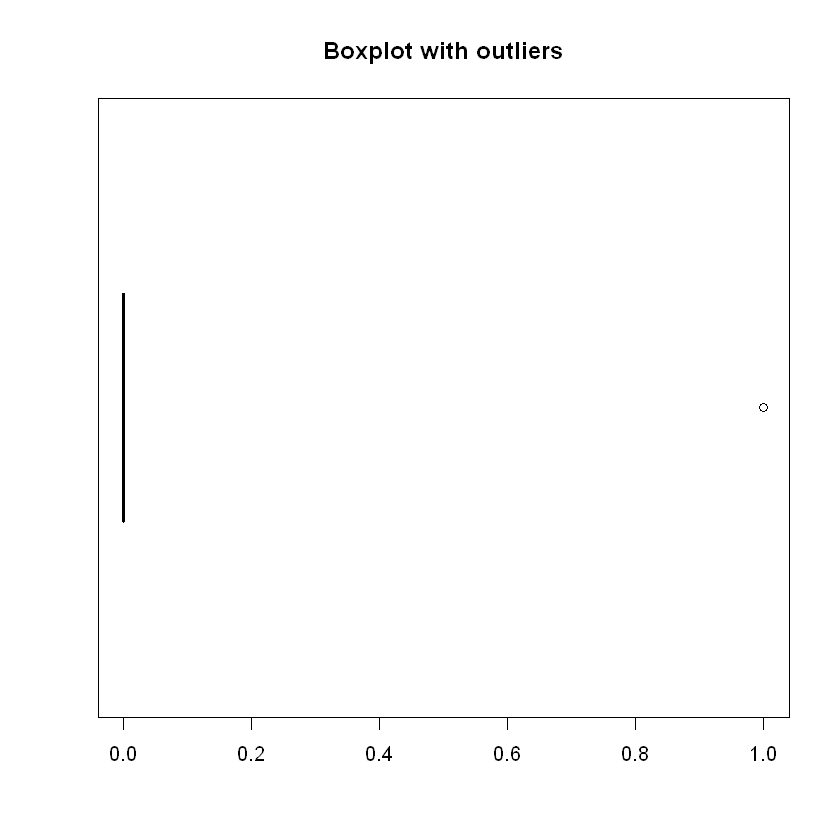


 Post-treatment Outliers:
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

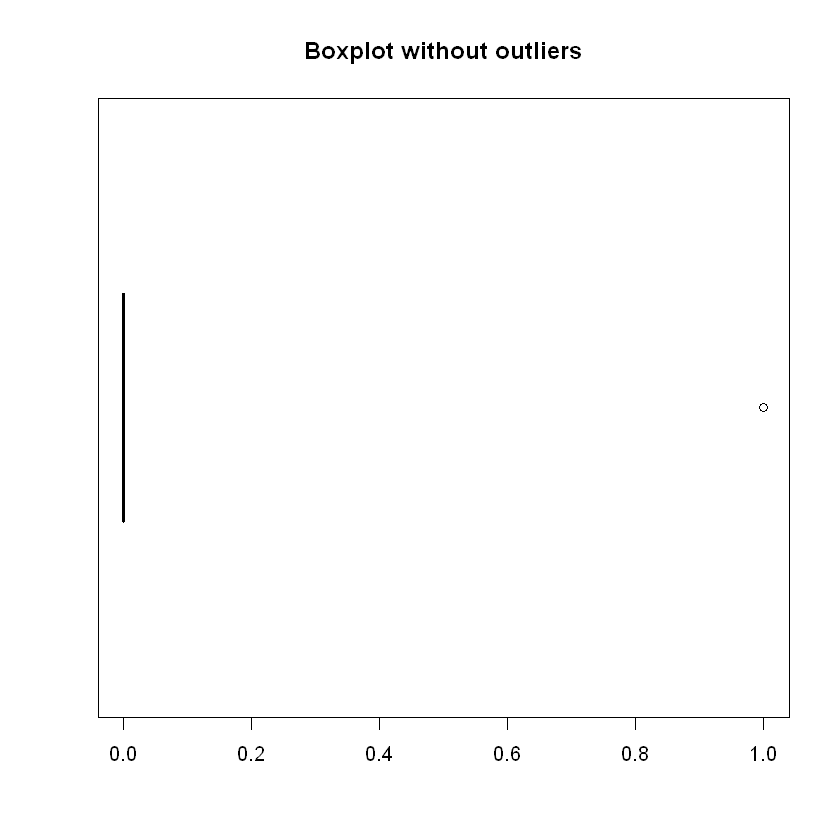


 Pre-treatment Outliers:
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

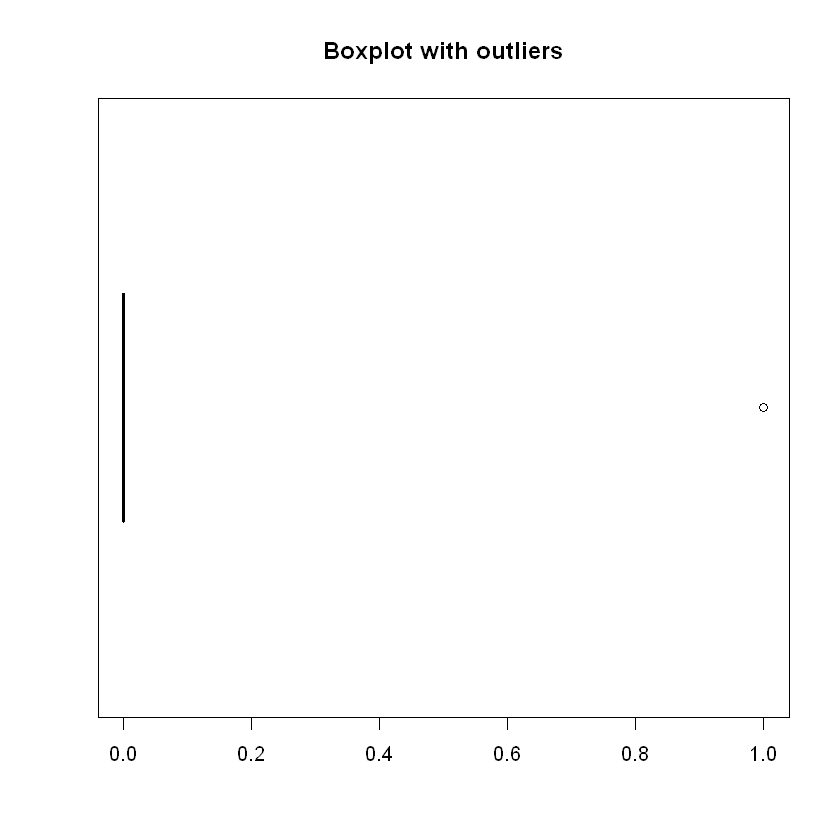


 Post-treatment Outliers:
 
 Mean with outliers:
 0.0532

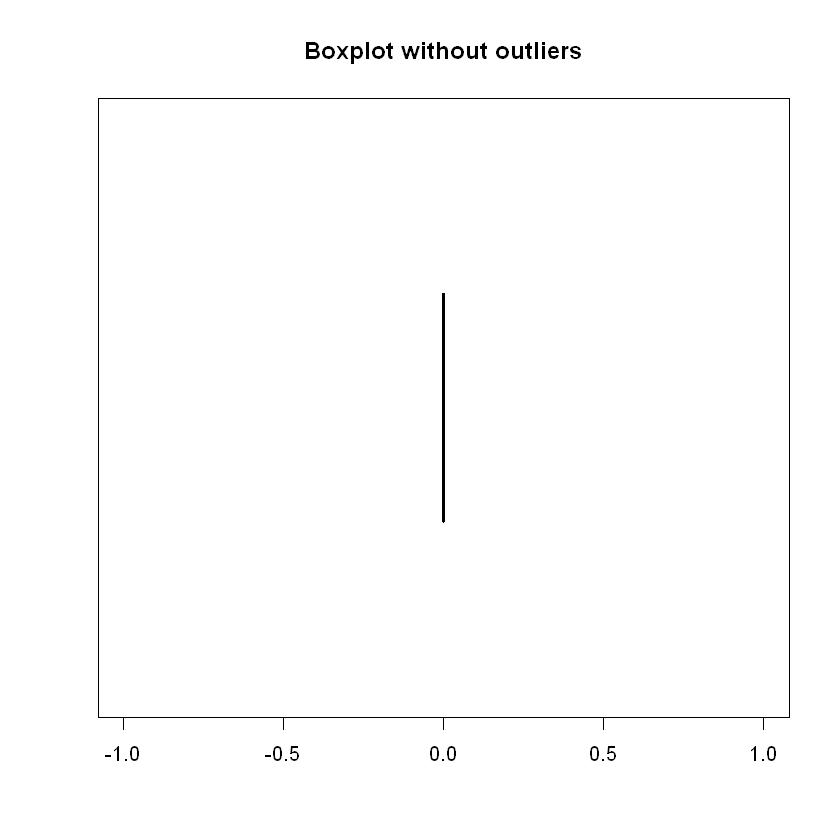


 Pre-treatment Outliers:
 1 1 1 1 1 3 2 3 1 2 1 1 1 3 2 1 1 7 3 1 1 2 3 2 1 2 1 3 9 1 1 1 3 2 1 1 2 1 2 1 3 2 1 1 1 1 1 1 5 1 2 2 1 1 1 1 1 1 1 1 2 1 1 3 1 1 1 1 1 1 1 2 1 2 1 1 3 1 2 1 1 2 5 14 1 1 1 1 1 1 4 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 3 2 1 6 1 4 4 1 1 1 1 1 3 1 3 1 2 1 1 1 1 1 1 1 1 1 2 1 2 4 3 1 1 1 1 2 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 4 3 1 1 1 5 1 1 2 1 1 1 1 1 3 1 2 3 2 1 1 1 1 1 1 1 2 1 6 1 2 1 2 3 1 3 5 3 1 1 2 1 5 1 2 1 1 1 1 1 1 1 1 8 3 1 4 1 5 1 2 2 1 1 1 1 1 1 5 1 1 1 1 2 1 1 1 1 1 1 2 2 1 8 1 3 1 1 1 11 1 1 1 1 2 1 1 1 1 5 1 1 1 1 1 3 1 1 1 1 1 2 1 4 1 25 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 2 1 1 1 1 1 2 1 1 1 1 1 1 3 1 2 4 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 3 2 1 1 3 3 1 1 1 5 1 1 1 1 2 1 1 2 1 1 1 1 7 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 8 1 2 1 1 2 1 4 1 1 1 1 4 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 4 1 3 3 2 2 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 21 1 2 1 3 1 1 1 2 3 1 1 1 1 1 2 1 2 2 1 1 1 1 1 4 2 3 3 1 1 2 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1

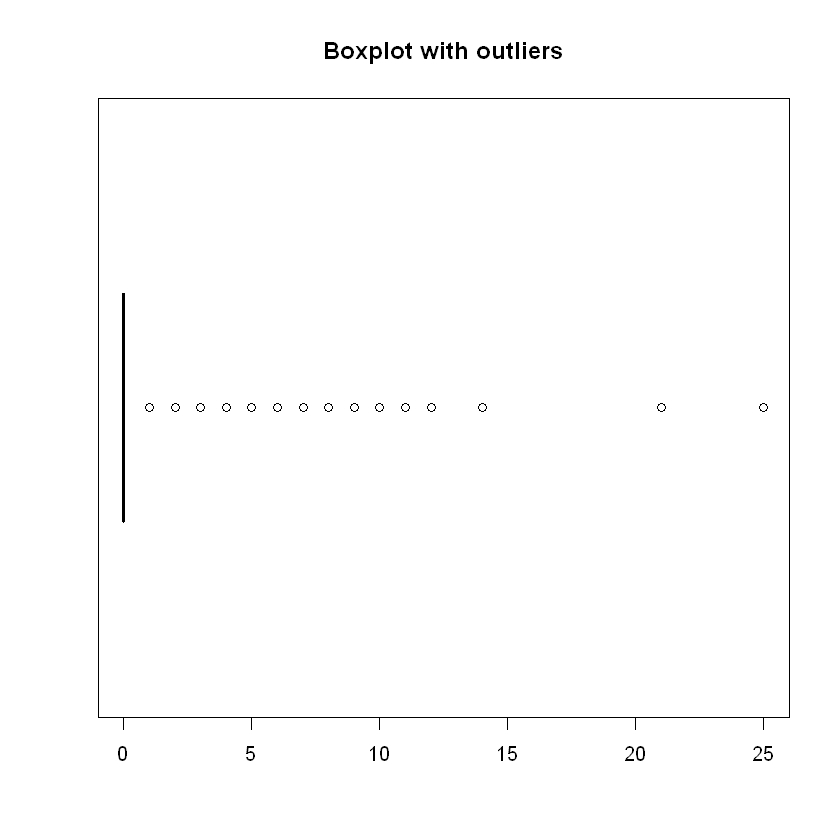


 Post-treatment Outliers:
 
 Mean with outliers:
 0.5665

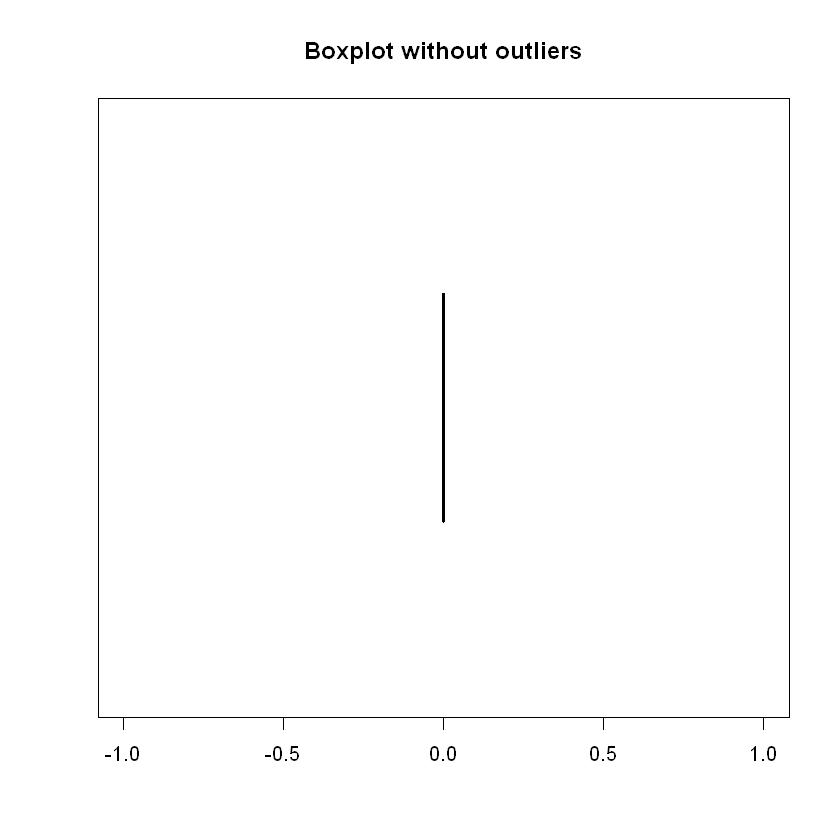


 Pre-treatment Outliers:
 
 Mean without outliers:
 0.5665

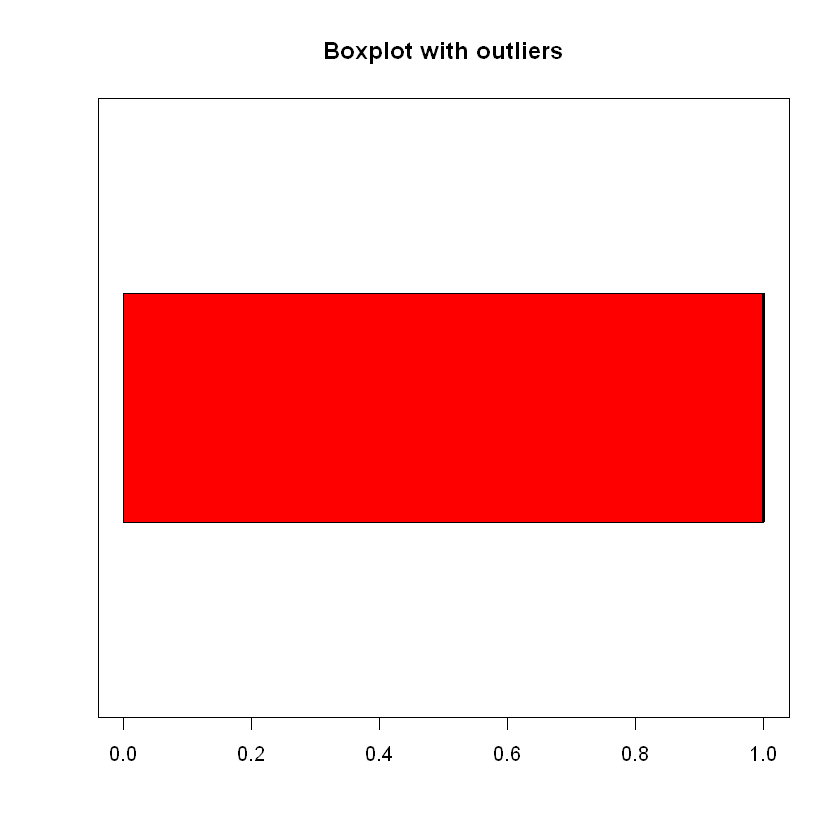


 Post-treatment Outliers:
 

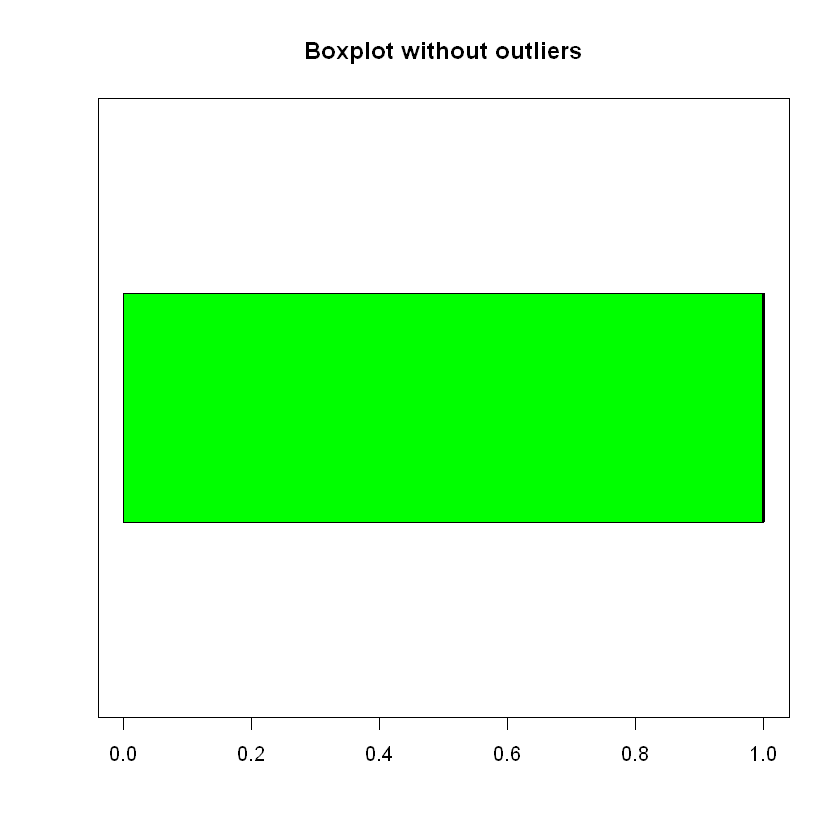

In [29]:
# Find and Apply outlier treatment to all Numeric variables

cc_num <- data.frame(lapply(cc_num,HandleOutlier))  

In [30]:
head(cc_num,5)
head(cc_cat,5)

revenue,mou,recchrge,directas,overage,roam,changem,changer,dropvce,blckvce,...,rv,ownrent,travel,pcown,creditcd,refer,incmiss,mcycle,creditad,setprcm
57.49,482.75,37.43,0.25,22.75,0,343.675,45.90,8.33,1.00,...,1,1,0,0,1,0,0,0,0,0
82.28,1312.25,75.00,1.24,0.00,0,156.750,8.14,22.00,7.67,...,0,0,0,0,1,0,0,0,0,0
31.66,25.50,29.99,0.25,0.00,0,59.500,4.03,0.00,1.00,...,0,0,1,0,1,0,0,0,0,0
62.13,97.50,65.99,2.48,0.00,0,23.500,6.82,0.00,0.33,...,0,0,0,0,1,0,0,0,0,0
25.23,20.50,25.00,0.00,0.00,0,-2.500,-0.23,0.00,0.00,...,0,1,0,0,0,0,0,0,0,0


churn,calibrat,marry,mail,cell,occupation,prizm,credit
0,0,Unmarried,Mail-Order,No-CellPhone,NA,NA,DE
0,0,Unmarried,Mail-Order,CellPhone,NA,NA,C
0,0,Married,Mail-Order,No-CellPhone,Self-Employed,NA,A
0,0,Unmarried,Mail-Order,CellPhone,Professional,NA,A
0,0,Unknown,NA,CellPhone,NA,NA,A


### Combine numeric and categorical variables into one

In [31]:
# List of categorical and numeric variables
num_var <- names(cc_num)
cat_var <- names(cc_cat)

cc<-cbind.data.frame(cc_num,cc_cat)
str(cc)

'data.frame':	71047 obs. of  51 variables:
 $ revenue   : num  57.5 82.3 31.7 62.1 25.2 ...
 $ mou       : num  482.8 1312.2 25.5 97.5 20.5 ...
 $ recchrge  : num  37.4 75 30 66 25 ...
 $ directas  : num  0.25 1.24 0.25 2.48 0 2.23 0.25 0 0.74 0 ...
 $ overage   : num  22.8 0 0 0 0 ...
 $ roam      : num  0 0 0 0 0 5.07 0 0 1.29 0 ...
 $ changem   : num  343.7 156.8 59.5 23.5 -2.5 ...
 $ changer   : num  45.9 8.14 4.03 6.82 -0.23 ...
 $ dropvce   : num  8.33 22 0 0 0 9 3.33 2 2.67 1.67 ...
 $ blckvce   : num  1 7.67 1 0.33 0 0 1.67 0.67 6 0.33 ...
 $ unansvce  : num  61.33 76 2.33 4 0.33 ...
 $ custcare  : num  1.67 4.33 0 4 0 0.33 1 0 4.33 0.33 ...
 $ threeway  : num  0.33 1.33 0 0 0 0 0 0 0 0 ...
 $ mourec    : num  55.28 200.32 0 0 1.13 ...
 $ outcalls  : num  46.33 90.33 0 3.67 0.33 ...
 $ incalls   : num  6.33 35.67 0 0 0 ...
 $ peakvce   : num  83.67 279.67 1.67 7.67 0.67 ...
 $ opeakvce  : num  157 242 1.67 7.33 0.67 ...
 $ dropblk   : num  9.33 35.33 1 0.33 0 ...
 $ callfwdv  :

### Categorical Variable Reduction using Chi-Square Test
    Particularly in this test, we have to check the p-values. Moreover, like all statistical tests, we assume this test as a null hypothesis and an alternate hypothesis.

    The main thing is, we reject the null hypothesis if the p-value that comes out in the result is less than a predetermined significance level, which is 0.05 usually, then we reject the null hypothesis.

H0: The two variables are independent.

H1: The two variables relate to each other.

In [32]:
# We can run Chi-Squred test for all columns with churndep and check the p-values 
# Need to find a better way to loop through all the columns in the dataframe

chisq.test(cc$churn, cc$marry, correct=FALSE)
chisq.test(cc$churn, cc$mail, correct=FALSE)
chisq.test(cc$churn, cc$cell, correct=FALSE)
chisq.test(cc$churn, cc$occupation, correct=FALSE)
chisq.test(cc$churn, cc$prizm, correct=FALSE)
chisq.test(cc$churn, cc$credit, correct=FALSE)


	Pearson's Chi-squared test

data:  cc$churn and cc$marry
X-squared = 34.092, df = 2, p-value = 3.953e-08



	Pearson's Chi-squared test

data:  cc$churn and cc$mail
X-squared = 44.196, df = 3, p-value = 1.371e-09



	Pearson's Chi-squared test

data:  cc$churn and cc$cell
X-squared = 6.0427, df = 2, p-value = 0.04874



	Pearson's Chi-squared test

data:  cc$churn and cc$occupation
X-squared = 13.14, df = 7, p-value = 0.06878



	Pearson's Chi-squared test

data:  cc$churn and cc$prizm
X-squared = 23.965, df = 3, p-value = 2.54e-05



	Pearson's Chi-squared test

data:  cc$churn and cc$credit
X-squared = 285.52, df = 6, p-value < 2.2e-16


#### Conclusion

For 4 variables, we have a high chi-squared value and a p-value of less that 0.05 significance level. 
So we reject the null hypothesis and conclude that churn and these 4 variables have a significant relationship.

    marry
    mail
    prizm
    credit

#### Create a Chi-Square Matrix of p-value

In [33]:
chisqmatrix <- function(x) {
  names = colnames(x);  num = length(names)
  m = matrix(nrow=num,ncol=num,dimnames=list(names,names))
  for (i in 1:(num-1)) {
    for (j in (i+1):num) {
      m[i,j] = chisq.test(x[,i],x[,j],)$p.value
    }
  }
  return (m)
}

mat <- chisqmatrix(cc_cat)
mat

Warning message in chisq.test(x[, i], x[, j], ):
"Chi-squared approximation may be incorrect"

,churn,calibrat,marry,mail,cell,occupation,prizm,credit
churn,NA,0,3.952854e-08,1.371281e-09,4.873604e-02,0.0687765576,2.540015e-05,1.034821e-58
calibrat,NA,NA,2.456032e-02,7.487206e-03,2.556416e-01,0.8844652407,1.728458e-02,7.068133e-21
marry,NA,NA,NA,0.000000e+00,1.091014e-07,0.0000000000,0.000000e+00,0.000000e+00
mail,NA,NA,NA,NA,6.525069e-02,0.0000000000,0.000000e+00,0.000000e+00
cell,NA,NA,NA,NA,NA,0.0007757525,7.929694e-16,0.000000e+00
occupation,NA,NA,NA,NA,NA,NA,5.450147e-263,0.000000e+00
prizm,NA,NA,NA,NA,NA,NA,NA,4.353172e-278
credit,NA,NA,NA,NA,NA,NA,NA,NA


In [34]:
# As an alternative, we can use the chi.squared function from FSelector package
# This package provides functions for selecting attributes from a given dataset. Attribute subset selection is the process of identifying and removing as much of the irrelevant and redundant information as possible.
# CRAN page: http://cran.r-project.org/web/packages/FSelector/index.html
# The result is equal to Cramer's V coefficient between source attributes and destination attribute.
# Here we filter out the top 10 columns.

p <- FSelector::chi.squared(churn~., cc_cat)
print(p)
cutoff.k(p, 4)

           attr_importance
calibrat       0.525075174
marry          0.021905666
mail           0.024941244
cell           0.009222352
occupation     0.013599411
prizm          0.018366168
credit         0.063393349


[1] "calibrat" "credit"   "mail"     "marry"

In [35]:
# Drop non significant categorical columns
cc_cat <- subset(cc_cat,select=c(marry,mail,prizm,credit,calibrat,churn))

# Combine the categorical and numeric datasets
cc<-cbind.data.frame(cc_num,cc_cat)
str(cc)

'data.frame':	71047 obs. of  49 variables:
 $ revenue : num  57.5 82.3 31.7 62.1 25.2 ...
 $ mou     : num  482.8 1312.2 25.5 97.5 20.5 ...
 $ recchrge: num  37.4 75 30 66 25 ...
 $ directas: num  0.25 1.24 0.25 2.48 0 2.23 0.25 0 0.74 0 ...
 $ overage : num  22.8 0 0 0 0 ...
 $ roam    : num  0 0 0 0 0 5.07 0 0 1.29 0 ...
 $ changem : num  343.7 156.8 59.5 23.5 -2.5 ...
 $ changer : num  45.9 8.14 4.03 6.82 -0.23 ...
 $ dropvce : num  8.33 22 0 0 0 9 3.33 2 2.67 1.67 ...
 $ blckvce : num  1 7.67 1 0.33 0 0 1.67 0.67 6 0.33 ...
 $ unansvce: num  61.33 76 2.33 4 0.33 ...
 $ custcare: num  1.67 4.33 0 4 0 0.33 1 0 4.33 0.33 ...
 $ threeway: num  0.33 1.33 0 0 0 0 0 0 0 0 ...
 $ mourec  : num  55.28 200.32 0 0 1.13 ...
 $ outcalls: num  46.33 90.33 0 3.67 0.33 ...
 $ incalls : num  6.33 35.67 0 0 0 ...
 $ peakvce : num  83.67 279.67 1.67 7.67 0.67 ...
 $ opeakvce: num  157 242 1.67 7.33 0.67 ...
 $ dropblk : num  9.33 35.33 1 0.33 0 ...
 $ callfwdv: num  0 0 0 0 0 0 0 0 0 0 ...
 $ callwai

### Feature Selection using Variable Importance

In [36]:
set.seed(100)
rPartMod <- train(churn ~ ., data=cc, method="rpart")
rpartImp <- varImp(rPartMod)
print(rpartImp)

rpart variable importance

  only 20 most important variables shown (out of 58)

                  Overall
calibrat1        100.0000
eqpdays           15.4733
months            14.8417
recchrge           3.0269
mou                2.9878
refurb             2.0707
setprcm            1.2669
phones             1.2376
webcap             1.1403
models             0.7939
changem            0.3460
creditAA           0.2306
outcalls           0.0000
rv                 0.0000
directas           0.0000
overage            0.0000
`mailMail-Order`   0.0000
creditZ            0.0000
children           0.0000
ownrent            0.0000


In [37]:
# We will keep only the top 20 important features in the final dataset + calibrat + churn

cc <- subset(cc,select=c(eqpdays,months,mou,recchrge,refurb,setprcm,phones,webcap,models,changem,outcalls,rv,directas,overage,children,ownrent,calibrat,churn))

### Data Visualization

For continuous independent variables, we can get more clarity on the distribution by analyzing it w.r.t. dependent variable.

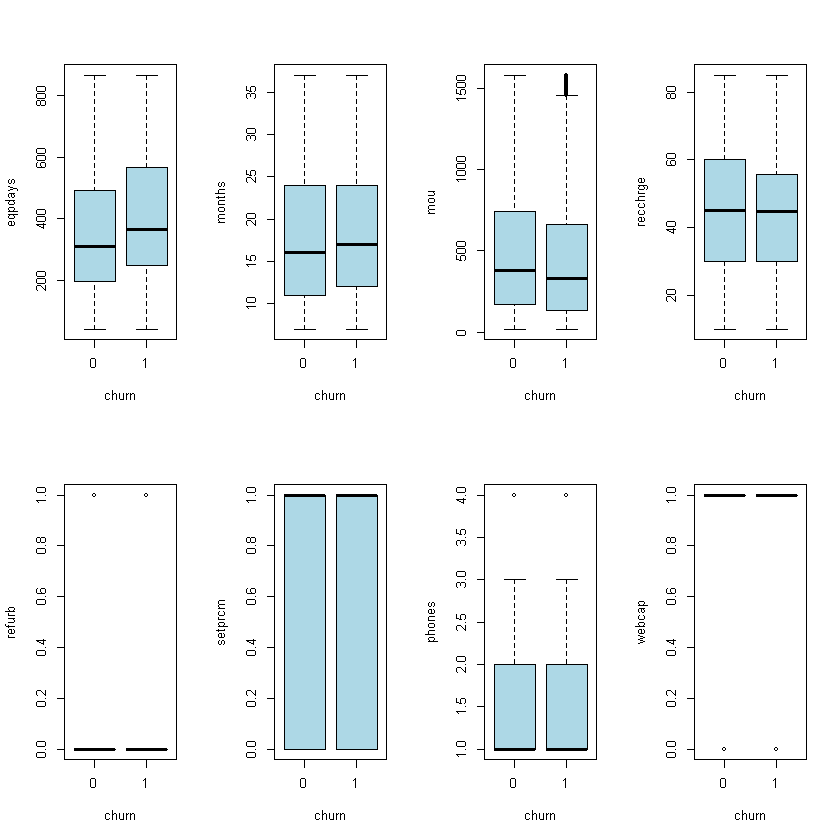

In [38]:
par(mfrow = c(2,4))

boxplot(eqpdays~churn, ylab="eqpdays", xlab= "churn", col="light blue",data = cc)
boxplot(months~churn, ylab="months", xlab= "churn", col="light blue",data = cc)
boxplot(mou~churn, ylab="mou", xlab= "churn", col="light blue",data = cc)
boxplot(recchrge~churn, ylab="recchrge", xlab= "churn", col="light blue",data = cc)
boxplot(refurb~churn, ylab="refurb", xlab= "churn", col="light blue",data = cc)
boxplot(setprcm~churn, ylab="setprcm", xlab= "churn", col="light blue",data = cc)
boxplot(phones~churn, ylab="phones", xlab= "churn", col="light blue",data = cc)
boxplot(webcap~churn, ylab="webcap", xlab= "churn", col="light blue",data = cc)

### Export final cleaned dataset(ready for modelling)

In [39]:
write.csv(cc, file="C:\\Data_Science\\Certifications\\AnalytixLabs\\Data Science in R\\Data Science with R - Final Projects\\Logistic Regression - Telecom Churn\\telecom_final.csv")

### Data Transformation to handle Skewness
    Sometimes, we have to deal with data that don´t have a normal shape but a skewed one. By the book, a negative skewness reveals that the mean of the values is less than the median, which means that the data distribution is left-skewed. A positive skewness suggests that the mean of the data values is larger than the median, and the data distribution is right-skewed.

[1] 1
[1] 2


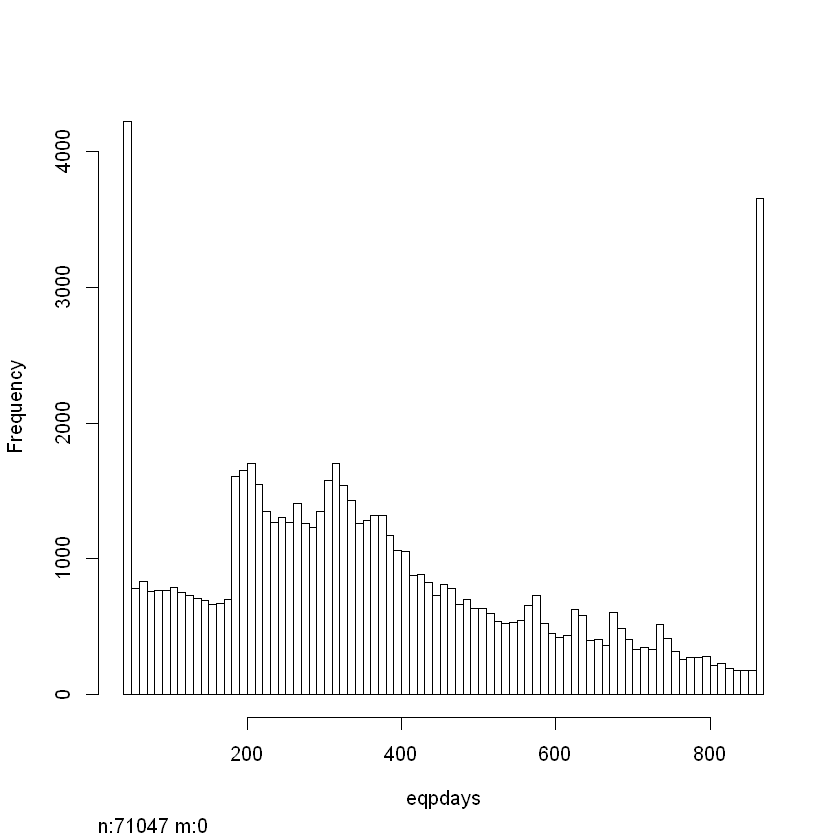

[1] 3


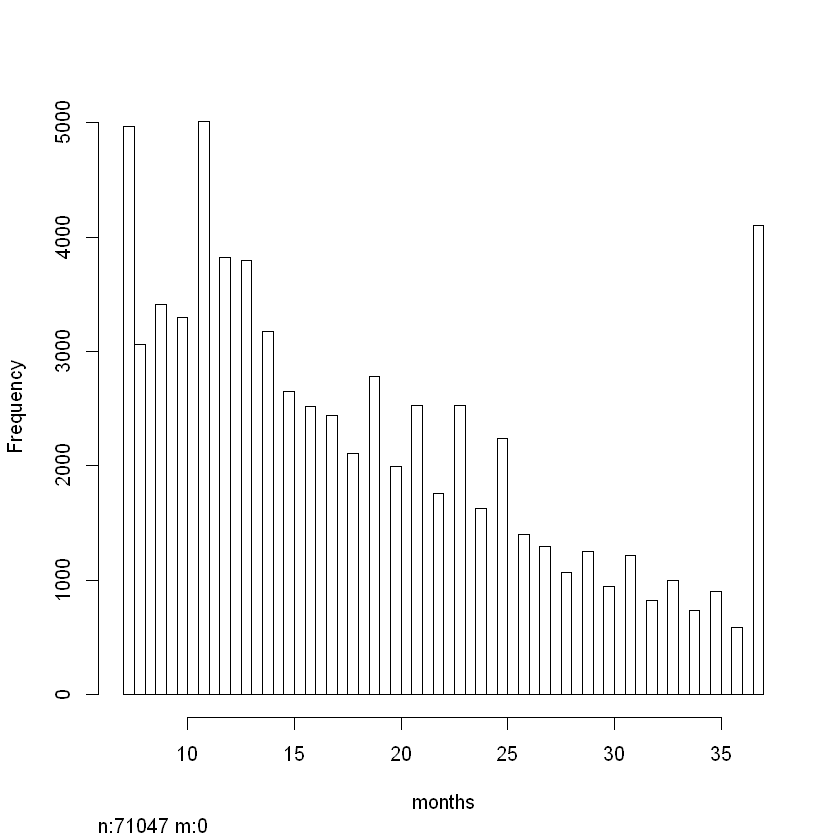

[1] 4


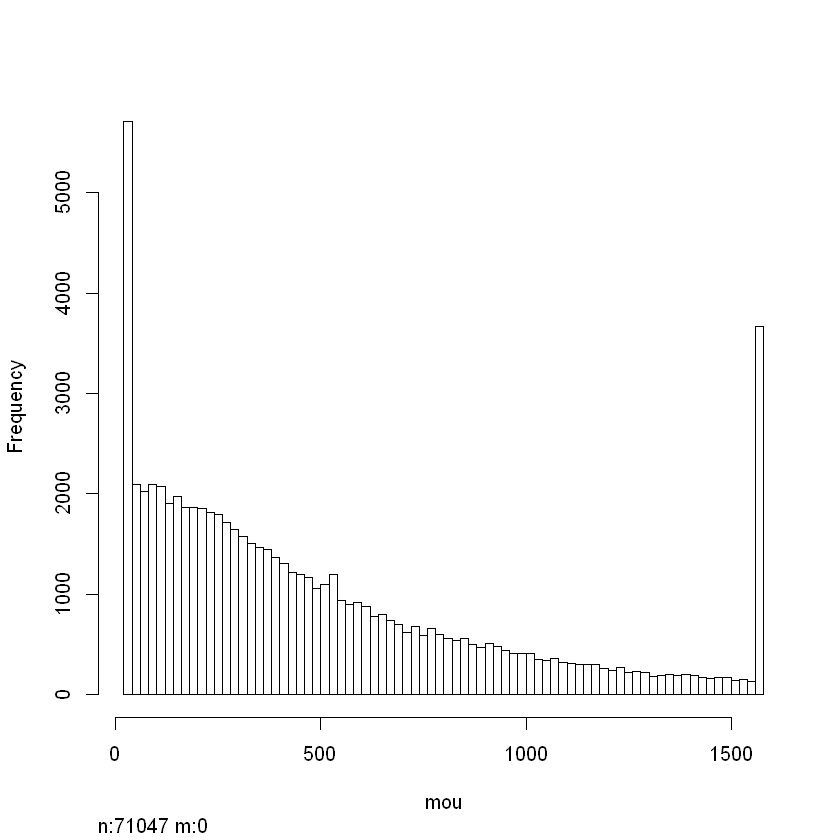

[1] 5
[1] 6
[1] 7


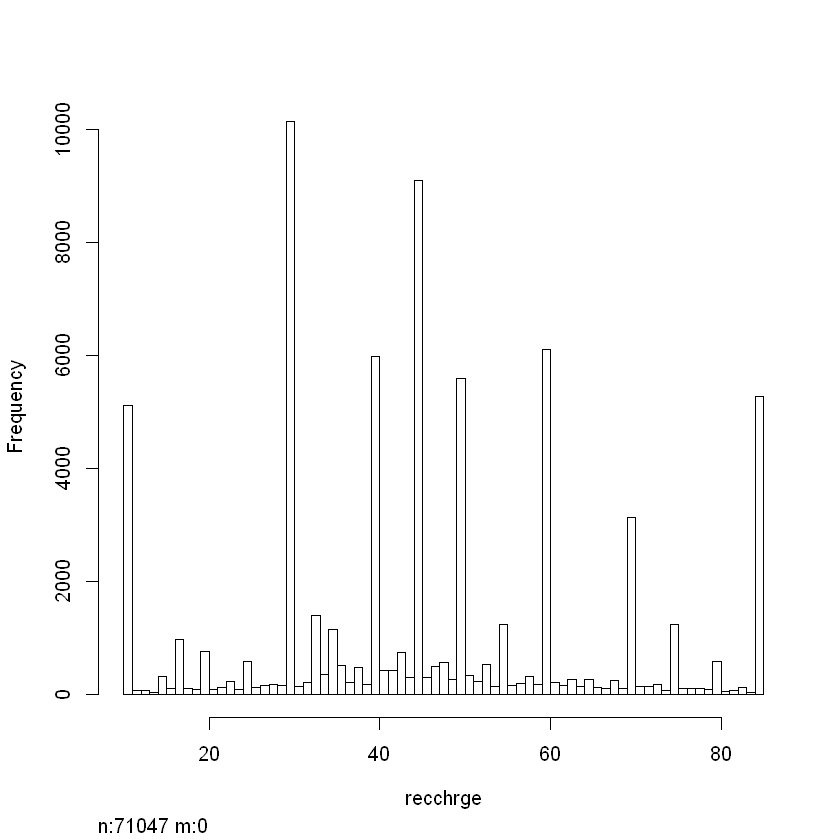

[1] 8
[1] 9


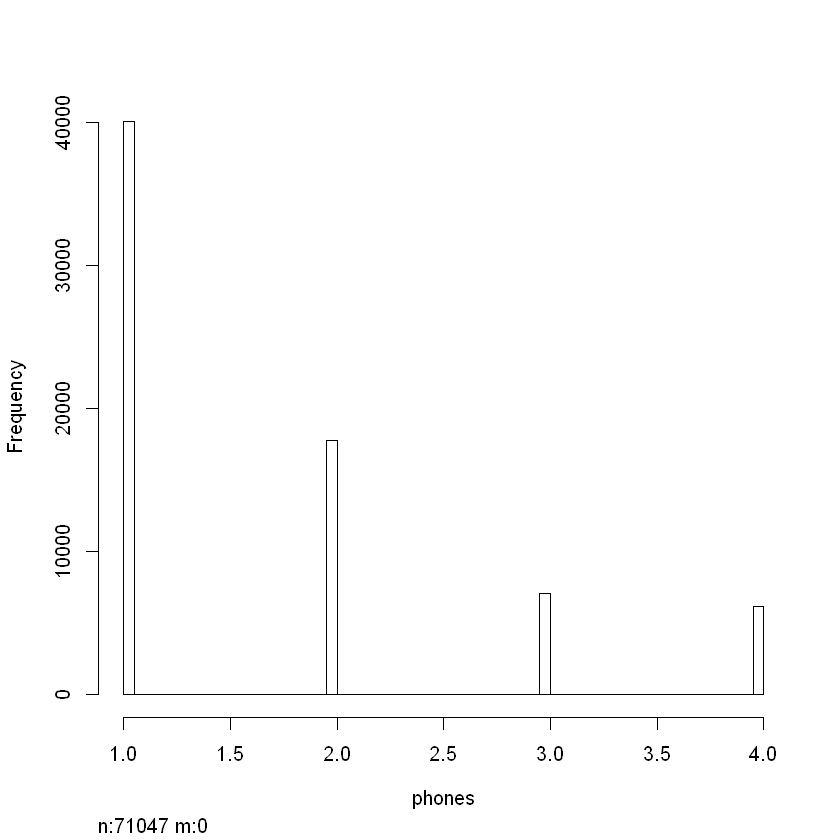

[1] 10


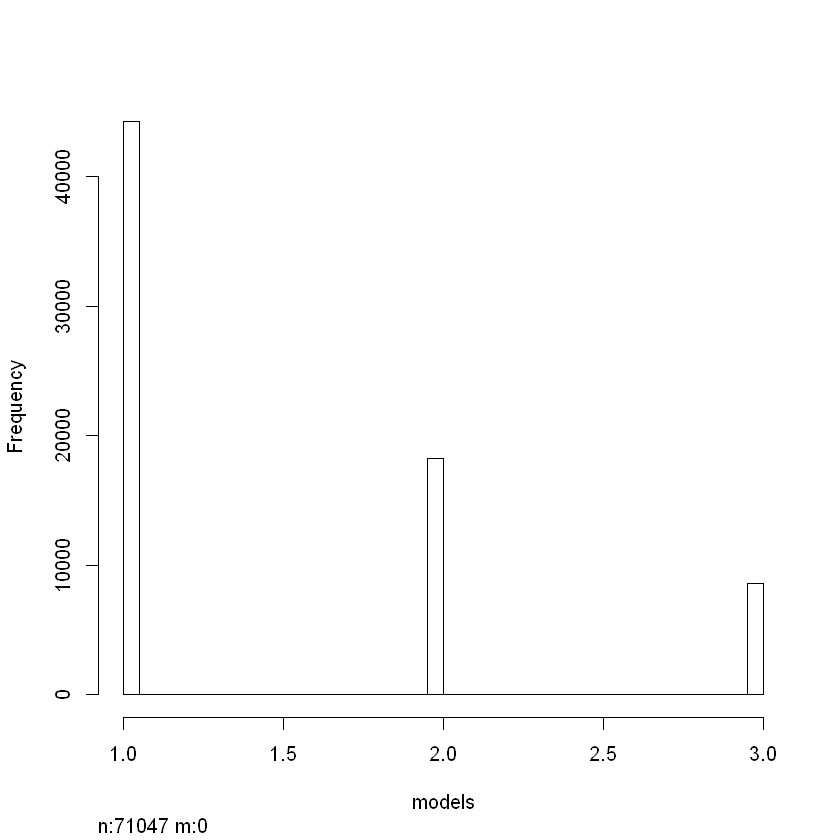

[1] 11


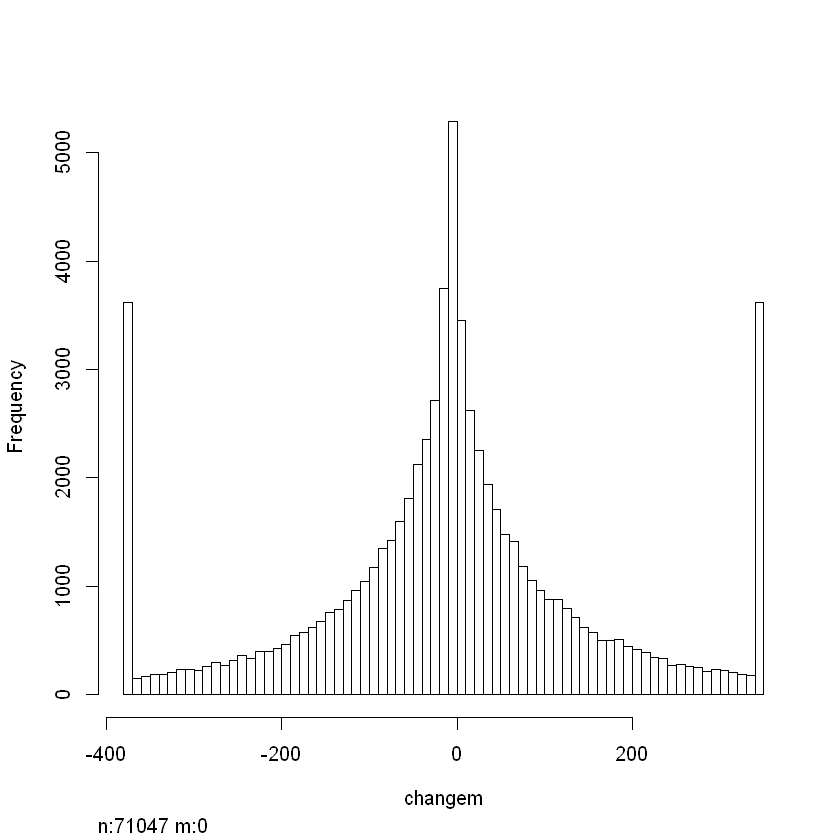

[1] 12
[1] 13


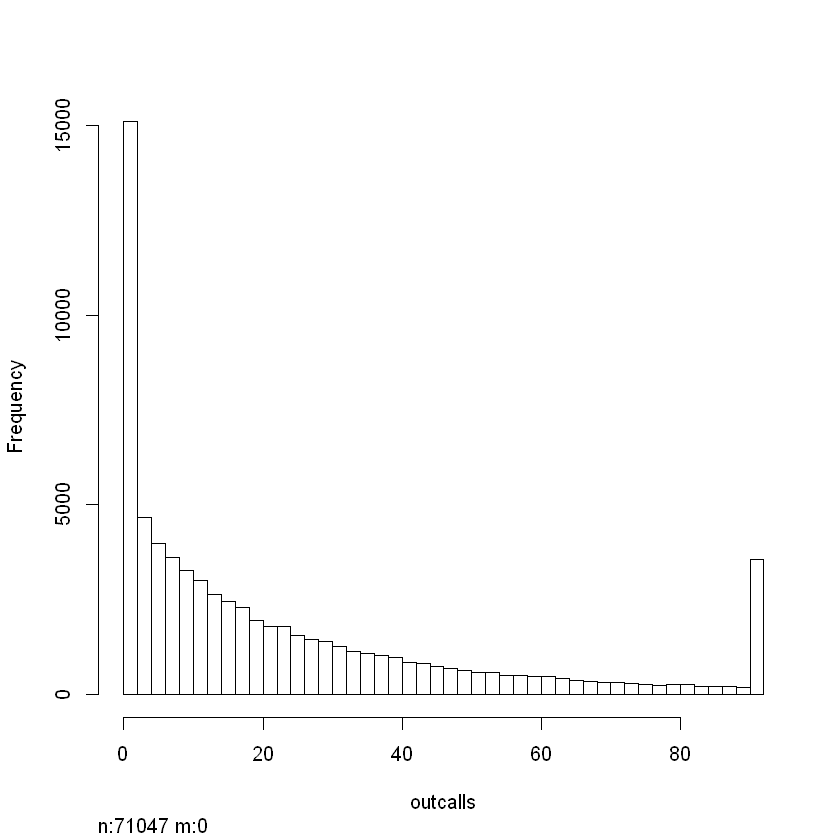

[1] 14


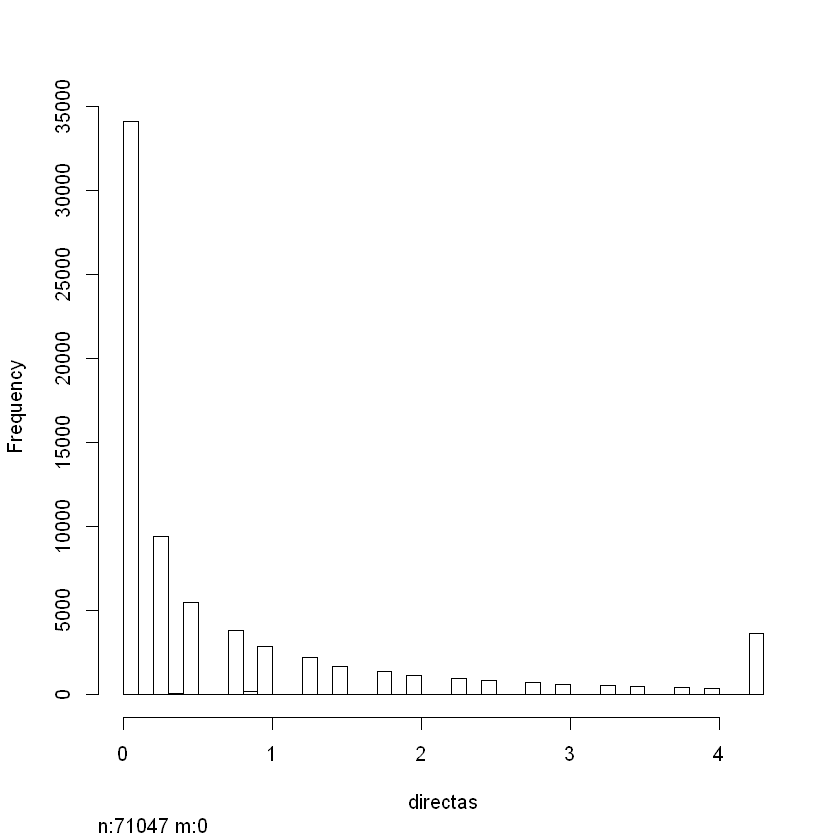

[1] 15
[1] 16


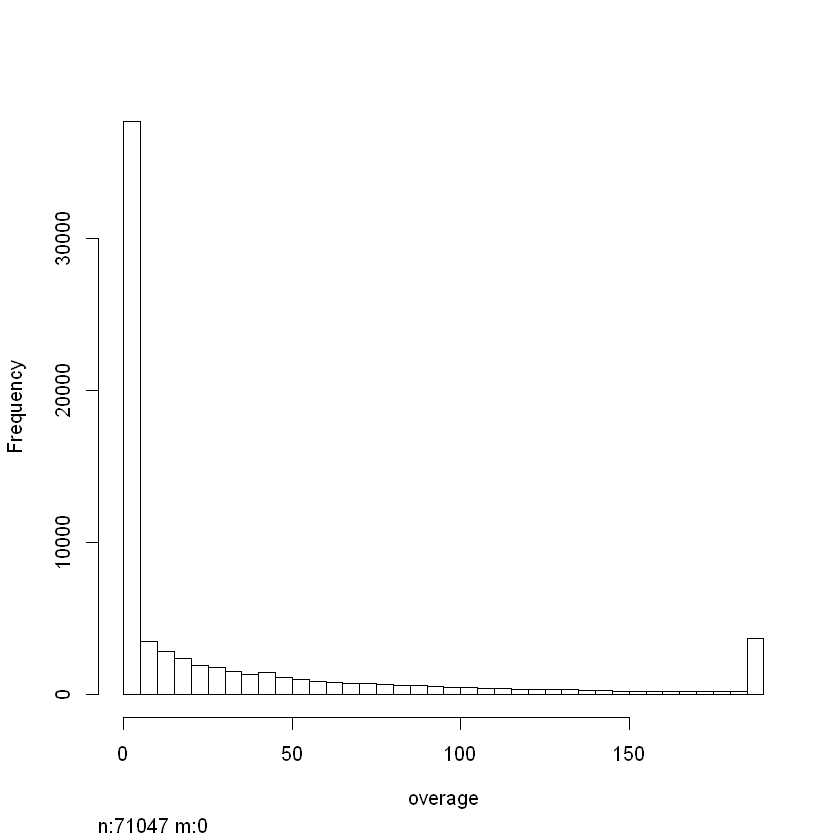

In [40]:
# Check data distribution
# Plot histograms for all the continuous numeric variables in cc

num_data <-cc[, sapply(cc, is.numeric)] 
for (i in 1:length(names(num_data))){
  print(i)
  hist( num_data[i], main='hist', breaks=20, prob=TRUE)
}

Here are some hints:

    If the skewness of the predictor variable is 0, the data is perfectly symmetrical,
    If the skewness of the predictor variable is less than -1 or greater than +1, the data is highly skewed,
    If the skewness of the predictor variable is between -1 and -0.5 or between +1 and +0.5 then the data is moderately skewed,
    If the skewness of the predictor variable is -0.5 and +0.5, the data is approximately symmetric.

Skewed data have a negative impact on linear regression. For example, if we take the scatter-plot of BodyWt and BrainWt we will see something very odd.


In [41]:
# Here we see that except 'changem' the columns are either moderately skewed or highly skewed
# We will transform some of these variables using log, sqrt and cuberoot

e1071::skewness(cc$eqpdays)
e1071::skewness(cc$months)
e1071::skewness(cc$mou)
e1071::skewness(cc$recchrge)
e1071::skewness(cc$phones)
e1071::skewness(cc$models)
e1071::skewness(cc$changem)
e1071::skewness(cc$outcalls)
e1071::skewness(cc$directas)
e1071::skewness(cc$overage)

[1] 0.5915291

[1] 0.6355317

[1] 1.07173

[1] 0.2417582

[1] 1.19152

[1] 1.05867

[1] -0.06721899

[1] 1.321495

[1] 1.918007

[1] 1.881294

#### Transform the continuous variables

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


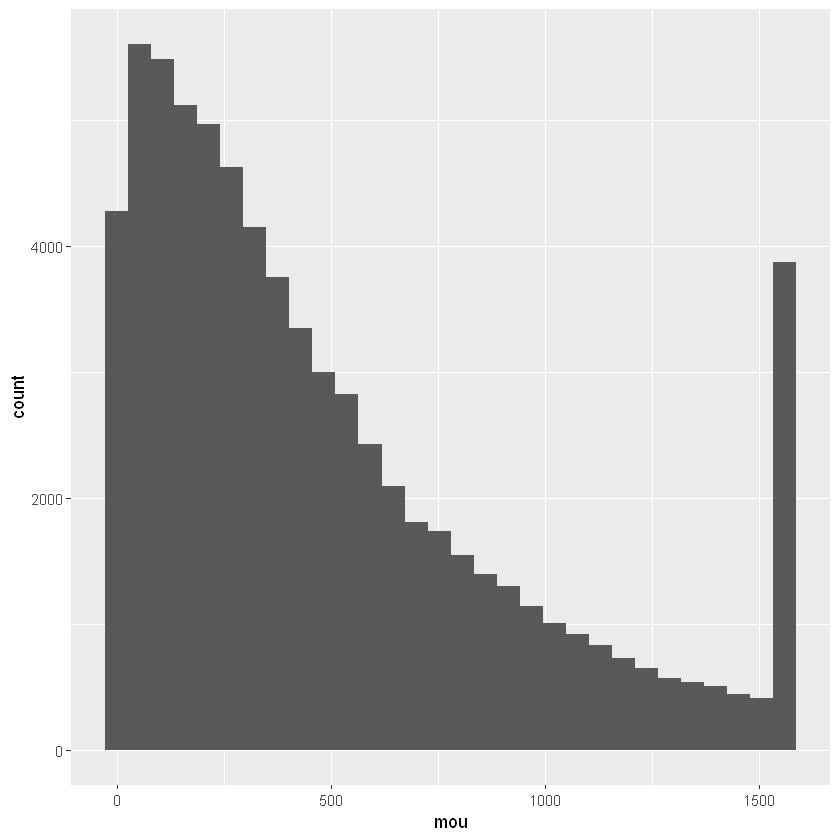

[1] 0.3265822

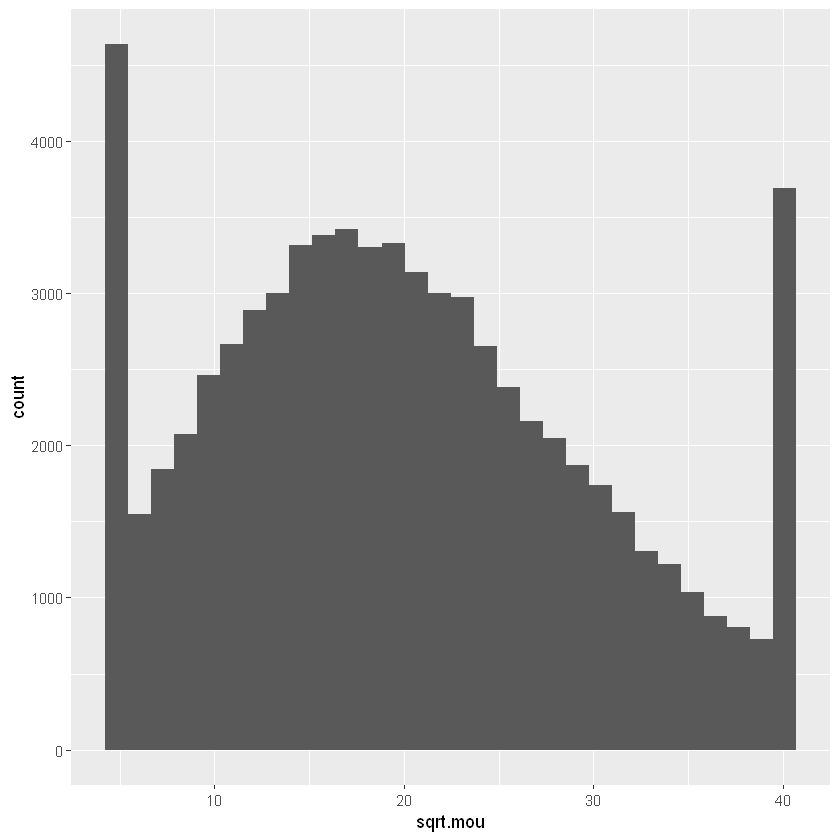

In [42]:
# the new skewness after transformation is between  -0.5 and +0.5, so the data is approximately symmetric.
# mou

ggplot(data = cc, aes(mou)) + geom_histogram()
sqrt.mou <- sqrt(cc$mou)
ggplot(data = cc, aes(sqrt.mou)) + geom_histogram()
e1071::skewness(sqrt.mou)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


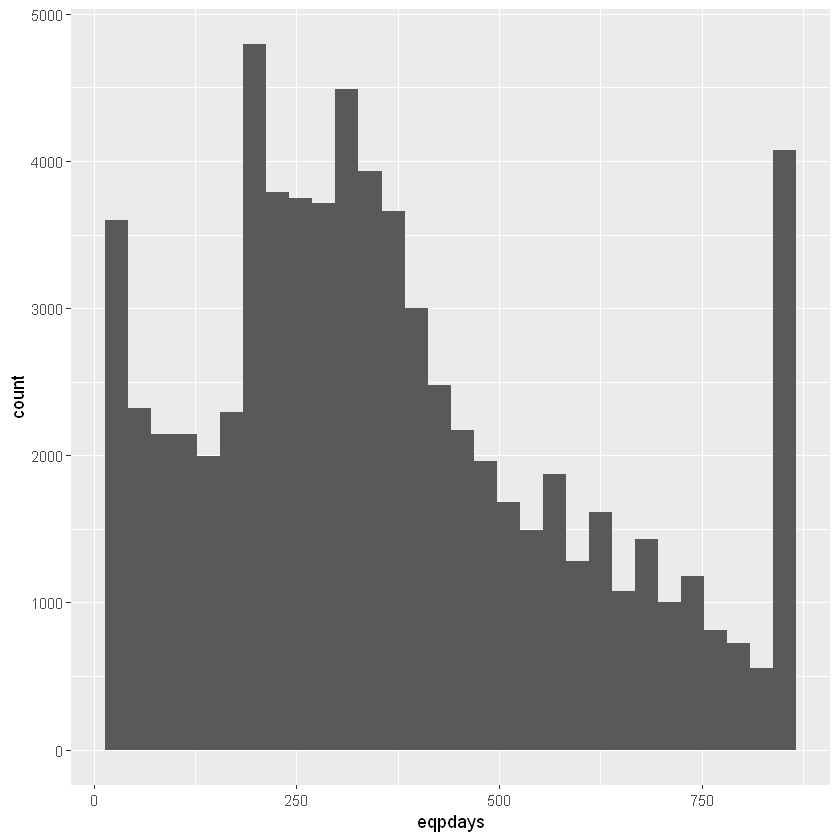

[1] -0.05890219

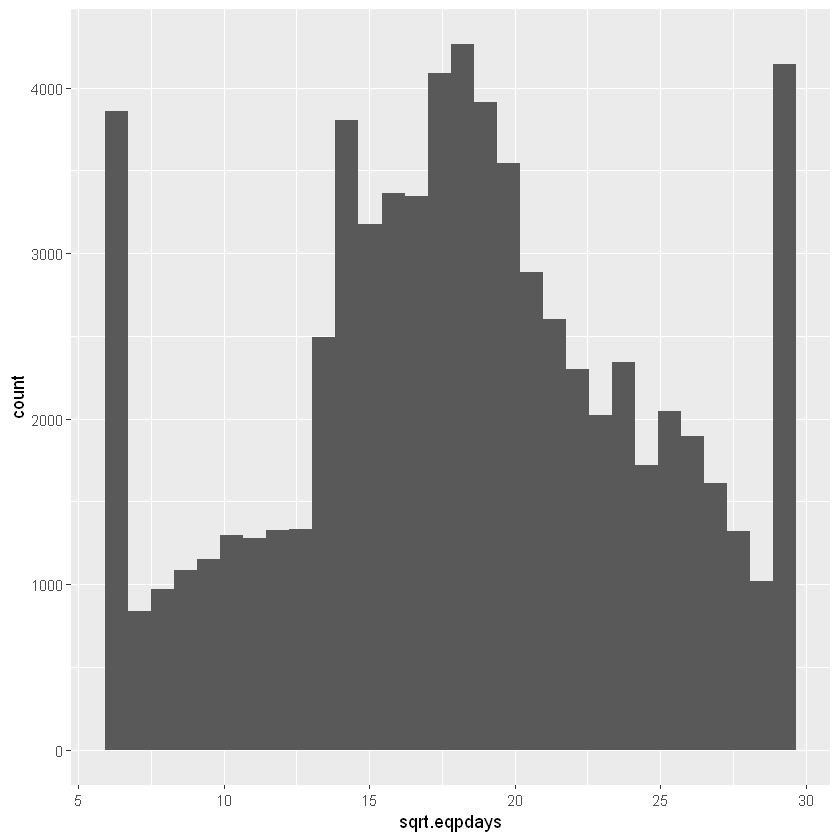

In [43]:
# eqpdays
# skewness is close to 0, the data is approximately symmetrical,
ggplot(data = cc, aes(eqpdays)) + geom_histogram()
sqrt.eqpdays <- sqrt(cc$eqpdays)
ggplot(data = cc, aes(sqrt.eqpdays)) + geom_histogram()
e1071::skewness(sqrt.eqpdays)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


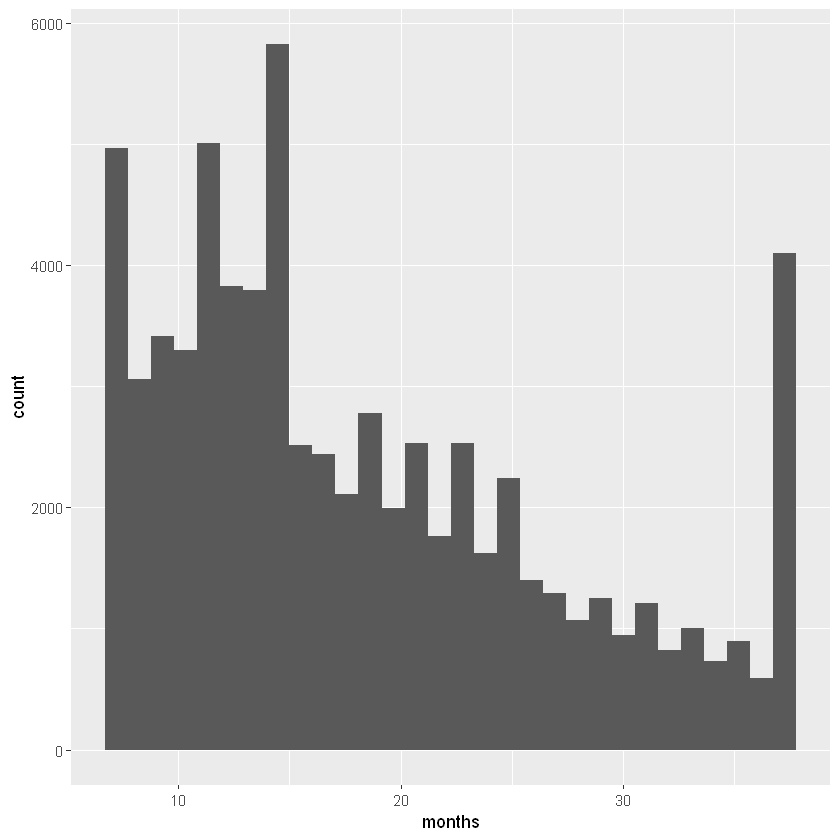

[1] 0.007993778

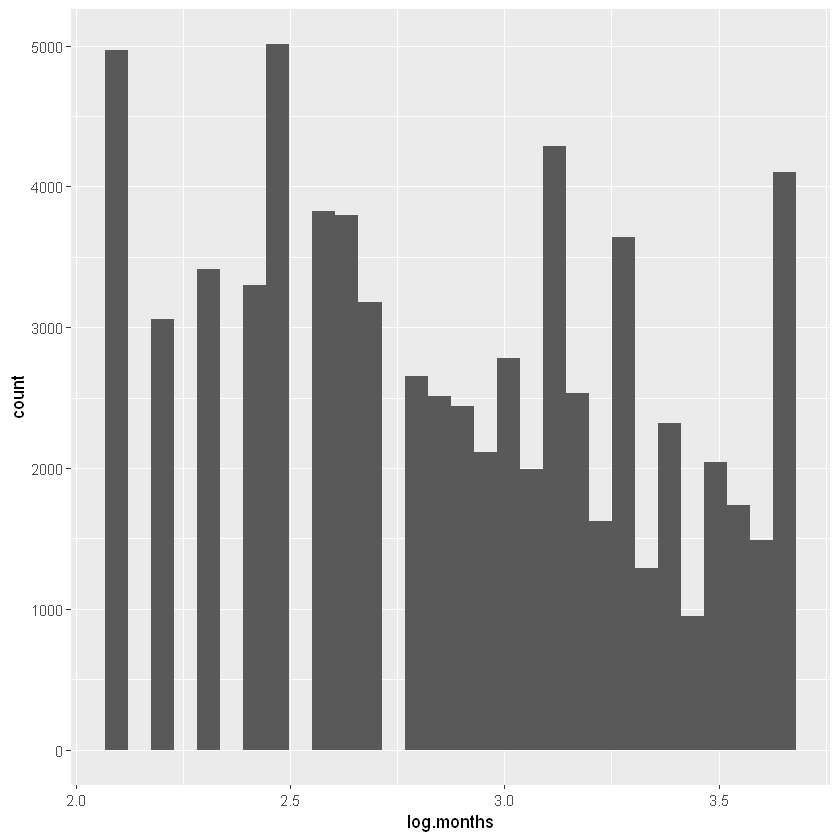

In [44]:
# months
# skewness is close to 0, the data is approximately symmetrical,
ggplot(data = cc, aes(months)) + geom_histogram()
log.months <- log1p(cc$months)
ggplot(data = cc, aes(log.months)) + geom_histogram()
e1071::skewness(log.months)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


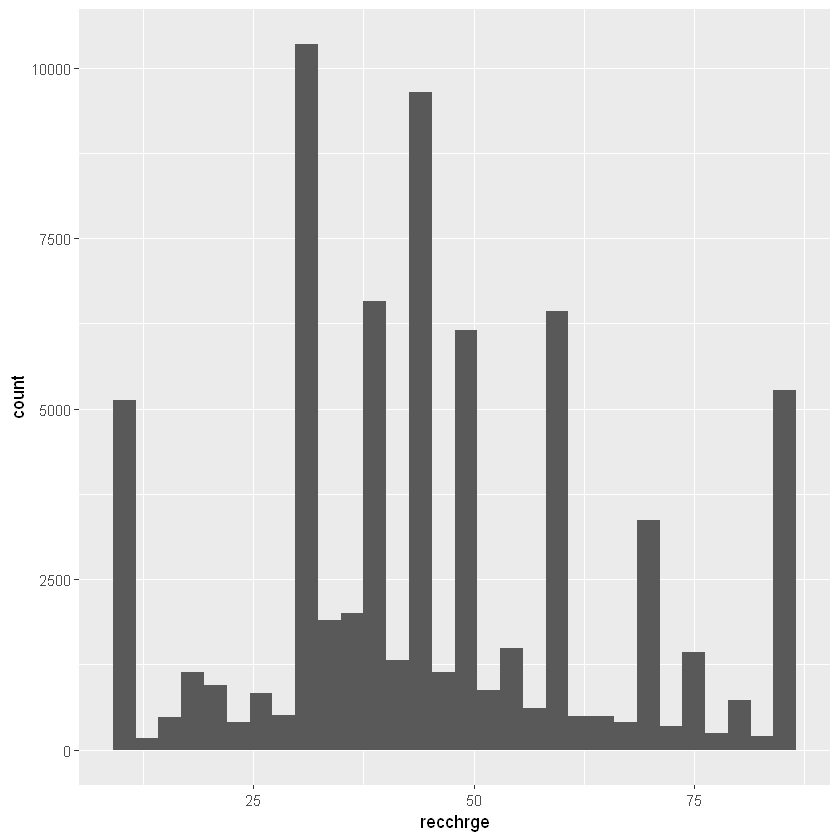

[1] -0.3776291

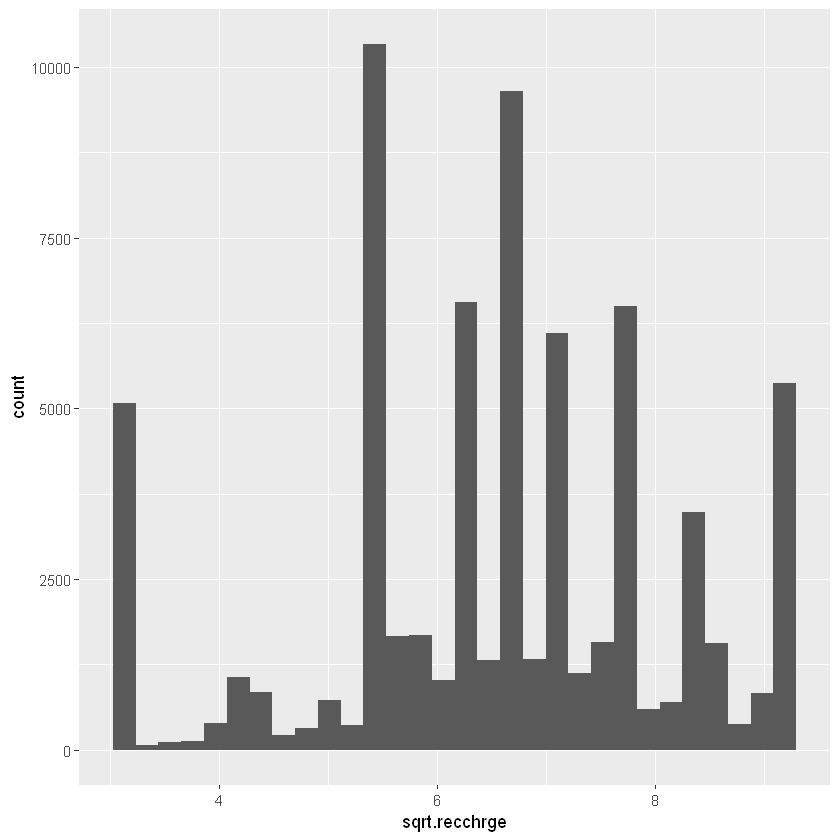

In [45]:
# recchrge
# skewness is between -0.5 and 0.5, the data is approximately symmetrical,
ggplot(data = cc, aes(recchrge)) + geom_histogram()
sqrt.recchrge <- sqrt(cc$recchrge)
ggplot(data = cc, aes(sqrt.recchrge)) + geom_histogram()
e1071::skewness(sqrt.recchrge)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


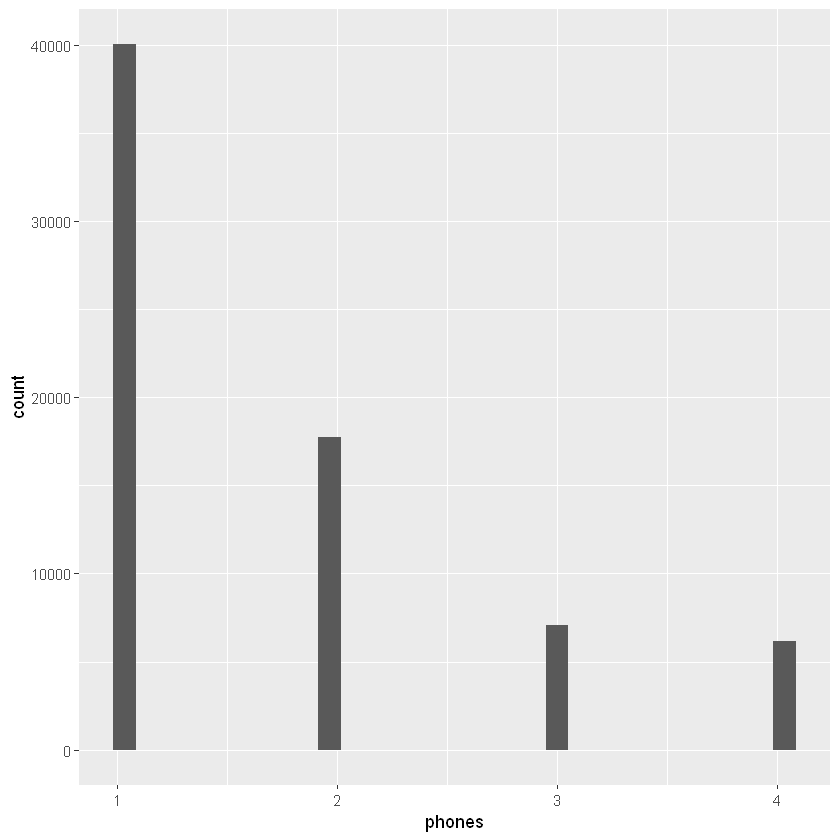

[1] 0.7046622

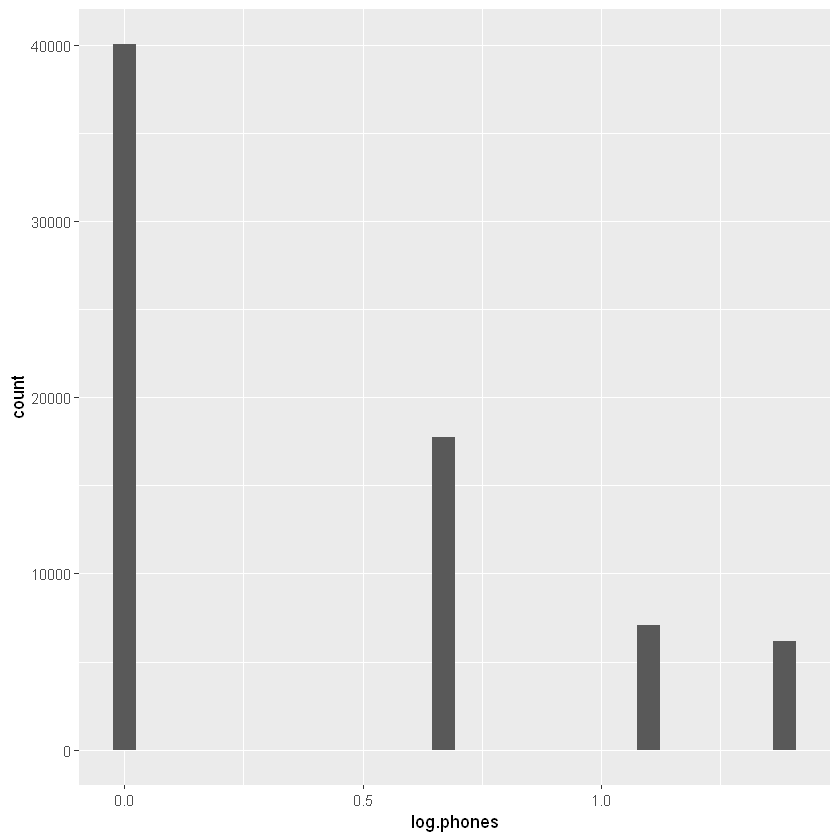

In [46]:
# phones
# skewness is between +1 and +0.5 so the data is moderately skewed

ggplot(data = cc, aes(phones)) + geom_histogram()
log.phones <- log(cc$phones)
ggplot(data = cc, aes(log.phones)) + geom_histogram()
e1071::skewness(log.phones)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


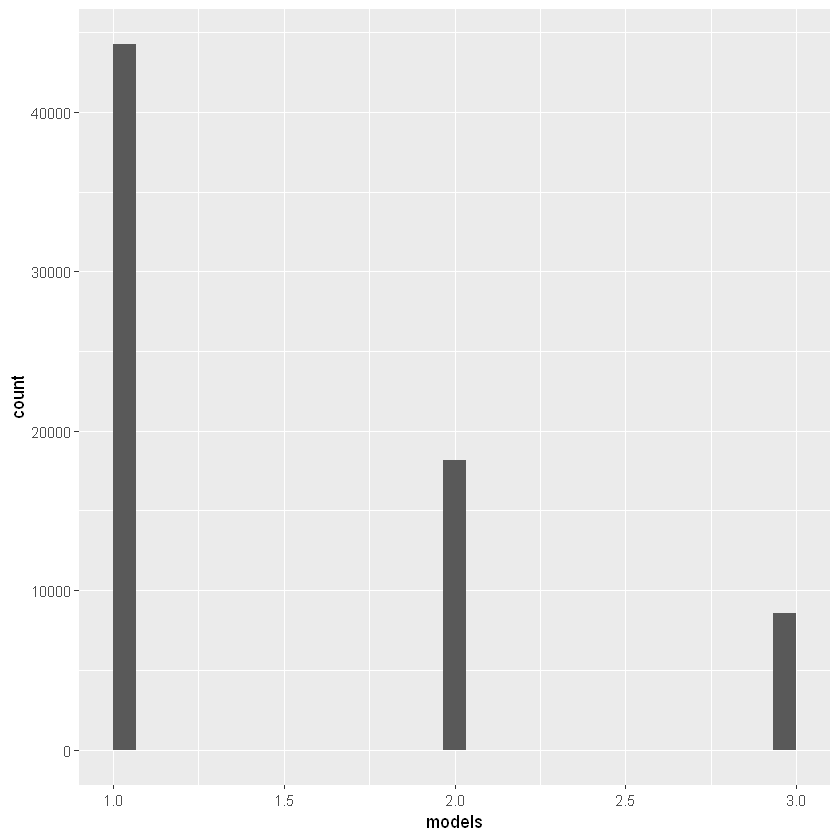

[1] 0.765799

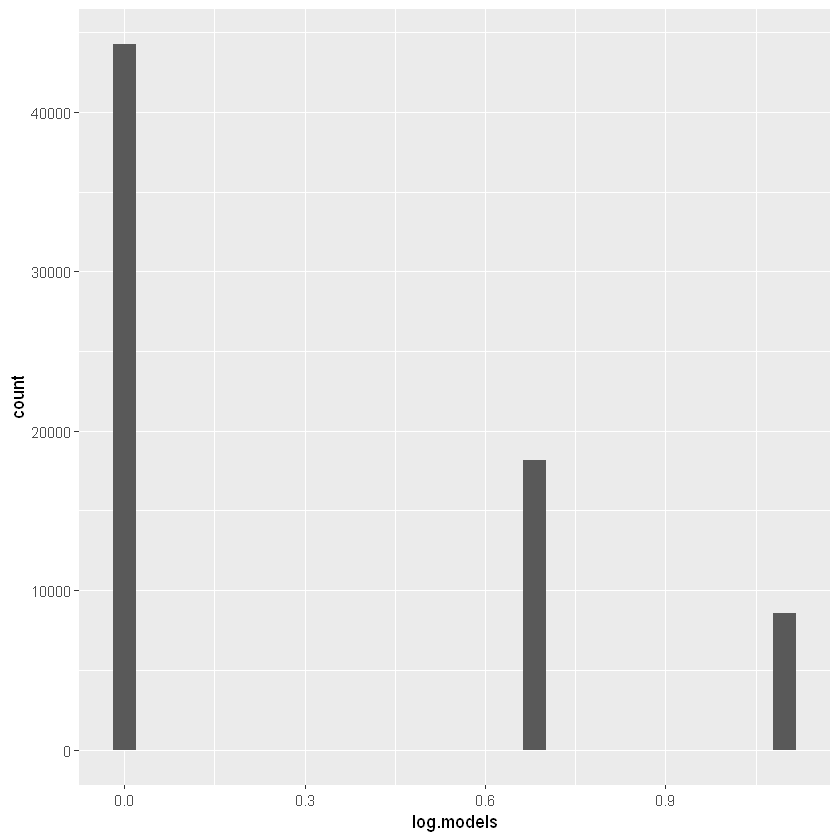

In [47]:
# models
# skewness is between +1 and +0.5 so the data is moderately skewed

ggplot(data = cc, aes(models)) + geom_histogram()
log.models <- log(cc$models)
ggplot(data = cc, aes(log.models)) + geom_histogram()
e1071::skewness(log.models)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


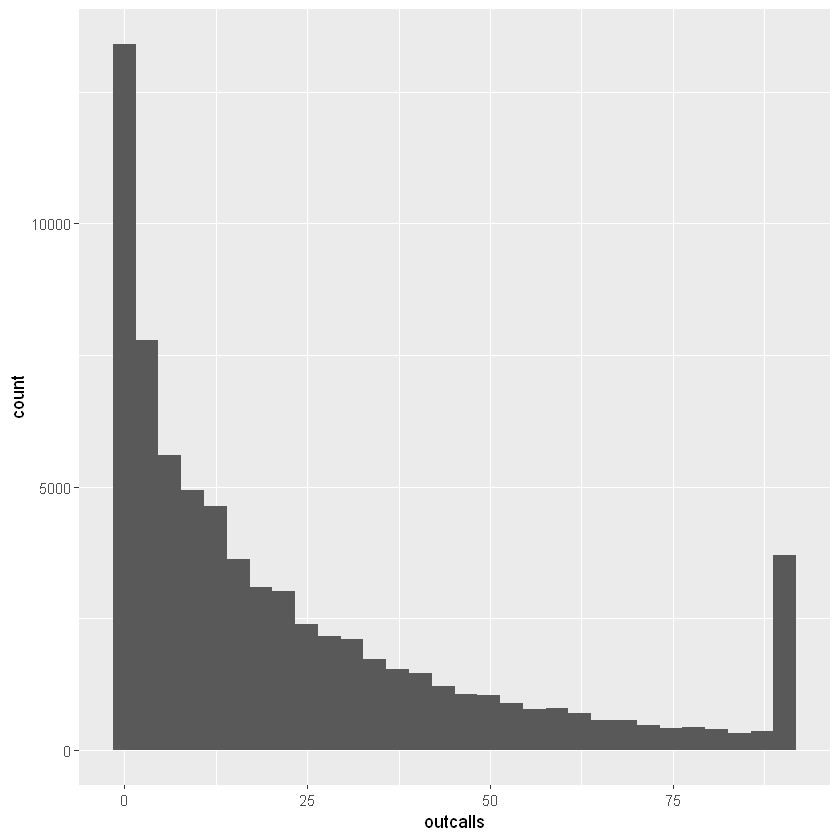

[1] 0.3600629

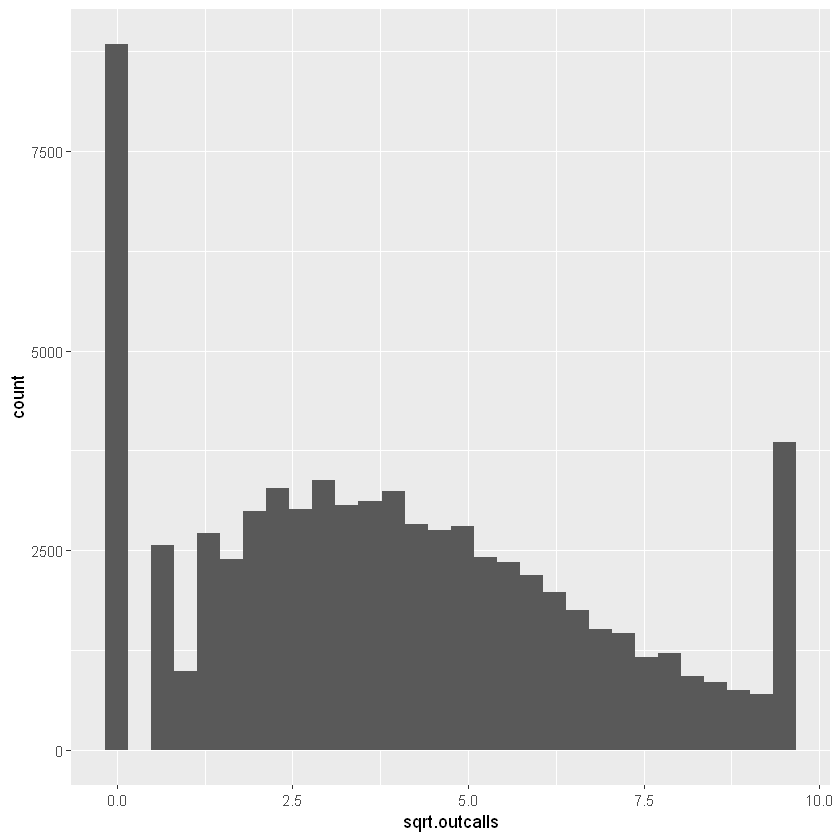

In [48]:
# outcalls
# skewness is between -0.5 and +0.5, the data is approximately symmetric.

ggplot(data = cc, aes(outcalls)) + geom_histogram()
sqrt.outcalls <- sqrt(cc$outcalls)
ggplot(data = cc, aes(sqrt.outcalls)) + geom_histogram()
e1071::skewness(sqrt.outcalls)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


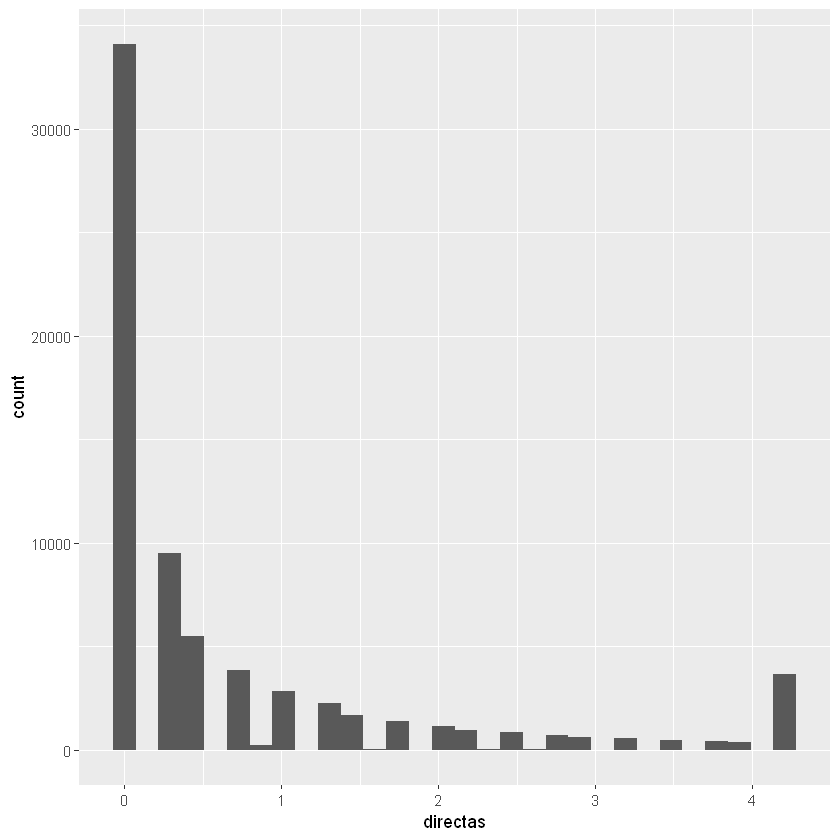

[1] 0.4736834

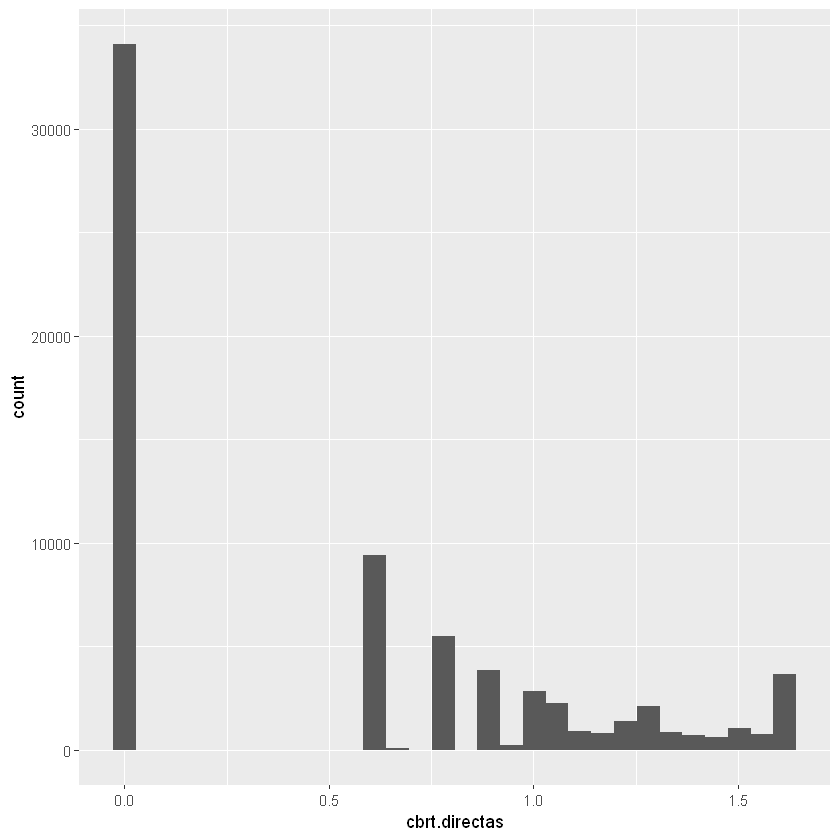

In [49]:
# directas
# skewness is between -0.5 and +0.5, the data is approximately symmetric.

ggplot(data = cc, aes(directas)) + geom_histogram()
cbrt.directas <- (cc$directas)^(1/3)
ggplot(data = cc, aes(cbrt.directas)) + geom_histogram()
e1071::skewness(cbrt.directas)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


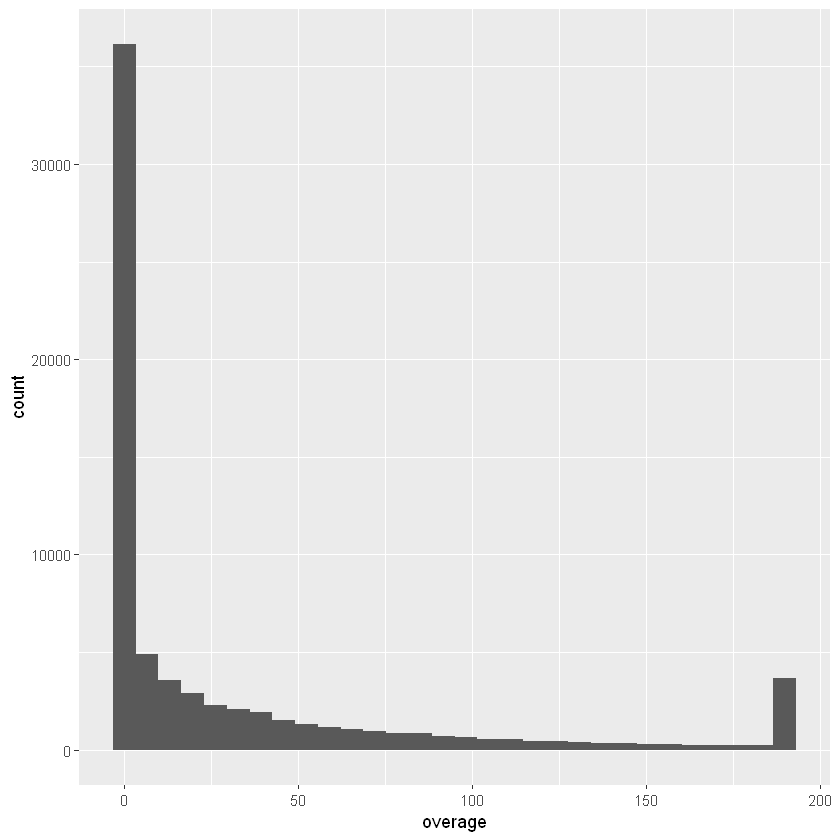

[1] 0.5632122

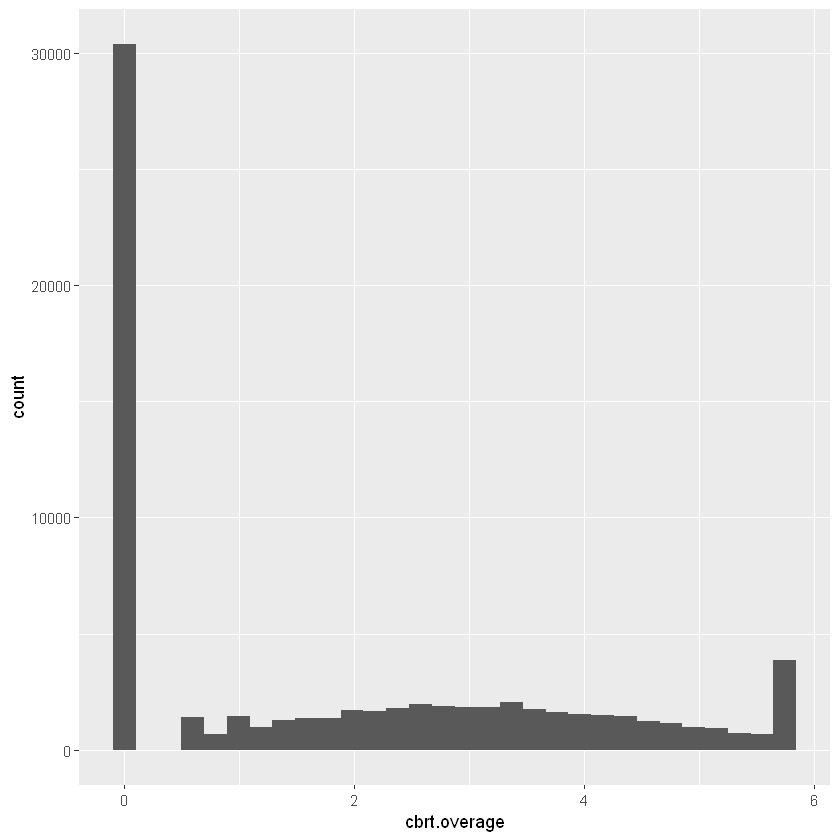

In [50]:
# overage
# skewness is between -0.5 and +0.5, the data is approximately symmetric.

ggplot(data = cc, aes(overage)) + geom_histogram()
cbrt.overage <- (cc$overage)^(1/3)
ggplot(data = cc, aes(cbrt.overage)) + geom_histogram()
e1071::skewness(cbrt.overage)

In [51]:
# Add these transformed columns to the dataset inplace of the original columns

cc$sqrt.mou <- sqrt.mou
cc$sqrt.eqpdays <- sqrt.eqpdays
cc$log.months <- log.months
cc$sqrt.recchrge <- sqrt.recchrge
cc$log.phones <- log.phones
cc$log.models <- log.models
cc$sqrt.outcalls<- sqrt.outcalls
cc$cbrt.directas <- cbrt.directas
cc$cbrt.overage <- cbrt.overage

cc <- subset(cc,select=-c(mou,eqpdays,months,recchrge,phones,models,outcalls,directas,overage))

### Build a Logistic Predictive Model

#### Splitting the dataset into Training and Test datasets

In [52]:
# Build two datasets one for model calibration and another for validation
# Calibration dataset to be used to create the model and predict churndep for validation dataset
cc_cal <- cc %>% subset(calibrat==1)
cc_val <- cc %>% subset(calibrat==0)

# Drop the calibrat column since it's no longer needed
cc_cal <- subset(cc_cal,select=-c(calibrat))
cc_val <- subset(cc_val,select=-c(calibrat))

# Not dividing calibration into2 parts. Will use full calibration for model building and test it on validation dataset
# Divide the calibration dataset into 2 parts: training and test datasets in 85:15 ratio
#set.seed(222)
#ind <- sample(2,nrow(cc_cal),replace = TRUE,prob = c(0.75,0.25))
#cc_cal_train <- cc_cal[ind==1,]
#cc_cal_test <- cc_cal[ind==2,]

In [53]:
nrow(cc_cal)
ncol(cc_cal)

nrow(cc_val)
ncol(cc_val)

[1] 40000

[1] 17

[1] 31047

[1] 17

#### Check Data for Imbalance

In [54]:
# We see in calibration dataset 50% of the datasets are positives cases and 50% are negative cases
# So there is no class imbalance in calibration

prop.table(table(cc_cal$churn))
prop.table(table(cc_val$churn))


  0   1 
0.5 0.5 


         0          1 
0.98038458 0.01961542 

#### Building the model on calibration dataset

In [55]:
log.model <- glm(churn ~ .,family=binomial, data=cc_cal)
print(summary(log.model))


Call:
glm(formula = churn ~ ., family = binomial, data = cc_cal)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.79051  -1.15124   0.02371   1.14989   1.80670  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -1.418e-01  1.130e-01  -1.255 0.209342    
refurb         2.748e-01  3.141e-02   8.748  < 2e-16 ***
setprcm       -2.693e-02  5.409e-02  -0.498 0.618599    
webcap        -1.637e-01  3.614e-02  -4.530 5.90e-06 ***
changem       -6.317e-04  6.161e-05 -10.253  < 2e-16 ***
rv             2.044e-02  3.787e-02   0.540 0.589374    
children       4.276e-02  2.543e-02   1.682 0.092600 .  
ownrent        1.716e-01  2.368e-02   7.247 4.27e-13 ***
sqrt.mou      -1.634e-02  1.951e-03  -8.376  < 2e-16 ***
sqrt.eqpdays   5.140e-02  2.976e-03  17.273  < 2e-16 ***
log.months    -2.060e-01  3.737e-02  -5.513 3.53e-08 ***
sqrt.recchrge -1.227e-02  8.103e-03  -1.514 0.129991    
log.phones     2.669e-01  6.925e-02   3.855 0.000116 *

In [56]:
# Including only those columns that have atleast 1 star (statisically significant)
log.model <- glm(churn ~ refurb+webcap+changem+ownrent+sqrt.mou+sqrt.eqpdays+log.months+log.phones+sqrt.outcalls+cbrt.overage  ,family=binomial, data=cc_cal)
print(summary(log.model))


Call:
glm(formula = churn ~ refurb + webcap + changem + ownrent + sqrt.mou + 
    sqrt.eqpdays + log.months + log.phones + sqrt.outcalls + 
    cbrt.overage, family = binomial, data = cc_cal)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.78871  -1.15114   0.03232   1.14969   1.86110  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -0.1818819  0.0927429  -1.961   0.0499 *  
refurb         0.2696337  0.0308713   8.734  < 2e-16 ***
webcap        -0.1699377  0.0360144  -4.719 2.37e-06 ***
changem       -0.0006332  0.0000616 -10.279  < 2e-16 ***
ownrent        0.1545420  0.0219666   7.035 1.99e-12 ***
sqrt.mou      -0.0176323  0.0017360 -10.157  < 2e-16 ***
sqrt.eqpdays   0.0524229  0.0028920  18.127  < 2e-16 ***
log.months    -0.2202904  0.0361495  -6.094 1.10e-09 ***
log.phones     0.2302371  0.0353156   6.519 7.06e-11 ***
sqrt.outcalls -0.0111911  0.0054227  -2.064   0.0390 *  
cbrt.overage   0.1038260  0.0064307  16.1

### Logistic Regression Prediction Accuracy

In [57]:
# Turn of any warnings (retcall1 is NA so you may get a warning like "prediction from a rank-deficient fit may be misleading"
options(warn=-1)
pred <- predict(log.model, newdata = cc_val, type='response')

y_pred_num <- ifelse(pred > 0.7702652, 1, 0)
y_predicted <- factor(y_pred_num, levels=c(0, 1))
y_actual <- cc_val$churn

cat("Prediction Accuracy %:", mean(y_predicted == y_actual) * 100)

Prediction Accuracy %: 98.04168

#### Accuracy and  Cutoff

    accuracy cutoff.30500 
   0.9804168    0.7702652 


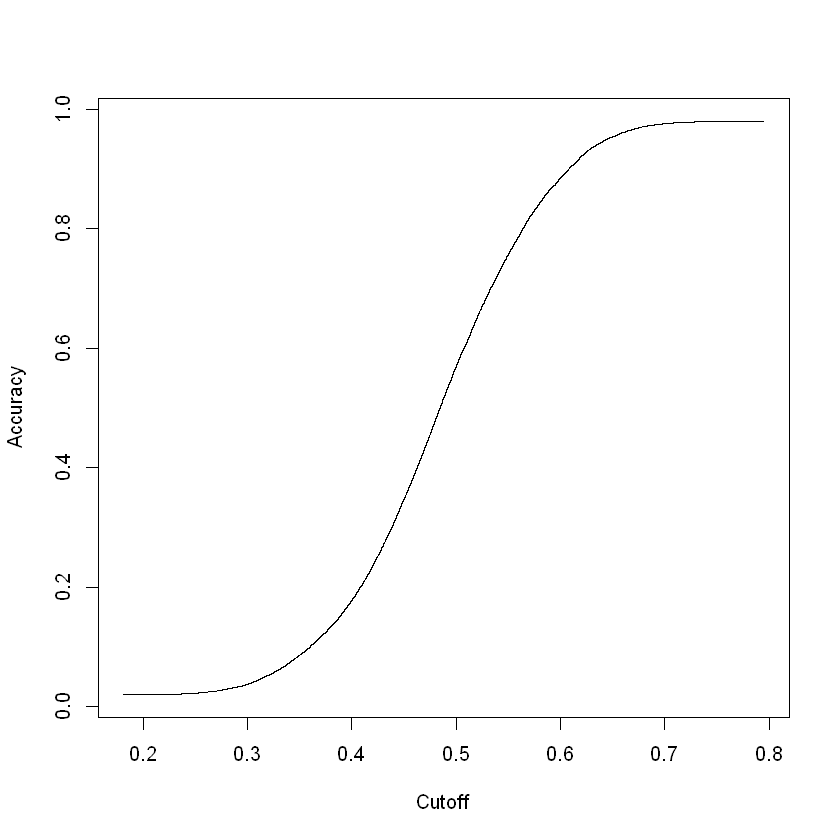

In [58]:
pred1 <- ROCR::prediction(pred, cc_val$churn)
acc.perf = performance(pred1, measure = "acc")
plot(acc.perf)

# Calculate Optimal Acuracy and Cutoff
# Then you can go forth and threshold your model using the cutoff for (in hopes) maximum accuracy in your test data.
ind = which.max(slot(acc.perf, "y.values")[[1]])
acc = slot(acc.perf, "y.values")[[1]][ind]
cutoff = slot(acc.perf, "x.values")[[1]][ind]
print(c(accuracy= acc, cutoff = cutoff))

### Confusion Matrix

In [59]:
glmnetcm <- confusionMatrix(y_predicted, y_actual)
glmnetcm

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 30437   607
         1     1     2
                                          
               Accuracy : 0.9804          
                 95% CI : (0.9788, 0.9819)
    No Information Rate : 0.9804          
    P-Value [Acc > NIR] : 0.4945          
                                          
                  Kappa : 0.0063          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.999967        
            Specificity : 0.003284        
         Pos Pred Value : 0.980447        
         Neg Pred Value : 0.666667        
             Prevalence : 0.980385        
         Detection Rate : 0.980352        
   Detection Prevalence : 0.999903        
      Balanced Accuracy : 0.501626        
                                          
       'Positive' Class : 0               
                  

### Stepwise AIC Regression

    The model 'log.model', may or may not be the best model with the given set of independent variables.
    There are multiple methodologies for variable selection. In this article, we’ll explore only the ‘stepAIC’ function.
    The ‘stepAIC’ function in R performs a stepwise model selection with an objective to minimize the AIC value.

In [60]:
step.model <- log.model %>% stepAIC(trace = TRUE)
step.model
summary(step.model)

Start:  AIC=54259.74
churn ~ refurb + webcap + changem + ownrent + sqrt.mou + sqrt.eqpdays + 
    log.months + log.phones + sqrt.outcalls + cbrt.overage

                Df Deviance   AIC
<none>                54238 54260
- sqrt.outcalls  1    54242 54262
- webcap         1    54260 54280
- log.months     1    54275 54295
- log.phones     1    54280 54300
- ownrent        1    54287 54307
- refurb         1    54314 54334
- sqrt.mou       1    54341 54361
- changem        1    54344 54364
- cbrt.overage   1    54501 54521
- sqrt.eqpdays   1    54573 54593



Call:  glm(formula = churn ~ refurb + webcap + changem + ownrent + sqrt.mou + 
    sqrt.eqpdays + log.months + log.phones + sqrt.outcalls + 
    cbrt.overage, family = binomial, data = cc_cal)

Coefficients:
  (Intercept)         refurb         webcap        changem        ownrent  
   -0.1818819      0.2696337     -0.1699377     -0.0006332      0.1545420  
     sqrt.mou   sqrt.eqpdays     log.months     log.phones  sqrt.outcalls  
   -0.0176323      0.0524228     -0.2202904      0.2302371     -0.0111911  
 cbrt.overage  
    0.1038259  

Degrees of Freedom: 39999 Total (i.e. Null);  39989 Residual
Null Deviance:	    55450 
Residual Deviance: 54240 	AIC: 54260


Call:
glm(formula = churn ~ refurb + webcap + changem + ownrent + sqrt.mou + 
    sqrt.eqpdays + log.months + log.phones + sqrt.outcalls + 
    cbrt.overage, family = binomial, data = cc_cal)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.78871  -1.15114   0.03232   1.14969   1.86110  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -0.1818819  0.0927429  -1.961   0.0499 *  
refurb         0.2696337  0.0308713   8.734  < 2e-16 ***
webcap        -0.1699377  0.0360144  -4.719 2.37e-06 ***
changem       -0.0006332  0.0000616 -10.279  < 2e-16 ***
ownrent        0.1545420  0.0219666   7.035 1.99e-12 ***
sqrt.mou      -0.0176323  0.0017360 -10.157  < 2e-16 ***
sqrt.eqpdays   0.0524229  0.0028920  18.127  < 2e-16 ***
log.months    -0.2202904  0.0361495  -6.094 1.10e-09 ***
log.phones     0.2302371  0.0353156   6.519 7.06e-11 ***
sqrt.outcalls -0.0111911  0.0054227  -2.064   0.0390 *  
cbrt.overage   0.1038260  0.0064307  16.1

#### Stepwise AIC Regression Prediction Accuracy

In [61]:
# On Calibration  dataset
options(warn=-1) 
pred_train <- predict(step.model, newdata = cc_cal,type='response')

y_pred_num <- ifelse(pred_train > 0.7702652 , 1, 0)
y_predicted <- factor(y_pred_num, levels=c(0, 1))
y_actual <- cc_cal$churn

cat("Prediction Accuracy %:", mean(y_predicted == y_actual) * 100 ) 

Prediction Accuracy %: 50.015

In [62]:
# Turn of any warnings
# On Validation dataset
options(warn=-1) 
pred_test <- predict(step.model, newdata = cc_val, type='response')

y_pred_num <- ifelse(pred_test > 0.7702652 , 1, 0)
y_predicted <- factor(y_pred_num, levels=c(0, 1))
y_actual <- cc_val$churn

cat("Prediction Accuracy %:", mean(y_predicted == y_actual) * 100 ) 

Prediction Accuracy %: 98.04168

#### Accuracy & Cutoff

    accuracy cutoff.30500 
   0.9804168    0.7702652 


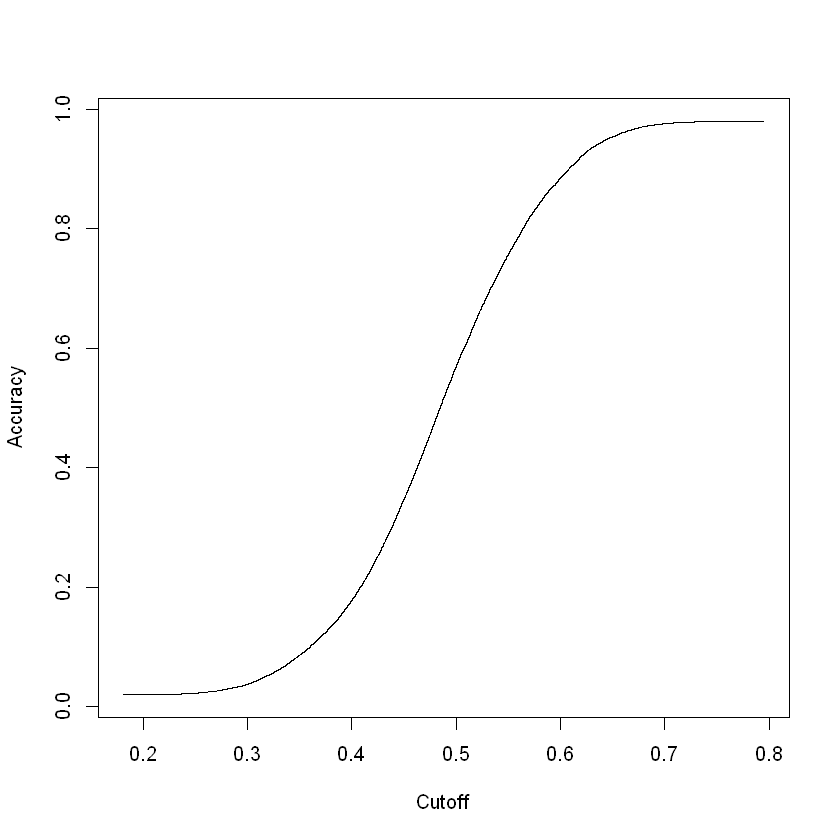

In [63]:
pred1 <- ROCR::prediction(pred_test, cc_val$churn)
acc.perf = performance(pred1, measure = "acc")
plot(acc.perf)

# Calculate Optimal Acuracy and Cutoff
# Then you can go forth and threshold your model using the cutoff for (in hopes) maximum accuracy in your test data.
ind = which.max( slot(acc.perf, "y.values")[[1]] )
acc = slot(acc.perf, "y.values")[[1]][ind]
cutoff = slot(acc.perf, "x.values")[[1]][ind]
print(c(accuracy= acc, cutoff = cutoff))

#### Confusion Matrix

In [64]:
glmnetcm <- confusionMatrix(y_predicted, y_actual)
glmnetcm

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 30437   607
         1     1     2
                                          
               Accuracy : 0.9804          
                 95% CI : (0.9788, 0.9819)
    No Information Rate : 0.9804          
    P-Value [Acc > NIR] : 0.4945          
                                          
                  Kappa : 0.0063          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.999967        
            Specificity : 0.003284        
         Pos Pred Value : 0.980447        
         Neg Pred Value : 0.666667        
             Prevalence : 0.980385        
         Detection Rate : 0.980352        
   Detection Prevalence : 0.999903        
      Balanced Accuracy : 0.501626        
                                          
       'Positive' Class : 0               
                  

AIC stands for Akaike Information Criteria. It is analogous to adjusted R² and is the measure of fit which penalizes model for the number of independent variables. We always prefer a model with minimum AIC value.
    

In [65]:
log.model$aic
step.model$aic

[1] 54259.74

[1] 54259.74

#### AUC & ROC

In [66]:
AUC <- Metrics::auc(cc_val$churn,y_pred_num)
AUC

[1] 0.5016256

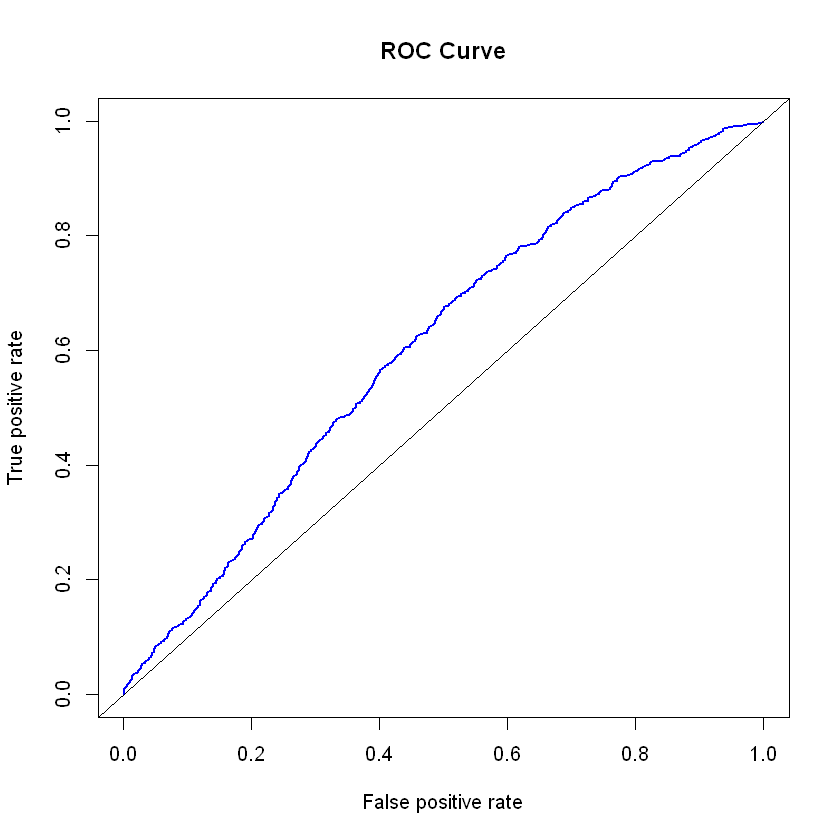

In [67]:
prediction <- prediction(predictions = pred_test,labels = cc_val$churn)
perf <- performance(prediction,"tpr","fpr")
plot(perf,lwd=2,col='blue',main="ROC Curve")
abline(a=0, b= 1)

#### Kolmogorov-Smirnov test for Test (KS Test)
    In case of logistic regression, KS value is also considered so as to tell whether model is good or not.
    KS stats is missing in excel file. KS value should be around 17 (within top 5 deciles) in both dev and val dataset for model to be good.

In [68]:
ks.test <- performance(pred1, "tpr", "fpr")
test.ks <- max(attr(ks.test, "y.values")[[1]] - (attr(ks.test, "x.values")[[1]]))
test.ks

[1] 0.1755661

#### Kolmogorov-Smirnov test for Train

In [69]:
pred_train <- predict(step.model, newdata = cc_cal, type='response')
pred2 <- ROCR::prediction(pred_train, cc_cal$churn)

In [70]:
ks.train <- performance(pred2, "tpr", "fpr")
train.ks <- max(attr(ks.train, "y.values")[[1]] - (attr(ks.train, "x.values")[[1]]))
train.ks

[1] 0.1526

#### Gain Chart & Lift Chart

    Gain chart is a popular method to visually inspect model performance in binary prediction. It presents the percentage of captured positive responses as a function of selected percentage of a sample.

    Lift is a measure of the effectiveness of a predictive model calculated as the ratio between the results obtained with and without the predictive model.
    Cumulative gains and lift charts are visual aids for measuring model performance
    Both charts consist of a lift curve and a baseline
    The greater the area between the lift curve and the baseline, the better the model

In [71]:
gain.chart_val <- function(n) {
    score <- runif(n)
    y <- (runif(n) < score)
    plot(performance(prediction(pred_test, cc_val$churn), "tpr", "rpp"), lwd = 2, main = paste("N =", n))
    lines(ecdf((rank(-score)[y == T]) / n), verticals = T, do.points = F, col = "red", lwd = 2)
} 

In [72]:
gain.chart_cal <- function(n) {
    score <- runif(n)
    y <- (runif(n) < score)
    plot(performance(prediction(pred_train, cc_cal$churn), "tpr", "rpp"), lwd = 2, main = paste("N =", n))
    lines(ecdf((rank(-score)[y == T]) / n), verticals = T, do.points = F, col = "red", lwd = 2)
} 

png 
  2

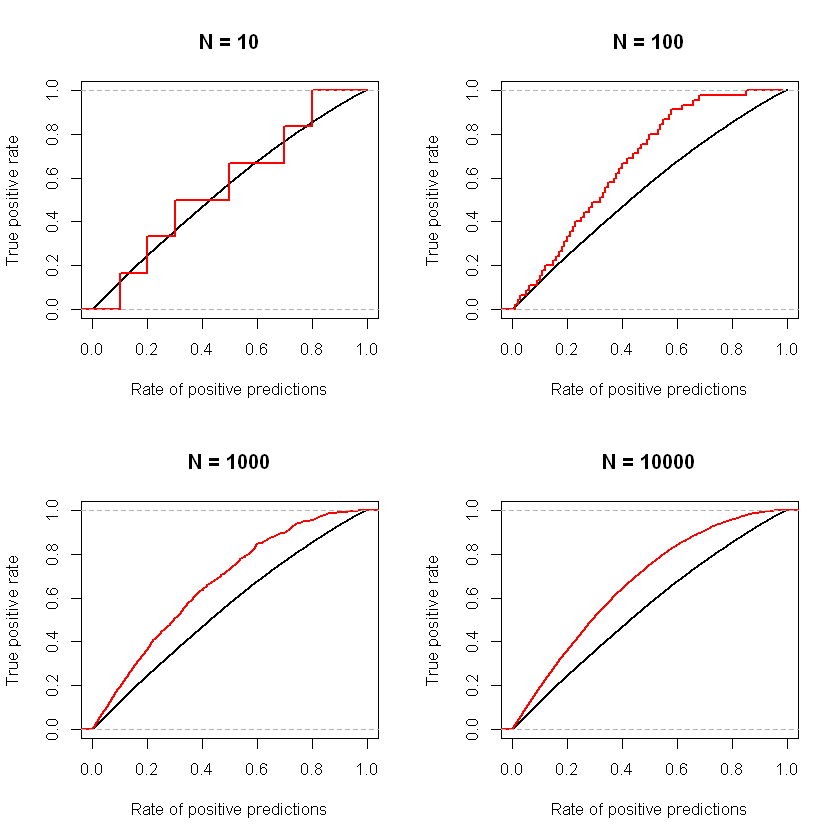

In [73]:
set.seed(1)
par(mfrow = c(2, 2))

gain.chart_cal(10)
gain.chart_cal(100)
gain.chart_cal(1000)
gain.chart_cal(10000)

# Save the Gain Charts to a PDF
dev.print(pdf, "C:\\Data_Science\\Certifications\\AnalytixLabs\\Data Science in R\\Data Science with R - Final Projects\\Logistic Regression - Telecom Churn\\Gains_Chart_Calibration.pdf")

png 
  2

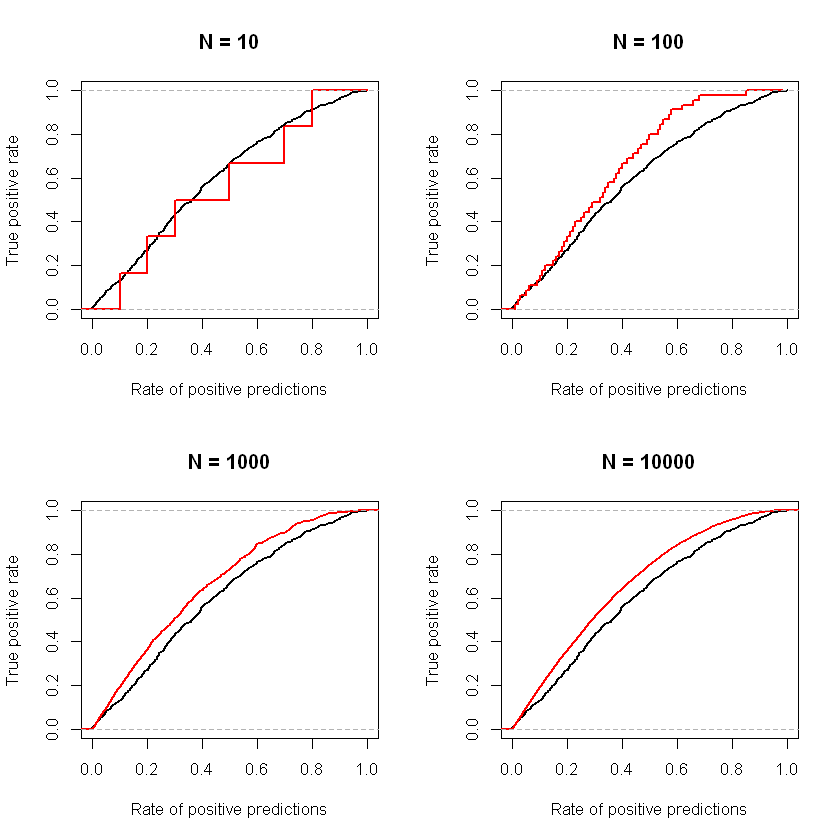

In [74]:
set.seed(1)
par(mfrow = c(2, 2))

gain.chart_val(10)
gain.chart_val(100)
gain.chart_val(1000)
gain.chart_val(10000)

# Save the Gain Charts to a PDF
dev.print(pdf, "C:\\Data_Science\\Certifications\\AnalytixLabs\\Data Science in R\\Data Science with R - Final Projects\\Logistic Regression - Telecom Churn\\Gains_Chart_Validation.pdf")

In [75]:
lift.chart_val <- function(n) {
    score <- runif(n)
    y <- (runif(n) < score)
    plot(performance(prediction(pred_test, cc_val$churn), "lift", "rpp"), lwd = 2, main = paste("N =", n))
    lines(ecdf((rank(-score)[y == T]) / n), verticals = T, do.points = F, col = "red", lwd = 2)
}

png 
  2

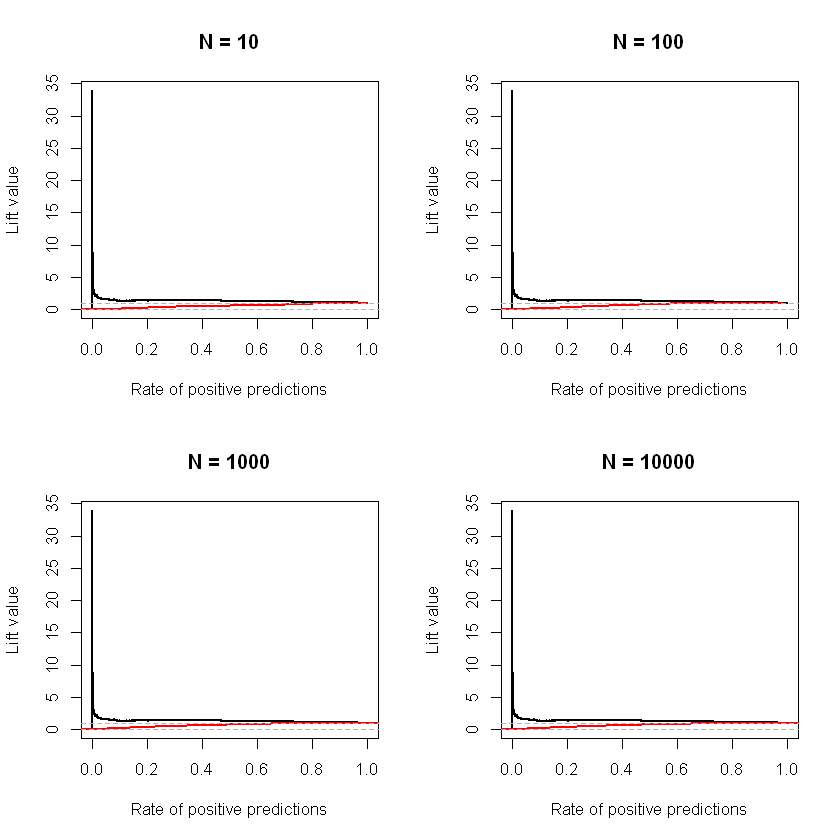

In [76]:
set.seed(1)
par(mfrow = c(2, 2))

lift.chart_val(10)
lift.chart_val(100)
lift.chart_val(1000)
lift.chart_val(10000)

# Save the Lift Charts to a PDF
dev.print(pdf, "C:\\Data_Science\\Certifications\\AnalytixLabs\\Data Science in R\\Data Science with R - Final Projects\\Logistic Regression - Telecom Churn\\Lift_Chart_Validation.pdf")

In [77]:
lift.chart_cal <- function(n) {
    score <- runif(n)
    y <- (runif(n) < score)
    plot(performance(prediction(pred_train, cc_cal$churn), "lift", "rpp"), lwd = 2, main = paste("N =", n))
    lines(ecdf((rank(-score)[y == T]) / n), verticals = T, do.points = F, col = "red", lwd = 2)
}

png 
  2

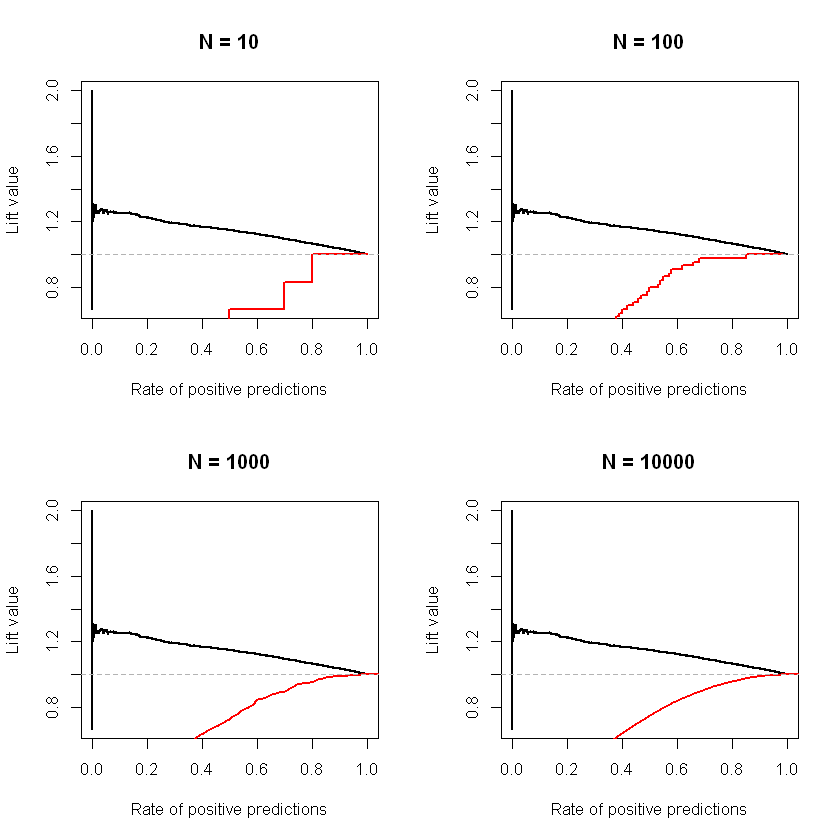

In [78]:
set.seed(1)
par(mfrow = c(2, 2))

lift.chart_cal(10)
lift.chart_cal(100)
lift.chart_cal(1000)
lift.chart_cal(10000)

# Save the Lift Charts to a PDF
dev.print(pdf, "C:\\Data_Science\\Certifications\\AnalytixLabs\\Data Science in R\\Data Science with R - Final Projects\\Logistic Regression - Telecom Churn\\Lift_Chart_Calibration.pdf")

#### Decile Analysis

In [79]:
# Append probability columns to the datasets
# This is needed for the Decile analysis

cc_val$probs <- pred_test
cc_cal$probs <- pred_train

In [80]:
# We first group the probabilities by quartiles and run the program to make 10 bins for the probabilities

# Testing
decLocations <- quantile(cc_val$probs, probs = seq(0.1,0.9,by=0.1))
cc_val$decile <- findInterval(cc_val$probs,c(-Inf,decLocations, Inf))

#Training
decLocations <- quantile(cc_cal$probs, probs = seq(0.1,0.9,by=0.1))
cc_cal$decile <- findInterval(cc_cal$probs,c(-Inf,decLocations, Inf))

In [81]:
# Check the Deciles created

#Validation
summary(cc_val$decile)
xtabs(~decile,cc_val)

#Calibration
summary(cc_cal$decile)
xtabs(~decile,cc_cal)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     3.0     6.0     5.5     8.0    10.0 

decile
   1    2    3    4    5    6    7    8    9   10 
3105 3105 3104 3105 3104 3105 3105 3104 3105 3105 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     3.0     5.5     5.5     8.0    10.0 

decile
   1    2    3    4    5    6    7    8    9   10 
4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 

In [82]:
Validation_DA <- sqldf("select decile Decile,  min(probs) as Min_prob, max(probs) as Max_prob,  sum(churn) as Bad_cnt, 
                           (count(decile)-sum(churn)) as Good_cnt from cc_val
                           group by decile
                     order by decile desc")

Calibration_DA <- sqldf("select decile Decile,  min(probs) as Min_prob, max(probs) as Max_prob,  sum(churn) as Bad_cnt, 
                           (count(decile)-sum(churn)) as Good_cnt from cc_cal
                           group by decile
                     order by decile desc")

In [83]:
Calibration_DA
Validation_DA

Decile,Min_prob,Max_prob,Bad_cnt,Good_cnt
10,0.6123432,0.8030210,2501,1499
9,0.5739855,0.6123430,2401,1599
8,0.5462643,0.5739814,2248,1752
7,0.5231461,0.5462623,2191,1809
6,0.5005402,0.5231340,2151,1849
5,0.4792299,0.5005397,2010,1990
4,0.4566125,0.4792260,1832,2168
3,0.4290515,0.4566123,1719,2281
2,0.3870575,0.4290490,1594,2406
1,0.1635963,0.3870421,1353,2647


Decile,Min_prob,Max_prob,Bad_cnt,Good_cnt
10,0.6000525,0.7950155,81,3024
9,0.5610653,0.6000515,84,3021
8,0.5321786,0.5610524,97,3007
7,0.5079819,0.5321753,77,3028
6,0.4859734,0.5079747,68,3037
5,0.4649096,0.4859696,56,3048
4,0.4417651,0.4649082,51,3054
3,0.4139201,0.4417621,41,3063
2,0.3712846,0.4139091,30,3075
1,0.1815074,0.3712815,24,3081


In [84]:
# Save the Decile Analysis Reports
write.csv(Validation_DA,"C:\\Data_Science\\Certifications\\AnalytixLabs\\Data Science in R\\Data Science with R - Final Projects\\Logistic Regression - Telecom Churn\\Validation_DA.csv")
write.csv(Calibration_DA,"C:\\Data_Science\\Certifications\\AnalytixLabs\\Data Science in R\\Data Science with R - Final Projects\\Logistic Regression - Telecom Churn\\Calibration_DA.csv")

#### Save the model summary to file

In [85]:
sum <- summary(step.model)$coefficients
write.csv(sum,"C:\\Data_Science\\Certifications\\AnalytixLabs\\Data Science in R\\Data Science with R - Final Projects\\Logistic Regression - Telecom Churn\\model_summary.csv")

### Build a Decision Tree Model

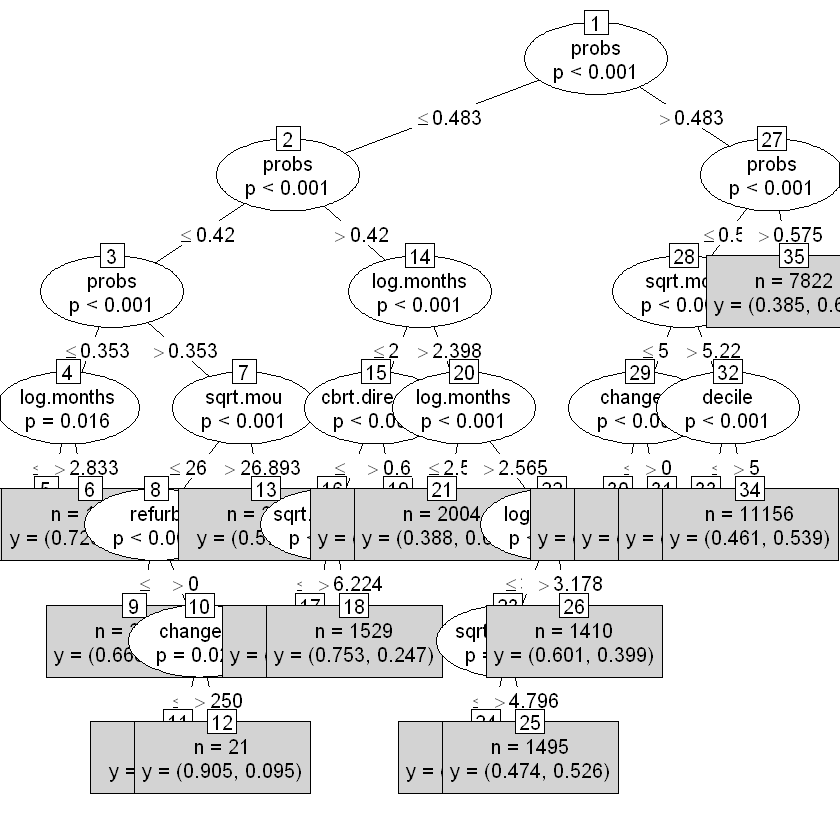

In [86]:
tree.model <- ctree(churn ~ ., cc_cal)
plot(tree.model, type='simple')

### Decision Tree Prediction Accuracy

In [87]:
p1 <- predict(tree.model, cc_val)

In [88]:
y_predicted <- factor(p1)
y_actual <- cc_val$churn

In [89]:
cat("Prediction Accuracy %:", mean(y_predicted == y_actual) * 100 )

Prediction Accuracy %: 42.98966

### Confusion Matrix

In [90]:
glmnetcm <- confusionMatrix(y_predicted, y_actual)
glmnetcm

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 12886   148
         1 17552   461
                                          
               Accuracy : 0.4299          
                 95% CI : (0.4244, 0.4354)
    No Information Rate : 0.9804          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.012           
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.42335         
            Specificity : 0.75698         
         Pos Pred Value : 0.98865         
         Neg Pred Value : 0.02559         
             Prevalence : 0.98038         
         Detection Rate : 0.41505         
   Detection Prevalence : 0.41982         
      Balanced Accuracy : 0.59017         
                                          
       'Positive' Class : 0               
                  

### Build a Random Forest model

In [91]:
rfModel <- randomForest(churn ~ ., cc_cal)
print(rfModel)


Call:
 randomForest(formula = churn ~ ., data = cc_cal) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 40.06%
Confusion matrix:
      0     1 class.error
0 11540  8460     0.42300
1  7563 12437     0.37815


### Random Forest Prediction Accuracy

In [92]:
pred_rf <- predict(rfModel, cc_val)
y_predicted <- factor(pred_rf)
y_actual <- cc_val$churn
cat("Prediction Accuracy %:", mean(y_predicted == y_actual) * 100)

Prediction Accuracy %: 56.90727

### Confusion Matrix

In [93]:
caret::confusionMatrix(y_predicted, y_actual)

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 17300   241
         1 13138   368
                                          
               Accuracy : 0.5691          
                 95% CI : (0.5635, 0.5746)
    No Information Rate : 0.9804          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0152          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.56837         
            Specificity : 0.60427         
         Pos Pred Value : 0.98626         
         Neg Pred Value : 0.02725         
             Prevalence : 0.98038         
         Detection Rate : 0.55722         
   Detection Prevalence : 0.56498         
      Balanced Accuracy : 0.58632         
                                          
       'Positive' Class : 0               
                  

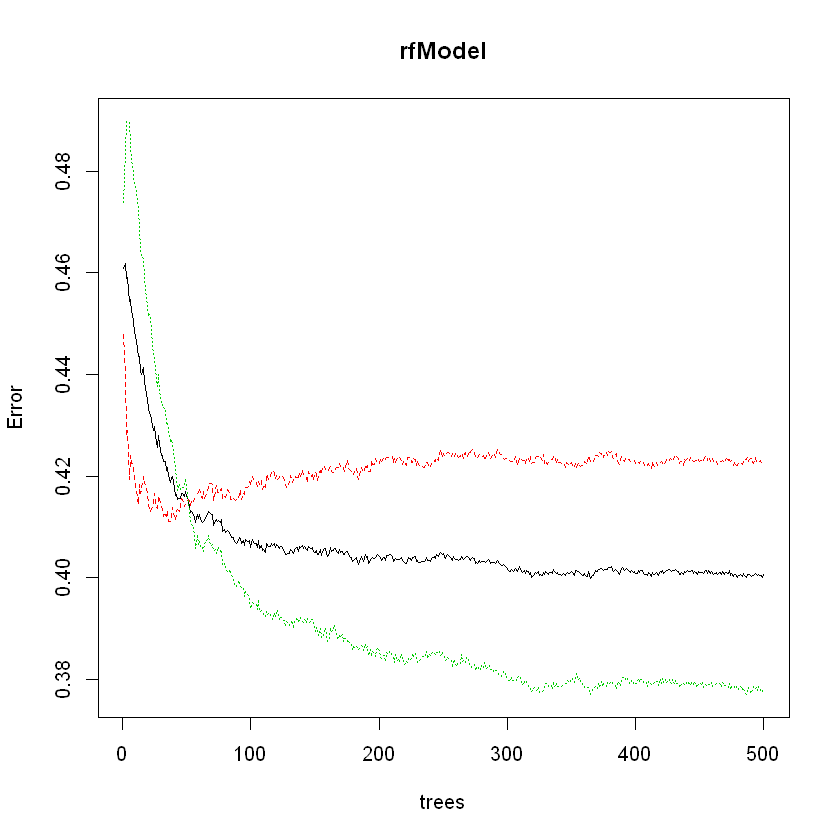

In [94]:
# Random Forest Error Rate
# We use this plot to help us determine the number of trees. 
# As the number of trees increases, the OOB error rate decreases, and then becomes almost constant. 
# We are not able to decrease the OOB error rate after about 100 trees.

plot(rfModel)

#### Tune Random Forest Model

In [95]:
# The 17th column is churn, 1st parameter is the vector of predictor variables and 2nd parameter is the predicted variable.

#t <- tuneRF(cc_cal_train[, -17], cc_cal_train[, 17], stepFactor = 0.5, plot = TRUE, ntreeTry = 100, trace = TRUE, improve = 0.05)

We use this plot to give us some ideas on the number of mtry to choose. OOB error rate is at the lowest when mtry is 2. Therefore, we choose mtry=2.

#### Fit the Random Forest Model After Tuning

In [96]:
# Memory Error, commenting it out for now due to memory issues
#memory.limit()
#memory.limit(size=3000)

#rfModel_new <- randomForest(churn ~ ., data=cc_cal_train , ntree = 100, mtry = 2, importance = TRUE, proximity = TRUE)
#print(rfModel_new)

#pred_rf_new <- predict(rfModel_new, cc_cal_test)
#caret::confusionMatrix(pred_rf_new, cc_cal_test$churndep)

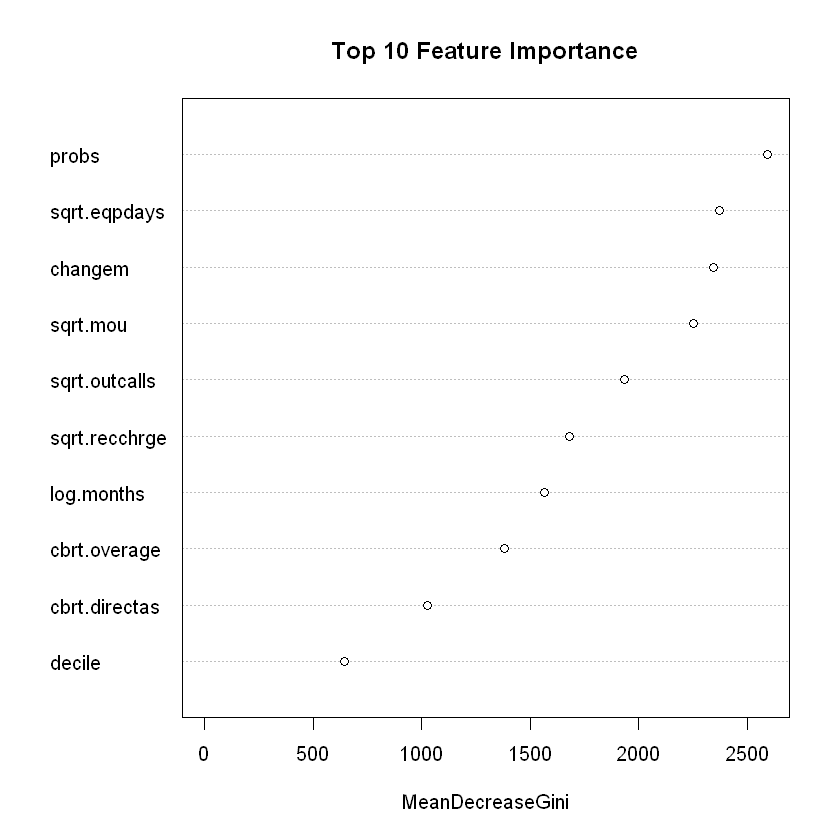

In [97]:
#Random Forest Feature Importance

randomForest::varImpPlot(rfModel, sort=T, n.var = 10, main = 'Top 10 Feature Importance')

### Calculate Variable Importance of Logistic model

In [98]:
imp <- as.data.frame(varImp(log.model))
imp <- data.frame(columns = rownames(imp), overall = imp$Overall)
imp <- imp[order(imp$overall,decreasing = T),]
imp

write.csv(imp,"C:\\Data_Science\\Certifications\\AnalytixLabs\\Data Science in R\\Data Science with R - Final Projects\\Logistic Regression - Telecom Churn\\var_imp.csv")

,columns,overall
6,sqrt.eqpdays,18.126887
10,cbrt.overage,16.145253
3,changem,10.278820
5,sqrt.mou,10.157013
1,refurb,8.734125
4,ownrent,7.035316
8,log.phones,6.519408
7,log.months,6.093867
2,webcap,4.718607
9,sqrt.outcalls,2.063746


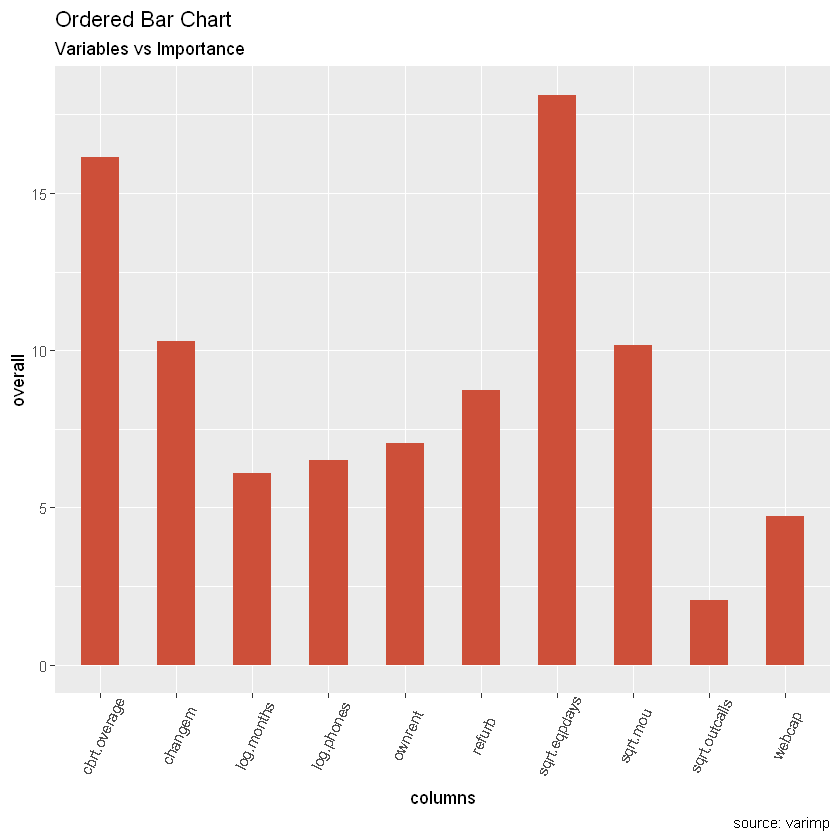

In [99]:
# Variable Importance: Draw a Bar Chart

ggplot(imp, aes(x=columns, y=overall))  + 
  geom_bar(stat="identity", width=.5, fill="tomato3") + 
  labs(title="Ordered Bar Chart", 
       subtitle="Variables vs Importance", 
       caption="source: varimp") + 
  theme(axis.text.x = element_text(angle=65, vjust=0.6))

### Save the models to disk

In [100]:
saveRDS(step.model, "C:\\Data_Science\\Certifications\\AnalytixLabs\\Data Science in R\\Data Science with R - Final Projects\\Logistic Regression - Telecom Churn\\LogisticRegression.rda")
saveRDS(tree.model, "C:\\Data_Science\\Certifications\\AnalytixLabs\\Data Science in R\\Data Science with R - Final Projects\\Logistic Regression - Telecom Churn\\DecisionTree.rda")
saveRDS(rfModel, "C:\\Data_Science\\Certifications\\AnalytixLabs\\Data Science in R\\Data Science with R - Final Projects\\Logistic Regression - Telecom Churn\\RandomForest.rda")

### Build a Predictive model with Support Vector Machines

In [101]:
svm.model = svm(formula = churn ~ .,  
                 data = cc_cal, 
                 type = 'C-classification', 
                 kernel = 'linear')  

#### Prediction Accuracy

In [102]:
pred_svm <- predict(svm.model, cc_val)
y_predicted <- factor(pred_svm)
y_actual <- cc_val$churn
cat("Prediction Accuracy %:", mean(y_predicted == y_actual) * 100)

Prediction Accuracy %: 50.5846

#### Confusion Matrix

In [103]:
caret::confusionMatrix(y_predicted, y_actual)

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 15298   202
         1 15140   407
                                          
               Accuracy : 0.5058          
                 95% CI : (0.5003, 0.5114)
    No Information Rate : 0.9804          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0131          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.50260         
            Specificity : 0.66831         
         Pos Pred Value : 0.98697         
         Neg Pred Value : 0.02618         
             Prevalence : 0.98038         
         Detection Rate : 0.49274         
   Detection Prevalence : 0.49924         
      Balanced Accuracy : 0.58545         
                                          
       'Positive' Class : 0               
                  

#### Save the SVM model to disk

In [104]:
saveRDS(svm.model, "C:\\Data_Science\\Certifications\\AnalytixLabs\\Data Science in R\\Data Science with R - Final Projects\\Logistic Regression - Telecom Churn\\SVM.rda")

### Questions & Answers

1. Data cleaning including missing values, outliers and multi-collinearity. Describe your predictive churn model. How did you select variables to be included in the model? 

    The predictive model was analysed using Logistic Regression technique. The raw data file consisted of 78 attributes, but some attributes were listed separately to imply same information and hence, data cleaning and pre-processing had an important role to play. Various variable reduction techniques were used in order to remove insignificant variables and in the end, I was left with 8 attributes. Logistic Regression is one of the efficient ways to construct a predictive model, but Ensemble methods and Decision tree can also prove to be handier because of the added advantage of using multiple algorithms to generate better predictive performance. 

2. Demonstrate the predictive performance of the model. 

    Logistic regressions have always been an influential method in data science and by using it, I found that the accuracy of the model is close to 98% on validation dataset. 
    I also used other classification algorithms like Decision Tree, Random Forest and Support Vector Machines.
    The accuracy of all models varied between 56% and 60%.

3. What are the key factors that predict customer churn? Do these factors make sense? 

    The relationship between the dependent variable and independent variables is established using logistic regression by estimating probabilities using a logistic function. 
    The following attributes are found to be more important in deciding customer churn (High absolute z value and low p value): 

        eqpdays(Number of days of the current equipment)
        overage(Mean overage minutes of use)
        changem(% Change in minutes of use)
        mou(Mean monthly minutes of use)
        refurb(Handset s refurbished)
        ownrent(Home ownership is missing)
        phones(# Handsets issued)
        months(Months in service)
        webcap(Handset is web capable)
        outcalls(Mean # of outbound voice calls)
    


4. What offers should be made to which customers to encourage them to remain with Cell2Cell? 
Assume that your objective is to generate net positive cash flow, i.e., generate additional 
Customer revenues after subtracting out the cost of the incentive. 


    From the below charts we can derive some offers that Cell2Cell can structure;

    - Equipments should be replaced for customers sooner since higher the number of days more is the churn 
    - Those with lesser monthly usage appear to have high churn rate. We can give some offers to increase MOU such as
       No charges for incoming calls since customers also leave because they cannot speak freely during incoming calls
    - Offer discounts on Outbound calls so more calls afre amde
    
    An intuitive way is addressing to the customers problem efficiently and effectively. Wireless-telecom industry involves a list of problem such as slow network, billing errors, ease of assistance etc. Cell2Cell can structure a system where a customer can know the way Cell2Cell is using to resolve their queries, the tentative date by which the problem will get fixed and how to provide the contact details of right person for further inquiry. 

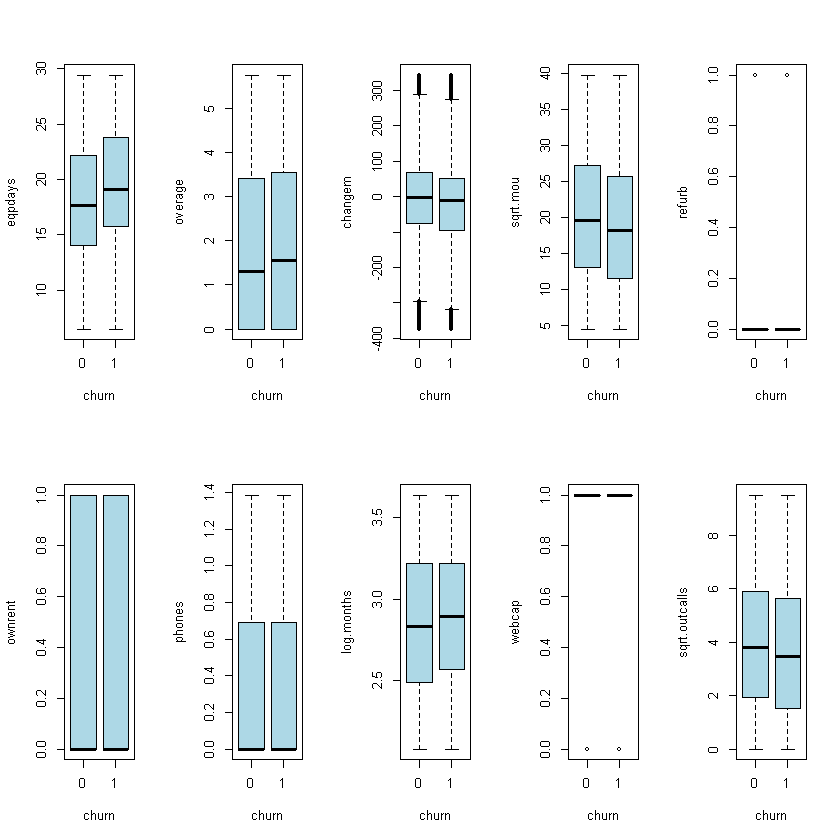

In [105]:
par(mfrow = c(2,5))

boxplot(sqrt.eqpdays~churn, ylab="eqpdays", xlab= "churn", col="light blue",data = cc)
boxplot(cbrt.overage~churn, ylab="overage", xlab= "churn", col="light blue",data = cc)
boxplot(changem~churn, ylab="changem", xlab= "churn", col="light blue",data = cc)
boxplot(sqrt.mou~churn, ylab="sqrt.mou", xlab= "churn", col="light blue",data = cc)
boxplot(refurb~churn, ylab="refurb", xlab= "churn", col="light blue",data = cc)
boxplot(ownrent~churn, ylab="ownrent", xlab= "churn", col="light blue",data = cc)
boxplot(log.phones~churn, ylab="phones", xlab= "churn", col="light blue",data = cc)
boxplot(log.months~churn, ylab="log.months", xlab= "churn", col="light blue",data = cc)
boxplot(webcap~churn, ylab="webcap", xlab= "churn", col="light blue",data = cc)
boxplot(sqrt.outcalls~churn, ylab="sqrt.outcalls", xlab= "churn", col="light blue",data = cc)

5. Assuming these actions were implemented, how would you determine whether they had 
worked? 


    The data collected from customers ’ incentive program can be used to cross promote or up sell additional products or services and create highly targeted and relevant marketing campaigns to further improve your business. 
    In order to track the behaviour of customers, personalized e-mails or SMS marketing campaigns can also be implemented.
